# Análise Diagnóstica - Exportação de Vinhos

## Sobre a Base de Dados

A base apresenta informações referentes à quantidade de uvas processadas, produção e comercialização de vinhos, suco e derivados provenientes do Estado do Rio Grande do Sul, que representa mais de 90% da produção nacional. Apresenta também os dados de importações e exportações dos produtos da vitivinicultura.

- Alguns esclarecimentos se fazem necessários, para que se faça o uso correto das informações:

    - Os vinhos nacionais são classificados para fins estatísticos em vinho de mesa (elaborados com uvas americanas e/ou híbridas), vinho fino de mesa (elaborados com uvas Vitis Vinifera L.) e vinho especial (corte de vinho de mesa e fino de mesa).
    - Os vinhos importados, denominados de vinhos de mesa são equivalentes aos vinhos finos de mesa nacionais, pois são elaborados com uvas Vitis Vinifera L.
    - Os dados constantes da base de dados ALICEweb, referentes à vinhos e espumantes são expressos em quilos, no entanto considerando que a densidade desses produtos é de aproximadamente um (1), consideramos 1 Kg = 1L.
    - Os arquivos de download possuem a extensão CSV, para facilitar a importação em planilhas ou banco de dados.
    - Os arquivos referentes a exportação e importação apresentam duas colunas (variáveis) por ano. Uma padrão (1996) e outra com o sufixo '.1' (1996.1). A primeira refere-se a quantidade, em Kg, de exportação/importação. A segunda se trata do valor, em Dollar, referente a quantidade exportada/importada.

## Problema de Negócio

A empresa exportadora de vinhos do Brasil enfrenta uma dificuldade significativa para competir no mercado internacional, que é dominado por produtores de países com longa tradição vinícola, como França, Itália e Espanha.

A análise tem como objetivo estudar o histórico destas exportações e importações, com o intuito de identificar mercados-chave, por valor e recorrência, entender comportamento de preço/volume e propor ações para aumentar receita e previsibilidade, trazendo algumas prospecções futuras.

**Perguntas de Negócio: **
- Quais países geram mais **valor** e com mario **recorrência** de compras?
- Como evoluíram **valor total**, **preço por litro** e **balança comercial** ao longo do tempo?
- Onde existem oportunidades de **preço** e de **volume**?



In [57]:
!pip install warnings

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


In [58]:
# Importando as bibliotecas necessárias

# Ignorar avisos
import warnings
warnings.filterwarnings('ignore')

# Manipulação de dados
import pandas as pd
pd.options.display.float_format = '{:f}'.format
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
# Usa o tema whitegrid do seaborn
sns.set_style('whitegrid')
import plotly.express as px

# Formatador para exibição nos gráficos
import matplotlib.ticker as mticker
# Criando uma função que recebe o valor (x) e a posição (pos) do tick (Criando uma formatação)
def formatador_milhoes(x, pos):
    # 'f' é para formatação de string (f-string)
    # {x/1e6:.1f} divide o número por 1 milhão e formata com 1 casa decimal
    # 'M' é o sufixo que adicionamos
    return f'{x/1e6:.1f}M'

# Inserindo o formatador no matplotlib.ticker a partir da função criada acima
formatter = mticker.FuncFormatter(formatador_milhoes)

## Carregando a Base de Dados

In [59]:
# Links de compartilhamento do google drive
urls = {'comercializacao': 'https://drive.google.com/file/d/11Yyzb8SJDda3JdkyMF732zUQSIh4ckPL/view?usp=drive_link',
        'exportacao': 'https://drive.google.com/file/d/1RgskBH4BvpQQoKphDs64nr9wUyhVXlMt/view?usp=drive_link',
        'importacao': 'https://drive.google.com/file/d/1lqxI1pid5l-QUXY3_Rmq3Lnye6DNw2hA/view?usp=drive_link',
        'processamento': 'https://drive.google.com/file/d/13Wepk03ExIRkZu8lgWRJURoMDOXrhhS4/view?usp=drive_link',
        'producao': 'https://drive.google.com/file/d/1lAv2HXcYo3JuAY_HTJU-a3V_wjnmPxSg/view?usp=drive_link'
       }

# Modificando as URLs para o formato de download
file_ids = {'comercializacao': urls['comercializacao'].split('/')[-2],
            'exportacao': urls['exportacao'].split('/')[-2],
            'importacao': urls['importacao'].split('/')[-2],
            'processamento': urls['processamento'].split('/')[-2],
            'producao': urls['producao'].split('/')[-2]
           }
download_urls = {'comercializacao': f'https://drive.google.com/uc?id={file_ids['comercializacao']}',
                 'exportacao': f'https://drive.google.com/uc?id={file_ids['exportacao']}',
                 'importacao': f'https://drive.google.com/uc?id={file_ids['importacao']}',
                 'processamento': f'https://drive.google.com/uc?id={file_ids['processamento']}',
                 'producao': f'https://drive.google.com/uc?id={file_ids['producao']}'
                }

In [60]:
# lendo os dataframes e salvando em um dicionário
dataframes = dict()
for chave, valor in download_urls.items():
    try:
        dataframes[chave] = pd.read_csv(valor, sep=';', encoding='utf-8')
    except Exception as e:
        # Erro comum: separador ou codificação errados podem levar a erros.
        print(f'Erro ao carregar o arquivo: {e}')

In [61]:
# Salvando o dataframe de estudo para análise
df_exportacao = dataframes['exportacao']
df_comercializacao = dataframes['comercializacao']
df_importacao = dataframes['importacao']
df_processamento = dataframes['processamento']
df_producao = dataframes['producao']

## Visão Geral da Base de Dados `Exportação`

In [62]:
# Quantidade de linhas e colunas do dataframe
print(f'Linhas: {df_exportacao.shape[0]}')
print(f'Colunas: {df_exportacao.shape[1]}')

Linhas: 137
Colunas: 110


In [63]:
# Escolhendo a opção de visualizar todas as colunas no Pandas
pd.set_option('display.max_columns', None)

In [64]:
# Visualizando as primeiras 5 linhas do dataframe
df_exportacao.head()

Id                             País  1970  1970.1  1971  1971.1  1972  \
0   1                      Afeganistão     0       0     0       0     0   
1   2                    África do Sul     0       0     0       0     0   
2   3  Alemanha, República Democrática     0       0     0       0  4168   
3   4                           Angola     0       0     0       0     0   
4   5                         Anguilla     0       0     0       0     0   

   1972.1   1973  1973.1  1974  1974.1  1975  1975.1  1976  1976.1  1977  \
0       0      0       0     0       0     0       0     0       0     0   
1       0      0       0     0       0     0       0     0       0     0   
2    2630  12000    8250     0       0     0       0     0       0     0   
3       0      0       0     0       0     0       0     0       0     0   
4       0      0       0     0       0     0       0     0       0     0   

   1977.1  1978  1978.1     1979   1979.1     1980   1980.1  1981  1981.1  \
0       0     0       0        0        0        0        0     0       0   
1       0     0       0        0        0        0        0     0       0   
2       0     0       0     5400     6500        0        0     0       0   
3       0     0       0  3465756  2387643  1682244  1118023     0       0   
4       0     0       0        0        0        0        0     0       0   

   1982  1982.1  1983  1983.1  1984  1984.1  1985  1985.1  1986  1986.1  1987  \
0     0       0     0       0     0       0     0       0     0       0     0   
1     0       0     0       0     0       0     0       0     0       0     0   
2     0       0     0       0     0       0    67     136  1037    1750  2700   
3     0       0     0       0     0       0   339    1082   774    1718  1316   
4     0       0     0       0     0       0     0       0   130      80   324   

   1987.1   1988  1988.1  1989  1989.1  1990  1990.1  1991  1991.1  1992  \
0       0      0       0     0       0     0       0     0       0     0   
1       0      0       0     0       0     0       0     0       0     0   
2    4044   2205    3921   197     510     0       0  3780    7182  2700   
3    3847  18500   12950   168     134   930    1090   125     116   292   
4     106      0       0     0       0     0       0     0       0     0   

   1992.1  1993  1993.1  1994  1994.1   1995  1995.1  1996  1996.1   1997  \
0       0     0       0     0       0      0       0     0       0      0   
1       0     0       0     0       0      0       0     0       0    463   
2    5143     0       0     0       0  20700   40590     0       0     43   
3     332   189     238     0       0     24      46  2118    6401  68494   
4       0     0       0     0       0      0       0     0       0      0   

   1997.1   1998  1998.1   1999  1999.1    2000  2000.1   2001  2001.1  2002  \
0       0      0       0      0       0       0       0      0       0     0   
1    1673      0       0      0       0       0       0      0       0     0   
2     307    504     700      0       0    9900   15620   1673   11157  1080   
3  146017  15780   34732  10998   16738  249717  368817  12150   15529  9812   
4       0      0       0      0       0       0       0      0       0     0   

   2002.1   2003  2003.1   2004  2004.1   2005  2005.1   2006  2006.1    2007  \
0       0      0       0      0       0      0       0      0       0       0   
1       0      0       0      0       0      0       0      0       0       0   
2    4626      0       0  13589   28140  57393  106702  38302   89231  119512   
3    5290  19937   11437  37573   50382  24056   33039   3766   18293   25931   
4       0      0       0      0       0      0       0      0       0       0   

   2007.1    2008  2008.1    2009  2009.1   2010  2010.1   2011  2011.1  2012  \
0       0       0       0       0       0      0       0      0       0     0   
1       0       0       0       0       0      0       0      0       0     0   
2  23805

In [65]:
# Visualizando os tipos de dados do dataframe
df_exportacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Columns: 110 entries, Id to 2023.1
dtypes: int64(109), object(1)
memory usage: 117.9+ KB


- Das 110 colunas, apenas uma foi classificada como categórica, o que faz sentido visto que apenas a coluna `País` apresenta strings como conteúdo.
- As demais colunas foram classificadas como inteiras. A princípio faz sentido, mas analisando a fundo, presumo que as quantidades de exportações (litros) e os valores de cada uma delas (US$), com excessão do `Id`, possam assumir valores decimais, levando a tipagem para o tipo float. Este caso será analisado posteriormente.

In [66]:
# Estatísticas Descritivas do dataset
df_exportacao.describe(include='all')

Id         País         1970       1970.1          1971  \
count  137.000000          137   137.000000   137.000000    137.000000   
unique        NaN          137          NaN          NaN           NaN   
top           NaN  Afeganistão          NaN          NaN           NaN   
freq          NaN            1          NaN          NaN           NaN   
mean    69.000000          NaN   992.766423   295.620438   2053.321168   
std     39.692569          NaN  7894.375593  2168.514649  20401.448066   
min      1.000000          NaN     0.000000     0.000000      0.000000   
25%     35.000000          NaN     0.000000     0.000000      0.000000   
50%     69.000000          NaN     0.000000     0.000000      0.000000   
75%    103.000000          NaN     0.000000     0.000000      0.000000   
max    137.000000          NaN 89846.000000 23980.000000 237805.000000   

             1971.1          1972       1972.1          1973        1973.1  \
count    137.000000    137.000000   137.000000    137.000000    137.000000   
unique          NaN           NaN          NaN           NaN           NaN   
top             NaN           NaN          NaN           NaN           NaN   
freq            NaN           NaN          NaN           NaN           NaN   
mean     609.233577   2781.167883   883.919708   3439.927007   1275.854015   
std     5528.316608  25270.627095  7386.674399  29007.997816  10052.798972   
min        0.000000      0.000000     0.000000      0.000000      0.000000   
25%        0.000000      0.000000     0.000000      0.000000      0.000000   
50%        0.000000      0.000000     0.000000      0.000000      0.000000   
75%        0.000000      0.000000     0.000000      0.000000      0.000000   
max    64075.000000 291625.000000 84402.000000 332433.000000 115041.000000   

                1974        1974.1          1975        1975.1          1976  \
count     137.000000    137.000000    137.000000    137.000000    137.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean     2605.729927   1356.722628   5023.233577   1967.744526   5502.810219   
std     21377.663044  10494.906597  39914.123760  15552.026613  48010.006267   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.000000      0.000000      0.000000      0.000000      0.000000   
50%         0.000000      0.000000      0.000000      0.000000      0.000000   
75%         0.000000      0.000000      0.000000      0.000000      0.000000   
max    243294.000000 119429.000000 371050.000000 159863.000000 545762.000000   

              1976.1          1977        1977.1          1978        1978.1  \
count     137.000000    137.000000    137.000000    137.000000    137.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean     2161.817518   7292.591241   3498.364964   3996.970803   2229.335766   
std     18825.998939  59180.480449  28156.444477  34601.391499  19390.718584   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.000000      0.000000      0.000000      0.000000      0.000000   
50%         0.000000      0.000000      0.000000      0.000000      0.000000   
75%         0.000000      0.000000      0.000000      0.000000      0.000000   
max    215643.000000 524621.000000 265879.000000 384269.000000 219251.000000   

                 1979         1979.1           1980         1980.1  \
count      137.000000     137.000000     137.000000     137.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN      

In [67]:
# Visualizando a quantidade de valores únicos de cada variável
for col in df_exportacao.columns:
    print(f'Coluna {col}:')
    print(df_exportacao[col].nunique())
    print('-'*60)

Coluna Id:
137
------------------------------------------------------------
Coluna País:
137
------------------------------------------------------------
Coluna 1970:
9
------------------------------------------------------------
Coluna 1970.1:
9
------------------------------------------------------------
Coluna 1971:
8
------------------------------------------------------------
Coluna 1971.1:
8
------------------------------------------------------------
Coluna 1972:
16
------------------------------------------------------------
Coluna 1972.1:
16
------------------------------------------------------------
Coluna 1973:
13
------------------------------------------------------------
Coluna 1973.1:
13
------------------------------------------------------------
Coluna 1974:
11
------------------------------------------------------------
Coluna 1974.1:
11
------------------------------------------------------------
Coluna 1975:
12
------------------------------------------------------

In [68]:
# Visualizando os valores únicos de cada variável
for col in df_exportacao.columns:
    print(f'Coluna {col}:')
    print(df_exportacao[col].unique())
    print('-'*60)

Coluna Id:
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137]
------------------------------------------------------------
Coluna País:
['Afeganistão' 'África do Sul' 'Alemanha, República Democrática' 'Angola'
 'Anguilla' 'Antígua e Barbuda' 'Antilhas Holandesas' 'Arábia Saudita'
 'Argentina' 'Aruba' 'Austrália' 'Áustria' 'Bahamas' 'Bangladesh'
 'Barbados' 'Barein' 'Bélgica' 'Belice' 'Benin' 'Bermudas' 'Bolívia'
 'Bósnia-Herzegovina' 'Brasil' 'Bulgária' 'Cabo Verde' 'Camarões' 'Canadá'
 'C

- É possível notar que na coluna na `País` há alguns nomes que podem ser corrigidos para uma melhor leitura dos mesmos.
- Como exemplo temos: `Alemanha, República Democrática` e `Eslovaca, Republica`, que podem ser renomeados.
- Além disso, é possível notar duas entradas para Singapura: `Cingapura` e `Singapura`, que precisa ser estudada.  

## Limpeza e Preparação da Base de Dados

### Identificando e Tratando Valores Nulos

In [69]:
# Verificando a existência de valores nulos
df_exportacao.isnull().sum()

Id        0
País      0
1970      0
1970.1    0
1971      0
         ..
2021.1    0
2022      0
2022.1    0
2023      0
2023.1    0
Length: 110, dtype: int64

In [70]:
# Calculando o número de ocorrências de valores nulos em toda a base
df_exportacao.isnull().sum().sum()

np.int64(0)

### Identificando e Tratando Valores Duplicados

In [71]:
# Verificando se há linhas duplicadas
df_exportacao.duplicated().sum()

np.int64(0)

### Corrigindo a Tipagem de Dados

- Com o foi comentado anteriormente, se faz necessário mudar a tipagem de dados para as quantidades e valores referentes as exportações, que foi identificada como inteira, a fim de evitar possíveis problemas em operações futuras.

In [72]:
# Corrigir tipos de dados
columns_exportacao = list(df_exportacao.columns)
try:
    df_exportacao[columns_exportacao[2:]] = df_exportacao[columns_exportacao[2:]].astype(np.float64)
    print('A conversão foi bem sucedida.')
except Exception as e:
    print(f'Erro ao converter as colunas desejadas: {e}')

A conversão foi bem sucedida.


In [73]:
# Verificando novamente a tipagem
df_exportacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Columns: 110 entries, Id to 2023.1
dtypes: float64(108), int64(1), object(1)
memory usage: 117.9+ KB


### Tratando a Coluna `País`

- Como foi comentado anteriormente, há algumas correçoes a serem feitas em alguns dos nomes presentes na coluna `País`.
- A primeira delas é a presença de duas entradas para `Singapura`, que será analisada e corrigida a seguir.
- Posteriormente, listaremos as demais correções a serem feitas.

#### Tratando o caso de `Singapura`

In [74]:
# Corrigindo os nomes na coluna País
# Retirando os espaços vazios
df_exportacao['País'] = df_exportacao['País'].apply(lambda x: x.strip())
# Corrigindo o caso de Singapura
df_exportacao['País'] = df_exportacao['País'].apply(lambda x: x.replace('Cingapura', 'Singapura'))

In [75]:
# Verificando se as duas linhas que incluiam informaçãoe sobre Singapura apresentam os mesmo valores.
# Se sim, como eles possuem o mesmo nome, a função .duplicated() retornaria True para essa situação, ignorando a coluna ID
columns = list(df_exportacao.columns)
df_exportacao[columns[1:]].duplicated().sum()

np.int64(0)

In [76]:
# Como a função .duplicated() não acusou a semelhança, é preciso investigar qual linha manter na base de dados
df_exportacao[df_exportacao['País']=='Singapura']

Id       País     1970   1970.1     1971   1971.1     1972   1972.1  \
32    33  Singapura 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
118  119  Singapura 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

        1973   1973.1     1974   1974.1     1975   1975.1     1976   1976.1  \
32  0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
118 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

        1977   1977.1     1978   1978.1     1979   1979.1     1980   1980.1  \
32  0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
118 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

        1981   1981.1     1982   1982.1     1983   1983.1     1984   1984.1  \
32  0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
118 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

        1985   1985.1     1986   1986.1     1987   1987.1     1988   1988.1  \
32  0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
118 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

        1989   1989.1     1990   1990.1     1991   1991.1     1992   1992.1  \
32  0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
118 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

        1993   1993.1     1994   1994.1     1995   1995.1     1996   1996.1  \
32  0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
118 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

        1997   1997.1     1998   1998.1     1999   1999.1     2000   2000.1  \
32  0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
118 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

        2001   2001.1     2002   2002.1     2003   2003.1      2004  \
32  0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 31.000000   
118 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000  0.000000   

        2004.1     2005   2005.1     2006   2006.1        2007       2007.1  \
32  369.000000 0.000000 0.000000 0.000000 0.000000 7270.000000 17864.000000   
118   0.000000 0.000000 0.000000 0.000000 0.000000    0.000000     0.000000   

           2008      2008.1        2009      2009.1        2010      2010.1  \
32  1233.000000 4699.000000 2419.000000 6110.000000 1533.000000 5504.000000   
118    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   

          2011      2011.1        2012      2012.1       2013      2013.1  \
32  911.000000 3317.000000 1212.000000 5310.000000 766.000000 5779.000000   
118   0.000000    0.000000    0.000000    0.000000   0.000000    0.000000   

          2014      2014.1        2015      2015.1        2016       2016.1  \
32  541.000000 3887.000000 1116.000000 2774.000000 5445.000000 13199.000000   
118   0.000000    0.000000    0.000000    0.000000    0.000000     0.000000   

        2017   2017.1        2018       2018.1        2019       2019.1  \
32  0.000000 0.000000 3298.000000 11616.000000 5044.000000 19099.000000   
118 0.000000 0.000000    0.000000     0.000000    0.000000     0.000000   

           2020      2020.1        2021       2021.1        2022       2022.1  \
32  4049.000000 9316.000000    0.000000     0.000000    0.000000     0.000000   
118    0.000000    0.000000 4504.000000 14346.000000 4322.000000 15434.000000   

           2023       2023.1  
32     0.000000     0.000000  
118 3941.000000 19781.000000

- Percebe-se que a linha com ID=33 começa a ter inserção de valores a partir do ano de 2004 e vai até o ano de 2020. No ano seguinte, 2021, há a presença de valores na linha de ID=119, indo até o ano de 2023, quando se encerra a a base de dados.
- Verificando em fontes exteriores, as informações de Singapura foram separadas em duas linhas e serão mescladas.

In [77]:
# Selecionando as colunas que serão mescladas, ignorando a própria: 'País'
columns_agregar = [col for col in df_exportacao.columns if col != 'País']
# Criando a regra de agregação para ser utilizada no método .agg()
regra_agregar = {col: 'sum' for col in columns_agregar}
# Utilizando um groupby junto do método de agregação .agg() para mesclar as duas linhas
df_export = df_exportacao.groupby('País').agg(regra_agregar).reset_index()

In [78]:
# Visualizando a única linha de Singapura
df_export[df_export['País']=='Singapura']

País   Id     1970   1970.1     1971   1971.1     1972   1972.1  \
112  Singapura  152 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

        1973   1973.1     1974   1974.1     1975   1975.1     1976   1976.1  \
112 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

        1977   1977.1     1978   1978.1     1979   1979.1     1980   1980.1  \
112 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

        1981   1981.1     1982   1982.1     1983   1983.1     1984   1984.1  \
112 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

        1985   1985.1     1986   1986.1     1987   1987.1     1988   1988.1  \
112 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

        1989   1989.1     1990   1990.1     1991   1991.1     1992   1992.1  \
112 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

        1993   1993.1     1994   1994.1     1995   1995.1     1996   1996.1  \
112 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

        1997   1997.1     1998   1998.1     1999   1999.1     2000   2000.1  \
112 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

        2001   2001.1     2002   2002.1     2003   2003.1      2004  \
112 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 31.000000   

        2004.1     2005   2005.1     2006   2006.1        2007       2007.1  \
112 369.000000 0.000000 0.000000 0.000000 0.000000 7270.000000 17864.000000   

           2008      2008.1        2009      2009.1        2010      2010.1  \
112 1233.000000 4699.000000 2419.000000 6110.000000 1533.000000 5504.000000   

          2011      2011.1        2012      2012.1       2013      2013.1  \
112 911.000000 3317.000000 1212.000000 5310.000000 766.000000 5779.000000   

          2014      2014.1        2015      2015.1        2016       2016.1  \
112 541.000000 3887.000000 1116.000000 2774.000000 5445.000000 13199.000000   

        2017   2017.1        2018       2018.1        2019       2019.1  \
112 0.000000 0.000000 3298.000000 11616.000000 5044.000000 19099.000000   

           2020      2020.1        2021       2021.1        2022       2022.1  \
112 4049.000000 9316.000000 4504.000000 14346.000000 4322.000000 15434.000000   

           2023       2023.1  
112 3941.000000 19781.000000

In [79]:
# A variável ID não será necessária para análises futuras. Dessa forma, ela será excluída.
df_export.drop(columns='Id', inplace=True)
df_export.head()

País       1970     1970.1        1971  \
0                      Afeganistão   0.000000   0.000000    0.000000   
1  Alemanha, República Democrática   0.000000   0.000000    0.000000   
2                           Angola   0.000000   0.000000    0.000000   
3                         Anguilla   0.000000   0.000000    0.000000   
4              Antilhas Holandesas 280.000000 207.000000 4800.000000   

       1971.1        1972      1972.1         1973      1973.1     1974  \
0    0.000000    0.000000    0.000000     0.000000    0.000000 0.000000   
1    0.000000 4168.000000 2630.000000 12000.000000 8250.000000 0.000000   
2    0.000000    0.000000    0.000000     0.000000    0.000000 0.000000   
3    0.000000    0.000000    0.000000     0.000000    0.000000 0.000000   
4 3705.000000 3000.000000 1936.000000     0.000000    0.000000 0.000000   

    1974.1        1975      1975.1     1976   1976.1     1977   1977.1  \
0 0.000000    0.000000    0.000000 0.000000 0.000000 0.000000 0.000000   
1 0.000000    0.000000    0.000000 0.000000 0.000000 0.000000 0.000000   
2 0.000000    0.000000    0.000000 0.000000 0.000000 0.000000 0.000000   
3 0.000000    0.000000    0.000000 0.000000 0.000000 0.000000 0.000000   
4 0.000000 1800.000000 1600.000000 0.000000 0.000000 0.000000 0.000000   

      1978   1978.1           1979         1979.1           1980  \
0 0.000000 0.000000       0.000000       0.000000       0.000000   
1 0.000000 0.000000    5400.000000    6500.000000       0.000000   
2 0.000000 0.000000 3465756.000000 2387643.000000 1682244.000000   
3 0.000000 0.000000       0.000000       0.000000       0.000000   
4 0.000000 0.000000    4500.000000    1349.000000   11773.000000   

          1980.1     1981   1981.1     1982   1982.1     1983   1983.1  \
0       0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
1       0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
2 1118023.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
3       0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
4    6586.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

      1984   1984.1       1985      1985.1        1986      1986.1  \
0 0.000000 0.000000   0.000000    0.000000    0.000000    0.000000   
1 0.000000 0.000000  67.000000  136.000000 1037.000000 1750.000000   
2 0.000000 0.000000 339.000000 1082.000000  774.000000 1718.000000   
3 0.000000 0.000000   0.000000    0.000000  130.000000   80.000000   
4 0.000000 0.000000   0.000000    0.000000    0.000000    0.000000   

         1987      1987.1         1988       1988.1       1989      1989.1  \
0    0.000000    0.000000     0.000000     0.000000   0.000000    0.000000   
1 2700.000000 4044.000000  2205.000000  3921.000000 197.000000  510.000000   
2 1316.000000 3847.000000 18500.000000 12950.000000 168.000000  134.000000   
3  324.000000  106.000000     0.000000     0.000000   0.000000    0.000000   
4    0.000000    0.000000     0.000000     0.000000 540.000000 1326.000000   

         1990      1990.1        1991      1991.1        1992      1992.1  \
0    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
1    0.000000    0.000000 3780.000000 7182.000000 2700.000000 5143.000000   
2  930.000000 1090.000000  125.000000  116.000000  292.000000  332.000000   
3    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
4 1080.000000 2652.000000 1080.000000 2640.000000 1782.000000 3195.000000   

         1993      1993.1     1994   1994.1         1995       1995.1  \
0    0.000000    0.000000 0.000000 0.000000     0.000000     0.000000   
1    0.000000    0.000000 0.000000 0.000000 20700.000000 40590.000000   
2  189.000000  238.000000 0.000000 0.000000    24.000000    46.000000   
3    0.000000    0.000000 0.000000 0.000000     0.000000     0.000000   
4 3434.000000 8448.000000 0.000000 0.000000  2288.000000  5632.000000   

         1996      1996.1         1997        1997.1   

#### Verificando as Demais Correções

In [80]:
# Visualizando os valores da coluna País
df_export['País'].unique()

array(['Afeganistão', 'Alemanha, República Democrática', 'Angola',
       'Anguilla', 'Antilhas Holandesas', 'Antígua e Barbuda',
       'Argentina', 'Aruba', 'Arábia Saudita', 'Austrália', 'Bahamas',
       'Bangladesh', 'Barbados', 'Barein', 'Belice', 'Benin', 'Bermudas',
       'Bolívia', 'Brasil', 'Bulgária', 'Bélgica', 'Bósnia-Herzegovina',
       'Cabo Verde', 'Camarões', 'Canadá', 'Catar', 'Cayman, Ilhas',
       'Chile', 'China', 'Chipre', 'Cocos (Keeling), Ilhas', 'Colômbia',
       'Comores', 'Congo', 'Coreia, Republica Sul', 'Costa Rica',
       'Costa do Marfim', 'Croácia', 'Cuba', 'Curaçao', 'Dinamarca',
       'Dominica', 'El Salvador', 'Emirados Arabes Unidos', 'Equador',
       'Eslovaca, Republica', 'Espanha', 'Estados Unidos', 'Estônia',
       'Filipinas', 'Finlândia', 'França', 'Gana', 'Gibraltar', 'Granada',
       'Grécia', 'Guatemala', 'Guiana', 'Guiana Francesa', 'Guine Bissau',
       'Guine Equatorial', 'Haiti', 'Honduras', 'Hong Kong', 'Hungria',
       'Ilha

In [81]:
# Criando um dicionário de países a serem corrigidos
correcao_paises = {
    'Alemanha, República Democrática': 'Alemanha',
    'Antilhas Holandesas': 'Antilhas Neerlandesas',
    'Belice': 'Belize',
    'Bósnia-Herzegovina': 'Bósnia e Herzegovina',
    'Cayman, Ilhas': 'Ilhas Cayman',
    'Cocos (Keeling), Ilhas': 'Ilhas Cocos (Keeling)',
    'Coreia, Republica Sul': 'Coreia do Sul',
    'Emirados Arabes Unidos': 'Emirados Árabes Unidos',
    'Eslovaca, Republica': 'Eslováquia',
    'Guine Bissau': 'Guiné-Bissau',
    'Guine Equatorial': 'Guiné Equatorial',
    'India': 'Índia',
    'Marshall, Ilhas': 'Ilhas Marshall',
    'Taiwan (Formosa)': 'Taiwan',
    'Tcheca, República': 'República Tcheca',
    'Trinidade Tobago': 'Trindade e Tobago'
}

# Aplicando as modificações utilizando o método .replace()
df_export['País'] = df_export['País'].replace(correcao_paises)

In [82]:
# Verificando se a correção foi bem sucedida
df_export['País'].unique()

array(['Afeganistão', 'Alemanha', 'Angola', 'Anguilla',
       'Antilhas Neerlandesas', 'Antígua e Barbuda', 'Argentina', 'Aruba',
       'Arábia Saudita', 'Austrália', 'Bahamas', 'Bangladesh', 'Barbados',
       'Barein', 'Belize', 'Benin', 'Bermudas', 'Bolívia', 'Brasil',
       'Bulgária', 'Bélgica', 'Bósnia e Herzegovina', 'Cabo Verde',
       'Camarões', 'Canadá', 'Catar', 'Ilhas Cayman', 'Chile', 'China',
       'Chipre', 'Ilhas Cocos (Keeling)', 'Colômbia', 'Comores', 'Congo',
       'Coreia do Sul', 'Costa Rica', 'Costa do Marfim', 'Croácia',
       'Cuba', 'Curaçao', 'Dinamarca', 'Dominica', 'El Salvador',
       'Emirados Árabes Unidos', 'Equador', 'Eslováquia', 'Espanha',
       'Estados Unidos', 'Estônia', 'Filipinas', 'Finlândia', 'França',
       'Gana', 'Gibraltar', 'Granada', 'Grécia', 'Guatemala', 'Guiana',
       'Guiana Francesa', 'Guiné-Bissau', 'Guiné Equatorial', 'Haiti',
       'Honduras', 'Hong Kong', 'Hungria', 'Ilha de Man', 'Ilhas Virgens',
       'Índia', 'I

### Construção da Tabela Solicitada

O Head de Dados solicitou que construíssemos uma tabela contendo as seguintes informações:
- País de origem (Brasil).
- País de destino.
- Quantidade em litros de vinho exportado (utilize: 1KG =1L).
- Valor em US$.

- A primeira coisa a se fazer é remodelar o dataframe para a criação das colunas:
    - `Quantidade_Export_(Litros)`: Colunas com os anos: (1970, 1971, 1972...);
    - `Valor_Export_(US$)`: Colunas com os anos com sufixo '.1': (1970.1, 1971.1, 1972.1...);
- Para isso iremos utilizar a função `.wide_to_long` do Pandas.

In [83]:
df_export.shape

(136, 109)

In [84]:
# Criando uma cópia para não alterar o dataframe original
df_remodelar = df_export.copy()

# A função precisa que os nomes das colunas sigam um padrão
# Assim, é preciso renomear para algo como: Quantidade_2023 e Valor_2023

# A primeira coluna será mantida
novas_colunas = ['País']

for ano in range(1970, 2024):
    # Identificando as colunas Quantidade e adicionando a lista de novas colunas
    if str(ano) in df_remodelar.columns:
        novas_colunas.append(f'Quantidade_{ano}')
    if f'{ano}.1' in df_remodelar.columns:
        novas_colunas.append(f'Valor_{ano}')

# Atirbuindo os novos nomes
df_remodelar.columns = novas_colunas

# Visualizando o df
df_remodelar.head()

País  Quantidade_1970  Valor_1970  Quantidade_1971  \
0            Afeganistão         0.000000    0.000000         0.000000   
1               Alemanha         0.000000    0.000000         0.000000   
2                 Angola         0.000000    0.000000         0.000000   
3               Anguilla         0.000000    0.000000         0.000000   
4  Antilhas Neerlandesas       280.000000  207.000000      4800.000000   

   Valor_1971  Quantidade_1972  Valor_1972  Quantidade_1973  Valor_1973  \
0    0.000000         0.000000    0.000000         0.000000    0.000000   
1    0.000000      4168.000000 2630.000000     12000.000000 8250.000000   
2    0.000000         0.000000    0.000000         0.000000    0.000000   
3    0.000000         0.000000    0.000000         0.000000    0.000000   
4 3705.000000      3000.000000 1936.000000         0.000000    0.000000   

   Quantidade_1974  Valor_1974  Quantidade_1975  Valor_1975  Quantidade_1976  \
0         0.000000    0.000000         0.000000    0.000000         0.000000   
1         0.000000    0.000000         0.000000    0.000000         0.000000   
2         0.000000    0.000000         0.000000    0.000000         0.000000   
3         0.000000    0.000000         0.000000    0.000000         0.000000   
4         0.000000    0.000000      1800.000000 1600.000000         0.000000   

   Valor_1976  Quantidade_1977  Valor_1977  Quantidade_1978  Valor_1978  \
0    0.000000         0.000000    0.000000         0.000000    0.000000   
1    0.000000         0.000000    0.000000         0.000000    0.000000   
2    0.000000         0.000000    0.000000         0.000000    0.000000   
3    0.000000         0.000000    0.000000         0.000000    0.000000   
4    0.000000         0.000000    0.000000         0.000000    0.000000   

   Quantidade_1979     Valor_1979  Quantidade_1980     Valor_1980  \
0         0.000000       0.000000         0.000000       0.000000   
1      5400.000000    6500.000000         0.000000       0.000000   
2   3465756.000000 2387643.000000   1682244.000000 1118023.000000   
3         0.000000       0.000000         0.000000       0.000000   
4      4500.000000    1349.000000     11773.000000    6586.000000   

   Quantidade_1981  Valor_1981  Quantidade_1982  Valor_1982  Quantidade_1983  \
0         0.000000    0.000000         0.000000    0.000000         0.000000   
1         0.000000    0.000000         0.000000    0.000000         0.000000   
2         0.000000    0.000000         0.000000    0.000000         0.000000   
3         0.000000    0.000000         0.000000    0.000000         0.000000   
4         0.000000    0.000000         0.000000    0.000000         0.000000   

   Valor_1983  Quantidade_1984  Valor_1984  Quantidade_1985  Valor_1985  \
0    0.000000         0.000000    0.000000         0.000000    0.000000   
1    0.000000         0.000000    0.000000        67.000000  136.000000   
2    0.000000         0.000000    0.000000       339.000000 1082.000000   
3    0.000000         0.000000    0.000000         0.000000    0.000000   
4    0.000000         0.000000    0.000000         0.000000    0.000000   

   Quantidade_1986  Valor_1986  Quantidade_1987  Valor_1987  Quantidade_1988  \
0         0.000000    0.000000         0.000000    0.000000         0.000000   
1      1037.000000 1750.000000      2700.000000 4044.000000      2205.000000   
2       774.000000 1718.000000      1316.000000 3847.000000     18500.000000   
3       130.000000   80.000000       324.000000  106.000000         0.000000   
4         0.000000    0.000000         0.000000    0.000000         0.000000   

    Valor_1988  Quantidade_1989  Valor_1989  Quantidade_1990  Valor_1990  \
0     0.000000         0.000000    0.000000         0.000000    0.000000   
1  3921.000000       197.000000  510.000000         0.000000    0.000000   
2 12950.000000       168.000000  134.000000       930.000000 1090.000000   
3     0.000000         0.000000    0.000000         0.000000

In [85]:
# Aplicando a função .wide_to_long()
df_solicitado = pd.wide_to_long(
    df_remodelar,
    stubnames=['Quantidade', 'Valor'], #Prefixos das colunas alvo (Serão os nomes das colunas finais)
    i = 'País', #Colunas que manteremos
    j = 'Ano', #Nome da nova coluna que conterá os anos
    sep = '_', #O caractere que separa o prefixo (definido acima) do ano (que será a info da coluna que definimos anteriormente)
    suffix = r'\d+' #Regex para identificar o sufixo (Ano) (Aqui eu utilizei o https://regex101.com/)
)

# Visualizando o df
df_solicitado.head()

Quantidade      Valor
País                  Ano                        
Afeganistão           1970    0.000000   0.000000
Alemanha              1970    0.000000   0.000000
Angola                1970    0.000000   0.000000
Anguilla              1970    0.000000   0.000000
Antilhas Neerlandesas 1970  280.000000 207.000000

In [86]:
# O resultado é um dataframe multi index, assim como o que é retornado em um groupby()
# Assim, é preciso resetar os índices
df_solicitado.reset_index(inplace=True)
df_solicitado.head()

País   Ano  Quantidade      Valor
0            Afeganistão  1970    0.000000   0.000000
1               Alemanha  1970    0.000000   0.000000
2                 Angola  1970    0.000000   0.000000
3               Anguilla  1970    0.000000   0.000000
4  Antilhas Neerlandesas  1970  280.000000 207.000000

In [87]:
# Renomeando as colunas
df_solicitado.rename(
    columns={
        'Quantidade': 'Quantidade_Export_(Litros)',
        'Valor': 'Valor_Export_(US$)'
    }, inplace=True
)

df_solicitado.head()

País   Ano  Quantidade_Export_(Litros)  Valor_Export_(US$)
0            Afeganistão  1970                    0.000000            0.000000
1               Alemanha  1970                    0.000000            0.000000
2                 Angola  1970                    0.000000            0.000000
3               Anguilla  1970                    0.000000            0.000000
4  Antilhas Neerlandesas  1970                  280.000000          207.000000

In [88]:
# Ainda é preciso inserir a coluna 'País de Origem', sendo todos eles 'Brasil'
df_solicitado.insert(1, 'País_de_Origem', 'Brasil')
df_solicitado.head()

País País_de_Origem   Ano  Quantidade_Export_(Litros)  \
0            Afeganistão         Brasil  1970                    0.000000   
1               Alemanha         Brasil  1970                    0.000000   
2                 Angola         Brasil  1970                    0.000000   
3               Anguilla         Brasil  1970                    0.000000   
4  Antilhas Neerlandesas         Brasil  1970                  280.000000   

   Valor_Export_(US$)  
0            0.000000  
1            0.000000  
2            0.000000  
3            0.000000  
4          207.000000

In [89]:
# Convertendo a coluna Ano para datetime
try:
    df_solicitado['Ano'] = pd.to_datetime(df_solicitado['Ano'], format='%Y')
    print('A conversão foi bem sucedida.')
except Exception as e:
    print(f'Erro ao converter as colunas desejadas: {e}')



A conversão foi bem sucedida.


In [90]:
df_solicitado['Ano'] = df_solicitado['Ano'].dt.year
df_solicitado.head()

País País_de_Origem   Ano  Quantidade_Export_(Litros)  \
0            Afeganistão         Brasil  1970                    0.000000   
1               Alemanha         Brasil  1970                    0.000000   
2                 Angola         Brasil  1970                    0.000000   
3               Anguilla         Brasil  1970                    0.000000   
4  Antilhas Neerlandesas         Brasil  1970                  280.000000   

   Valor_Export_(US$)  
0            0.000000  
1            0.000000  
2            0.000000  
3            0.000000  
4          207.000000

## `Análise Univariada`: Variáveis Númericas e Categóricas

### Variáveis Númericas:

In [91]:
# Estatísticas descritivas do dataframe solicitado
df_solicitado[['Quantidade_Export_(Litros)', 'Valor_Export_(US$)']].describe()

Quantidade_Export_(Litros)  Valor_Export_(US$)
count                 7344.000000         7344.000000
mean                 34596.547386        34207.387663
std                 452782.993867       389118.852337
min                      0.000000            0.000000
25%                      0.000000            0.000000
50%                      0.000000            0.000000
75%                      0.000000            0.000000
max               21912914.000000     14795694.000000

- Como a média é muito maior que a mediana, que tem valor nulo neste caso em ambas as variáveis, isso indica que a distribuição dos dados é bem distorcida para a direita (assimetria negativa), o que significa que existem um ou mais outliers que estão "puxando" a média para cima, enquanto a maioria dos dados se concentram em valores mais baixos.
- As médias das duas variáveis são semelhantes. Isso sugere que, na transação média, o número de litros é aproximadamente igual ao número de dólares. Isso implica que o preço médio por litro, considerando todas as trnasações, está em torno de US$ 1,00.
- Quando analisamos os valores máximos correspondentes a cada variável podemos concluir que os maiores volumes de esportação (em litros) são de um produto de baixo valor por litro.
- Para analisar este caso podemos criar um outra variável: `Preço por litro` para analisá-lo posteriormente.

##### Verificando os Outliers graficamente:

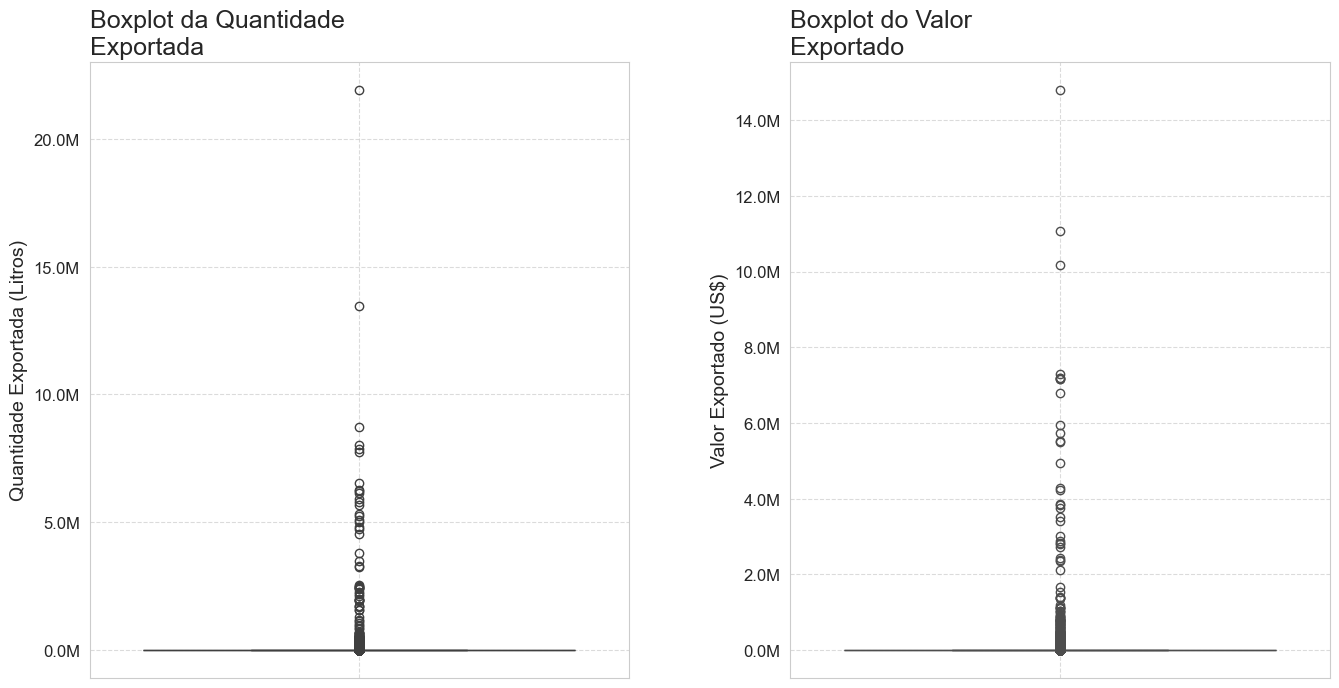

In [92]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(16, 8))

# Primeiro subplot: Boxplot da Quantidade
sns.boxplot(y=df_solicitado['Quantidade_Export_(Litros)'], ax=axes[0])
axes[0].set_title('Boxplot da Quantidade\nExportada', fontsize=18, loc='left')
axes[0].set_ylabel('Quantidade Exportada (Litros)', fontsize=14)

# Segundo subplot: Boxplot do Valor
sns.boxplot(y=df_solicitado['Valor_Export_(US$)'], color='orange', ax=axes[1])
axes[1].set_title('Boxplot do Valor\nExportado', fontsize=18, loc='left')
axes[1].set_ylabel('Valor Exportado (US$)', fontsize=14)

for ax in axes.flat:
  ax.tick_params(axis='both', labelsize=12)
  ax.grid(linestyle='--', alpha=0.7, axis='both')
  ax.yaxis.set_major_formatter(formatter)

plt.subplots_adjust(wspace=0.3)
plt.show()

- Como podemos ver no gráfico acima, há a presensa de muitos outliers. Porém, eles não são especificamente erros. São, necessariamente, transações de exportação mais valiosas e de maior volume para a empresa. Assim, remover estes valores seria um erro grave e invalidaria a análise.
- A ideia é analisá-los com mais cuidado a fim de encontrar algum insight valioso.

##### Isolando e Investigando Outliers por meio do Método IQR

In [93]:
# Investigando os outliers da variável: Valor (Que, necessariamente, é o mais importante para a empresa)
# Extraindo os Quartis
Q1 = df_solicitado['Valor_Export_(US$)'].quantile(0.25)
Q3 = df_solicitado['Valor_Export_(US$)'].quantile(0.75)

# Extraindo o IQR
IQR = Q3 - Q1

# Calculando o limite superior
lim_sup = Q3 + 1.5 * IQR

# Filtrando a base para ver apenas os ouliers
df_outlier_valor = df_solicitado[df_solicitado['Valor_Export_(US$)'] > lim_sup]

# Ordenando os valores para verificar os maiores primeiro
print('As transações mais valiosas: ')
display(df_outlier_valor.sort_values(by='Valor_Export_(US$)', ascending=False))

As transações mais valiosas: 


País País_de_Origem   Ano  Quantidade_Export_(Litros)  \
5957          Rússia         Brasil  2013              5893291.000000   
3719  Estados Unidos         Brasil  1997              8741057.000000   
3583  Estados Unidos         Brasil  1996              7874611.000000   
3175  Estados Unidos         Brasil  1993              6248089.000000   
7035        Paraguai         Brasil  2021              6522527.000000   
...              ...            ...   ...                         ...   
6929          Tuvalu         Brasil  2020                    2.000000   
6708         Equador         Brasil  2019                    2.000000   
4379           Chile         Brasil  2002                   31.000000   
6961           Catar         Brasil  2021                    1.000000   
7025          México         Brasil  2021                    9.000000   

      Valor_Export_(US$)  
5957     14795694.000000  
3719     11062358.000000  
3583     10170078.000000  
3175      7287253.000000  
7035      7192362.000000  
...                  ...  
6929            4.000000  
6708            3.000000  
4379            3.000000  
6961            2.000000  
7025            2.000000  

[1347 rows x 5 columns]

##### Entendendo o Impacto destas Transações com o Princípio de Pareto

- O Princípio de Pareto afirma que, para muitos eventos, aproximadamente 80% dos efeitos vêm de 20% das causas, sendo uma pequena parte dos fatores responsáveis pela maioria dos resultados.
- Saber disso é importante para priorizar esforços e otimizar o uso de recursos, aumentando a eficácia das ações tomadas pela empresa.

In [94]:
valor_total = df_solicitado['Valor_Export_(US$)'].sum()
valor_outliers = df_outlier_valor['Valor_Export_(US$)'].sum()
percentual = (valor_outliers/valor_total)*100

print(f'O valor total exportado foi de US$ {valor_total:,.2f}')
print(f'O valor apenas dos outliers foi de US$ {valor_outliers:,.2f}')
print(f'Os outliers representam {percentual:,.2f}% do valor total exportado.')

O valor total exportado foi de US$ 251,219,055.00
O valor apenas dos outliers foi de US$ 251,219,055.00
Os outliers representam 100.00% do valor total exportado.


- Desta demonstração concluímos que a esmagadora maioria dos registros tem valor de exportação igual a zero, e qualquer transação com valor positivo é tão rara e distante da moda (que é zero) que a o método IQR o classifica como outlier.
- Desta forma, com estes outliers, estamos simplesmente separando transações que aconteceram de transações que não aconteceram.
- Isso já era previsto quando vimos nas estatísticas descritivas com o .describe() que os quartis de 25% e 75% eram zero. Logo, o limite superior seria zero, e qualquer valor acima dele (transações maiores que zero) seriam outliers.
- Assim o correto a se fazer é abandonar a ideia de outlier e trabalhar em cima das transações que de fato aconteceram, as positivas.

##### Trabalhando com as Transações Positivas

In [95]:
# Criando um dataframe apenas com transações positivas
df_transacoes = df_solicitado[(df_solicitado['Quantidade_Export_(Litros)'] > 0) | (df_solicitado['Valor_Export_(US$)'] > 0)]
df_transacoes.head()

País País_de_Origem   Ano  Quantidade_Export_(Litros)  \
4   Antilhas Neerlandesas         Brasil  1970                  280.000000   
17                Bolívia         Brasil  1970                 2512.000000   
31               Colômbia         Brasil  1970                14205.000000   
47         Estados Unidos         Brasil  1970                11200.000000   
57                 Guiana         Brasil  1970                  114.000000   

    Valor_Export_(US$)  
4           207.000000  
17          675.000000  
31         6650.000000  
47         4200.000000  
57           36.000000

In [96]:
# Quantidade de linhas e colunas do dataframe
print(f'Linhas: {df_transacoes.shape[0]}')
print(f'Colunas: {df_transacoes.shape[1]}')

Linhas: 1347
Colunas: 5


In [97]:
df_transacoes['País'].nunique()

136

- A empresa já exportou para 136 países diferentes.

In [98]:
# Estatísticas descritivas do dataframe:
df_transacoes.describe()

Ano  Quantidade_Export_(Litros)  Valor_Export_(US$)
count 1347.000000                 1347.000000         1347.000000
mean  2006.527097               188624.383073       186502.639198
std     14.574647              1043721.555413       893084.593883
min   1970.000000                    0.000000            2.000000
25%   1997.000000                  675.000000         1856.000000
50%   2010.000000                 4259.000000        10600.000000
75%   2019.000000                21937.500000        48300.000000
max   2023.000000             21912914.000000     14795694.000000

- Agora é possível ter uma visão melhor das exportações válidas feita pela empresa.
- As médias das duas variáveis continuam semelhantes, o que era de se esperar sabendo que da última análise para esta retiramos apenas valores iguais a zero, diminuímos apenas a amostragem.
- As medianas diferem: a mediana do Valor é maior do que a mediana da Quantidade, o que indica que o preço médio por litro da transação mais comum da empresa é maior que US$ 1,00. Isso se extende ao terceiro quartil (Q3), reforçando a ideia.

##### Visualizando Graficamente os Outliers das Transações Positivas

In [99]:
# Escolhendo uma peleta de cores do Seaborn
# outra peleta sugestiva: flare

cores = sns.color_palette('ch:s=-.2,r=.6_r', 15)

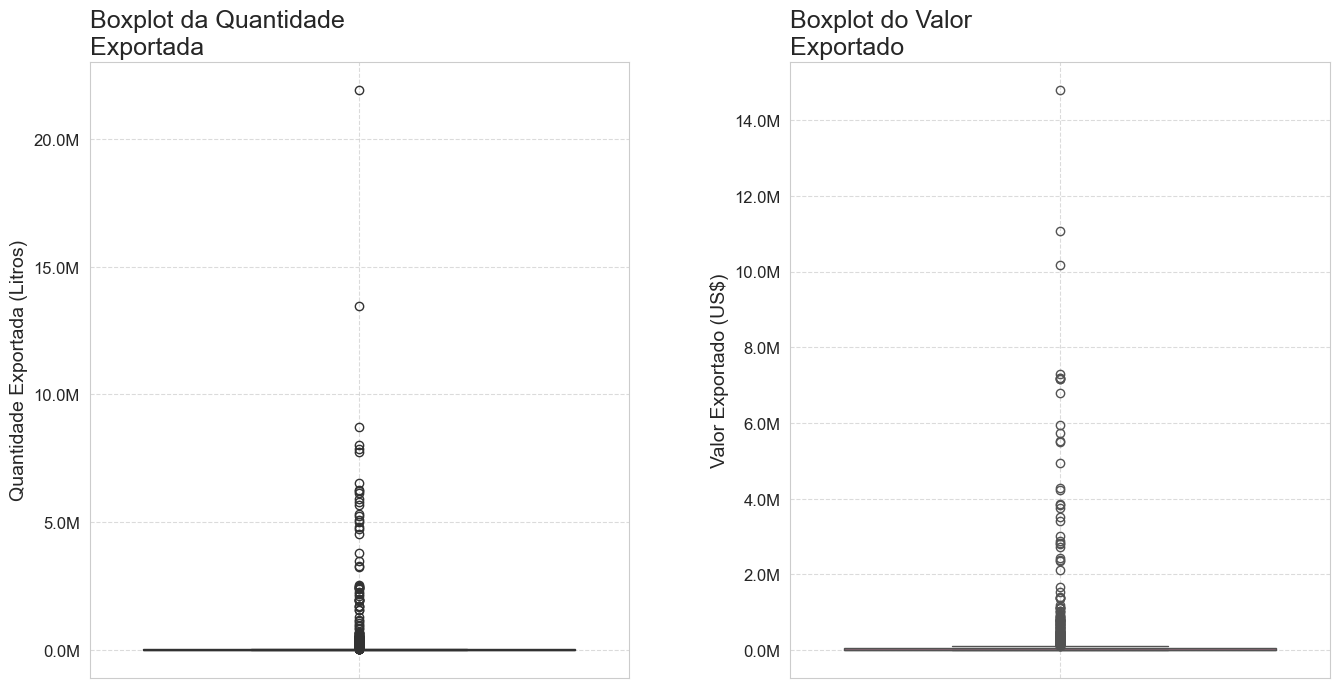

In [100]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(16, 8))

# Primeiro subplot: Boxplot da Quantidade
sns.boxplot(y=df_transacoes['Quantidade_Export_(Litros)'], color=cores[3], ax=axes[0])
axes[0].set_title('Boxplot da Quantidade\nExportada', loc='left', fontsize=18)
axes[0].set_ylabel('Quantidade Exportada (Litros)', fontsize=14)

# Segundo subplot: Boxplot do Valor
sns.boxplot(y=df_transacoes['Valor_Export_(US$)'], color=cores[7], ax=axes[1])
axes[1].set_title('Boxplot do Valor\nExportado', loc='left', fontsize=18)
axes[1].set_ylabel('Valor Exportado (US$)', fontsize=14)

for ax in axes.flat:
  ax.tick_params(axis='both', labelsize=12)
  ax.grid(linestyle='--', alpha=0.7, axis='both')
  ax.yaxis.set_major_formatter(formatter)

plt.subplots_adjust(wspace=0.3)
plt.show()

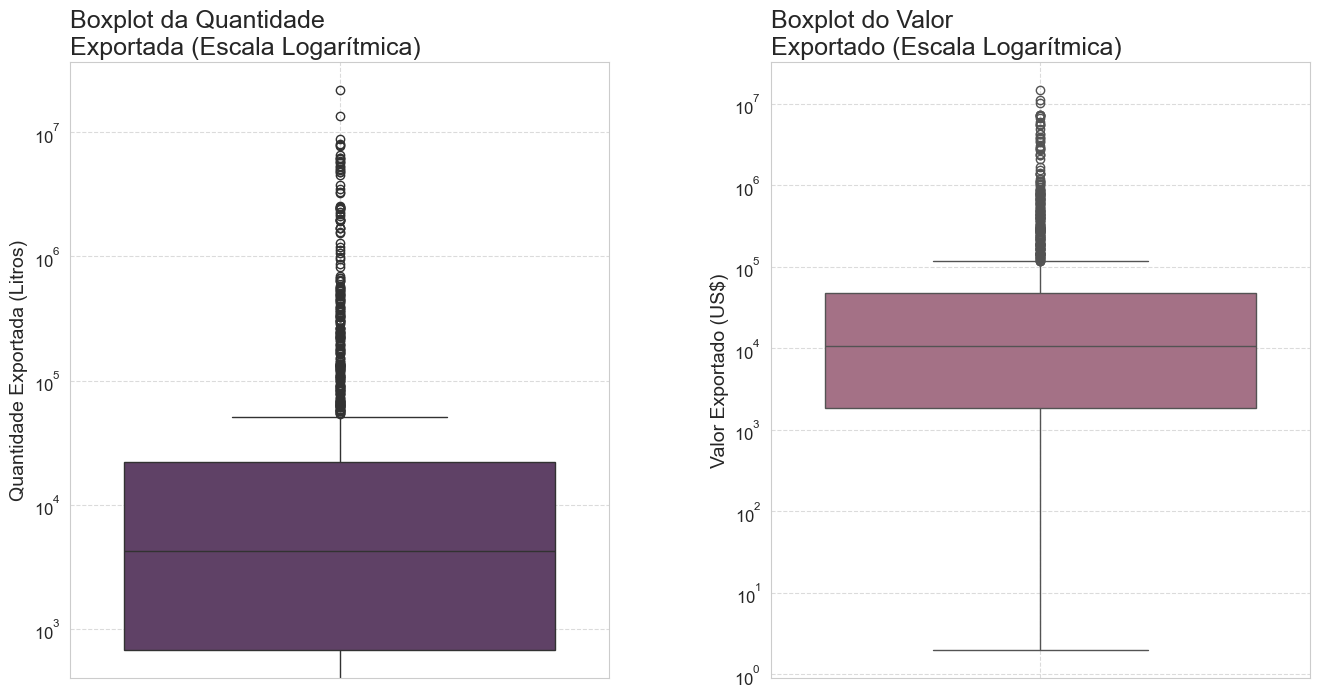

In [101]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(16, 8))

# Primeiro subplot: Boxplot da Quantidade
sns.boxplot(y=df_transacoes['Quantidade_Export_(Litros)'], color=cores[3], ax=axes[0])
axes[0].set_title('Boxplot da Quantidade\nExportada (Escala Logarítmica)', loc='left', fontsize=18)
axes[0].set_ylabel('Quantidade Exportada (Litros)', fontsize=14)

# Segundo subplot: Boxplot do Valor
sns.boxplot(y=df_transacoes['Valor_Export_(US$)'], color=cores[7], ax=axes[1])
axes[1].set_title('Boxplot do Valor\nExportado (Escala Logarítmica)', loc='left', fontsize=18)
axes[1].set_ylabel('Valor Exportado (US$)', fontsize=14)

for ax in axes.flat:
  ax.tick_params(axis='both', labelsize=12)
  ax.grid(linestyle='--', alpha=0.7, axis='both')
  ax.yaxis.set_major_formatter(formatter)
  ax.set_yscale('log')

plt.subplots_adjust(wspace=0.3)
plt.show()

- Como podemos ver acima, ainda há a presensa de muitos outliers.
- A ideia ainda é analisá-los com mais cuidado a fim de encontrar algum insight valioso

##### Isolando e Investigando Outliers por meio do Método IQR nas Transações Positivas

In [102]:
# Investigando os outliers da variável: Valor (Que, necessariamente, é o mais importante para a empresa)
# Extraindo os Quartis
Q1 = df_transacoes['Valor_Export_(US$)'].quantile(0.25)
Q3 = df_transacoes['Valor_Export_(US$)'].quantile(0.75)

# Extraindo o IQR
IQR = Q3 - Q1

# Calculando o limite superior
lim_sup = Q3 + 1.5 * IQR

# Filtrando a base para ver apenas os ouliers
df_outlier_valor = df_transacoes[df_transacoes['Valor_Export_(US$)'] > lim_sup]

# Ordenando os valores para verificar os maiores primeiro
print('As transações mais valiosas: ')
display(df_outlier_valor.sort_values(by='Valor_Export_(US$)', ascending=False))

As transações mais valiosas: 


País País_de_Origem   Ano  Quantidade_Export_(Litros)  \
5957          Rússia         Brasil  2013              5893291.000000   
3719  Estados Unidos         Brasil  1997              8741057.000000   
3583  Estados Unidos         Brasil  1996              7874611.000000   
3175  Estados Unidos         Brasil  1993              6248089.000000   
7035        Paraguai         Brasil  2021              6522527.000000   
...              ...            ...   ...                         ...   
6556           China         Brasil  2018                30835.000000   
7043     Reino Unido         Brasil  2021                25316.000000   
643         Paraguai         Brasil  1974               243294.000000   
7181          Rússia         Brasil  2022                66046.000000   
6144          Canadá         Brasil  2015                24547.000000   

      Valor_Export_(US$)  
5957     14795694.000000  
3719     11062358.000000  
3583     10170078.000000  
3175      7287253.000000  
7035      7192362.000000  
...                  ...  
6556       126336.000000  
7043       122394.000000  
643        119429.000000  
7181       118618.000000  
6144       118394.000000  

[197 rows x 5 columns]

- Foram idenficadas 197, das 1347 presentes, outliers utilizando o método IQR.
- Neles encontramos transações valiosas para a empresa. Delas podemos retirar informações como quando (Ano) e para quem (Países) estas transações foram feitas.
- Vamos analisar as 10 primeiras abaixo.

In [103]:
display(df_outlier_valor.sort_values(by='Valor_Export_(US$)', ascending=False).head(10))

País País_de_Origem   Ano  Quantidade_Export_(Litros)  \
5957          Rússia         Brasil  2013              5893291.000000   
3719  Estados Unidos         Brasil  1997              8741057.000000   
3583  Estados Unidos         Brasil  1996              7874611.000000   
3175  Estados Unidos         Brasil  1993              6248089.000000   
7035        Paraguai         Brasil  2021              6522527.000000   
3227        Paraguai         Brasil  1993             13472058.000000   
3447  Estados Unidos         Brasil  1995              6131483.000000   
7171        Paraguai         Brasil  2022              5076670.000000   
3311  Estados Unidos         Brasil  1994              5674894.000000   
3039  Estados Unidos         Brasil  1992              4820749.000000   

      Valor_Export_(US$)  
5957     14795694.000000  
3719     11062358.000000  
3583     10170078.000000  
3175      7287253.000000  
7035      7192362.000000  
3227      7191046.000000  
3447      7165188.000000  
7171      7156293.000000  
3311      6777712.000000  
3039      5940169.000000

- Da visualização acima podemos tirar duas conclusões:
    - `Estados Unidos` e `Paraguai` são os maiores compradores mesmo tendo a `Rússia` aparecendo com a maior transação já feita.
    - As maiores transações ocorreram a partir da `década de 90` com algumas poucas entrando nos `anos 2000`.
- Essas informações são relevantes e serão aprofundadas posteriormente.

##### Entendendo o Impacto destas Transações com o Princípio de Pareto

In [104]:
valor_total = df_solicitado['Valor_Export_(US$)'].sum()
valor_outliers = df_outlier_valor['Valor_Export_(US$)'].sum()
percentual = (valor_outliers/valor_total)*100

percentual_transacoes = (df_outlier_valor.shape[0]/df_transacoes.shape[0]) * 100

print(f'O número total de transações foi de {df_transacoes.shape[0]:,.2f}')
print(f'O número total de transações apenas dos outliers foi de {df_outlier_valor.shape[0]:,.2f}')
print(f'número total de transações dos outliers representam {percentual_transacoes:,.2f}% de todas as transações.')
print(60*'-')
print(f'O valor total exportado foi de US$ {valor_total:,.2f}')
print(f'O valor apenas dos outliers foi de US$ {valor_outliers:,.2f}')
print(f'Os outliers representam {percentual:,.2f}% do valor total exportado.')

O número total de transações foi de 1,347.00
O número total de transações apenas dos outliers foi de 197.00
número total de transações dos outliers representam 14.63% de todas as transações.
------------------------------------------------------------
O valor total exportado foi de US$ 251,219,055.00
O valor apenas dos outliers foi de US$ 230,646,153.00
Os outliers representam 91.81% do valor total exportado.


- Mesmo sendo poucas transações, apenas 14,63% da totalidade, elas representam mais de 90% de todo o faturamento da empresa ao longo destes anos.
- Isso demonstra a importância de priorizar esforços e otimizar recursos com base nessas transações a fim de aumentar a eficácia das ações tomadas pela empresa.

##### Visualizando Graficamente: Totalidade x Transações Positivas

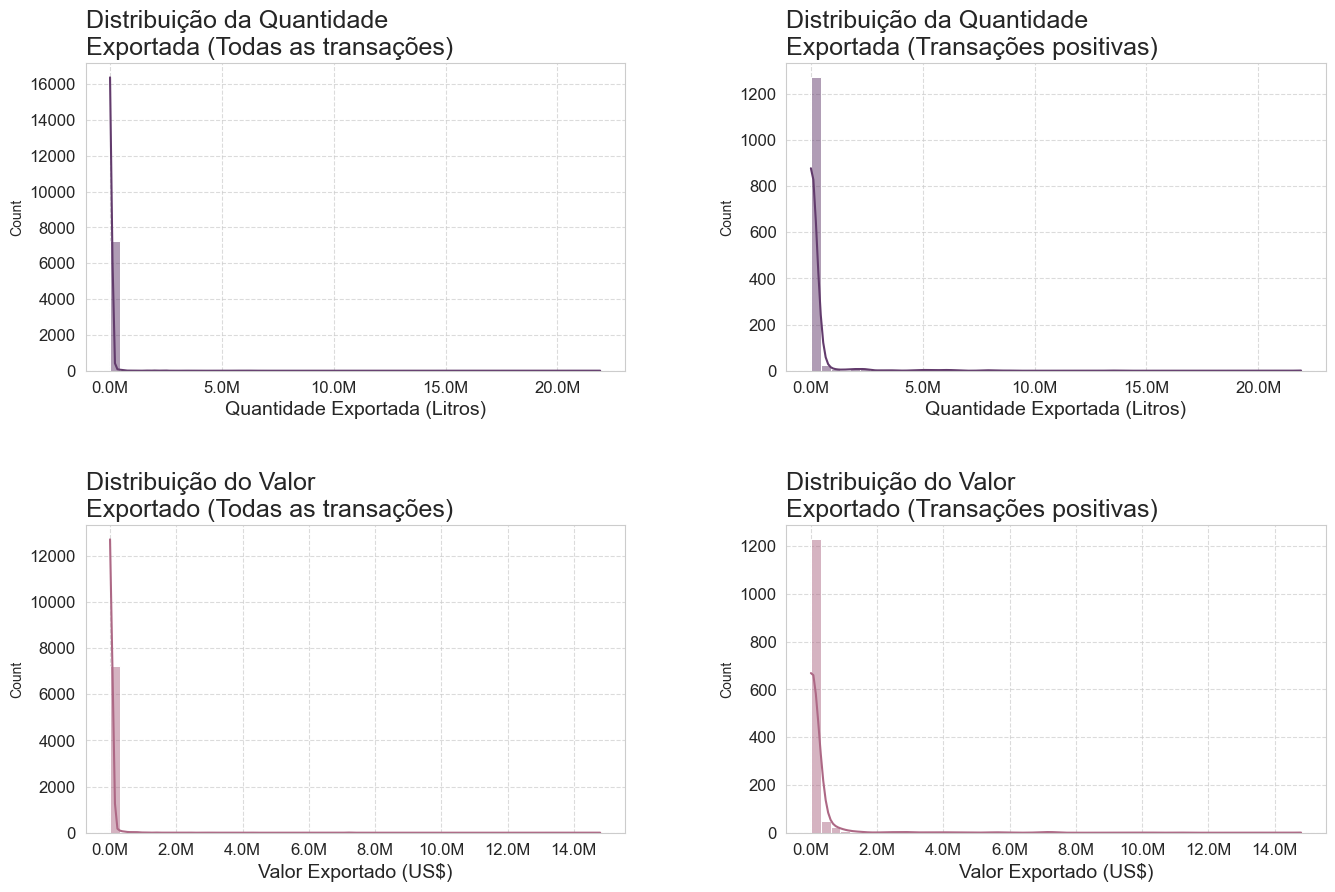

In [105]:
# Criando uma figura e uma grade de 4 linhas e 1 coluna de eixos
fig, axes = plt.subplots(
    nrows = 2,
    ncols = 2,
    figsize=(16, 10)
)

# Primeiro gráfico: Histograma da Quantidade (Todas as transações)
sns.histplot(df_solicitado['Quantidade_Export_(Litros)'], kde=True, bins=50, color=cores[3], ax=axes[0][0])
axes[0][0].set_title('Distribuição da Quantidade\nExportada (Todas as transações)', loc='left', fontsize=18)
axes[0][0].set_xlabel('Quantidade Exportada (Litros)', fontsize=14)

# Segundo gráfico: Histograma da Quantidade (Transações positivas)
sns.histplot(df_transacoes['Quantidade_Export_(Litros)'], kde=True, bins=50, color=cores[3], ax=axes[0][1])
axes[0][1].set_title('Distribuição da Quantidade\nExportada (Transações positivas)', loc='left', fontsize=18)
axes[0][1].set_xlabel('Quantidade Exportada (Litros)', fontsize=14)

# Terceiro gráfico: Histograma do Valor (Todas as transações)
sns.histplot(df_solicitado['Valor_Export_(US$)'], kde=True, bins=50, color=cores[7], ax=axes[1][0])
axes[1][0].set_title('Distribuição do Valor\nExportado (Todas as transações)', loc='left', fontsize=18)
axes[1][0].set_xlabel('Valor Exportado (US$)', fontsize=14)

# Quarto gráfico: Histograma do Valor (Transações positivas)
sns.histplot(df_transacoes['Valor_Export_(US$)'], kde=True, bins=50, color=cores[7], ax=axes[1][1])
axes[1][1].set_title('Distribuição do Valor\nExportado (Transações positivas)', loc='left', fontsize=18)
axes[1][1].set_xlabel('Valor Exportado (US$)', fontsize=14)

for ax in axes.flat:
    ax.tick_params(axis='both', labelsize=12)
    ax.grid(linestyle='--', alpha=0.7, axis='both')
    ax.xaxis.set_major_formatter(formatter)

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

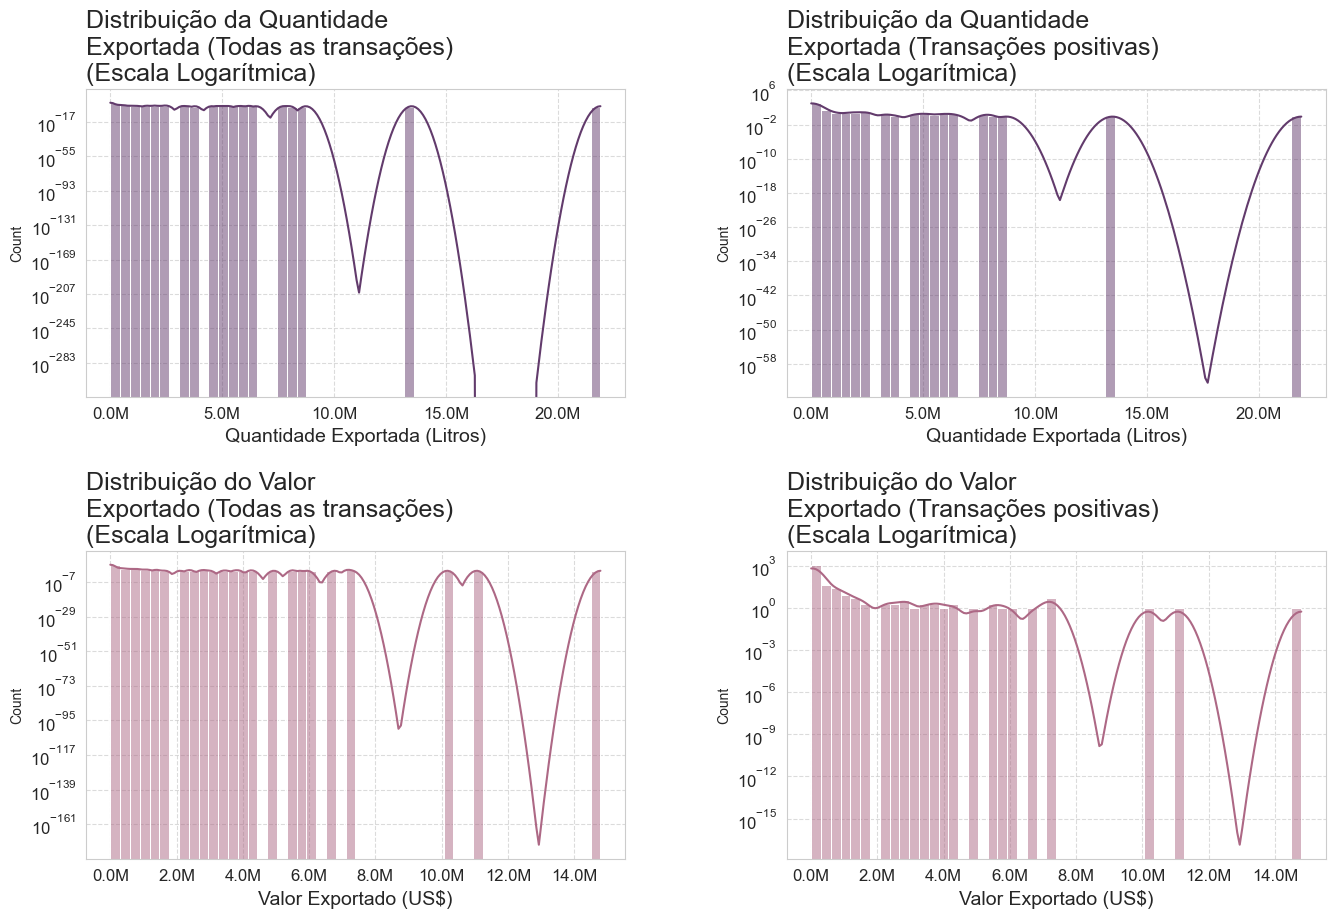

In [106]:
# Criando uma figura e uma grade de 4 linhas e 1 coluna de eixos
fig, axes = plt.subplots(
    nrows = 2,
    ncols = 2,
    figsize=(16, 10)
)

# Primeiro gráfico: Histograma da Quantidade (Todas as transações)
sns.histplot(df_solicitado['Quantidade_Export_(Litros)'], kde=True, bins=50, color=cores[3], ax=axes[0][0])
axes[0][0].set_title('Distribuição da Quantidade\nExportada (Todas as transações)\n(Escala Logarítmica)', loc='left', fontsize=18)
axes[0][0].set_xlabel('Quantidade Exportada (Litros)', fontsize=14)

# Segundo gráfico: Histograma da Quantidade (Transações positivas)
sns.histplot(df_transacoes['Quantidade_Export_(Litros)'], kde=True, bins=50, color=cores[3], ax=axes[0][1])
axes[0][1].set_title('Distribuição da Quantidade\nExportada (Transações positivas)\n(Escala Logarítmica)', loc='left', fontsize=18)
axes[0][1].set_xlabel('Quantidade Exportada (Litros)', fontsize=14)

# Terceiro gráfico: Histograma do Valor (Todas as transações)
sns.histplot(df_solicitado['Valor_Export_(US$)'], kde=True, bins=50, color=cores[7], ax=axes[1][0])
axes[1][0].set_title('Distribuição do Valor\nExportado (Todas as transações)\n(Escala Logarítmica)', loc='left', fontsize=18)
axes[1][0].set_xlabel('Valor Exportado (US$)', fontsize=14)

# Quarto gráfico: Histograma do Valor (Transações positivas)
sns.histplot(df_transacoes['Valor_Export_(US$)'], kde=True, bins=50, color=cores[7], ax=axes[1][1])
axes[1][1].set_title('Distribuição do Valor\nExportado (Transações positivas)\n(Escala Logarítmica)', loc='left', fontsize=18)
axes[1][1].set_xlabel('Valor Exportado (US$)', fontsize=14)

for ax in axes.flat:
    ax.tick_params(axis='both', labelsize=12)
    ax.grid(linestyle='--', alpha=0.7, axis='both')
    ax.set_yscale('log')
    ax.xaxis.set_major_formatter(formatter)

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

- Os gráficos reforçam a ideia de que a grande maioria das transações são de baixo valor/quantidades, até mesmo no universo das transações positivas.

##### Visualizando Graficamente: Transações mais Valiosas (Outliers das Transações Positivas)

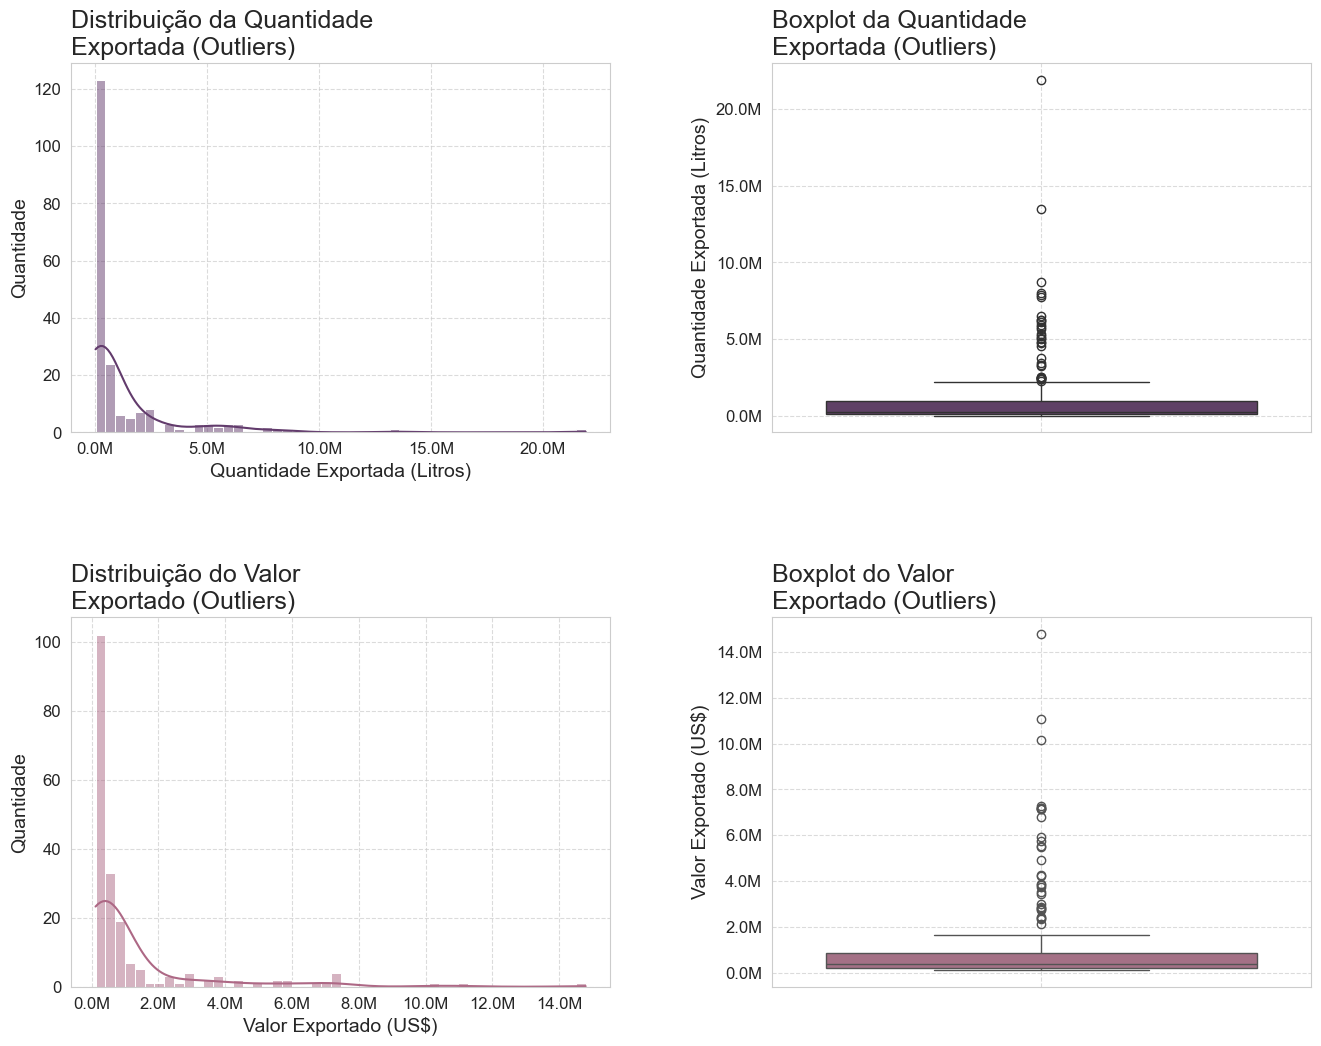

In [107]:
# Criando uma figura e uma grade de 4 linhas e 1 coluna de eixos
fig, axes = plt.subplots(
    nrows = 2,
    ncols = 2,
    figsize=(16, 12)
)

# Primeiro gráfico: Histograma da Quantidade (Outliers)
sns.histplot(df_outlier_valor['Quantidade_Export_(Litros)'], kde=True, bins=50, color=cores[3], ax=axes[0][0])
axes[0][0].set_title('Distribuição da Quantidade\nExportada (Outliers)', loc='left', fontsize=18)
axes[0][0].set_xlabel('Quantidade Exportada (Litros)', fontsize=14)
axes[0][0].set_ylabel('Quantidade', fontsize=14)
axes[0][0].xaxis.set_major_formatter(formatter)

# Segundo gráfico: boxplot da Quantidade
sns.boxplot(y = df_outlier_valor['Quantidade_Export_(Litros)'], color=cores[3], ax=axes[0][1])
axes[0][1].set_title('Boxplot da Quantidade\nExportada (Outliers)', loc='left', fontsize=18)
axes[0][1].set_ylabel('Quantidade Exportada (Litros)', fontsize=14)
axes[0][1].yaxis.set_major_formatter(formatter)

# Terceiro gráfico: Histograma do Valor (Outliers)
sns.histplot(df_outlier_valor['Valor_Export_(US$)'], kde=True, bins=50, ax=axes[1][0], color=cores[7])
axes[1][0].set_title('Distribuição do Valor\nExportado (Outliers)', loc='left', fontsize=18)
axes[1][0].set_xlabel('Valor Exportado (US$)', fontsize=14)
axes[1][0].set_ylabel('Quantidade', fontsize=14)
axes[1][0].xaxis.set_major_formatter(formatter)

# Segundo gráfico: boxplot do Valor
sns.boxplot(y = df_outlier_valor['Valor_Export_(US$)'], ax=axes[1][1], color=cores[7])
axes[1][1].set_title('Boxplot do Valor\nExportado (Outliers)', loc='left', fontsize=18)
axes[1][1].set_ylabel('Valor Exportado (US$)', fontsize=14)
axes[1][1].yaxis.set_major_formatter(formatter)

for ax in axes.flat:
    ax.tick_params(axis='both', labelsize=12)
    ax.grid(linestyle='--', alpha=0.7, axis='both')

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

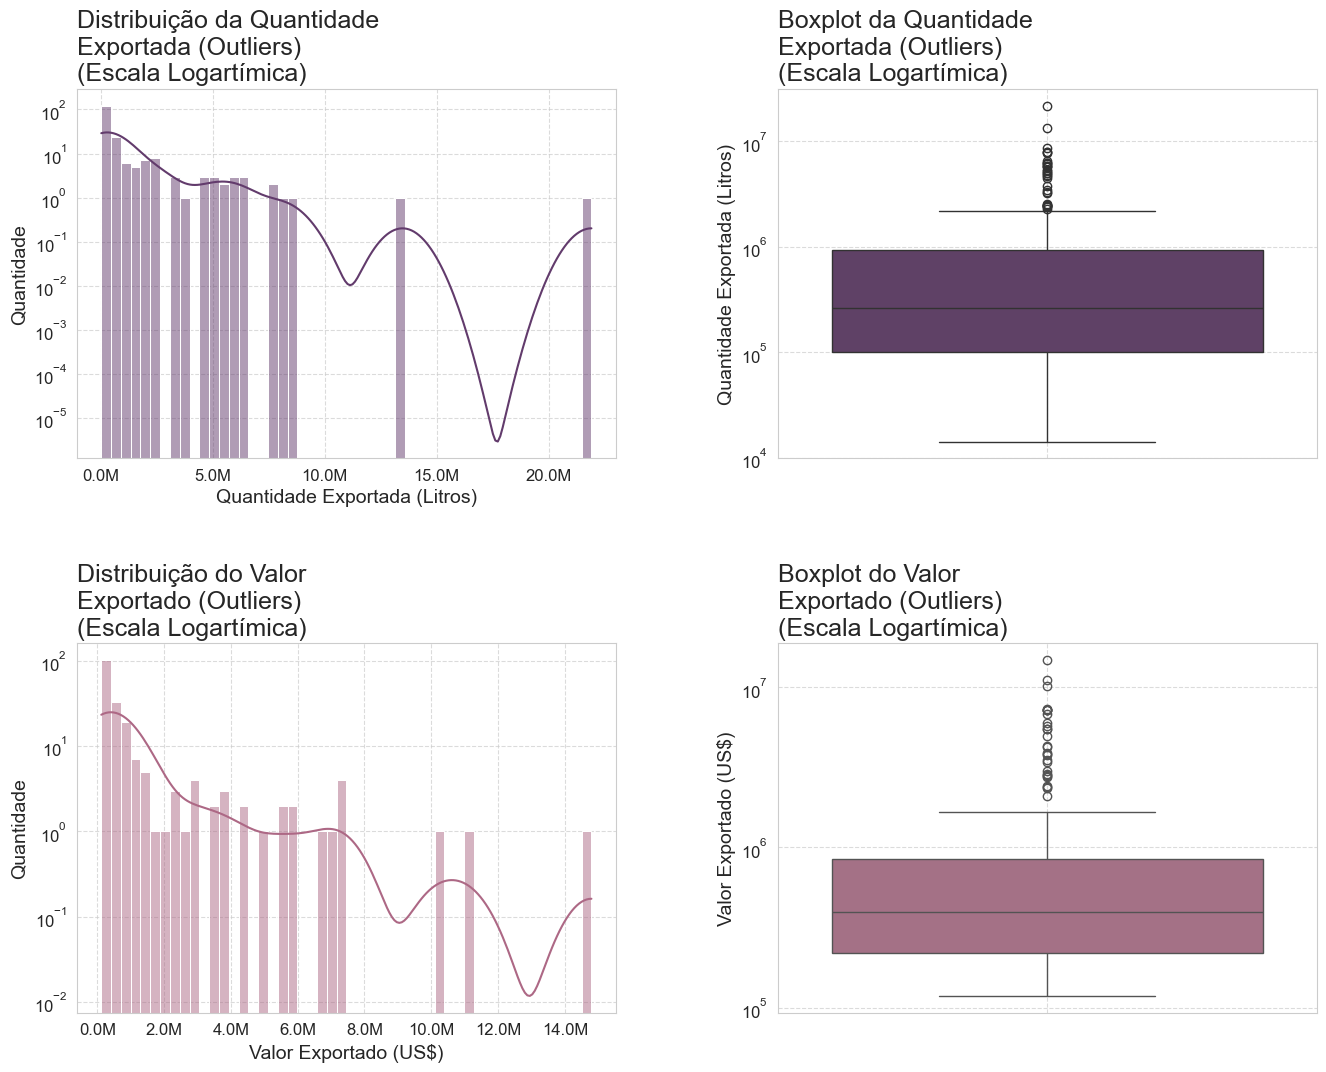

In [108]:
# Criando uma figura e uma grade de 4 linhas e 1 coluna de eixos
fig, axes = plt.subplots(
    nrows = 2,
    ncols = 2,
    figsize=(16, 12)
)

# Primeiro gráfico: Histograma da Quantidade (Outliers)
sns.histplot(df_outlier_valor['Quantidade_Export_(Litros)'], kde=True, bins=50, color=cores[3], ax=axes[0][0])
axes[0][0].set_title('Distribuição da Quantidade\nExportada (Outliers)\n(Escala Logartímica)', loc='left', fontsize=18)
axes[0][0].set_xlabel('Quantidade Exportada (Litros)', fontsize=14)
axes[0][0].set_ylabel('Quantidade', fontsize=14)
axes[0][0].xaxis.set_major_formatter(formatter)

# Segundo gráfico: boxplot da Quantidade
sns.boxplot(y = df_outlier_valor['Quantidade_Export_(Litros)'], color=cores[3], ax=axes[0][1])
axes[0][1].set_title('Boxplot da Quantidade\nExportada (Outliers)\n(Escala Logartímica)', loc='left', fontsize=18)
axes[0][1].set_ylabel('Quantidade Exportada (Litros)', fontsize=14)
axes[0][1].yaxis.set_major_formatter(formatter)

# Terceiro gráfico: Histograma do Valor (Outliers)
sns.histplot(df_outlier_valor['Valor_Export_(US$)'], kde=True, bins=50, ax=axes[1][0], color=cores[7])
axes[1][0].set_title('Distribuição do Valor\nExportado (Outliers)\n(Escala Logartímica)', loc='left', fontsize=18)
axes[1][0].set_xlabel('Valor Exportado (US$)', fontsize=14)
axes[1][0].set_ylabel('Quantidade', fontsize=14)
axes[1][0].xaxis.set_major_formatter(formatter)

# Segundo gráfico: boxplot do Valor
sns.boxplot(y = df_outlier_valor['Valor_Export_(US$)'], ax=axes[1][1], color=cores[7])
axes[1][1].set_title('Boxplot do Valor\nExportado (Outliers)\n(Escala Logartímica)', loc='left', fontsize=18)
axes[1][1].set_ylabel('Valor Exportado (US$)', fontsize=14)
axes[1][1].yaxis.set_major_formatter(formatter)

for ax in axes.flat:
    ax.tick_params(axis='both', labelsize=12)
    ax.grid(linestyle='--', alpha=0.7, axis='both')
    ax.set_yscale('log')

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

- Mesmo tendo isolado outliers no universo de todas as transações válidas a presença deles não deixou de existir.
- Isso reforça que a grande maioria das exportações reais da empresa é de um valor relativamente baixo, como mostram os boxplots: 50% das transações (as caixas) estão achatadas na parte de baixo do gráfico.
- Se trata da operação padrão: vendas de pequeno e médio porte.
- As poucas transações de valores muito maiores esticam o eixo do gráfico até os US$ 14 milhões.
- São esses grandes eventos que de fato movem o negócio.

- Para enxergar e analisar melhor esse impacto, e para lidar melhor com dados tão assimétricos como neste caso, uma boa estratégia é classificar e agrupar essas transações em segmentos de negócios significativos.
- Vamos organizar as transações da seguinte maneira:
    - Pequena: Menor que 1 mil,
    - Média: Entre 1 mil e 50 mil,
    - Grande: Entre 50 mil e 250 mil,
    - Gigante: Maior que 250 mil.

##### Classificando as Transações da Empresa

- Para isso criaremos uma nova coluna no dataframe com as transações positivas (df_transacoes), já que o head não solicitou essa variável para o dataframe final.
- Usaremos a classificação que mencionamos acima.

In [109]:
# Definindo os limites
limites = [0, 0.1, 1000, 50000, 250000, df_outlier_valor['Valor_Export_(US$)'].max()+1]

# Definindo os rótulos da classificação
rotulos = ['Inexistente (US0)', 'Pequena (<US1K)', 'Média (US1K - US50K)', 'Grande (US50K - US250K)', 'Gigante (>US250K)']

# Utilizando a função .cut() do pandas para etiquetar os dados
# O parametro 'right' define que o intervalo inclui o número da esquerda, mas não o da direita.
df_transacoes['Categoria_Transação'] = pd.cut(df_transacoes['Valor_Export_(US$)'], bins=limites, labels=rotulos, right=False)

In [110]:
df_transacoes.head()

País País_de_Origem   Ano  Quantidade_Export_(Litros)  \
4   Antilhas Neerlandesas         Brasil  1970                  280.000000   
17                Bolívia         Brasil  1970                 2512.000000   
31               Colômbia         Brasil  1970                14205.000000   
47         Estados Unidos         Brasil  1970                11200.000000   
57                 Guiana         Brasil  1970                  114.000000   

    Valor_Export_(US$)   Categoria_Transação  
4           207.000000       Pequena (<US1K)  
17          675.000000       Pequena (<US1K)  
31         6650.000000  Média (US1K - US50K)  
47         4200.000000  Média (US1K - US50K)  
57           36.000000       Pequena (<US1K)

##### Inserindo e Analisando a Variável `Preço por litro`

- Anteriormente, inserimos uma classificação de transações para analisar melhor o que se tinha presente nas transações válidas.
- Porém, transações inexistente também são importantes e podem nos ajudar a entender comportamentos de mercado posteriormente.
- Sabendo disso, utilizaremos uma cópia da base que nos foi solicitado, `df_solicitado`, para criarmos um que possua esta variável que mencionamos e a `Preço por litro`.

In [111]:
df_completo = df_solicitado.copy()

In [112]:
df_completo.head()

País País_de_Origem   Ano  Quantidade_Export_(Litros)  \
0            Afeganistão         Brasil  1970                    0.000000   
1               Alemanha         Brasil  1970                    0.000000   
2                 Angola         Brasil  1970                    0.000000   
3               Anguilla         Brasil  1970                    0.000000   
4  Antilhas Neerlandesas         Brasil  1970                  280.000000   

   Valor_Export_(US$)  
0            0.000000  
1            0.000000  
2            0.000000  
3            0.000000  
4          207.000000

In [113]:
# Definindo os limites
limites = [0, 0.1, 1000, 50000, 250000, df_outlier_valor['Valor_Export_(US$)'].max()+1]

# Definindo os rótulos da classificação
rotulos = ['Inexistente (US0)', 'Pequena (<US1K)', 'Média (US1K - US50K)', 'Grande (US50K - US250K)', 'Gigante (>US250K)']

# Utilizando a função .cut() do pandas para etiquetar os dados
# O parametro 'right' define que o intervalo inclui o número da esquerda, mas não o da direita.
df_completo['Categoria_Transação'] = pd.cut(df_completo['Valor_Export_(US$)'], bins=limites, labels=rotulos, right=False)

In [114]:
df_completo.head()

País País_de_Origem   Ano  Quantidade_Export_(Litros)  \
0            Afeganistão         Brasil  1970                    0.000000   
1               Alemanha         Brasil  1970                    0.000000   
2                 Angola         Brasil  1970                    0.000000   
3               Anguilla         Brasil  1970                    0.000000   
4  Antilhas Neerlandesas         Brasil  1970                  280.000000   

   Valor_Export_(US$) Categoria_Transação  
0            0.000000   Inexistente (US0)  
1            0.000000   Inexistente (US0)  
2            0.000000   Inexistente (US0)  
3            0.000000   Inexistente (US0)  
4          207.000000     Pequena (<US1K)

- Transações que não ocorreram não faz sentido ser classificada como `Pequena` por não se tratar de uma transação de fato. Dessa forma, essas linhas foram preenchidas com `Inexistente US0`.

In [115]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   País                        7344 non-null   object  
 1   País_de_Origem              7344 non-null   object  
 2   Ano                         7344 non-null   int32   
 3   Quantidade_Export_(Litros)  7344 non-null   float64 
 4   Valor_Export_(US$)          7344 non-null   float64 
 5   Categoria_Transação         7344 non-null   category
dtypes: category(1), float64(2), int32(1), object(2)
memory usage: 265.7+ KB


In [116]:
# Convertendo a variável categoria para object
df_completo['Categoria_Transação'] = df_completo['Categoria_Transação'].astype('object')

In [117]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   País                        7344 non-null   object 
 1   País_de_Origem              7344 non-null   object 
 2   Ano                         7344 non-null   int32  
 3   Quantidade_Export_(Litros)  7344 non-null   float64
 4   Valor_Export_(US$)          7344 non-null   float64
 5   Categoria_Transação         7344 non-null   object 
dtypes: float64(2), int32(1), object(3)
memory usage: 315.7+ KB


In [118]:
# Adicionando a Preço por litro com valor zero, primeiramente
# A intenção é 'driblar' divisões por zero, o que aconteceria caso dividissemos Valor/Quantidade diretamente
df_completo['Preço_por_Litro'] = 0.0

In [119]:
df_completo.head()

País País_de_Origem   Ano  Quantidade_Export_(Litros)  \
0            Afeganistão         Brasil  1970                    0.000000   
1               Alemanha         Brasil  1970                    0.000000   
2                 Angola         Brasil  1970                    0.000000   
3               Anguilla         Brasil  1970                    0.000000   
4  Antilhas Neerlandesas         Brasil  1970                  280.000000   

   Valor_Export_(US$) Categoria_Transação  Preço_por_Litro  
0            0.000000   Inexistente (US0)         0.000000  
1            0.000000   Inexistente (US0)         0.000000  
2            0.000000   Inexistente (US0)         0.000000  
3            0.000000   Inexistente (US0)         0.000000  
4          207.000000     Pequena (<US1K)         0.000000

In [120]:
# Criando uma máscara com Quantidades diferentes de zero
mascara_positiva = df_completo['Quantidade_Export_(Litros)'] != 0

# Usando o .loc() para trabalhar especificamente com as linhas presentes na máscara que criamos
df_completo.loc[mascara_positiva, 'Preço_por_Litro'] = (
    df_completo.loc[mascara_positiva, 'Valor_Export_(US$)'] /
    df_completo.loc[mascara_positiva, 'Quantidade_Export_(Litros)']
)

In [121]:
df_completo.head()

País País_de_Origem   Ano  Quantidade_Export_(Litros)  \
0            Afeganistão         Brasil  1970                    0.000000   
1               Alemanha         Brasil  1970                    0.000000   
2                 Angola         Brasil  1970                    0.000000   
3               Anguilla         Brasil  1970                    0.000000   
4  Antilhas Neerlandesas         Brasil  1970                  280.000000   

   Valor_Export_(US$) Categoria_Transação  Preço_por_Litro  
0            0.000000   Inexistente (US0)         0.000000  
1            0.000000   Inexistente (US0)         0.000000  
2            0.000000   Inexistente (US0)         0.000000  
3            0.000000   Inexistente (US0)         0.000000  
4          207.000000     Pequena (<US1K)         0.739286

In [122]:
# Voltando a trabalhar apenas com transações válidas
df_completo_positivo = df_completo[df_completo['Valor_Export_(US$)'] > 0]
df_completo_positivo.head()

País País_de_Origem   Ano  Quantidade_Export_(Litros)  \
4   Antilhas Neerlandesas         Brasil  1970                  280.000000   
17                Bolívia         Brasil  1970                 2512.000000   
31               Colômbia         Brasil  1970                14205.000000   
47         Estados Unidos         Brasil  1970                11200.000000   
57                 Guiana         Brasil  1970                  114.000000   

    Valor_Export_(US$)   Categoria_Transação  Preço_por_Litro  
4           207.000000       Pequena (<US1K)         0.739286  
17          675.000000       Pequena (<US1K)         0.268710  
31         6650.000000  Média (US1K - US50K)         0.468145  
47         4200.000000  Média (US1K - US50K)         0.375000  
57           36.000000       Pequena (<US1K)         0.315789

In [123]:
# Estatísticas descritivas
df_completo_positivo.describe()

Ano  Quantidade_Export_(Litros)  Valor_Export_(US$)  \
count 1347.000000                 1347.000000         1347.000000   
mean  2006.527097               188624.383073       186502.639198   
std     14.574647              1043721.555413       893084.593883   
min   1970.000000                    0.000000            2.000000   
25%   1997.000000                  675.000000         1856.000000   
50%   2010.000000                 4259.000000        10600.000000   
75%   2019.000000                21937.500000        48300.000000   
max   2023.000000             21912914.000000     14795694.000000   

       Preço_por_Litro  
count      1347.000000  
mean          3.276987  
std           3.746305  
min           0.000000  
25%           1.222222  
50%           2.237932  
75%           4.278888  
max          58.000000

- A média não muda tanto com relação a mediana como nos casos das demais variáveis.
- Mesmo não mudando, o fato da média ser um pouco maior que a mediana nos diz que há alguns produtos com o preço por litro um pouco mais elevado que está puxando ela para cima.
- Um exemplo disso é o valor máximo de 58. Acho que seria importante verificar o que aconteceu neste caso.
- Posteriormente, vamos visualizar o histrograma desta variável e entender como seus valores estão distribuídos.

In [124]:
# Visualizando o top 10
df_completo_positivo.sort_values(by='Preço_por_Litro', ascending=False).head(10)

País País_de_Origem   Ano  Quantidade_Export_(Litros)  \
5810                Panamá         Brasil  2012                   39.000000   
6775            Serra Leoa         Brasil  2019                   18.000000   
7207               Áustria         Brasil  2022                    6.000000   
5208             Dinamarca         Brasil  2008                  518.000000   
5310             Argentina         Brasil  2009                  162.000000   
5213            Eslováquia         Brasil  2008                  585.000000   
6779                Suécia         Brasil  2019                   28.000000   
3362                Panamá         Brasil  1994                   47.000000   
4868  República Dominicana         Brasil  2005                   50.000000   
7254               Espanha         Brasil  2023                  180.000000   

      Valor_Export_(US$)   Categoria_Transação  Preço_por_Litro  
5810         2262.000000  Média (US1K - US50K)        58.000000  
6775          717.000000       Pequena (<US1K)        39.833333  
7207          212.000000       Pequena (<US1K)        35.333333  
5208        15905.000000  Média (US1K - US50K)        30.704633  
5310         4523.000000  Média (US1K - US50K)        27.919753  
5213        16063.000000  Média (US1K - US50K)        27.458120  
6779          761.000000       Pequena (<US1K)        27.178571  
3362         1188.000000  Média (US1K - US50K)        25.276596  
4868         1188.000000  Média (US1K - US50K)        23.760000  
7254         4171.000000  Média (US1K - US50K)        23.172222

- O top 10 nos mostra valores bem acima da média e mediana que vimos acima;
- Além disso, vemos também que a variável não está diretamente ligada aos maiores valores de exportação já que não há a presença de transações classificadas como gigante;
- É possível destacar também que, com exceção da transação com index=3362 que aconteceu no ano de 1994, todas as transações ocorreram nos anos 2000.

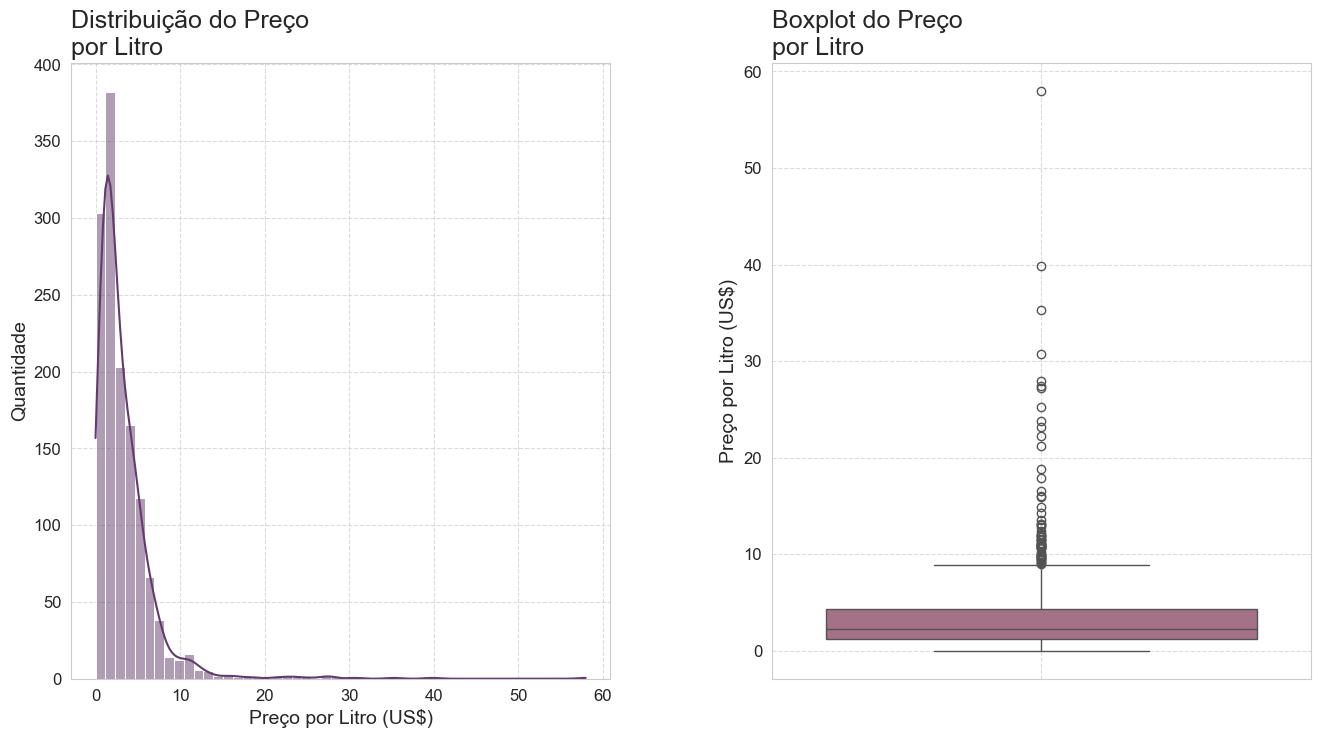

In [125]:
fig, axes = plt.subplots(
    nrows = 1,
    ncols = 2,
    figsize=(16,8)
)

# Primeiro gráfico: Histograma do Preço por Litro
sns.histplot(df_completo_positivo['Preço_por_Litro'], kde=True, bins=50, color=cores[3], ax=axes[0])
axes[0].set_title('Distribuição do Preço \npor Litro', fontsize=18, loc='left')
axes[0].set_xlabel('Preço por Litro (US$)', fontsize=14)
axes[0].set_ylabel('Quantidade', fontsize=14)

# Segundo gráfico: Boxplot do Preço por Litro
sns.boxplot(df_completo_positivo['Preço_por_Litro'], color=cores[7], ax=axes[1])
axes[1].set_title('Boxplot do Preço \npor Litro', fontsize=18, loc='left')
axes[1].set_ylabel('Preço por Litro (US$)', fontsize=14)

for ax in axes.flat:
    ax.tick_params(axis='both', labelsize=12)
    ax.grid(linestyle='--', alpha=0.7, axis='both')

plt.subplots_adjust(wspace=0.3)
plt.show()

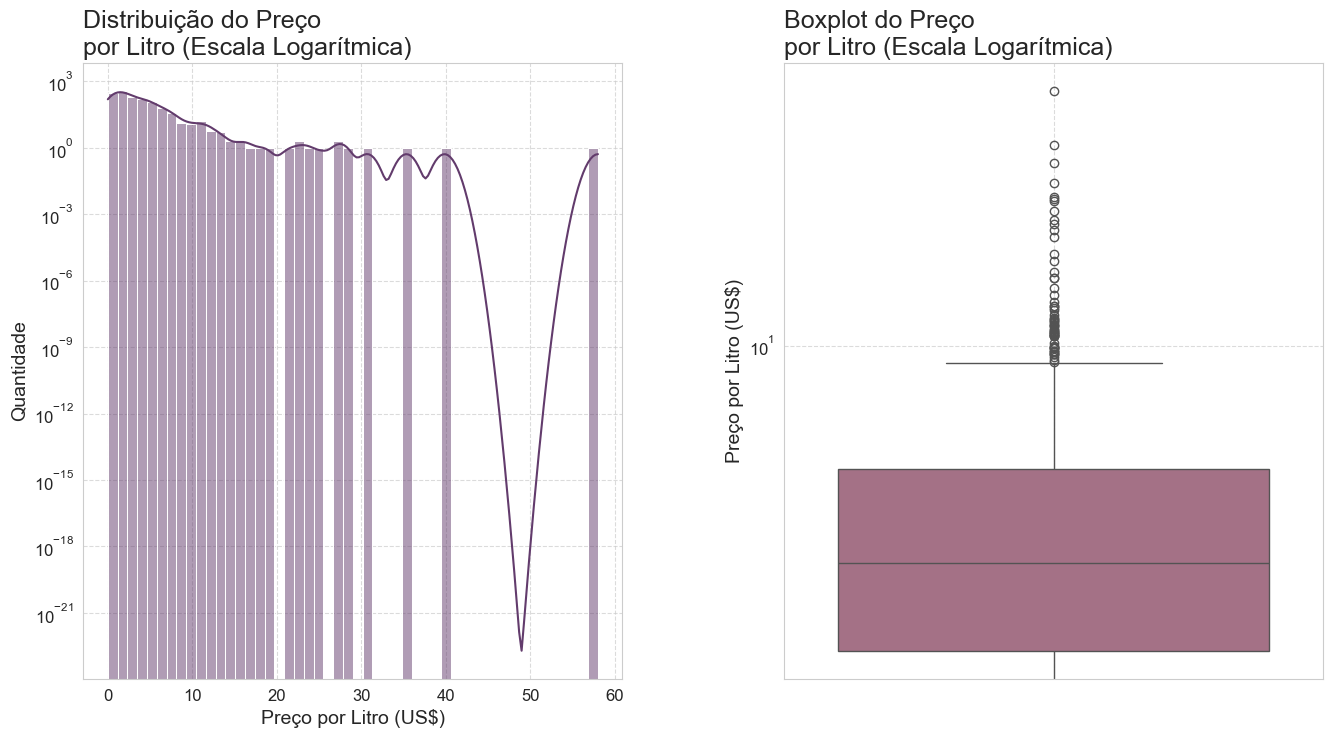

In [126]:
fig, axes = plt.subplots(
    nrows = 1,
    ncols = 2,
    figsize=(16,8)
)

# Primeiro gráfico: Histograma do Preço por Litro
sns.histplot(df_completo_positivo['Preço_por_Litro'], kde=True, bins=50, color=cores[3], ax=axes[0])
axes[0].set_title('Distribuição do Preço \npor Litro (Escala Logarítmica)', fontsize=18, loc='left')
axes[0].set_xlabel('Preço por Litro (US$)', fontsize=14)
axes[0].set_ylabel('Quantidade', fontsize=14)

# Segundo gráfico: Boxplot do Preço por Litro
sns.boxplot(df_completo_positivo['Preço_por_Litro'], color=cores[7], ax=axes[1])
axes[1].set_title('Boxplot do Preço \npor Litro (Escala Logarítmica)', fontsize=18, loc='left')
axes[1].set_ylabel('Preço por Litro (US$)', fontsize=14)

for ax in axes.flat:
    ax.tick_params(axis='both', labelsize=12)
    ax.grid(linestyle='--', alpha=0.7, axis='both')
    ax.set_yscale('log')

plt.subplots_adjust(wspace=0.3)
plt.show()

- A distribuição nos mostra que a grande maioria dos valores estão concentrados a esquerda, entre 0 e 20;
- No boxplot há uma presença considerável de outliers, bem acima dos valores padrões;
- Podemos vê-los a seguir utilizando o método IQR e tentar retirar alguma informação importante disso.

In [127]:
# Investigando os outliers da variável: Preço por Litro
# Extraindo os Quartis
Q1 = df_completo_positivo['Preço_por_Litro'].quantile(0.25)
Q3 = df_completo_positivo['Preço_por_Litro'].quantile(0.75)

# Extraindo o IQR
IQR = Q3 - Q1

# Calculando o limite superior
lim_sup = Q3 + 1.5 * IQR

# Filtrando a base para ver apenas os ouliers
df_completo_outlier = df_completo_positivo[df_completo_positivo['Preço_por_Litro'] > lim_sup]

# Ordenando os valores para verificar os maiores primeiro
display(df_completo_outlier.sort_values(by='Preço_por_Litro', ascending=False))

País País_de_Origem   Ano  Quantidade_Export_(Litros)  \
5810      Panamá         Brasil  2012                   39.000000   
6775  Serra Leoa         Brasil  2019                   18.000000   
7207     Áustria         Brasil  2022                    6.000000   
5208   Dinamarca         Brasil  2008                  518.000000   
5310   Argentina         Brasil  2009                  162.000000   
...          ...            ...   ...                         ...   
7022  Mauritânia         Brasil  2021                    9.000000   
6889      México         Brasil  2020                   24.000000   
3678   Argentina         Brasil  1997                   40.000000   
5313   Austrália         Brasil  2009                 1014.000000   
6122      Angola         Brasil  2015                 1908.000000   

      Valor_Export_(US$)   Categoria_Transação  Preço_por_Litro  
5810         2262.000000  Média (US1K - US50K)        58.000000  
6775          717.000000       Pequena (<US1K)        39.833333  
7207          212.000000       Pequena (<US1K)        35.333333  
5208        15905.000000  Média (US1K - US50K)        30.704633  
5310         4523.000000  Média (US1K - US50K)        27.919753  
...                  ...                   ...              ...  
7022           85.000000       Pequena (<US1K)         9.444444  
6889          226.000000       Pequena (<US1K)         9.416667  
3678          369.000000       Pequena (<US1K)         9.225000  
5313         9195.000000  Média (US1K - US50K)         9.068047  
6122        17089.000000  Média (US1K - US50K)         8.956499  

[61 rows x 7 columns]

In [128]:
df_completo_outlier.describe()

Ano  Quantidade_Export_(Litros)  Valor_Export_(US$)  \
count   61.000000                   61.000000           61.000000   
mean  2015.262295                 3635.163934        42371.590164   
std      7.613369                16974.774592       194709.486265   
min   1986.000000                    2.000000           20.000000   
25%   2011.000000                   36.000000          484.000000   
50%   2017.000000                  456.000000         6999.000000   
75%   2021.000000                 2223.000000        27665.000000   
max   2023.000000               132688.000000      1523699.000000   

       Preço_por_Litro  
count        61.000000  
mean         15.329566  
std           8.867770  
min           8.956499  
25%          10.666667  
50%          11.581281  
75%          16.000000  
max          58.000000

- Aqui eu gostaria de destacar a variável `Ano` que, falando de média, saltou de 2006 para 2015;
- Isso indica um forte crescimento ao longo dos anos deste valor.

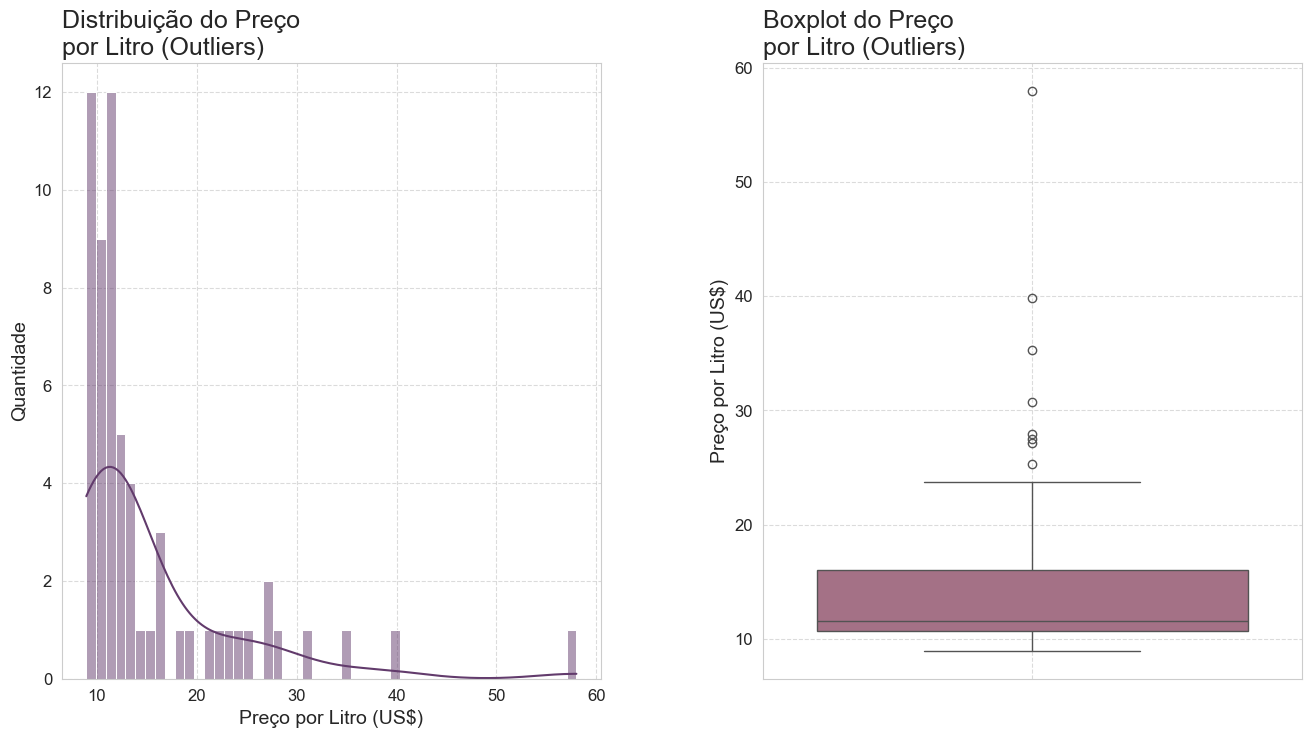

In [129]:
# Histograma de Preço_por_Litro (Outliers)
fig, axes = plt.subplots(
    nrows = 1,
    ncols = 2,
    figsize=(16,8)
)

# Primeiro gráfico: Histograma do Preço por Litro (Outliers)
sns.histplot(df_completo_outlier['Preço_por_Litro'], kde=True, bins=50, color=cores[3], ax=axes[0])
axes[0].set_title('Distribuição do Preço \npor Litro (Outliers)', fontsize=18, loc='left')
axes[0].set_xlabel('Preço por Litro (US$)', fontsize=14)
axes[0].set_ylabel('Quantidade', fontsize=14)

# Segundo gráfico: Boxplot do Preço por Litro (Outliers)
sns.boxplot(df_completo_outlier['Preço_por_Litro'], color=cores[7], ax=axes[1])
axes[1].set_title('Boxplot do Preço \npor Litro (Outliers)', fontsize=18, loc='left')
axes[1].set_ylabel('Preço por Litro (US$)', fontsize=14)

for ax in axes.flat:
    ax.tick_params(axis='both', labelsize=12)
    ax.grid(linestyle='--', alpha=0.7, axis='both')

plt.subplots_adjust(wspace=0.3)
plt.show()

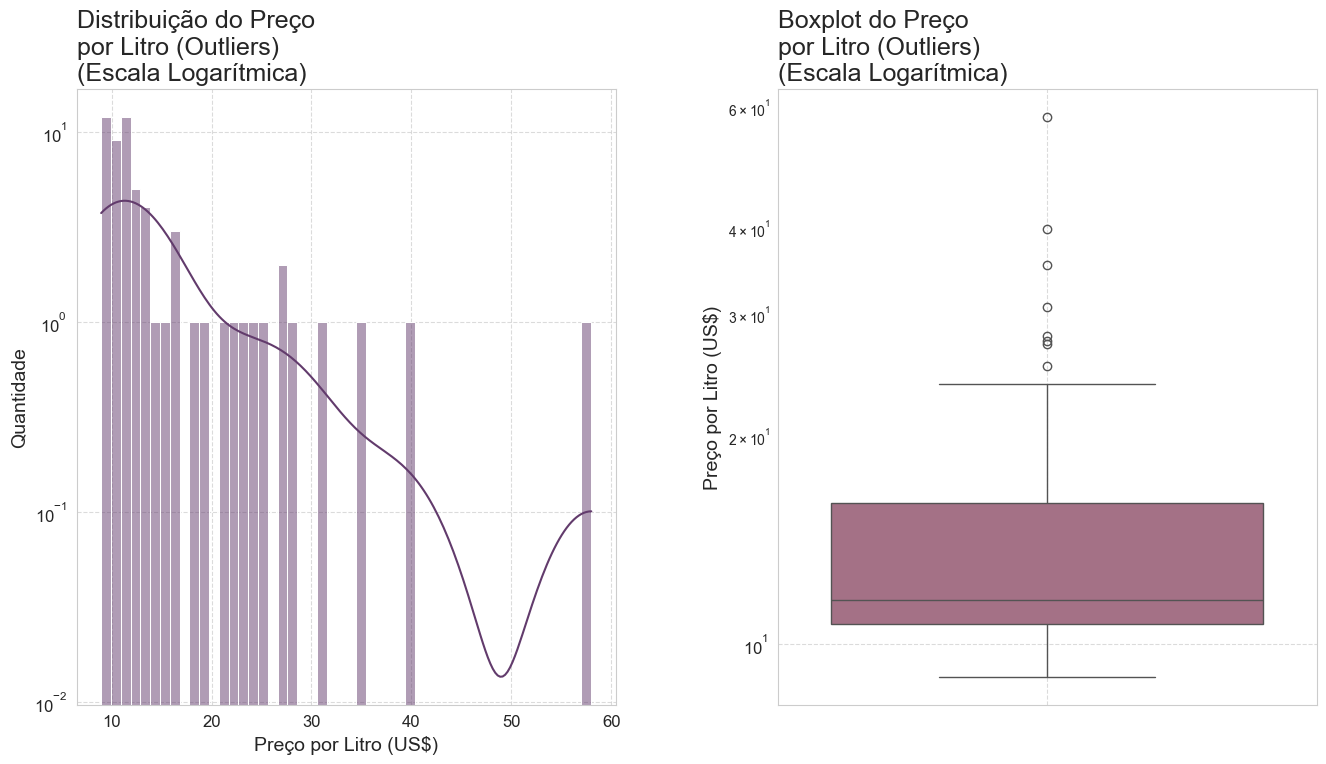

In [130]:
# Histograma de Preço_por_Litro (Outliers)
fig, axes = plt.subplots(
    nrows = 1,
    ncols = 2,
    figsize=(16,8)
)

# Primeiro gráfico: Histograma do Preço por Litro (Outliers)
sns.histplot(df_completo_outlier['Preço_por_Litro'], kde=True, bins=50, color=cores[3], ax=axes[0])
axes[0].set_title('Distribuição do Preço \npor Litro (Outliers)\n(Escala Logarítmica)', fontsize=18, loc='left')
axes[0].set_xlabel('Preço por Litro (US$)', fontsize=14)
axes[0].set_ylabel('Quantidade', fontsize=14)

# Segundo gráfico: Boxplot do Preço por Litro (Outliers)
sns.boxplot(df_completo_outlier['Preço_por_Litro'], color=cores[7], ax=axes[1])
axes[1].set_title('Boxplot do Preço \npor Litro (Outliers)\n(Escala Logarítmica)', fontsize=18, loc='left')
axes[1].set_ylabel('Preço por Litro (US$)', fontsize=14)

for ax in axes.flat:
    ax.tick_params(axis='both', labelsize=12)
    ax.grid(linestyle='--', alpha=0.7, axis='both')
    ax.set_yscale('log')

plt.subplots_adjust(wspace=0.3)
plt.show()

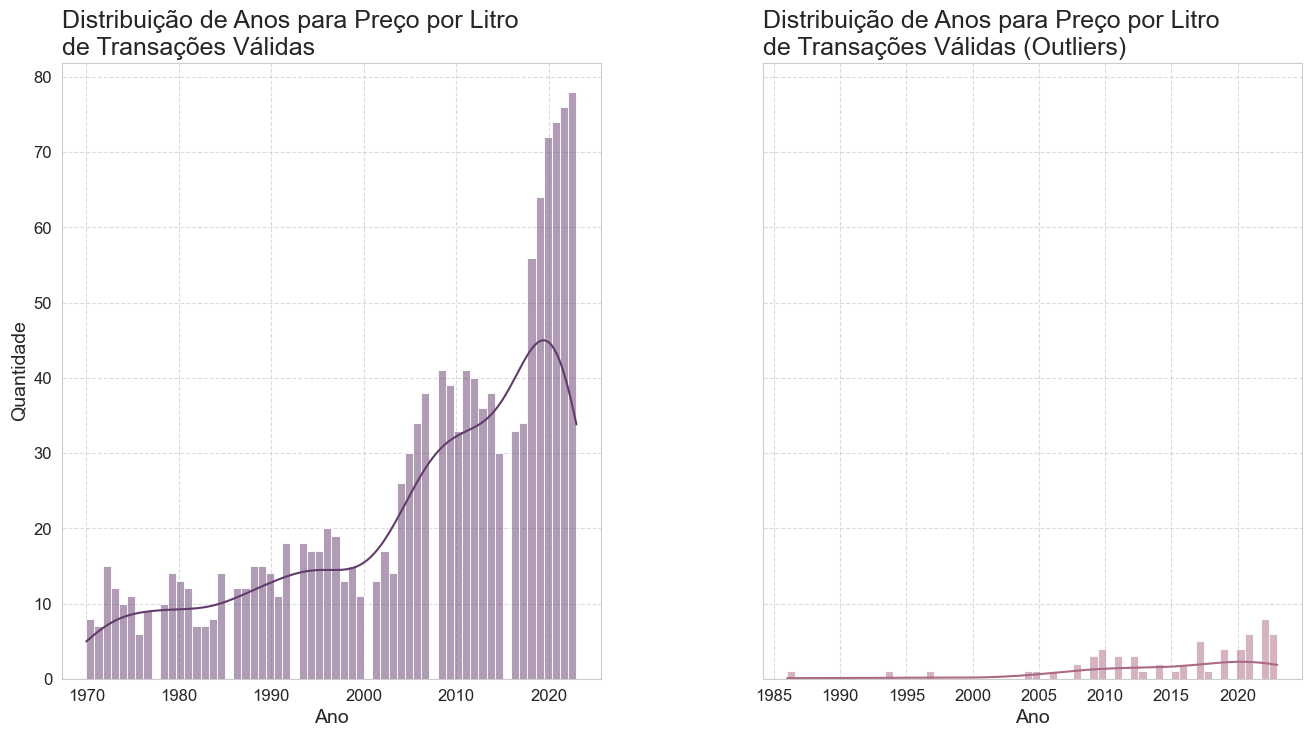

In [131]:
fig, axes = plt.subplots(
    nrows = 1,
    ncols = 2,
    figsize=(16,8),
    sharey=True
)

# Primeiro gráfico: Histograma dos anos presentes nos maiores valores do preço por litro (maiores que zero)
sns.histplot(df_completo_positivo['Ano'], kde=True, bins=60, color=cores[3], ax=axes[0])
axes[0].set_title('Distribuição de Anos para Preço por Litro\nde Transações Válidas', fontsize=18, loc='left')
axes[0].set_xlabel('Ano', fontsize=14)


# Segundo gráfico: Histograma dos anos presentes nos maiores valores do preço por litro (Outlier)
sns.histplot(df_completo_outlier['Ano'], kde=True, bins=60, color=cores[7], ax=axes[1])
axes[1].set_title('Distribuição de Anos para Preço por Litro\nde Transações Válidas (Outliers)', fontsize=18, loc='left')
axes[1].set_xlabel('Ano', fontsize=14)

for ax in axes.flat:
    ax.tick_params(axis='both', labelsize=12)
    ax.grid(linestyle='--', alpha=0.7, axis='both')
    ax.set_ylabel('Quantidade', fontsize=14)

plt.subplots_adjust(wspace=0.3)
plt.show()

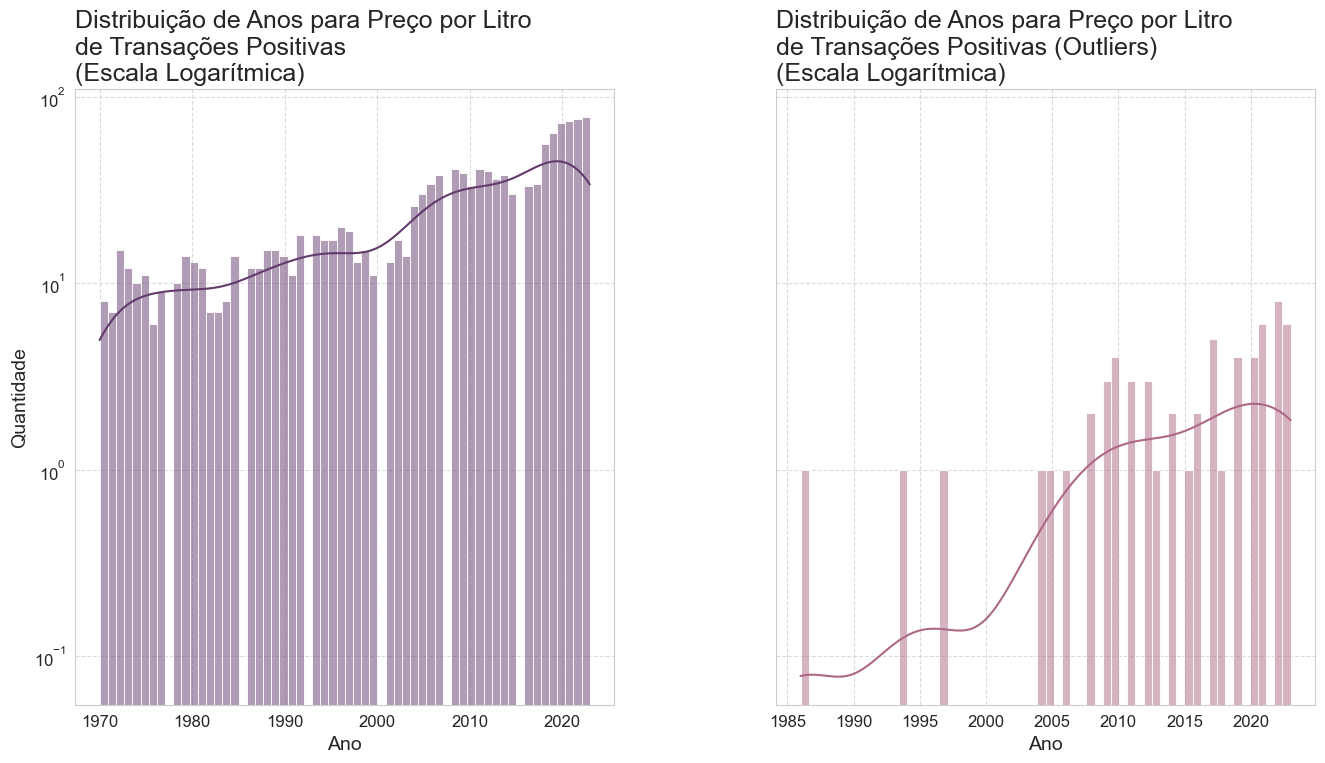

In [132]:
fig, axes = plt.subplots(
    nrows = 1,
    ncols = 2,
    figsize=(16,8),
    sharey=True
)

# Primeiro gráfico: Histograma dos anos presentes nos maiores valores do preço por litro (maiores que zero)
sns.histplot(df_completo_positivo['Ano'], kde=True, bins=60, color=cores[3], ax=axes[0])
axes[0].set_title('Distribuição de Anos para Preço por Litro\nde Transações Positivas\n(Escala Logarítmica)', fontsize=18, loc='left')
axes[0].set_xlabel('Ano', fontsize=14)

# Segundo gráfico: Histograma dos anos presentes nos maiores valores do preço por litro (Outlier)
sns.histplot(df_completo_outlier['Ano'], kde=True, bins=60, color=cores[7], ax=axes[1])
axes[1].set_title('Distribuição de Anos para Preço por Litro\nde Transações Positivas (Outliers)\n(Escala Logarítmica)', fontsize=18, loc='left')
axes[1].set_xlabel('Ano', fontsize=14)

for ax in axes.flat:
    ax.tick_params(axis='both', labelsize=12)
    ax.grid(linestyle='--', alpha=0.7, axis='both')
    ax.set_ylabel('Quantidade', fontsize=14)
    ax.set_yscale('log')

plt.subplots_adjust(wspace=0.3)
plt.show()

- Como foi falado anteriormente, é possível notar um forte crescimento de transações com o passar do tempo, incluindo transações com um alto valor pago pelo litro (no caso dos outliers);
- Isso fica ainda mais acentuado a partir dos anos 2000.

#### Variável Categórica: `País`

In [133]:
top_15_paises = df_completo_positivo['País'].value_counts().nlargest(15).reset_index()

In [134]:
top_15_paises

País  count
0          Estados Unidos     54
1                Paraguai     54
2                 Bolívia     51
3                   Japão     48
4                  França     37
5                  Angola     37
6                Alemanha     36
7                  Canadá     36
8             Reino Unido     33
9               Dinamarca     30
10  Antilhas Neerlandesas     26
11          Países Baixos     26
12                Uruguai     25
13                  Suíça     25
14               Barbados     22

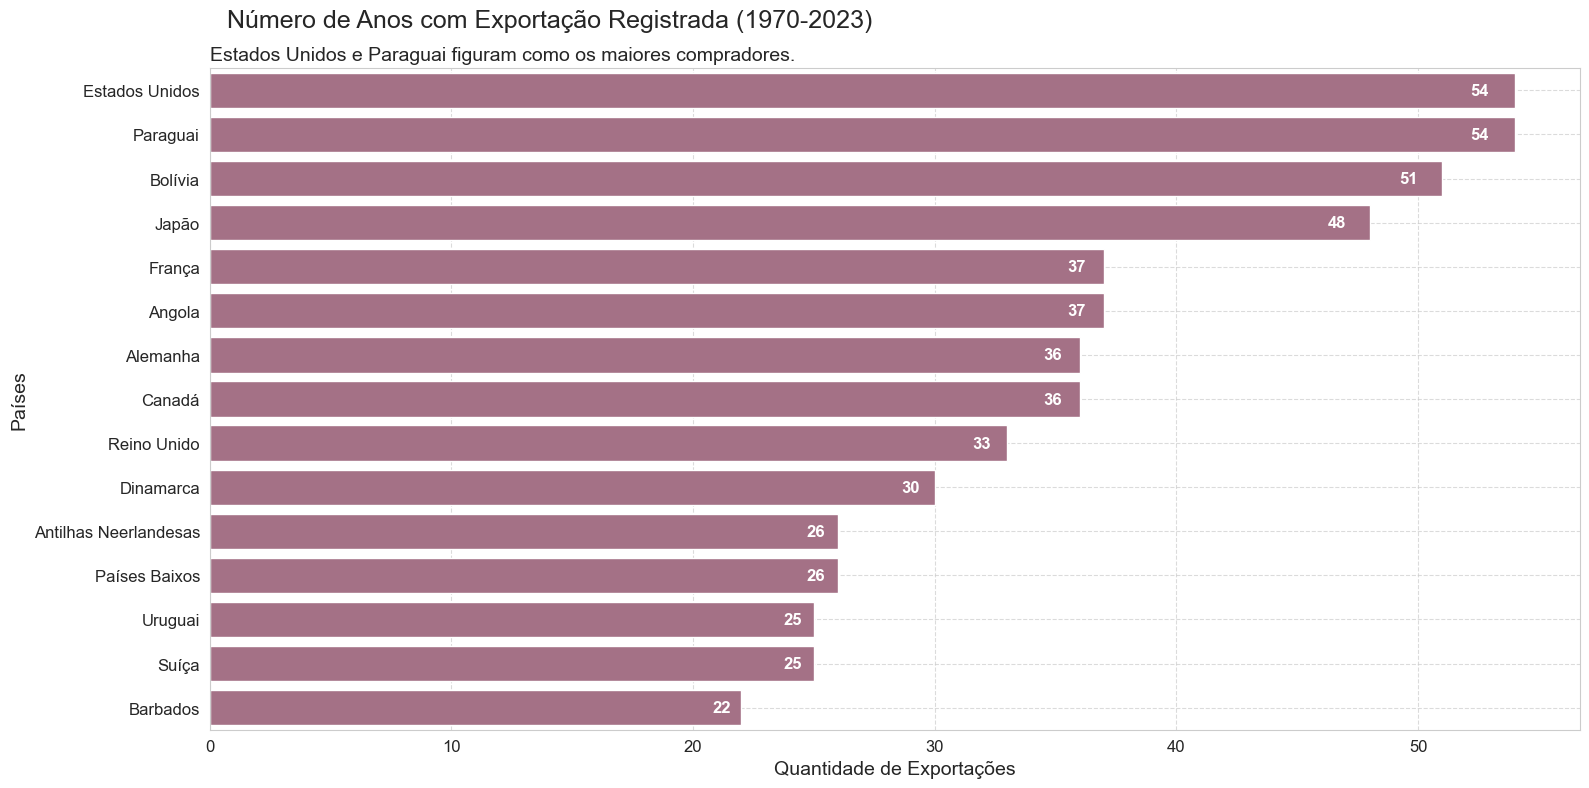

In [135]:
fig, ax= plt.subplots(figsize=(16,8))

sns.barplot(orient='horizontal',
            x=top_15_paises['count'],
            y=top_15_paises['País'],
            color=cores[7],
            ax=ax)

fig.suptitle('Número de Anos com Exportação Registrada (1970-2023)', fontsize=18, ha='left', x=0.145)
ax.set_title('Estados Unidos e Paraguai figuram como os maiores compradores.', fontsize=14, loc='left')

ax.set_xlabel('Quantidade de Exportações', fontsize=14)
ax.set_ylabel('Países', fontsize=14)

ax.tick_params(axis='both', labelsize=12)
ax.grid(linestyle='--', alpha=0.7, axis='both')

for patch in ax.patches:
  # Pegando a largura da barra
  largura = patch.get_width()


  # Calculando a posição x e y para o texto
  x = patch.get_x() + largura*0.98
  y = patch.get_y() + patch.get_height()/2

  ax.text(
      x, y,
      f'{largura:.0f}', # Texto a ser exibido
      ha='right', # Alinhamento horizontal
      va='center', # Alinhamento vertical
      fontsize=12, # Tamanho da fonte
      color='white', # Cor do texto
      fontweight='bold'
    )

plt.tight_layout()
plt.show()

- Estados Unidos e Paraguai figuram como os maiores compradores em termos de frequência, presente em todos os anos da análise. Se trata de uma relação comercial extremamente consistente.
- É possível destacar também a diversificação geográfica e econômica. A lista inclui potências globais: EUA, Japão, Alemenha, França e Reino Unido; importantes parceiros sul-americanos: Paraguai, Bolivia e Uruguai; além de nações africanas: Angola.
- A presença do Paraguai como o maior comprador junto ao EUA levanta questões: isso se deve a acordos comerciais específicos (ambos pertencem ao bloco Mercosul), comércio de fronteira intenso ou a um produto específico?

## Trabalhando com a Base `Importação`: Cruzando Dados

In [136]:
# Especificando a coluna Preço por litro da exportação
df_completo.rename(columns={'Preço_por_Litro':'Preço_por_Litro_Export',
                            'Categoria_Transação': 'Categoria_Transação_Export'}, inplace=True)
df_completo.head()

País País_de_Origem   Ano  Quantidade_Export_(Litros)  \
0            Afeganistão         Brasil  1970                    0.000000   
1               Alemanha         Brasil  1970                    0.000000   
2                 Angola         Brasil  1970                    0.000000   
3               Anguilla         Brasil  1970                    0.000000   
4  Antilhas Neerlandesas         Brasil  1970                  280.000000   

   Valor_Export_(US$) Categoria_Transação_Export  Preço_por_Litro_Export  
0            0.000000          Inexistente (US0)                0.000000  
1            0.000000          Inexistente (US0)                0.000000  
2            0.000000          Inexistente (US0)                0.000000  
3            0.000000          Inexistente (US0)                0.000000  
4          207.000000            Pequena (<US1K)                0.739286

### Carregando a Base de Dados  

In [137]:
# Carregando a base de dados de importação

dataframes.keys()

dict_keys(['comercializacao', 'exportacao', 'importacao', 'processamento', 'producao'])

In [138]:

df_importacao = dataframes['importacao']
df_importacao.head()

Id            País   1970       1970.1   1971  1971.1    1972  1972.1  \
0   1   Africa do Sul      0     0.000000      0       0       0       0   
1   2        Alemanha  52297 30498.000000  34606   26027  134438   92103   
2   3         Argélia      0     0.000000      0       0       0       0   
3   4  Arábia Saudita      0     0.000000      0       0       0       0   
4   5       Argentina  19525 12260.000000  24942   15022  104906   58137   

     1973  1973.1    1974  1974.1    1975  1975.1    1976  1976.1    1977  \
0       0       0       0       0       0       0       0       0       0   
1  111523   98638  219173  202502  134354  149931  168134  171308  160926   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4  116887   76121  215930  167473  145823   90855  348653  277507  408399   

   1977.1    1978  1978.1    1979  1979.1    1980  1980.1    1981  1981.1  \
0       0       0       0       0       0       0       0       0       0   
1  201840  437831  668631  433478  691404  457033  704307  707194  853830   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4  395615  614134  709813  646978  888941  298471  479464  131738  209173   

     1982   1982.1    1983  1983.1    1984  1984.1     1985   1985.1     1986  \
0       0        0       0       0       0       0        0        0        0   
1  996948  1126928  850055  908380  586645  564129  1069717  1122438  2357113   
2       0        0       0       0       0       0        0        0        0   
3       0        0       0       0       0       0        0        0        0   
4  191972   264487  132634  188625   42438   64603   114570   164424   170413   

    1986.1     1987   1987.1     1988   1988.1     1989   1989.1     1990  \
0        0        0        0        0        0        0        0        0   
1  3008737  1307519  1863924  2029271  2757417  2885143  4074739  3342223   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4   242678    98854   136841   414931   590758   716062  1153585   455774   

    1990.1     1991   1991.1     1992   1992.1     1993   1993.1      1994  \
0        0        0        0        0        0        0        0         0   
1  5875679  3096425  4545305  2515557  3644055  5721360  7155615  11047710   
2        0        0        0        0        0        0        0         0   
3        0        0        0        0        0        0        0         0   
4   721398   852441  1493649   444896   815668   359542   795068    446315   

     1994.1      1995    1995.1     1996    1996.1     1997   1997.1     1998  \
0         0         0         0        0         0        0        0        0   
1  16068528  11919346  19758144  8680860  10629243  4867017  5108215  3014081   
2         0         0         0        0         0        0        0        0   
3         0         0         0        0         0        0        0        0   
4    730091   1397904   1992083   779008   1438076  1013306  2089559  1295190   

    1998.1     1999   1999.1     2000   2000.1     2001   2001.1     2002  \
0        0        0        0        0        0    42661    99201    32194   
1  4834030  2576557  4539354  1164724  1668539   909077  1169872   759712   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4  3073775  2475780  5284871  2724941  6556544  2585537  6196286  3867336   

    2002.1     2003   2003.1      2004    2004.1      2005    2005.1  \
0   106317   157239   305701    303489    665101    407413    775421   
1   829695   573198   629664    420075    550750    253685    382599   
2        0        0        0       

### Visão Geral da Base de Dados `Importação`

In [139]:
# Quantidade de linhas e colunas do dataframe
print(f'Linhas: {df_importacao.shape[0]}')
print(f'Colunas: {df_importacao.shape[1]}')

Linhas: 68
Colunas: 110


In [140]:
for col in df_importacao.columns:
    print(f'Coluna {col}:')
    print(df_importacao[col].nunique())
    print('-'*60)

Coluna Id:
68
------------------------------------------------------------
Coluna País:
68
------------------------------------------------------------
Coluna 1970:
12
------------------------------------------------------------
Coluna 1970.1:
12
------------------------------------------------------------
Coluna 1971:
12
------------------------------------------------------------
Coluna 1971.1:
12
------------------------------------------------------------
Coluna 1972:
13
------------------------------------------------------------
Coluna 1972.1:
13
------------------------------------------------------------
Coluna 1973:
11
------------------------------------------------------------
Coluna 1973.1:
11
------------------------------------------------------------
Coluna 1974:
11
------------------------------------------------------------
Coluna 1974.1:
11
------------------------------------------------------------
Coluna 1975:
12
----------------------------------------------------

In [141]:
for col in df_importacao.columns:
    print(f'Coluna {col}:')
    print(df_importacao[col].unique())
    print('-'*60)

Coluna Id:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68]
------------------------------------------------------------
Coluna País:
['Africa do Sul' 'Alemanha' 'Argélia' 'Arábia Saudita' 'Argentina'
 'Armênia' 'Austrália' 'Áustria' 'Bermudas' 'Bélgica' 'Bolívia'
 'Bósnia-Herzegovina' 'Brasil' 'Bulgária' 'Canada' 'Chile' 'China'
 'Coreia do Sul, República' 'Croácia' 'Cuba' 'Emirados Árabes Unidos'
 'Eslovênia' 'Eslováquia' 'Espanha' 'Estados Unidos' 'França' 'Geórgia'
 'Geórgia do Sul e Sandwich do Sul, Ilhas' 'Grécia' 'Hong Kong' 'Hungria'
 'Indonésia' 'Irlanda' 'Israel' 'Itália' 'Japão' 'Iugoslávia' 'Líbano'
 'Luxemburgo' 'Macedônia' 'Marrocos' 'México' 'Moldávia' 'Montenegro'
 'Noruega' 'Nova Zelândia' 'Países Baixos (Holanda)' 'Panamá' 'Peru'
 'Porto Rico' 'Portugal' 'Reino Unido' 'Republica Dominicana' 'Romênia'
 'Rússia' '

In [142]:
df_importacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Columns: 110 entries, Id to 2023.1
dtypes: float64(1), int64(108), object(1)
memory usage: 58.6+ KB


In [143]:
df_importacao.describe()

Id          1970        1970.1          1971        1971.1  \
count 68.000000     68.000000     67.000000     68.000000     68.000000   
mean  34.500000  21243.794118  13192.328358  21325.808824  13777.264706   
std   19.773720 101926.518875  67145.495697 111101.432182  76186.656730   
min    1.000000      0.000000      0.000000      0.000000      0.000000   
25%   17.750000      0.000000      0.000000      0.000000      0.000000   
50%   34.500000      0.000000      0.000000      0.000000      0.000000   
75%   51.250000      0.000000      0.000000      0.000000      0.000000   
max   68.000000 785609.000000 531480.000000 897310.000000 620790.000000   

                1972         1972.1           1973         1973.1  \
count      68.000000      68.000000      68.000000      68.000000   
mean    40618.411765   27787.455882   60305.514706   49607.573529   
std    205013.531472  150904.623195  345508.444785  277056.578035   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max   1650727.000000 1226232.000000 2818320.000000 2238637.000000   

                1974         1974.1           1975         1975.1  \
count      68.000000      68.000000      68.000000      68.000000   
mean    62431.294118   54608.867647   59956.029412   51750.191176   
std    286509.495412  246454.534760  290057.202664  243309.010516   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max   2245288.000000 1917710.000000 2192004.000000 1838430.000000   

                1976         1976.1           1977         1977.1  \
count      68.000000      68.000000      68.000000      68.000000   
mean    82829.764706   68375.294118   89708.632353   78993.852941   
std    382682.052973  300043.272688  408058.717086  332295.891987   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max   2284423.000000 1872573.000000 2593464.000000 1962448.000000   

                1978         1978.1           1979         1979.1  \
count      68.000000      68.000000      68.000000      68.000000   
mean   122733.926471  126201.426471  134767.000000  160395.705882   
std    565037.415456  537296.681005  619059.319327  683530.416987   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max   3742918.000000 3415769.000000 4235991.000000 4315227.000000   

                1980         1980.1           1981         1981.1  \
count      68.000000      68.000000      68.000000      68.000000   
mean    81717.308824  110312.926471   58885.176471   80770.191176   
std    369146.966246  474677.572181  244245.034810  339628.310112   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max   2568586.000000 3199365.000000 1647720.000000 2344875.000000   

                1982         1982.1           1983         1983.1  \
count      68.000000      68.000000      68.000000      68.000000   
mean    56354.426471   69290.882353   50104.352941   58124.161765   
std    203850.081433

### Limpeza e Preparação da Base de Dados

#### Identificando e Tratando Valores Nulos

In [144]:
df_importacao.isnull().sum()

Id        0
País      0
1970      0
1970.1    1
1971      0
         ..
2021.1    0
2022      0
2022.1    0
2023      0
2023.1    0
Length: 110, dtype: int64

In [145]:
df_importacao.isnull().sum().sum()

np.int64(1)

Há um valor nulo na coluna `1970.1`. Vamos visualizar esta linha e verificar o que pode ter acontecido. Caso a coluna `1970` seja `zero`, esse valor também será. Caso não, podemos substituir esse valor caculando a média do preço do litro naquele ano e, com a informação presente na coluna `1970`, podemos calcular um valor estimado.

In [146]:
df_importacao[df_importacao.isnull().any(axis=1)]

Id      País  1970  1970.1  1971  1971.1  1972  1972.1  1973  1973.1  1974  \
8   9  Bermudas     0     NaN     0       0     0       0     0       0     0   

   1974.1  1975  1975.1  1976  1976.1  1977  1977.1  1978  1978.1  1979  \
8       0     0       0     0       0     0       0     0       0     0   

   1979.1  1980  1980.1  1981  1981.1  1982  1982.1  1983  1983.1  1984  \
8       0     0       0     0       0     0       0     0       0     0   

   1984.1  1985  1985.1  1986  1986.1  1987  1987.1  1988  1988.1  1989  \
8       0     0       0     0       0     0       0     0       0     0   

   1989.1  1990  1990.1  1991  1991.1  1992  1992.1  1993  1993.1  1994  \
8       0     0       0     0       0     0       0     0       0     0   

   1994.1  1995  1995.1  1996  1996.1  1997  1997.1  1998  1998.1  1999  \
8       0     0       0     0       0     0       0     0       0     0   

   1999.1  2000  2000.1  2001  2001.1  2002  2002.1  2003  2003.1  2004  \
8       0     0       0     0       0     0       0     0       0     0   

   2004.1  2005  2005.1  2006  2006.1  2007  2007.1  2008  2008.1  2009  \
8       0     0       0     0       0     0       0     0       0     0   

   2009.1  2010  2010.1  2011  2011.1  2012  2012.1  2013  2013.1  2014  \
8       0     0       0     0       0     0       0     0       0     0   

   2014.1  2015  2015.1  2016  2016.1  2017  2017.1  2018  2018.1  2019  \
8       0     0       0     0       0     0       0     0       0     0   

   2019.1  2020  2020.1  2021  2021.1  2022  2022.1  2023  2023.1  
8       0     0       0    10     141     1       4     6     879

Como o valor na coluna `1970` é `zero`, podemos substituir esse valor por `zero` sem nenhum problema para a integridade da base.

In [147]:
df_importacao['1970.1'].fillna(0, inplace=True)
df_importacao.isnull().sum().sum()

np.int64(0)

#### Identificando e Tratando Valores Duplicados

In [148]:
df_importacao.duplicated().sum()

np.int64(0)

#### Corrigindo a Tipagem de Dados

In [149]:
# Corrigir tipos de dados
columns_import = list(df_importacao.columns)
try:
    df_importacao[columns_exportacao[2:]] = df_importacao[columns_exportacao[2:]].astype(np.float64)
    print('A conversão foi bem sucedida.')
except Exception as e:
    print(f'Erro ao converter as colunas desejadas: {e}')

A conversão foi bem sucedida.


In [150]:
df_importacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Columns: 110 entries, Id to 2023.1
dtypes: float64(108), int64(1), object(1)
memory usage: 58.6+ KB


#### Tratando a Coluna `País`

In [151]:
# Verificando a diferença do número de Países entre as duas bases
df_completo['País'].nunique()

136

In [152]:
df_importacao['País'].nunique()

68

In [153]:
df_importacao['País'].unique()

array(['Africa do Sul', 'Alemanha', 'Argélia', 'Arábia Saudita',
       'Argentina', 'Armênia', 'Austrália', 'Áustria', 'Bermudas',
       'Bélgica', 'Bolívia', 'Bósnia-Herzegovina', 'Brasil', 'Bulgária',
       'Canada', 'Chile', 'China', 'Coreia do Sul, República', 'Croácia',
       'Cuba', 'Emirados Árabes Unidos', 'Eslovênia', 'Eslováquia',
       'Espanha', 'Estados Unidos', 'França', 'Geórgia',
       'Geórgia do Sul e Sandwich do Sul, Ilhas', 'Grécia', 'Hong Kong',
       'Hungria', 'Indonésia', 'Irlanda', 'Israel', 'Itália', 'Japão',
       'Iugoslávia', 'Líbano', 'Luxemburgo', 'Macedônia', 'Marrocos',
       'México', 'Moldávia', 'Montenegro', 'Noruega', 'Nova Zelândia',
       'Países Baixos (Holanda)', 'Panamá', 'Peru', 'Porto Rico',
       'Portugal', 'Reino Unido', 'Republica Dominicana', 'Romênia',
       'Rússia', 'San Marino', 'Sérvia', 'Síria', 'Suazilândia', 'Suíça',
       'Tcheca, República', 'Tunísia', 'Turquia', 'Ucrânia', 'Uruguai',
       'Não consta na tabela',

In [154]:
df_importacao[df_importacao['País']=='Não consta na tabela']

Id                  País     1970   1970.1     1971   1971.1     1972  \
65  66  Não consta na tabela 0.000000 0.000000 0.000000 0.000000 0.000000   

     1972.1     1973   1973.1     1974   1974.1     1975   1975.1     1976  \
65 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

     1976.1     1977   1977.1     1978   1978.1     1979   1979.1     1980  \
65 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

     1980.1     1981   1981.1     1982   1982.1     1983   1983.1     1984  \
65 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

     1984.1     1985   1985.1     1986   1986.1     1987   1987.1     1988  \
65 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

     1988.1     1989   1989.1     1990   1990.1     1991   1991.1     1992  \
65 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

     1992.1     1993   1993.1     1994   1994.1     1995   1995.1  \
65 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

           1996        1996.1     1997   1997.1     1998   1998.1     1999  \
65 63755.000000 148879.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

     1999.1     2000   2000.1     2001   2001.1     2002   2002.1     2003  \
65 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

     2003.1     2004   2004.1     2005   2005.1     2006   2006.1     2007  \
65 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

     2007.1     2008   2008.1     2009   2009.1     2010   2010.1     2011  \
65 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

     2011.1     2012   2012.1     2013   2013.1     2014   2014.1     2015  \
65 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

     2015.1     2016   2016.1     2017   2017.1     2018   2018.1     2019  \
65 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

     2019.1     2020   2020.1     2021   2021.1     2022   2022.1     2023  \
65 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

     2023.1  
65 0.000000

In [155]:
df_importacao[df_importacao['País']=='Não declarados']

Id            País     1970   1970.1     1971   1971.1     1972   1972.1  \
66  67  Não declarados 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

       1973   1973.1     1974   1974.1     1975   1975.1     1976   1976.1  \
66 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

       1977   1977.1     1978   1978.1     1979   1979.1     1980   1980.1  \
66 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

       1981   1981.1     1982   1982.1     1983   1983.1     1984   1984.1  \
66 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

       1985   1985.1     1986   1986.1     1987   1987.1     1988   1988.1  \
66 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

       1989   1989.1     1990   1990.1     1991   1991.1     1992   1992.1  \
66 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

       1993   1993.1     1994   1994.1     1995   1995.1         1996  \
66 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 21185.000000   

         1996.1     1997   1997.1     1998   1998.1     1999   1999.1  \
66 26664.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

       2000   2000.1     2001   2001.1     2002   2002.1     2003   2003.1  \
66 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

       2004   2004.1     2005   2005.1     2006   2006.1     2007   2007.1  \
66 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

       2008   2008.1     2009   2009.1     2010   2010.1     2011   2011.1  \
66 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

       2012   2012.1     2013   2013.1     2014   2014.1     2015   2015.1  \
66 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

       2016   2016.1     2017   2017.1     2018   2018.1     2019   2019.1  \
66 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

       2020   2020.1     2021   2021.1     2022   2022.1     2023   2023.1  
66 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000

In [156]:
df_importacao[df_importacao['País']=='Outros']

Id    País        1970      1970.1         1971       1971.1         1972  \
67  68  Outros 5508.000000 4255.000000 77789.000000 42028.000000 79052.000000   

         1972.1        1973      1973.1         1974       1974.1  \
67 25032.000000 4306.000000 5775.000000 21501.000000 28163.000000   

           1975       1975.1         1976      1976.1       1977     1977.1  \
67 18132.000000 13989.000000 10200.000000 7884.000000 450.000000 642.000000   

          1978      1978.1        1979      1979.1         1980       1980.1  \
67 1347.000000 1210.000000 2411.000000 2614.000000 10446.000000 10543.000000   

           1981       1981.1         1982       1982.1        1983  \
67 17133.000000 17869.000000 22104.000000 30505.000000 6738.000000   

        1983.1         1984       1984.1        1985       1985.1  \
67 5862.000000 26490.000000 34499.000000 5400.000000 12812.000000   

           1986       1986.1      1987    1987.1       1988     1988.1  \
67 15717.000000 18768.000000 28.000000 40.000000 435.000000 450.000000   

           1989       1989.1         1990        1990.1         1991  \
67 10788.000000 21458.000000 65835.000000 145083.000000 97662.000000   

          1991.1         1992       1992.1          1993        1993.1  \
67 161151.000000 24465.000000 59352.000000 146730.000000 412893.000000   

            1994        1994.1          1995        1995.1          1996  \
67 174758.000000 289230.000000 200336.000000 393140.000000 127039.000000   

          1996.1          1997        1997.1          1998        1998.1  \
67 295772.000000 186470.000000 548733.000000 187919.000000 480461.000000   

           1999        1999.1         2000        2000.1         2001  \
67 49646.000000 230829.000000 73451.000000 295205.000000 47256.000000   

          2001.1         2002        2002.1     2003   2003.1     2004  \
67 201927.000000 64069.000000 256700.000000 0.000000 0.000000 0.000000   

     2004.1         2005       2005.1     2006   2006.1     2007   2007.1  \
67 0.000000 13970.000000 63967.000000 0.000000 0.000000 0.000000 0.000000   

       2008   2008.1     2009   2009.1     2010   2010.1     2011   2011.1  \
67 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

       2012   2012.1     2013   2013.1     2014   2014.1     2015   2015.1  \
67 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

       2016   2016.1     2017   2017.1     2018   2018.1     2019   2019.1  \
67 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

       2020   2020.1     2021   2021.1     2022   2022.1     2023   2023.1  
67 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000

- Existem 3 informações que, separadas, não há razão para mantê-las. Assim, elas serão classificadas apenas como `Outros`, unindo suas informações, para facilitar a analise.

In [157]:
df_importacao['País'] = df_importacao['País'].replace('Não consta na tabela', 'Outros')
df_importacao['País'] = df_importacao['País'].replace('Não declarados', 'Outros')

In [158]:
# Selecionando as colunas que serão mescladas, ignorando a própria: 'País'
columns_agregar = [col for col in df_importacao.columns if col != 'País']
# Criando a regra de agregação para ser utilizada no método .agg()
regra_agregar = {col: 'sum' for col in columns_agregar}
# Utilizando um groupby junto do método de agregação .agg() para mesclar as duas linhas
df_import = df_importacao.groupby('País').agg(regra_agregar).reset_index()

In [159]:
df_import['País'].unique()

array(['Africa do Sul', 'Alemanha', 'Argentina', 'Argélia', 'Armênia',
       'Arábia Saudita', 'Austrália', 'Bermudas', 'Bolívia', 'Brasil',
       'Bulgária', 'Bélgica', 'Bósnia-Herzegovina', 'Canada', 'Chile',
       'China', 'Coreia do Sul, República', 'Croácia', 'Cuba',
       'Emirados Árabes Unidos', 'Eslováquia', 'Eslovênia', 'Espanha',
       'Estados Unidos', 'França', 'Geórgia',
       'Geórgia do Sul e Sandwich do Sul, Ilhas', 'Grécia', 'Hong Kong',
       'Hungria', 'Indonésia', 'Irlanda', 'Israel', 'Itália',
       'Iugoslávia', 'Japão', 'Luxemburgo', 'Líbano', 'Macedônia',
       'Marrocos', 'Moldávia', 'Montenegro', 'México', 'Noruega',
       'Nova Zelândia', 'Outros', 'Panamá', 'Países Baixos (Holanda)',
       'Peru', 'Porto Rico', 'Portugal', 'Reino Unido',
       'Republica Dominicana', 'Romênia', 'Rússia', 'San Marino',
       'Suazilândia', 'Suíça', 'Sérvia', 'Síria', 'Tcheca, República',
       'Tunísia', 'Turquia', 'Ucrânia', 'Uruguai', 'Áustria'],
      dtype=

In [160]:
df_import[df_import['País']=='Outros']

País   Id        1970      1970.1         1971       1971.1  \
45  Outros  201 5508.000000 4255.000000 77789.000000 42028.000000   

           1972       1972.1        1973      1973.1         1974  \
45 79052.000000 25032.000000 4306.000000 5775.000000 21501.000000   

         1974.1         1975       1975.1         1976      1976.1       1977  \
45 28163.000000 18132.000000 13989.000000 10200.000000 7884.000000 450.000000   

       1977.1        1978      1978.1        1979      1979.1         1980  \
45 642.000000 1347.000000 1210.000000 2411.000000 2614.000000 10446.000000   

         1980.1         1981       1981.1         1982       1982.1  \
45 10543.000000 17133.000000 17869.000000 22104.000000 30505.000000   

          1983      1983.1         1984       1984.1        1985       1985.1  \
45 6738.000000 5862.000000 26490.000000 34499.000000 5400.000000 12812.000000   

           1986       1986.1      1987    1987.1       1988     1988.1  \
45 15717.000000 18768.000000 28.000000 40.000000 435.000000 450.000000   

           1989       1989.1         1990        1990.1         1991  \
45 10788.000000 21458.000000 65835.000000 145083.000000 97662.000000   

          1991.1         1992       1992.1          1993        1993.1  \
45 161151.000000 24465.000000 59352.000000 146730.000000 412893.000000   

            1994        1994.1          1995        1995.1          1996  \
45 174758.000000 289230.000000 200336.000000 393140.000000 211979.000000   

          1996.1          1997        1997.1          1998        1998.1  \
45 471315.000000 186470.000000 548733.000000 187919.000000 480461.000000   

           1999        1999.1         2000        2000.1         2001  \
45 49646.000000 230829.000000 73451.000000 295205.000000 47256.000000   

          2001.1         2002        2002.1     2003   2003.1     2004  \
45 201927.000000 64069.000000 256700.000000 0.000000 0.000000 0.000000   

     2004.1         2005       2005.1     2006   2006.1     2007   2007.1  \
45 0.000000 13970.000000 63967.000000 0.000000 0.000000 0.000000 0.000000   

       2008   2008.1     2009   2009.1     2010   2010.1     2011   2011.1  \
45 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

       2012   2012.1     2013   2013.1     2014   2014.1     2015   2015.1  \
45 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

       2016   2016.1     2017   2017.1     2018   2018.1     2019   2019.1  \
45 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

       2020   2020.1     2021   2021.1     2022   2022.1     2023   2023.1  
45 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000

In [161]:
df_completo['País'].unique()

array(['Afeganistão', 'Alemanha', 'Angola', 'Anguilla',
       'Antilhas Neerlandesas', 'Antígua e Barbuda', 'Argentina', 'Aruba',
       'Arábia Saudita', 'Austrália', 'Bahamas', 'Bangladesh', 'Barbados',
       'Barein', 'Belize', 'Benin', 'Bermudas', 'Bolívia', 'Brasil',
       'Bulgária', 'Bélgica', 'Bósnia e Herzegovina', 'Cabo Verde',
       'Camarões', 'Canadá', 'Catar', 'Ilhas Cayman', 'Chile', 'China',
       'Chipre', 'Ilhas Cocos (Keeling)', 'Colômbia', 'Comores', 'Congo',
       'Coreia do Sul', 'Costa Rica', 'Costa do Marfim', 'Croácia',
       'Cuba', 'Curaçao', 'Dinamarca', 'Dominica', 'El Salvador',
       'Emirados Árabes Unidos', 'Equador', 'Eslováquia', 'Espanha',
       'Estados Unidos', 'Estônia', 'Filipinas', 'Finlândia', 'França',
       'Gana', 'Gibraltar', 'Granada', 'Grécia', 'Guatemala', 'Guiana',
       'Guiana Francesa', 'Guiné-Bissau', 'Guiné Equatorial', 'Haiti',
       'Honduras', 'Hong Kong', 'Hungria', 'Ilha de Man', 'Ilhas Virgens',
       'Índia', 'I

- Há algumas diferenças de escrita em alguns nomes com relação a base de dados que está sob análise, `df_completo`. Deve-se tratá-las antes de unir a base de importação para que não haja conflitos.

In [162]:
mapa_nomes_paises = {
    'Africa do Sul': 'África do Sul',
    'Bósnia-Herzegovina': 'Bósnia e Herzegovina',
    'Coreia do Sul, República': 'Coreia do Sul',
    'Países Baixos (Holanda)': 'Países Baixos',
    'Tcheca, República': 'República Tcheca',
}

df_import['País'] = df_import['País'].apply(lambda x: x.strip())
df_import['País'] = df_import['País'].replace(mapa_nomes_paises)
df_import['País'].unique()

array(['África do Sul', 'Alemanha', 'Argentina', 'Argélia', 'Armênia',
       'Arábia Saudita', 'Austrália', 'Bermudas', 'Bolívia', 'Brasil',
       'Bulgária', 'Bélgica', 'Bósnia e Herzegovina', 'Canada', 'Chile',
       'China', 'Coreia do Sul', 'Croácia', 'Cuba',
       'Emirados Árabes Unidos', 'Eslováquia', 'Eslovênia', 'Espanha',
       'Estados Unidos', 'França', 'Geórgia',
       'Geórgia do Sul e Sandwich do Sul, Ilhas', 'Grécia', 'Hong Kong',
       'Hungria', 'Indonésia', 'Irlanda', 'Israel', 'Itália',
       'Iugoslávia', 'Japão', 'Luxemburgo', 'Líbano', 'Macedônia',
       'Marrocos', 'Moldávia', 'Montenegro', 'México', 'Noruega',
       'Nova Zelândia', 'Outros', 'Panamá', 'Países Baixos', 'Peru',
       'Porto Rico', 'Portugal', 'Reino Unido', 'Republica Dominicana',
       'Romênia', 'Rússia', 'San Marino', 'Suazilândia', 'Suíça',
       'Sérvia', 'Síria', 'República Tcheca', 'Tunísia', 'Turquia',
       'Ucrânia', 'Uruguai', 'Áustria'], dtype=object)

### Redimensionando a Tabela para Unir com o `df_completo`

In [163]:
# A variável ID não será necessária para análises futuras. Dessa forma, ela será excluída.
df_import.drop(columns='Id', inplace=True)
df_import.head()

País         1970       1970.1         1971       1971.1  \
0  África do Sul     0.000000     0.000000     0.000000     0.000000   
1       Alemanha 52297.000000 30498.000000 34606.000000 26027.000000   
2      Argentina 19525.000000 12260.000000 24942.000000 15022.000000   
3        Argélia     0.000000     0.000000     0.000000     0.000000   
4        Armênia     0.000000     0.000000     0.000000     0.000000   

           1972       1972.1          1973       1973.1          1974  \
0      0.000000     0.000000      0.000000     0.000000      0.000000   
1 134438.000000 92103.000000 111523.000000 98638.000000 219173.000000   
2 104906.000000 58137.000000 116887.000000 76121.000000 215930.000000   
3      0.000000     0.000000      0.000000     0.000000      0.000000   
4      0.000000     0.000000      0.000000     0.000000      0.000000   

         1974.1          1975        1975.1          1976        1976.1  \
0      0.000000      0.000000      0.000000      0.000000      0.000000   
1 202502.000000 134354.000000 149931.000000 168134.000000 171308.000000   
2 167473.000000 145823.000000  90855.000000 348653.000000 277507.000000   
3      0.000000      0.000000      0.000000      0.000000      0.000000   
4      0.000000      0.000000      0.000000      0.000000      0.000000   

           1977        1977.1          1978        1978.1          1979  \
0      0.000000      0.000000      0.000000      0.000000      0.000000   
1 160926.000000 201840.000000 437831.000000 668631.000000 433478.000000   
2 408399.000000 395615.000000 614134.000000 709813.000000 646978.000000   
3      0.000000      0.000000      0.000000      0.000000      0.000000   
4      0.000000      0.000000      0.000000      0.000000      0.000000   

         1979.1          1980        1980.1          1981        1981.1  \
0      0.000000      0.000000      0.000000      0.000000      0.000000   
1 691404.000000 457033.000000 704307.000000 707194.000000 853830.000000   
2 888941.000000 298471.000000 479464.000000 131738.000000 209173.000000   
3      0.000000      0.000000      0.000000      0.000000      0.000000   
4      0.000000      0.000000      0.000000      0.000000      0.000000   

           1982         1982.1          1983        1983.1          1984  \
0      0.000000       0.000000      0.000000      0.000000      0.000000   
1 996948.000000 1126928.000000 850055.000000 908380.000000 586645.000000   
2 191972.000000  264487.000000 132634.000000 188625.000000  42438.000000   
3      0.000000       0.000000      0.000000      0.000000      0.000000   
4      0.000000       0.000000      0.000000      0.000000      0.000000   

         1984.1           1985         1985.1           1986         1986.1  \
0      0.000000       0.000000       0.000000       0.000000       0.000000   
1 564129.000000 1069717.000000 1122438.000000 2357113.000000 3008737.000000   
2  64603.000000  114570.000000  164424.000000  170413.000000  242678.000000   
3      0.000000       0.000000       0.000000       0.000000       0.000000   
4      0.000000       0.000000       0.000000       0.000000       0.000000   

            1987         1987.1           1988         1988.1           1989  \
0       0.000000       0.000000       0.000000       0.000000       0.000000   
1 1307519.000000 1863924.000000 2029271.000000 2757417.000000 2885143.000000   
2   98854.000000  136841.000000  414931.000000  590758.000000  716062.000000   
3       0.000000       0.000000       0.000000       0.000000       0.000000   
4       0.000000       0.000000       0.000000       0.000000       0.000000   

          1989.1           1990         1990.1           1991         1991.1  \
0       0.000000       0.000000       0.000000       0.000000       0.000000   
1 4074739.000000 3342223.000000 5875679.000000 3096425.000000 4545305.000000   
2 1153585.000000  455774.000000  721398.000000  852441.000000 1493649.000000   
3       0.000000       0.000000       0.000000       0

In [164]:
# Criando uma cópia para não alterar o dataframe original
df_remodelar = df_import.copy()

# A função precisa que os nomes das colunas sigam um padrão
# Assim, é preciso renomear para algo como: Quantidade_2023 e Valor_2023

# A primeira coluna será mantida
novas_colunas = ['País']

for ano in range(1970, 2024):
    # Identificando as colunas Quantidade e adicionando a lista de novas colunas
    if str(ano) in df_remodelar.columns:
        novas_colunas.append(f'Quantidade_{ano}')
    if f'{ano}.1' in df_remodelar.columns:
        novas_colunas.append(f'Valor_{ano}')

# Atirbuindo os novos nomes
df_remodelar.columns = novas_colunas

# Visualizando o df
df_remodelar.head()

País  Quantidade_1970   Valor_1970  Quantidade_1971   Valor_1971  \
0  África do Sul         0.000000     0.000000         0.000000     0.000000   
1       Alemanha     52297.000000 30498.000000     34606.000000 26027.000000   
2      Argentina     19525.000000 12260.000000     24942.000000 15022.000000   
3        Argélia         0.000000     0.000000         0.000000     0.000000   
4        Armênia         0.000000     0.000000         0.000000     0.000000   

   Quantidade_1972   Valor_1972  Quantidade_1973   Valor_1973  \
0         0.000000     0.000000         0.000000     0.000000   
1    134438.000000 92103.000000    111523.000000 98638.000000   
2    104906.000000 58137.000000    116887.000000 76121.000000   
3         0.000000     0.000000         0.000000     0.000000   
4         0.000000     0.000000         0.000000     0.000000   

   Quantidade_1974    Valor_1974  Quantidade_1975    Valor_1975  \
0         0.000000      0.000000         0.000000      0.000000   
1    219173.000000 202502.000000    134354.000000 149931.000000   
2    215930.000000 167473.000000    145823.000000  90855.000000   
3         0.000000      0.000000         0.000000      0.000000   
4         0.000000      0.000000         0.000000      0.000000   

   Quantidade_1976    Valor_1976  Quantidade_1977    Valor_1977  \
0         0.000000      0.000000         0.000000      0.000000   
1    168134.000000 171308.000000    160926.000000 201840.000000   
2    348653.000000 277507.000000    408399.000000 395615.000000   
3         0.000000      0.000000         0.000000      0.000000   
4         0.000000      0.000000         0.000000      0.000000   

   Quantidade_1978    Valor_1978  Quantidade_1979    Valor_1979  \
0         0.000000      0.000000         0.000000      0.000000   
1    437831.000000 668631.000000    433478.000000 691404.000000   
2    614134.000000 709813.000000    646978.000000 888941.000000   
3         0.000000      0.000000         0.000000      0.000000   
4         0.000000      0.000000         0.000000      0.000000   

   Quantidade_1980    Valor_1980  Quantidade_1981    Valor_1981  \
0         0.000000      0.000000         0.000000      0.000000   
1    457033.000000 704307.000000    707194.000000 853830.000000   
2    298471.000000 479464.000000    131738.000000 209173.000000   
3         0.000000      0.000000         0.000000      0.000000   
4         0.000000      0.000000         0.000000      0.000000   

   Quantidade_1982     Valor_1982  Quantidade_1983    Valor_1983  \
0         0.000000       0.000000         0.000000      0.000000   
1    996948.000000 1126928.000000    850055.000000 908380.000000   
2    191972.000000  264487.000000    132634.000000 188625.000000   
3         0.000000       0.000000         0.000000      0.000000   
4         0.000000       0.000000         0.000000      0.000000   

   Quantidade_1984    Valor_1984  Quantidade_1985     Valor_1985  \
0         0.000000      0.000000         0.000000       0.000000   
1    586645.000000 564129.000000   1069717.000000 1122438.000000   
2     42438.000000  64603.000000    114570.000000  164424.000000   
3         0.000000      0.000000         0.000000       0.000000   
4         0.000000      0.000000         0.000000       0.000000   

   Quantidade_1986     Valor_1986  Quantidade_1987     Valor_1987  \
0         0.000000       0.000000         0.000000       0.000000   
1   2357113.000000 3008737.000000   1307519.000000 1863924.000000   
2    170413.000000  242678.000000     98854.000000  136841.000000   
3         0.000000       0.000000         0.000000       0.000000   
4         0.000000       0.000000         0.000000       0.000000   

   Quantidade_1988     Valor_1988  Quantidade_1989     Valor_1989  \
0         0.000000       0.000000         0.000000       0.000000   
1   2029271.000000 2757417.000000   2885143.000000 4074739.000000   
2    414931.000000  590758.000000    716062.000000 1153585.000000   
3         0.000000 

In [165]:
# Aplicando a função .wide_to_long()
df_import_rem = pd.wide_to_long(
    df_remodelar,
    stubnames=['Quantidade', 'Valor'], #Prefixos das colunas alvo (Serão os nomes das colunas finais)
    i = 'País', #Colunas que manteremos
    j = 'Ano', #Nome da nova coluna que conterá os anos
    sep = '_', #O caractere que separa o prefixo (definido acima) do ano (que será a info da coluna que definimos anteriormente)
    suffix = r'\d+' #Regex para identificar o sufixo (Ano) (Aqui eu utilizei o https://regex101.com/)
)

# Visualizando o df
df_import_rem.head()

Quantidade        Valor
País          Ano                           
África do Sul 1970     0.000000     0.000000
Alemanha      1970 52297.000000 30498.000000
Argentina     1970 19525.000000 12260.000000
Argélia       1970     0.000000     0.000000
Armênia       1970     0.000000     0.000000

In [166]:
# Renomeando as colunas Quantidade e Valor
df_import_rem.rename(columns={'Quantidade':'Quantidade_Import_(Litros)',
                              'Valor':'Valor_Import_(US$)'}, inplace=True)
df_import_rem.head()

Quantidade_Import_(Litros)  Valor_Import_(US$)
País          Ano                                                 
África do Sul 1970                    0.000000            0.000000
Alemanha      1970                52297.000000        30498.000000
Argentina     1970                19525.000000        12260.000000
Argélia       1970                    0.000000            0.000000
Armênia       1970                    0.000000            0.000000

In [167]:
df_completo.shape

(7344, 7)

In [168]:
# Unindo ao df_completo utilizando o método .merge()
df_completo_merge = pd.merge(
    left=df_completo,
    right=df_import_rem,
    how='outer', # Utilizando o outer eu garanto que nenhum país, de nenhuma das duas tabelas, seja perdido
    on=['País', 'Ano']
)

df_completo_merge.head()

País País_de_Origem   Ano  Quantidade_Export_(Litros)  \
0  Afeganistão         Brasil  1970                    0.000000   
1  Afeganistão         Brasil  1971                    0.000000   
2  Afeganistão         Brasil  1972                    0.000000   
3  Afeganistão         Brasil  1973                    0.000000   
4  Afeganistão         Brasil  1974                    0.000000   

   Valor_Export_(US$) Categoria_Transação_Export  Preço_por_Litro_Export  \
0            0.000000          Inexistente (US0)                0.000000   
1            0.000000          Inexistente (US0)                0.000000   
2            0.000000          Inexistente (US0)                0.000000   
3            0.000000          Inexistente (US0)                0.000000   
4            0.000000          Inexistente (US0)                0.000000   

   Quantidade_Import_(Litros)  Valor_Import_(US$)  
0                         NaN                 NaN  
1                         NaN                 NaN  
2                         NaN                 NaN  
3                         NaN                 NaN  
4                         NaN                 NaN

In [169]:
df_completo_merge[df_completo_merge['País']=='Alemanha']

País País_de_Origem   Ano  Quantidade_Export_(Litros)  \
54   Alemanha         Brasil  1970                    0.000000   
55   Alemanha         Brasil  1971                    0.000000   
56   Alemanha         Brasil  1972                 4168.000000   
57   Alemanha         Brasil  1973                12000.000000   
58   Alemanha         Brasil  1974                    0.000000   
59   Alemanha         Brasil  1975                    0.000000   
60   Alemanha         Brasil  1976                    0.000000   
61   Alemanha         Brasil  1977                    0.000000   
62   Alemanha         Brasil  1978                    0.000000   
63   Alemanha         Brasil  1979                 5400.000000   
64   Alemanha         Brasil  1980                    0.000000   
65   Alemanha         Brasil  1981                    0.000000   
66   Alemanha         Brasil  1982                    0.000000   
67   Alemanha         Brasil  1983                    0.000000   
68   Alemanha         Brasil  1984                    0.000000   
69   Alemanha         Brasil  1985                   67.000000   
70   Alemanha         Brasil  1986                 1037.000000   
71   Alemanha         Brasil  1987                 2700.000000   
72   Alemanha         Brasil  1988                 2205.000000   
73   Alemanha         Brasil  1989                  197.000000   
74   Alemanha         Brasil  1990                    0.000000   
75   Alemanha         Brasil  1991                 3780.000000   
76   Alemanha         Brasil  1992                 2700.000000   
77   Alemanha         Brasil  1993                    0.000000   
78   Alemanha         Brasil  1994                    0.000000   
79   Alemanha         Brasil  1995                20700.000000   
80   Alemanha         Brasil  1996                    0.000000   
81   Alemanha         Brasil  1997                   43.000000   
82   Alemanha         Brasil  1998                  504.000000   
83   Alemanha         Brasil  1999                    0.000000   
84   Alemanha         Brasil  2000                 9900.000000   
85   Alemanha         Brasil  2001                 1673.000000   
86   Alemanha         Brasil  2002                 1080.000000   
87   Alemanha         Brasil  2003                    0.000000   
88   Alemanha         Brasil  2004                13589.000000   
89   Alemanha         Brasil  2005                57393.000000   
90   Alemanha         Brasil  2006                38302.000000   
91   Alemanha         Brasil  2007               119512.000000   
92   Alemanha         Brasil  2008               265742.000000   
93   Alemanha         Brasil  2009               225086.000000   
94   Alemanha         Brasil  2010                27715.000000   
95   Alemanha         Brasil  2011                36070.000000   
96   Alemanha         Brasil  2012                 8189.000000   
97   Alemanha         Brasil  2013                61699.000000   
98   Alemanha         Brasil  2014               213348.000000   
99   Alemanha         Brasil  2015                10680.000000   
100  Alemanha         Brasil  2016                14012.000000   
101  Alemanha         Brasil  2017                15467.000000   
102  Alemanha         Brasil  2018                10794.000000   
103  Alemanha         Brasil  2019                 3660.000000   
104  Alemanha         Brasil  2020                 6261.000000   
105  Alemanha         Brasil  2021                 2698.000000   
106  Alemanha         Brasil  2022                 7630.000000   
107  Alemanha         Brasil  2023                 4806.000000   

     Valor_Export_(US$) Categoria_Transação_Export  Preço_por_Litro_Export  \
54             0.000000          Inexistente (US0)                0.000000   
55             0.000000          Inexistente (US0)                0.000000   
56          2630.000000       Média (US1K - US50K)                0.630998   
57          8250.000000       Média (US1K - US50K)                

In [170]:
df_completo_merge.shape

(8316, 9)

#### Tratando o `df_completo_merge`

- No merge() realizado anteriormente os países que estavam presentes apenas em uma das tabelas terá valor nulo `NaN` nas variáveis correspondentes da outra tabela.
- Exemplo: `Afeganistão`, que estava presente somente na tabela `df_completo` apresentou valores nulos nas variáveis de importação como era esperado.
- Esses valores são necessariamente `zero`, eles não existem, e serão substituídos por ele.
- A coluna `País_de_Origem` não faz sentido nesse contexto e será excluída.
- Também será incluída as variáveis de `Preço por Litro` e `Categoria de Transação` para os valores de Importação.

In [171]:
df_completo_merge.drop(columns=['País_de_Origem'], inplace=True)
df_completo_merge.head()

País   Ano  Quantidade_Export_(Litros)  Valor_Export_(US$)  \
0  Afeganistão  1970                    0.000000            0.000000   
1  Afeganistão  1971                    0.000000            0.000000   
2  Afeganistão  1972                    0.000000            0.000000   
3  Afeganistão  1973                    0.000000            0.000000   
4  Afeganistão  1974                    0.000000            0.000000   

  Categoria_Transação_Export  Preço_por_Litro_Export  \
0          Inexistente (US0)                0.000000   
1          Inexistente (US0)                0.000000   
2          Inexistente (US0)                0.000000   
3          Inexistente (US0)                0.000000   
4          Inexistente (US0)                0.000000   

   Quantidade_Import_(Litros)  Valor_Import_(US$)  
0                         NaN                 NaN  
1                         NaN                 NaN  
2                         NaN                 NaN  
3                         NaN                 NaN  
4                         NaN                 NaN

##### Identificando e Tratando Valores Nulos

In [172]:
# Quantidade de valores nulos
df_completo_merge.isnull().sum().sum()

np.int64(13392)

In [173]:
# trabalhando apenas com as colunas númericas e substituindo os valores nulos por 0
cols_numericas = df_completo_merge.select_dtypes(include='number').columns
df_completo_merge[cols_numericas] = df_completo_merge[cols_numericas].fillna(0)

In [174]:
# Sem valores nulos para as colunas númericas
df_completo_merge[cols_numericas].isnull().sum().sum()

np.int64(0)

In [175]:
# Valores nulos restantes
df_completo_merge.isnull().sum().sum()

np.int64(972)

In [176]:
df_completo_merge['Categoria_Transação_Export'].isnull().sum().sum()

np.int64(972)

- Os valores nulos restantes correspondem a variável `Categoria_transação_Export` que surgiu após o merge como era esperado para países que não estavam na base de exportação. Em suma, como os valores para os países que vieram da base importação é zero, a transação deve ser classificada como `Inexistente (US0)`.

In [177]:
df_completo_merge['Categoria_Transação_Export'].fillna('Inexistente (US0)', inplace=True)
df_completo_merge.isnull().sum().sum()

np.int64(0)

##### Identificando e Tratando Valores Duplicados

In [178]:
df_completo_merge.duplicated().sum()

np.int64(0)

##### Identificando e Corrigindo a Tipagem de Dados

In [179]:
df_completo_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8316 entries, 0 to 8315
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   País                        8316 non-null   object 
 1   Ano                         8316 non-null   int64  
 2   Quantidade_Export_(Litros)  8316 non-null   float64
 3   Valor_Export_(US$)          8316 non-null   float64
 4   Categoria_Transação_Export  8316 non-null   object 
 5   Preço_por_Litro_Export      8316 non-null   float64
 6   Quantidade_Import_(Litros)  8316 non-null   float64
 7   Valor_Import_(US$)          8316 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 519.9+ KB


##### Inserindo as Variáveis `Preço_por_Litro_Import` e `Categoria_Transação_Import`

In [180]:
df_completo_merge['Preço_por_Litro_Import'] = 0.0
df_completo_merge.head()

País   Ano  Quantidade_Export_(Litros)  Valor_Export_(US$)  \
0  Afeganistão  1970                    0.000000            0.000000   
1  Afeganistão  1971                    0.000000            0.000000   
2  Afeganistão  1972                    0.000000            0.000000   
3  Afeganistão  1973                    0.000000            0.000000   
4  Afeganistão  1974                    0.000000            0.000000   

  Categoria_Transação_Export  Preço_por_Litro_Export  \
0          Inexistente (US0)                0.000000   
1          Inexistente (US0)                0.000000   
2          Inexistente (US0)                0.000000   
3          Inexistente (US0)                0.000000   
4          Inexistente (US0)                0.000000   

   Quantidade_Import_(Litros)  Valor_Import_(US$)  Preço_por_Litro_Import  
0                    0.000000            0.000000                0.000000  
1                    0.000000            0.000000                0.000000  
2                    0.000000            0.000000                0.000000  
3                    0.000000            0.000000                0.000000  
4                    0.000000            0.000000                0.000000

In [181]:
# Criando uma máscara com Quantidades diferentes de zero
mascara_positiva = df_completo_merge['Quantidade_Import_(Litros)'] != 0

# Usando o .loc() para trabalhar especificamente com as linhas presentes na máscara que criamos
df_completo_merge.loc[mascara_positiva, 'Preço_por_Litro_Import'] = (
    df_completo_merge.loc[mascara_positiva, 'Valor_Import_(US$)'] /
    df_completo_merge.loc[mascara_positiva, 'Quantidade_Import_(Litros)']
)

df_completo_merge[df_completo_merge['País']=='Alemanha']

País   Ano  Quantidade_Export_(Litros)  Valor_Export_(US$)  \
54   Alemanha  1970                    0.000000            0.000000   
55   Alemanha  1971                    0.000000            0.000000   
56   Alemanha  1972                 4168.000000         2630.000000   
57   Alemanha  1973                12000.000000         8250.000000   
58   Alemanha  1974                    0.000000            0.000000   
59   Alemanha  1975                    0.000000            0.000000   
60   Alemanha  1976                    0.000000            0.000000   
61   Alemanha  1977                    0.000000            0.000000   
62   Alemanha  1978                    0.000000            0.000000   
63   Alemanha  1979                 5400.000000         6500.000000   
64   Alemanha  1980                    0.000000            0.000000   
65   Alemanha  1981                    0.000000            0.000000   
66   Alemanha  1982                    0.000000            0.000000   
67   Alemanha  1983                    0.000000            0.000000   
68   Alemanha  1984                    0.000000            0.000000   
69   Alemanha  1985                   67.000000          136.000000   
70   Alemanha  1986                 1037.000000         1750.000000   
71   Alemanha  1987                 2700.000000         4044.000000   
72   Alemanha  1988                 2205.000000         3921.000000   
73   Alemanha  1989                  197.000000          510.000000   
74   Alemanha  1990                    0.000000            0.000000   
75   Alemanha  1991                 3780.000000         7182.000000   
76   Alemanha  1992                 2700.000000         5143.000000   
77   Alemanha  1993                    0.000000            0.000000   
78   Alemanha  1994                    0.000000            0.000000   
79   Alemanha  1995                20700.000000        40590.000000   
80   Alemanha  1996                    0.000000            0.000000   
81   Alemanha  1997                   43.000000          307.000000   
82   Alemanha  1998                  504.000000          700.000000   
83   Alemanha  1999                    0.000000            0.000000   
84   Alemanha  2000                 9900.000000        15620.000000   
85   Alemanha  2001                 1673.000000        11157.000000   
86   Alemanha  2002                 1080.000000         4626.000000   
87   Alemanha  2003                    0.000000            0.000000   
88   Alemanha  2004                13589.000000        28140.000000   
89   Alemanha  2005                57393.000000       106702.000000   
90   Alemanha  2006                38302.000000        89231.000000   
91   Alemanha  2007               119512.000000       238052.000000   
92   Alemanha  2008               265742.000000       429970.000000   
93   Alemanha  2009               225086.000000       393482.000000   
94   Alemanha  2010                27715.000000       138666.000000   
95   Alemanha  2011                36070.000000       144150.000000   
96   Alemanha  2012                 8189.000000        56342.000000   
97   Alemanha  2013                61699.000000       265978.000000   
98   Alemanha  2014               213348.000000       761653.000000   
99   Alemanha  2015                10680.000000        44780.000000   
100  Alemanha  2016                14012.000000        68109.000000   
101  Alemanha  2017                15467.000000        87702.000000   
102  Alemanha  2018                10794.000000        45382.000000   
103  Alemanha  2019                 3660.000000        25467.000000   
104  Alemanha  2020                 6261.000000        32605.000000   
105  Alemanha  2021                 2698.000000         6741.000000   
106  Alemanha  2022                 7630.000000        45367.000000   
107  Alemanha  2023                 4806.000000        31853.000000   

    Categoria_Transação_Export  Preço_por_Litro_Export  \
54           Inexistente (US0)               

In [182]:
# Definindo os limites
limites = [0, 0.1, 1000, 50000, 250000, df_completo_merge['Valor_Import_(US$)'].max()+1]

# Definindo os rótulos da classificação
rotulos = ['Inexistente (US0)', 'Pequena (<US1K)', 'Média (US1K - US50K)', 'Grande (US50K - US250K)', 'Gigante (>US250K)']

# Utilizando a função .cut() do pandas para etiquetar os dados
# O parametro 'right' define que o intervalo inclui o número da esquerda, mas não o da direita.
df_completo_merge['Categoria_Transação_Import'] = pd.cut(df_completo_merge['Valor_Import_(US$)'], bins=limites, labels=rotulos, right=False)
df_completo_merge[df_completo_merge['País']=='Alemanha']

País   Ano  Quantidade_Export_(Litros)  Valor_Export_(US$)  \
54   Alemanha  1970                    0.000000            0.000000   
55   Alemanha  1971                    0.000000            0.000000   
56   Alemanha  1972                 4168.000000         2630.000000   
57   Alemanha  1973                12000.000000         8250.000000   
58   Alemanha  1974                    0.000000            0.000000   
59   Alemanha  1975                    0.000000            0.000000   
60   Alemanha  1976                    0.000000            0.000000   
61   Alemanha  1977                    0.000000            0.000000   
62   Alemanha  1978                    0.000000            0.000000   
63   Alemanha  1979                 5400.000000         6500.000000   
64   Alemanha  1980                    0.000000            0.000000   
65   Alemanha  1981                    0.000000            0.000000   
66   Alemanha  1982                    0.000000            0.000000   
67   Alemanha  1983                    0.000000            0.000000   
68   Alemanha  1984                    0.000000            0.000000   
69   Alemanha  1985                   67.000000          136.000000   
70   Alemanha  1986                 1037.000000         1750.000000   
71   Alemanha  1987                 2700.000000         4044.000000   
72   Alemanha  1988                 2205.000000         3921.000000   
73   Alemanha  1989                  197.000000          510.000000   
74   Alemanha  1990                    0.000000            0.000000   
75   Alemanha  1991                 3780.000000         7182.000000   
76   Alemanha  1992                 2700.000000         5143.000000   
77   Alemanha  1993                    0.000000            0.000000   
78   Alemanha  1994                    0.000000            0.000000   
79   Alemanha  1995                20700.000000        40590.000000   
80   Alemanha  1996                    0.000000            0.000000   
81   Alemanha  1997                   43.000000          307.000000   
82   Alemanha  1998                  504.000000          700.000000   
83   Alemanha  1999                    0.000000            0.000000   
84   Alemanha  2000                 9900.000000        15620.000000   
85   Alemanha  2001                 1673.000000        11157.000000   
86   Alemanha  2002                 1080.000000         4626.000000   
87   Alemanha  2003                    0.000000            0.000000   
88   Alemanha  2004                13589.000000        28140.000000   
89   Alemanha  2005                57393.000000       106702.000000   
90   Alemanha  2006                38302.000000        89231.000000   
91   Alemanha  2007               119512.000000       238052.000000   
92   Alemanha  2008               265742.000000       429970.000000   
93   Alemanha  2009               225086.000000       393482.000000   
94   Alemanha  2010                27715.000000       138666.000000   
95   Alemanha  2011                36070.000000       144150.000000   
96   Alemanha  2012                 8189.000000        56342.000000   
97   Alemanha  2013                61699.000000       265978.000000   
98   Alemanha  2014               213348.000000       761653.000000   
99   Alemanha  2015                10680.000000        44780.000000   
100  Alemanha  2016                14012.000000        68109.000000   
101  Alemanha  2017                15467.000000        87702.000000   
102  Alemanha  2018                10794.000000        45382.000000   
103  Alemanha  2019                 3660.000000        25467.000000   
104  Alemanha  2020                 6261.000000        32605.000000   
105  Alemanha  2021                 2698.000000         6741.000000   
106  Alemanha  2022                 7630.000000        45367.000000   
107  Alemanha  2023                 4806.000000        31853.000000   

    Categoria_Transação_Export  Preço_por_Litro_Export  \
54           Inexistente (US0)               

In [183]:
df_completo_merge['Categoria_Transação_Import'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8316 entries, 0 to 8315
Series name: Categoria_Transação_Import
Non-Null Count  Dtype   
--------------  -----   
8316 non-null   category
dtypes: category(1)
memory usage: 8.5 KB


In [184]:
# Convertendo a variável categoria para object
df_completo_merge['Categoria_Transação_Import'] = df_completo_merge['Categoria_Transação_Import'].astype('object')

### Análise Univariada: `df_completo_merge`

#### Variáveis Númericas

##### Verificando os Outliers Graficamente

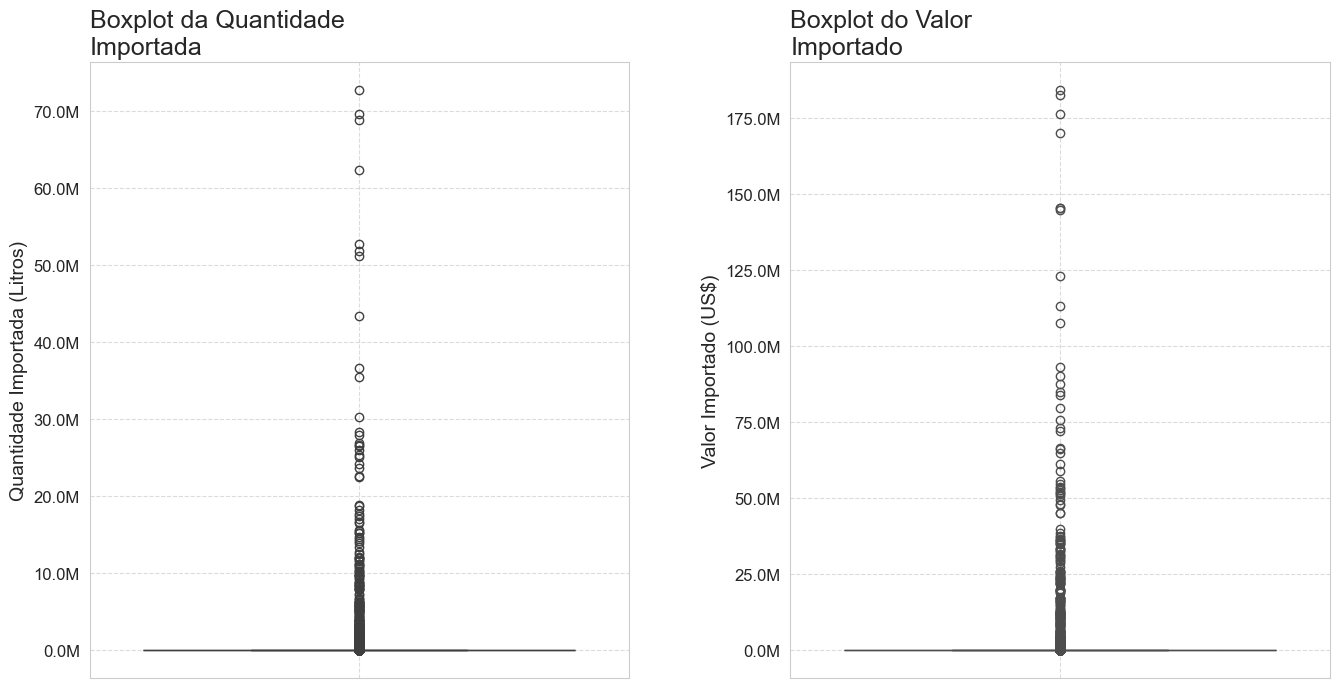

In [185]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(16, 8))

# Primeiro subplot: Boxplot da Quantidade
sns.boxplot(y=df_completo_merge['Quantidade_Import_(Litros)'], ax=axes[0])
axes[0].set_title('Boxplot da Quantidade\nImportada', fontsize=18, loc='left')
axes[0].set_ylabel('Quantidade Importada (Litros)', fontsize=14)

# Segundo subplot: Boxplot do Valor
sns.boxplot(y=df_completo_merge['Valor_Import_(US$)'], color='orange', ax=axes[1])
axes[1].set_title('Boxplot do Valor\nImportado', fontsize=18, loc='left')
axes[1].set_ylabel('Valor Importado (US$)', fontsize=14)

for ax in axes.flat:
  ax.tick_params(axis='both', labelsize=12)
  ax.grid(linestyle='--', alpha=0.7, axis='both')
  ax.yaxis.set_major_formatter(formatter)

plt.subplots_adjust(wspace=0.3)
plt.show()

##### Trabalhando com as Importações Positivas

In [186]:
# Criando um dataframe apenas com transações positivas
df_completo_merge_positivo = df_completo_merge[(df_completo_merge['Quantidade_Import_(Litros)'] > 0) | (df_completo_merge['Valor_Import_(US$)'] > 0)]
df_completo_merge_positivo.head()

País   Ano  Quantidade_Export_(Litros)  Valor_Export_(US$)  \
54  Alemanha  1970                    0.000000            0.000000   
55  Alemanha  1971                    0.000000            0.000000   
56  Alemanha  1972                 4168.000000         2630.000000   
57  Alemanha  1973                12000.000000         8250.000000   
58  Alemanha  1974                    0.000000            0.000000   

   Categoria_Transação_Export  Preço_por_Litro_Export  \
54          Inexistente (US0)                0.000000   
55          Inexistente (US0)                0.000000   
56       Média (US1K - US50K)                0.630998   
57       Média (US1K - US50K)                0.687500   
58          Inexistente (US0)                0.000000   

    Quantidade_Import_(Litros)  Valor_Import_(US$)  Preço_por_Litro_Import  \
54                52297.000000        30498.000000                0.583169   
55                34606.000000        26027.000000                0.752095   
56               134438.000000        92103.000000                0.685096   
57               111523.000000        98638.000000                0.884463   
58               219173.000000       202502.000000                0.923937   

   Categoria_Transação_Import  
54       Média (US1K - US50K)  
55       Média (US1K - US50K)  
56    Grande (US50K - US250K)  
57    Grande (US50K - US250K)  
58    Grande (US50K - US250K)

In [187]:
# Quantidade de linhas e colunas do dataframe
print(f'Linhas: {df_completo_merge_positivo.shape[0]}')
print(f'Colunas: {df_completo_merge_positivo.shape[1]}')

Linhas: 929
Colunas: 10


Visualizando Graficamente os Outliers das Importações Positivas

In [188]:
df_completo_merge_positivo.describe()

Ano  Quantidade_Export_(Litros)  Valor_Export_(US$)  \
count  929.000000                  929.000000          929.000000   
mean  2003.539290                70348.810549       100529.110872   
std     15.721746               562462.743563       702856.666366   
min   1970.000000                    0.000000            0.000000   
25%   1992.000000                    0.000000            0.000000   
50%   2008.000000                    0.000000            0.000000   
75%   2017.000000                 2100.000000         6902.000000   
max   2023.000000              8741057.000000     11062358.000000   

       Preço_por_Litro_Export  Quantidade_Import_(Litros)  Valor_Import_(US$)  \
count              929.000000                  929.000000          929.000000   
mean                 1.445808              2294241.728741      6490457.671690   
std                  3.003897              7004619.873859     19805720.277523   
min                  0.000000                    0.000000            0.000000   
25%                  0.000000                 7394.000000        24677.000000   
50%                  0.000000                90728.000000       212140.000000   
75%                  1.960870              1092042.000000      2146952.000000   
max                 35.333333             72726186.000000    184335335.000000   

       Preço_por_Litro_Import  
count              929.000000  
mean                 5.088642  
std                 10.580750  
min                  0.000000  
25%                  1.481162  
50%                  2.799353  
75%                  4.776556  
max                155.714286

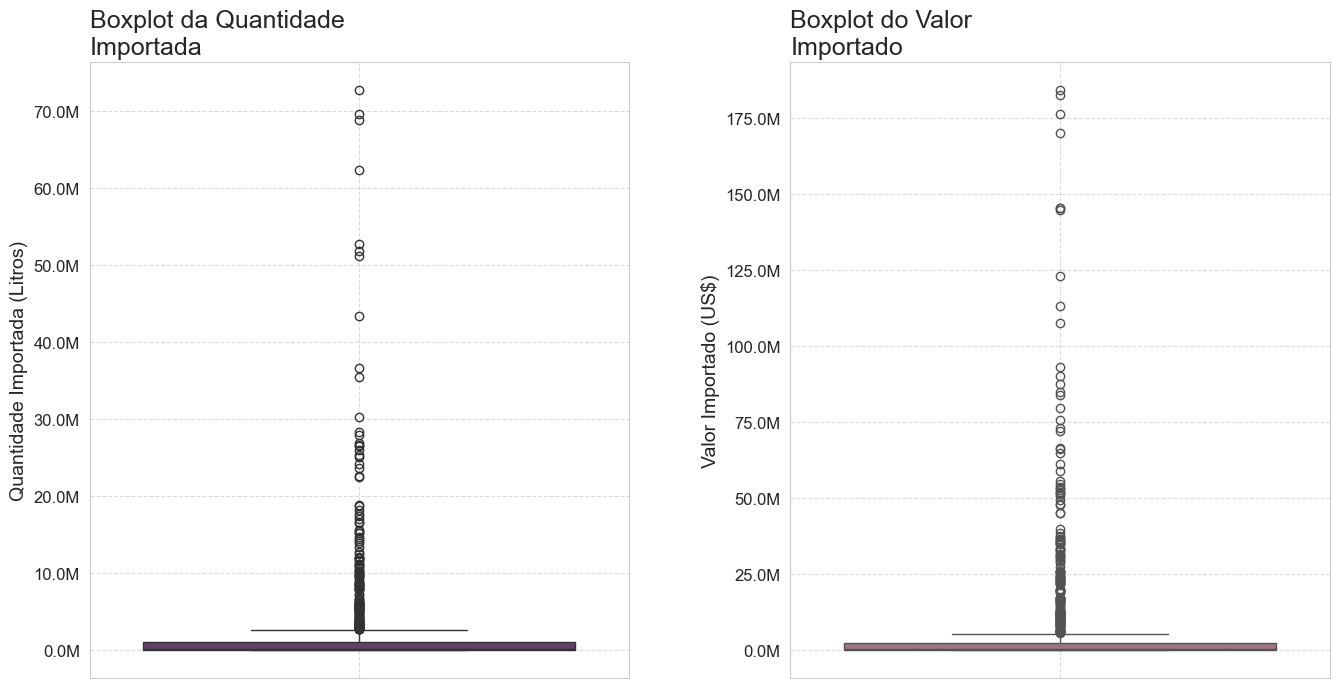

In [189]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(16, 8))

# Primeiro subplot: Boxplot da Quantidade
sns.boxplot(y=df_completo_merge_positivo['Quantidade_Import_(Litros)'], color=cores[3], ax=axes[0])
axes[0].set_title('Boxplot da Quantidade\nImportada', loc='left', fontsize=18)
axes[0].set_ylabel('Quantidade Importada (Litros)', fontsize=14)

# Segundo subplot: Boxplot do Valor
sns.boxplot(y=df_completo_merge_positivo['Valor_Import_(US$)'], color=cores[7], ax=axes[1])
axes[1].set_title('Boxplot do Valor\nImportado', loc='left', fontsize=18)
axes[1].set_ylabel('Valor Importado (US$)', fontsize=14)

for ax in axes.flat:
  ax.tick_params(axis='both', labelsize=12)
  ax.grid(linestyle='--', alpha=0.7, axis='both')
  ax.yaxis.set_major_formatter(formatter)

plt.subplots_adjust(wspace=0.3)
plt.show()

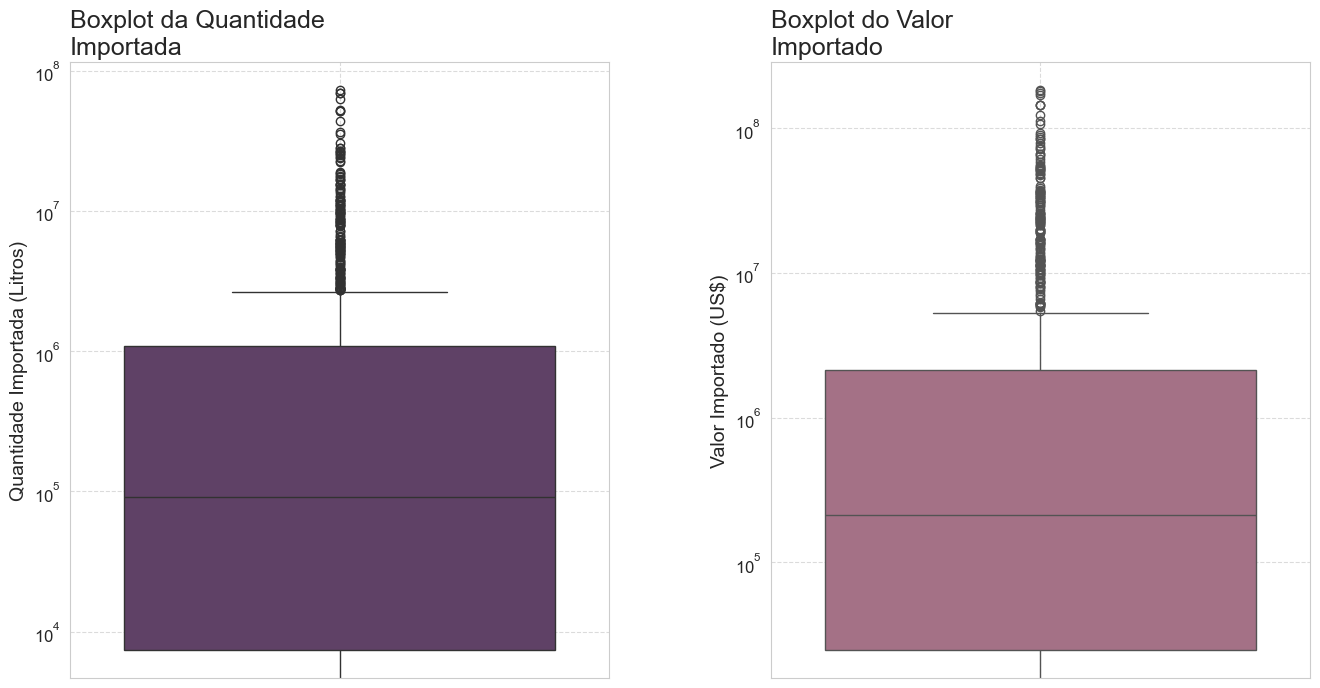

In [190]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(16, 8))

# Primeiro subplot: Boxplot da Quantidade
sns.boxplot(y=df_completo_merge_positivo['Quantidade_Import_(Litros)'], color=cores[3], ax=axes[0])
axes[0].set_title('Boxplot da Quantidade\nImportada', loc='left', fontsize=18)
axes[0].set_ylabel('Quantidade Importada (Litros)', fontsize=14)

# Segundo subplot: Boxplot do Valor
sns.boxplot(y=df_completo_merge_positivo['Valor_Import_(US$)'], color=cores[7], ax=axes[1])
axes[1].set_title('Boxplot do Valor\nImportado', loc='left', fontsize=18)
axes[1].set_ylabel('Valor Importado (US$)', fontsize=14)

for ax in axes.flat:
  ax.tick_params(axis='both', labelsize=12)
  ax.grid(linestyle='--', alpha=0.7, axis='both')
  ax.yaxis.set_major_formatter(formatter)
  ax.set_yscale('log')

plt.subplots_adjust(wspace=0.3)
plt.show()

Isolando e Investigando Outliers por meio do Método IQR nas Importações Positivas

In [191]:
# Investigando os outliers da variável: Valor (Que, necessariamente, é o mais importante para a empresa)
# Extraindo os Quartis
Q1 = df_completo_merge_positivo['Valor_Import_(US$)'].quantile(0.25)
Q3 = df_completo_merge_positivo['Valor_Import_(US$)'].quantile(0.75)

# Extraindo o IQR
IQR = Q3 - Q1

# Calculando o limite superior
lim_sup = Q3 + 1.5 * IQR

# Filtrando a base para ver apenas os ouliers
df_outlier_valor = df_completo_merge_positivo[df_completo_merge_positivo['Valor_Import_(US$)'] > lim_sup]

# Ordenando os valores para verificar as maiores primeiro
display(df_outlier_valor[['País', 'Ano', 'Quantidade_Import_(Litros)', 'Valor_Import_(US$)', 'Preço_por_Litro_Import', 'Categoria_Transação_Import']].sort_values(by='Valor_Import_(US$)', ascending=False))

País   Ano  Quantidade_Import_(Litros)  Valor_Import_(US$)  \
1618     Chile  2022             68881232.000000    184335335.000000   
1617     Chile  2021             69617587.000000    182568098.000000   
1616     Chile  2020             72726186.000000    176540499.000000   
1619     Chile  2023             62358765.000000    170146247.000000   
1613     Chile  2017             51787643.000000    145628860.000000   
...        ...   ...                         ...                 ...   
2630   Espanha  2008               990697.000000      6036397.000000   
1594     Chile  1998              3203054.000000      6005098.000000   
74    Alemanha  1990              3342223.000000      5875679.000000   
2897    França  2005              1671209.000000      5783702.000000   
1593     Chile  1997              2951870.000000      5453225.000000   

      Preço_por_Litro_Import Categoria_Transação_Import  
1618                2.676133          Gigante (>US250K)  
1617                2.622442          Gigante (>US250K)  
1616                2.427468          Gigante (>US250K)  
1619                2.728506          Gigante (>US250K)  
1613                2.812039          Gigante (>US250K)  
...                      ...                        ...  
2630                6.093081          Gigante (>US250K)  
1594                1.874804          Gigante (>US250K)  
74                  1.758015          Gigante (>US250K)  
2897                3.460789          Gigante (>US250K)  
1593                1.847380          Gigante (>US250K)  

[164 rows x 6 columns]

In [192]:
display(df_outlier_valor[['País', 'Ano', 'Quantidade_Import_(Litros)', 'Valor_Import_(US$)', 'Preço_por_Litro_Import', 'Categoria_Transação_Import']].sort_values(by='Valor_Import_(US$)', ascending=False).head(20))

País   Ano  Quantidade_Import_(Litros)  Valor_Import_(US$)  \
1618      Chile  2022             68881232.000000    184335335.000000   
1617      Chile  2021             69617587.000000    182568098.000000   
1616      Chile  2020             72726186.000000    176540499.000000   
1619      Chile  2023             62358765.000000    170146247.000000   
1613      Chile  2017             51787643.000000    145628860.000000   
1615      Chile  2019             52697108.000000    145471294.000000   
1614      Chile  2018             51104825.000000    144731210.000000   
1612      Chile  2016             43400991.000000    123183079.000000   
1610      Chile  2014             35479279.000000    113375484.000000   
1611      Chile  2015             36686870.000000    107684380.000000   
1608      Chile  2012             30258795.000000     93315735.000000   
1609      Chile  2013             28288212.000000     90281256.000000   
376   Argentina  2022             27980574.000000     87519642.000000   
1607      Chile  2011             26642889.000000     84952500.000000   
377   Argentina  2023             25276991.000000     83918138.000000   
375   Argentina  2021             26869241.000000     79527959.000000   
6315   Portugal  2021             25925363.000000     75668823.000000   
1606      Chile  2010             26434744.000000     72983389.000000   
6317   Portugal  2023             25099409.000000     71970948.000000   
6314   Portugal  2020             23627260.000000     66353572.000000   

      Preço_por_Litro_Import Categoria_Transação_Import  
1618                2.676133          Gigante (>US250K)  
1617                2.622442          Gigante (>US250K)  
1616                2.427468          Gigante (>US250K)  
1619                2.728506          Gigante (>US250K)  
1613                2.812039          Gigante (>US250K)  
1615                2.760518          Gigante (>US250K)  
1614                2.832046          Gigante (>US250K)  
1612                2.838255          Gigante (>US250K)  
1610                3.195541          Gigante (>US250K)  
1611                2.935229          Gigante (>US250K)  
1608                3.083921          Gigante (>US250K)  
1609                3.191480          Gigante (>US250K)  
376                 3.127872          Gigante (>US250K)  
1607                3.188562          Gigante (>US250K)  
377                 3.319942          Gigante (>US250K)  
375                 2.959814          Gigante (>US250K)  
6315                2.918718          Gigante (>US250K)  
1606                2.760889          Gigante (>US250K)  
6317                2.867436          Gigante (>US250K)  
6314                2.808348          Gigante (>US250K)

In [193]:
df_outlier_valor[['País', 'Ano', 'Quantidade_Import_(Litros)', 'Valor_Import_(US$)', 'Preço_por_Litro_Import', 'Categoria_Transação_Import']].describe()

Ano  Quantidade_Import_(Litros)  Valor_Import_(US$)  \
count  164.000000                  164.000000          164.000000   
mean  2010.329268             11552695.835366     33934377.420732   
std      8.398882             13147120.146481     36165453.787933   
min   1990.000000               990697.000000      5453225.000000   
25%   2003.750000              3857981.000000     11405395.250000   
50%   2011.000000              6698614.500000     22119993.000000   
75%   2018.000000             12531984.500000     37149001.750000   
max   2023.000000             72726186.000000    184335335.000000   

       Preço_por_Litro_Import  
count              164.000000  
mean                 3.186338  
std                  1.237147  
min                  1.224446  
25%                  2.424141  
50%                  2.890525  
75%                  3.532272  
max                  7.648773

##### Visualizando Graficamente: Importações Totais x Importações Positivas

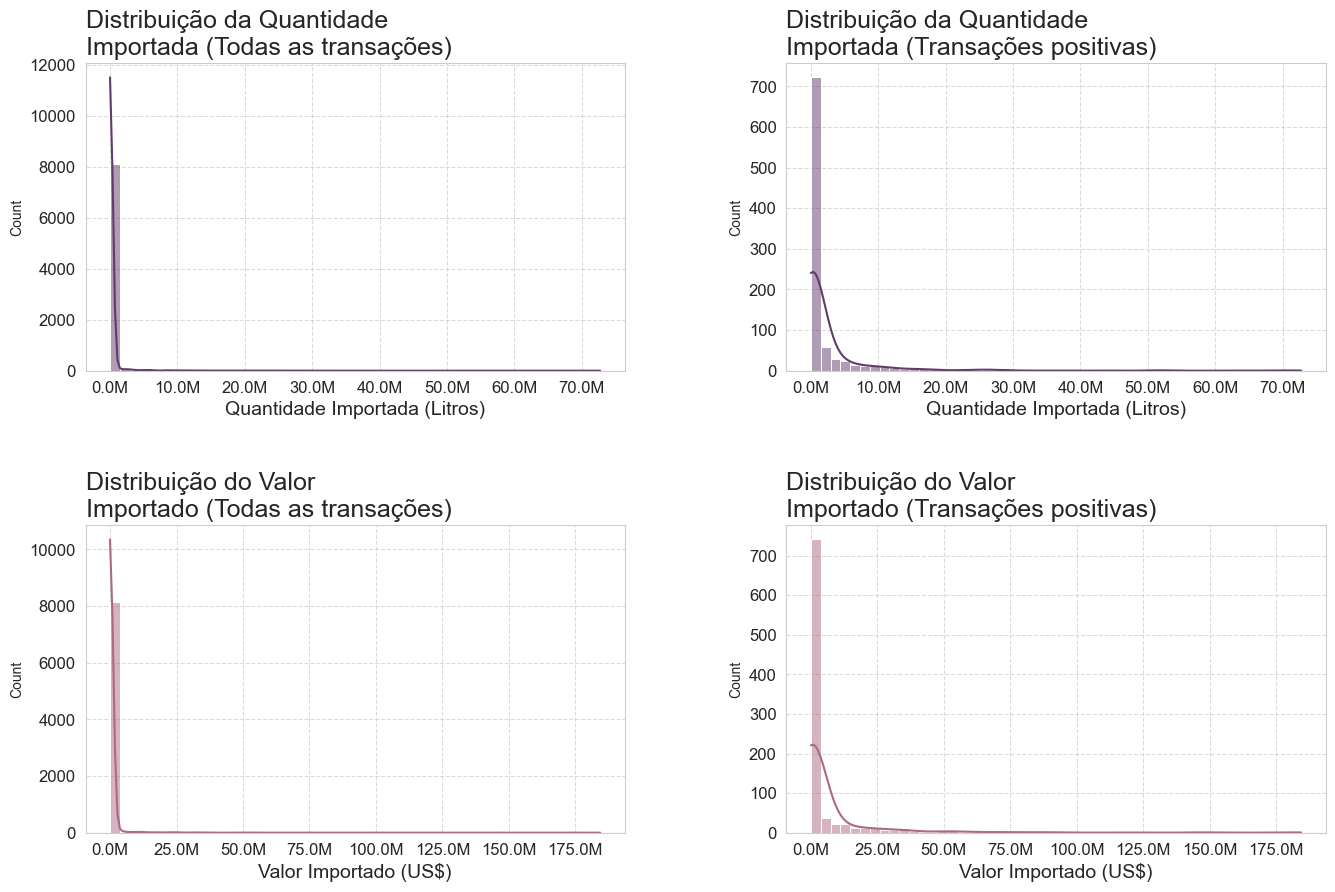

In [194]:
# Criando uma figura e uma grade de 4 linhas e 1 coluna de eixos
fig, axes = plt.subplots(
    nrows = 2,
    ncols = 2,
    figsize=(16, 10)
)

# Primeiro gráfico: Histograma da Quantidade (Todas as transações)
sns.histplot(df_completo_merge['Quantidade_Import_(Litros)'], kde=True, bins=50, color=cores[3], ax=axes[0][0])
axes[0][0].set_title('Distribuição da Quantidade\nImportada (Todas as transações)', loc='left', fontsize=18)
axes[0][0].set_xlabel('Quantidade Importada (Litros)', fontsize=14)

# Segundo gráfico: Histograma da Quantidade (Transações positivas)
sns.histplot(df_completo_merge_positivo['Quantidade_Import_(Litros)'], kde=True, bins=50, color=cores[3], ax=axes[0][1])
axes[0][1].set_title('Distribuição da Quantidade\nImportada (Transações positivas)', loc='left', fontsize=18)
axes[0][1].set_xlabel('Quantidade Importada (Litros)', fontsize=14)

# Terceiro gráfico: Histograma do Valor (Todas as transações)
sns.histplot(df_completo_merge['Valor_Import_(US$)'], kde=True, bins=50, color=cores[7], ax=axes[1][0])
axes[1][0].set_title('Distribuição do Valor\nImportado (Todas as transações)', loc='left', fontsize=18)
axes[1][0].set_xlabel('Valor Importado (US$)', fontsize=14)

# Quarto gráfico: Histograma do Valor (Transações positivas)
sns.histplot(df_completo_merge_positivo['Valor_Import_(US$)'], kde=True, bins=50, color=cores[7], ax=axes[1][1])
axes[1][1].set_title('Distribuição do Valor\nImportado (Transações positivas)', loc='left', fontsize=18)
axes[1][1].set_xlabel('Valor Importado (US$)', fontsize=14)

for ax in axes.flat:
    ax.tick_params(axis='both', labelsize=12)
    ax.grid(linestyle='--', alpha=0.7, axis='both')
    ax.xaxis.set_major_formatter(formatter)

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

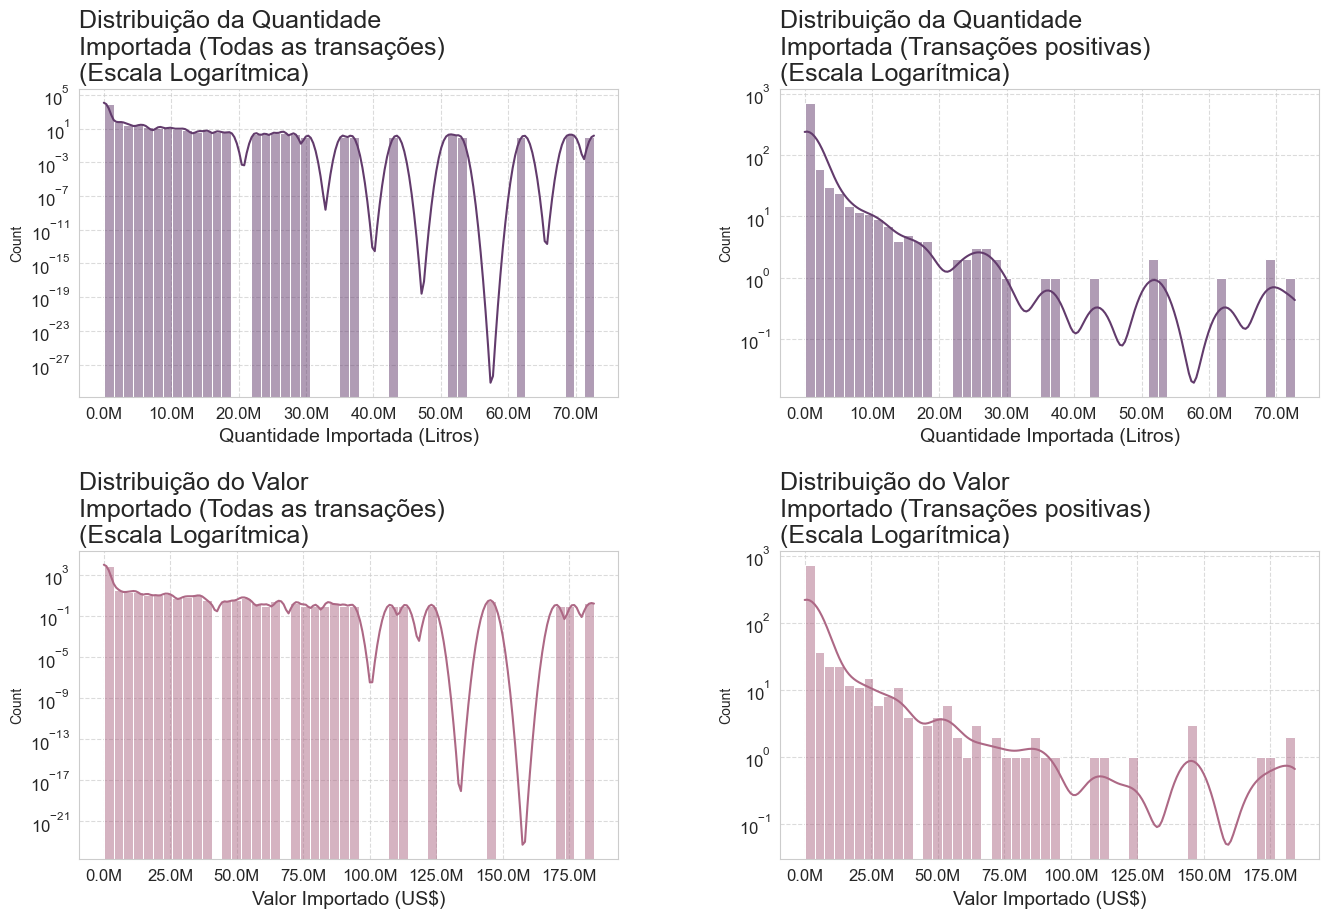

In [195]:
# Criando uma figura e uma grade de 4 linhas e 1 coluna de eixos
fig, axes = plt.subplots(
    nrows = 2,
    ncols = 2,
    figsize=(16, 10)
)

# Primeiro gráfico: Histograma da Quantidade (Todas as transações)
sns.histplot(df_completo_merge['Quantidade_Import_(Litros)'], kde=True, bins=50, color=cores[3], ax=axes[0][0])
axes[0][0].set_title('Distribuição da Quantidade\nImportada (Todas as transações)\n(Escala Logarítmica)', loc='left', fontsize=18)
axes[0][0].set_xlabel('Quantidade Importada (Litros)', fontsize=14)

# Segundo gráfico: Histograma da Quantidade (Transações positivas)
sns.histplot(df_completo_merge_positivo['Quantidade_Import_(Litros)'], kde=True, bins=50, color=cores[3], ax=axes[0][1])
axes[0][1].set_title('Distribuição da Quantidade\nImportada (Transações positivas)\n(Escala Logarítmica)', loc='left', fontsize=18)
axes[0][1].set_xlabel('Quantidade Importada (Litros)', fontsize=14)

# Terceiro gráfico: Histograma do Valor (Todas as transações)
sns.histplot(df_completo_merge['Valor_Import_(US$)'], kde=True, bins=50, color=cores[7], ax=axes[1][0])
axes[1][0].set_title('Distribuição do Valor\nImportado (Todas as transações)\n(Escala Logarítmica)', loc='left', fontsize=18)
axes[1][0].set_xlabel('Valor Importado (US$)', fontsize=14)

# Quarto gráfico: Histograma do Valor (Transações positivas)
sns.histplot(df_completo_merge_positivo['Valor_Import_(US$)'], kde=True, bins=50, color=cores[7], ax=axes[1][1])
axes[1][1].set_title('Distribuição do Valor\nImportado (Transações positivas)\n(Escala Logarítmica)', loc='left', fontsize=18)
axes[1][1].set_xlabel('Valor Importado (US$)', fontsize=14)

for ax in axes.flat:
    ax.tick_params(axis='both', labelsize=12)
    ax.grid(linestyle='--', alpha=0.7, axis='both')
    ax.xaxis.set_major_formatter(formatter)
    ax.set_yscale('log')

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

##### Visualizando Graficamente: Outliers das Importações Positivas

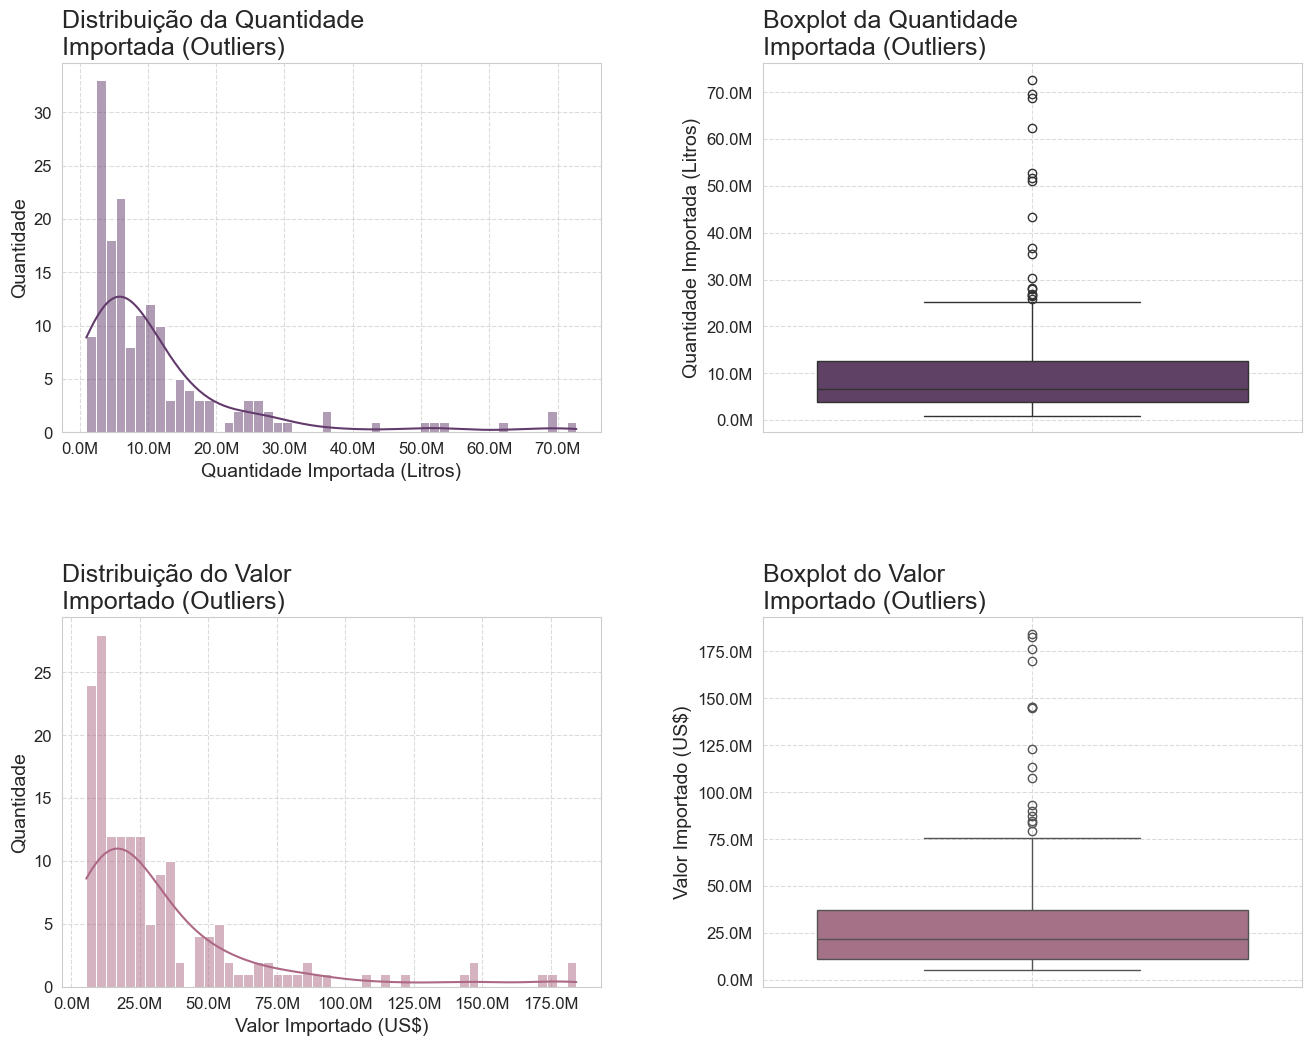

In [196]:
# Criando uma figura e uma grade de 4 linhas e 1 coluna de eixos
fig, axes = plt.subplots(
    nrows = 2,
    ncols = 2,
    figsize=(16, 12)
)

# Primeiro gráfico: Histograma da Quantidade (Outliers)
sns.histplot(df_outlier_valor['Quantidade_Import_(Litros)'], kde=True, bins=50, color=cores[3], ax=axes[0][0])
axes[0][0].set_title('Distribuição da Quantidade\nImportada (Outliers)', loc='left', fontsize=18)
axes[0][0].set_xlabel('Quantidade Importada (Litros)', fontsize=14)
axes[0][0].set_ylabel('Quantidade', fontsize=14)
axes[0][0].xaxis.set_major_formatter(formatter)

# Segundo gráfico: boxplot da Quantidade
sns.boxplot(y = df_outlier_valor['Quantidade_Import_(Litros)'], color=cores[3], ax=axes[0][1])
axes[0][1].set_title('Boxplot da Quantidade\nImportada (Outliers)', loc='left', fontsize=18)
axes[0][1].set_ylabel('Quantidade Importada (Litros)', fontsize=14)
axes[0][1].yaxis.set_major_formatter(formatter)

# Terceiro gráfico: Histograma do Valor (Outliers)
sns.histplot(df_outlier_valor['Valor_Import_(US$)'], kde=True, bins=50, ax=axes[1][0], color=cores[7])
axes[1][0].set_title('Distribuição do Valor\nImportado (Outliers)', loc='left', fontsize=18)
axes[1][0].set_xlabel('Valor Importado (US$)', fontsize=14)
axes[1][0].set_ylabel('Quantidade', fontsize=14)
axes[1][0].xaxis.set_major_formatter(formatter)

# Segundo gráfico: boxplot do Valor
sns.boxplot(y = df_outlier_valor['Valor_Import_(US$)'], ax=axes[1][1], color=cores[7])
axes[1][1].set_title('Boxplot do Valor\nImportado (Outliers)', loc='left', fontsize=18)
axes[1][1].set_ylabel('Valor Importado (US$)', fontsize=14)
axes[1][1].yaxis.set_major_formatter(formatter)

for ax in axes.flat:
    ax.tick_params(axis='both', labelsize=12)
    ax.grid(linestyle='--', alpha=0.7, axis='both')

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

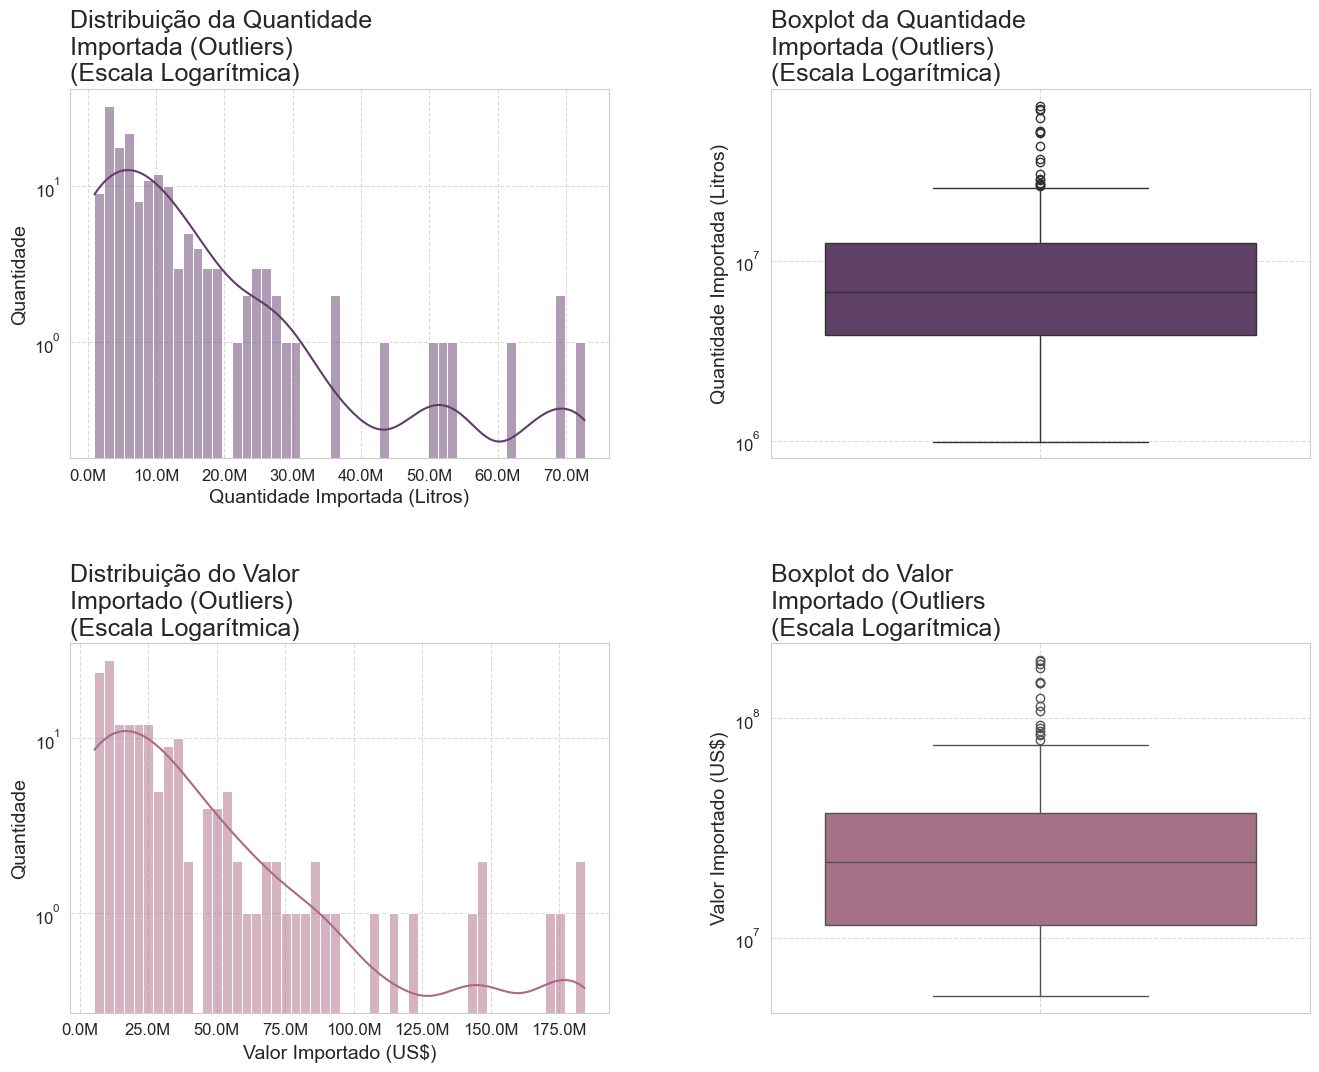

In [197]:
# Criando uma figura e uma grade de 4 linhas e 1 coluna de eixos
fig, axes = plt.subplots(
    nrows = 2,
    ncols = 2,
    figsize=(16, 12)
)

# Primeiro gráfico: Histograma da Quantidade (Outliers)
sns.histplot(df_outlier_valor['Quantidade_Import_(Litros)'], kde=True, bins=50, color=cores[3], ax=axes[0][0])
axes[0][0].set_title('Distribuição da Quantidade\nImportada (Outliers)\n(Escala Logarítmica)', loc='left', fontsize=18)
axes[0][0].set_xlabel('Quantidade Importada (Litros)', fontsize=14)
axes[0][0].set_ylabel('Quantidade', fontsize=14)
axes[0][0].xaxis.set_major_formatter(formatter)

# Segundo gráfico: boxplot da Quantidade
sns.boxplot(y = df_outlier_valor['Quantidade_Import_(Litros)'], color=cores[3], ax=axes[0][1])
axes[0][1].set_title('Boxplot da Quantidade\nImportada (Outliers)\n(Escala Logarítmica)', loc='left', fontsize=18)
axes[0][1].set_ylabel('Quantidade Importada (Litros)', fontsize=14)
axes[0][1].yaxis.set_major_formatter(formatter)

# Terceiro gráfico: Histograma do Valor (Outliers)
sns.histplot(df_outlier_valor['Valor_Import_(US$)'], kde=True, bins=50, ax=axes[1][0], color=cores[7])
axes[1][0].set_title('Distribuição do Valor\nImportado (Outliers)\n(Escala Logarítmica)', loc='left', fontsize=18)
axes[1][0].set_xlabel('Valor Importado (US$)', fontsize=14)
axes[1][0].set_ylabel('Quantidade', fontsize=14)
axes[1][0].xaxis.set_major_formatter(formatter)

# Segundo gráfico: boxplot do Valor
sns.boxplot(y = df_outlier_valor['Valor_Import_(US$)'], ax=axes[1][1], color=cores[7])
axes[1][1].set_title('Boxplot do Valor\nImportado (Outliers\n(Escala Logarítmica)', loc='left', fontsize=18)
axes[1][1].set_ylabel('Valor Importado (US$)', fontsize=14)
axes[1][1].yaxis.set_major_formatter(formatter)

for ax in axes.flat:
    ax.tick_params(axis='both', labelsize=12)
    ax.grid(linestyle='--', alpha=0.7, axis='both')
    ax.set_yscale('log')

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

- A distribuição das importações (o que o Brasil compra) apresenta os mesmo desafios de distribuição que a base de exportações (o que o Brasil vende). Ela também possui uma alta concentração de valores e uma longa cauda de outliers. Desta forma, a base recebeu o mesmo tratamento para garantir consistência na metologia utilizada.
- Os valores na cauda superior, outliers, correspondem a importações de países-chave: França, Chile, Itália e Argentina, principalmente. A análise deve se concentrar em saber se o preço por litro nessas transações gigantes de importação é maior ou menor do que o preço por litro das transações gigantes de exportação.

##### Analizando a Variável Preço por Litro das Importações

In [198]:
df_completo_merge_positivo['Preço_por_Litro_Import'].describe()

count   929.000000
mean      5.088642
std      10.580750
min       0.000000
25%       1.481162
50%       2.799353
75%       4.776556
max     155.714286
Name: Preço_por_Litro_Import, dtype: float64

In [199]:
# Visualizando o top 10
df_completo_merge_positivo[['País', 'Ano', 'Quantidade_Import_(Litros)', 'Valor_Import_(US$)', 'Preço_por_Litro_Import', 'Categoria_Transação_Import']].sort_values(by='Preço_por_Litro_Import', ascending=False).head(10)

País   Ano  Quantidade_Import_(Litros)  Valor_Import_(US$)  \
1234      Bélgica  2016                    7.000000         1090.000000   
1025     Bermudas  2023                    6.000000          879.000000   
1668        China  2018                    5.000000          472.000000   
1442       Canada  2008                  396.000000        30957.000000   
1457       Canada  2023                   14.000000         1062.000000   
643     Austrália  2019                16292.000000      1214643.000000   
6414  Reino Unido  2012                  406.000000        26466.000000   
6419  Reino Unido  2017                   16.000000         1033.000000   
1452       Canada  2018                  301.000000        17418.000000   
6418  Reino Unido  2016                    5.000000          255.000000   

      Preço_por_Litro_Import Categoria_Transação_Import  
1234              155.714286       Média (US1K - US50K)  
1025              146.500000            Pequena (<US1K)  
1668               94.400000            Pequena (<US1K)  
1442               78.174242       Média (US1K - US50K)  
1457               75.857143       Média (US1K - US50K)  
643                74.554567          Gigante (>US250K)  
6414               65.187192       Média (US1K - US50K)  
6419               64.562500       Média (US1K - US50K)  
1452               57.867110       Média (US1K - US50K)  
6418               51.000000            Pequena (<US1K)

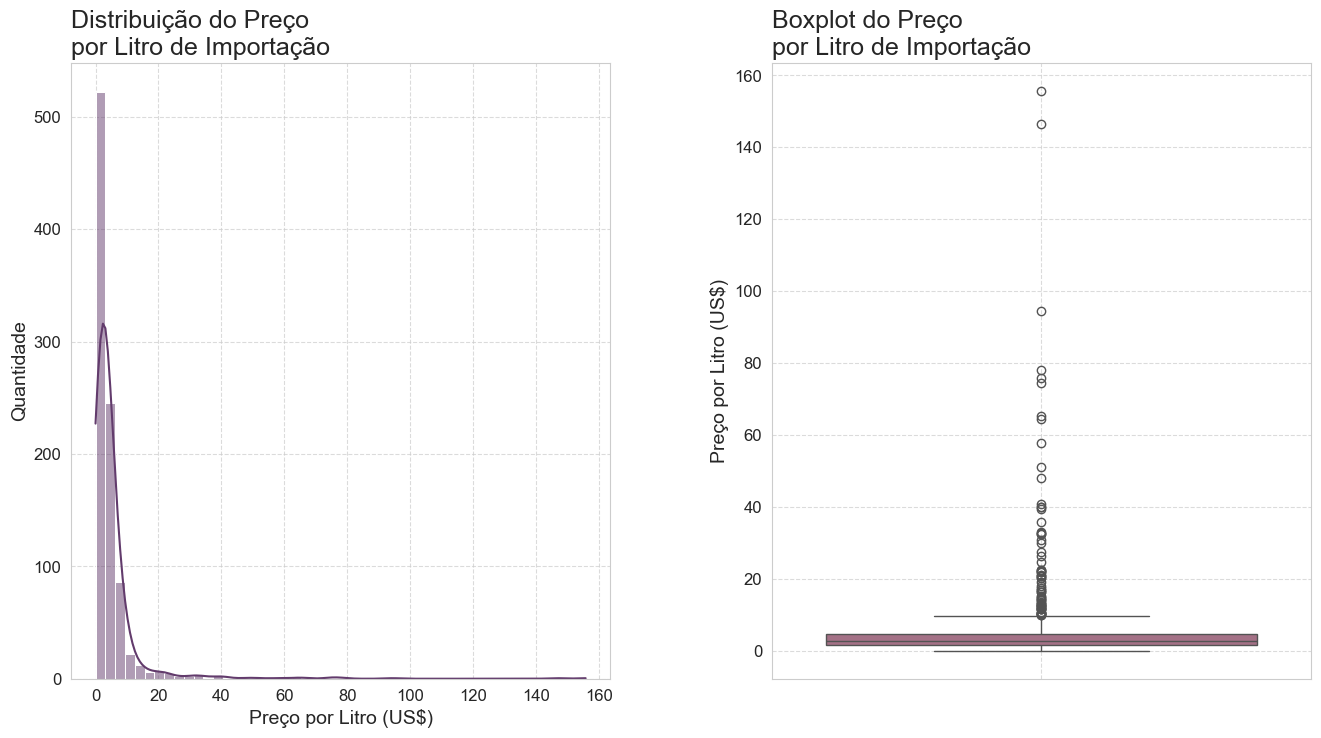

In [200]:
fig, axes = plt.subplots(
    nrows = 1,
    ncols = 2,
    figsize=(16,8)
)

# Primeiro gráfico: Histograma do Preço por Litro
sns.histplot(df_completo_merge_positivo['Preço_por_Litro_Import'], kde=True, bins=50, color=cores[3], ax=axes[0])
axes[0].set_title('Distribuição do Preço \npor Litro de Importação', fontsize=18, loc='left')
axes[0].set_xlabel('Preço por Litro (US$)', fontsize=14)
axes[0].set_ylabel('Quantidade', fontsize=14)

# Segundo gráfico: Boxplot do Preço por Litro
sns.boxplot(df_completo_merge_positivo['Preço_por_Litro_Import'], color=cores[7], ax=axes[1])
axes[1].set_title('Boxplot do Preço \npor Litro de Importação', fontsize=18, loc='left')
axes[1].set_ylabel('Preço por Litro (US$)', fontsize=14)

for ax in axes.flat:
    ax.tick_params(axis='both', labelsize=12)
    ax.grid(linestyle='--', alpha=0.7, axis='both')

plt.subplots_adjust(wspace=0.3)
plt.show()

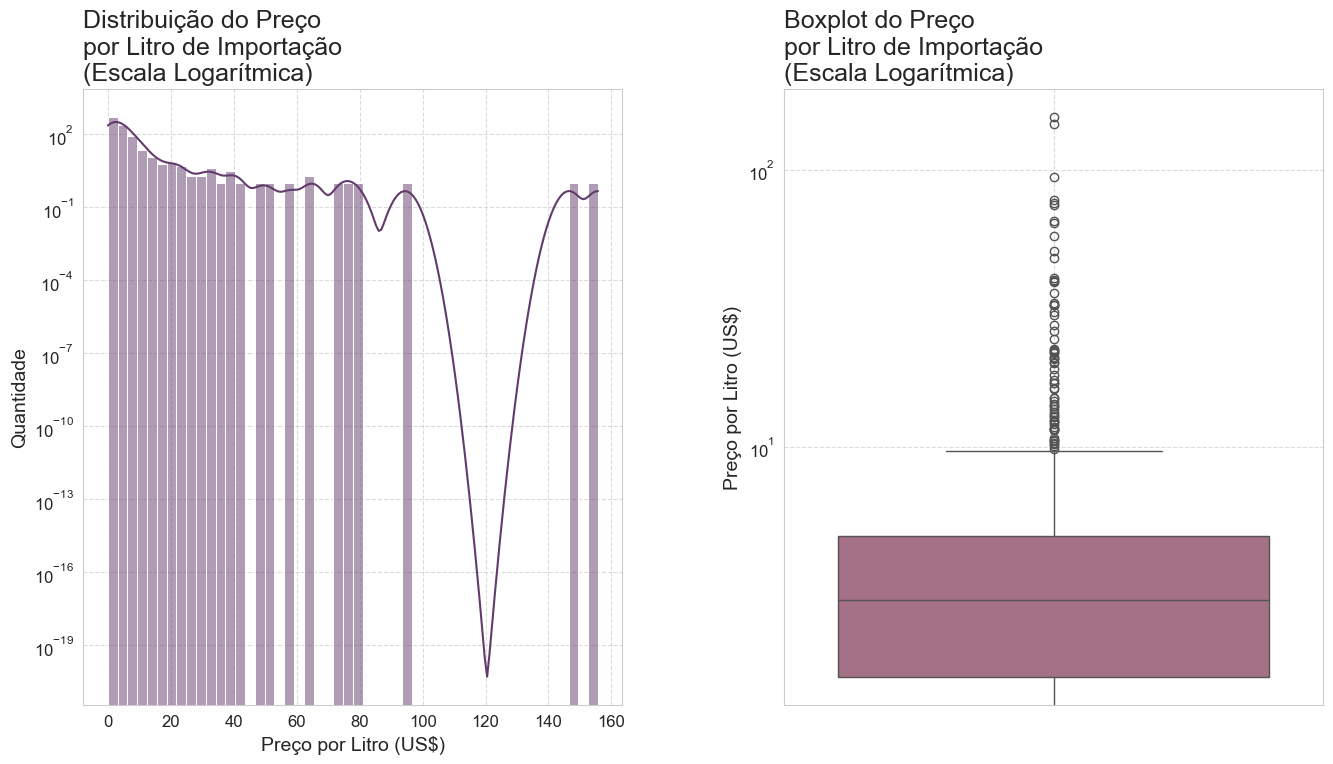

In [201]:
fig, axes = plt.subplots(
    nrows = 1,
    ncols = 2,
    figsize=(16,8)
)

# Primeiro gráfico: Histograma do Preço por Litro
sns.histplot(df_completo_merge_positivo['Preço_por_Litro_Import'], kde=True, bins=50, color=cores[3], ax=axes[0])
axes[0].set_title('Distribuição do Preço \npor Litro de Importação\n(Escala Logarítmica)', fontsize=18, loc='left')
axes[0].set_xlabel('Preço por Litro (US$)', fontsize=14)
axes[0].set_ylabel('Quantidade', fontsize=14)

# Segundo gráfico: Boxplot do Preço por Litro
sns.boxplot(df_completo_merge_positivo['Preço_por_Litro_Import'], color=cores[7], ax=axes[1])
axes[1].set_title('Boxplot do Preço \npor Litro de Importação\n(Escala Logarítmica)', fontsize=18, loc='left')
axes[1].set_ylabel('Preço por Litro (US$)', fontsize=14)

for ax in axes.flat:
    ax.tick_params(axis='both', labelsize=12)
    ax.grid(linestyle='--', alpha=0.7, axis='both')
    ax.set_yscale('log')

plt.subplots_adjust(wspace=0.3)
plt.show()

In [202]:
# Investigando os outliers da variável: Preço por Litro
# Extraindo os Quartis
Q1 = df_completo_merge_positivo['Preço_por_Litro_Import'].quantile(0.25)
Q3 = df_completo_merge_positivo['Preço_por_Litro_Import'].quantile(0.75)

# Extraindo o IQR
IQR = Q3 - Q1

# Calculando o limite superior
lim_sup = Q3 + 1.5 * IQR

# Filtrando a base para ver apenas os ouliers
df_outlier_valor = df_completo_merge_positivo[df_completo_merge_positivo['Preço_por_Litro_Import'] > lim_sup]

# Ordenando os valores para verificar os maiores primeiro
print('As transações mais valiosas: ')
display(df_outlier_valor.sort_values(by='Preço_por_Litro_Import', ascending=False))

As transações mais valiosas: 


País   Ano  Quantidade_Export_(Litros)  Valor_Export_(US$)  \
1234        Bélgica  2016                 7200.000000        46534.000000   
1025       Bermudas  2023                   16.000000          153.000000   
1668          China  2018                30835.000000       126336.000000   
1442         Canada  2008                    0.000000            0.000000   
1457         Canada  2023                    0.000000            0.000000   
...             ...   ...                         ...                 ...   
8250        Áustria  2012                    0.000000            0.000000   
1235        Bélgica  2017                 2790.000000        16405.000000   
8243        Áustria  2005                    0.000000            0.000000   
6044  Países Baixos  2020                  248.000000         1532.000000   
5709  Nova Zelândia  2009                    0.000000            0.000000   

     Categoria_Transação_Export  Preço_por_Litro_Export  \
1234       Média (US1K - US50K)                6.463056   
1025            Pequena (<US1K)                9.562500   
1668    Grande (US50K - US250K)                4.097162   
1442          Inexistente (US0)                0.000000   
1457          Inexistente (US0)                0.000000   
...                         ...                     ...   
8250          Inexistente (US0)                0.000000   
1235       Média (US1K - US50K)                5.879928   
8243          Inexistente (US0)                0.000000   
6044       Média (US1K - US50K)                6.177419   
5709          Inexistente (US0)                0.000000   

      Quantidade_Import_(Litros)  Valor_Import_(US$)  Preço_por_Litro_Import  \
1234                    7.000000         1090.000000              155.714286   
1025                    6.000000          879.000000              146.500000   
1668                    5.000000          472.000000               94.400000   
1442                  396.000000        30957.000000               78.174242   
1457                   14.000000         1062.000000               75.857143   
...                          ...                 ...                     ...   
8250                 8098.000000        85116.000000               10.510743   
1235                 4376.000000        45221.000000               10.333867   
8243                 1688.000000        17321.000000               10.261256   
6044                 2285.000000        22990.000000               10.061269   
5709                30806.000000       302244.000000                9.811206   

     Categoria_Transação_Import  
1234       Média (US1K - US50K)  
1025            Pequena (<US1K)  
1668            Pequena (<US1K)  
1442       Média (US1K - US50K)  
1457       Média (US1K - US50K)  
...                         ...  
8250    Grande (US50K - US250K)  
1235       Média (US1K - US50K)  
8243       Média (US1K - US50K)  
6044       Média (US1K - US50K)  
5709          Gigante (>US250K)  

[70 rows x 10 columns]

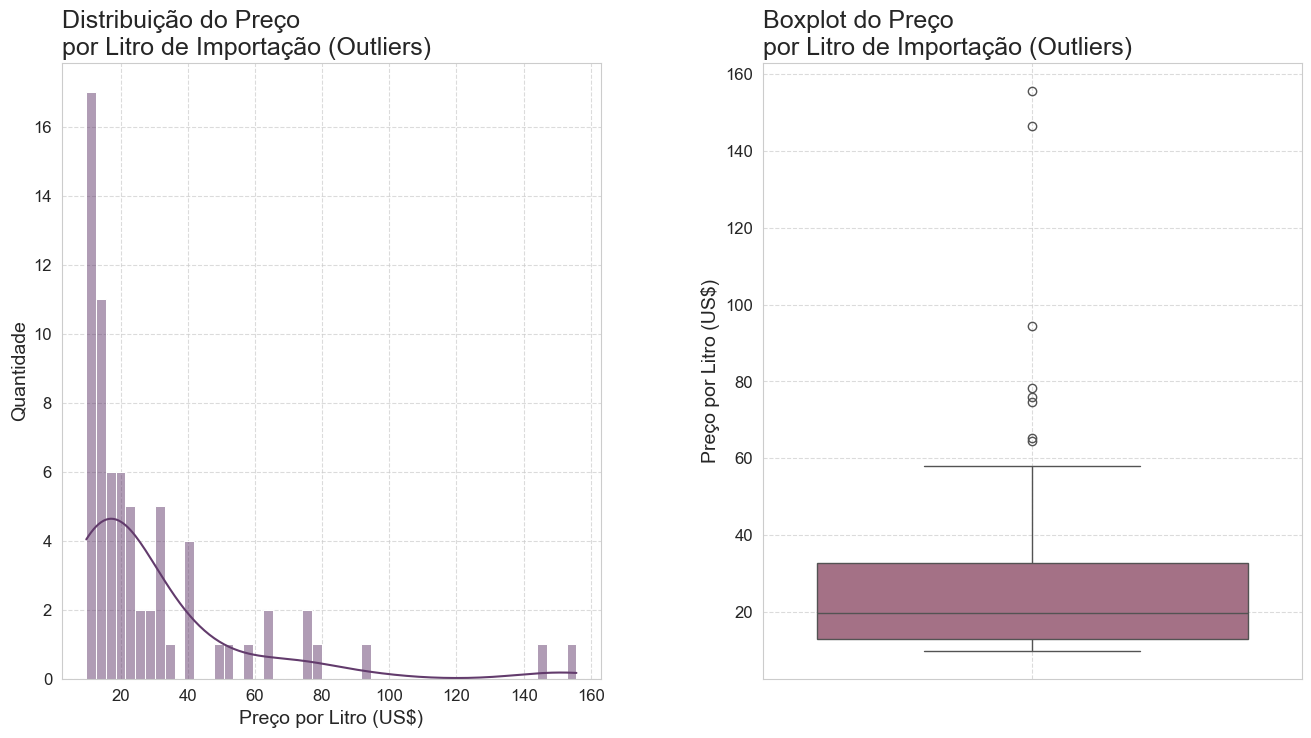

In [203]:
# Histograma de Preço_por_Litro_Import (Outliers)
fig, axes = plt.subplots(
    nrows = 1,
    ncols = 2,
    figsize=(16,8)
)

# Primeiro gráfico: Histograma do Preço por Litro (Outliers)
sns.histplot(df_outlier_valor['Preço_por_Litro_Import'], kde=True, bins=50, color=cores[3], ax=axes[0])
axes[0].set_title('Distribuição do Preço \npor Litro de Importação (Outliers)', fontsize=18, loc='left')
axes[0].set_xlabel('Preço por Litro (US$)', fontsize=14)
axes[0].set_ylabel('Quantidade', fontsize=14)

# Segundo gráfico: Boxplot do Preço por Litro (Outliers)
sns.boxplot(df_outlier_valor['Preço_por_Litro_Import'], color=cores[7], ax=axes[1])
axes[1].set_title('Boxplot do Preço \npor Litro de Importação (Outliers)', fontsize=18, loc='left')
axes[1].set_ylabel('Preço por Litro (US$)', fontsize=14)

for ax in axes.flat:
    ax.tick_params(axis='both', labelsize=12)
    ax.grid(linestyle='--', alpha=0.7, axis='both')

plt.subplots_adjust(wspace=0.3)
plt.show()

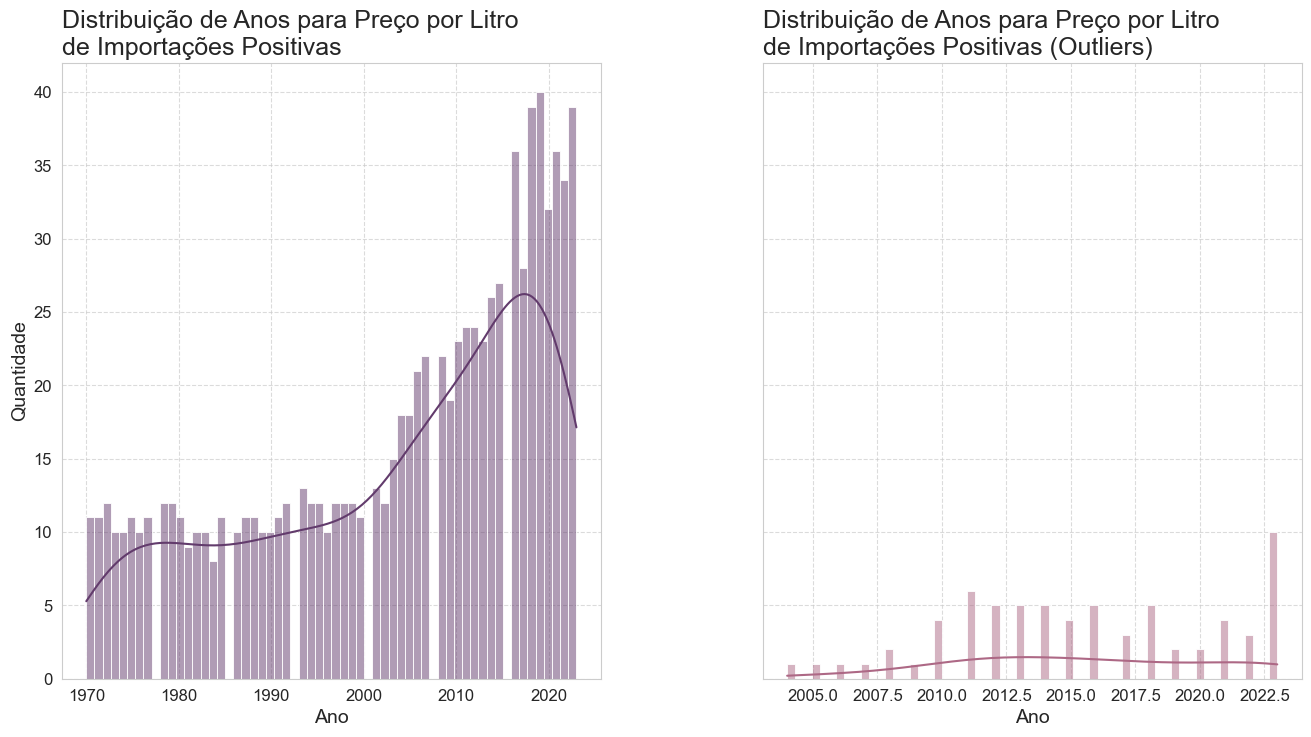

In [204]:
fig, axes = plt.subplots(
    nrows = 1,
    ncols = 2,
    figsize=(16,8),
    sharey=True
)

# Primeiro gráfico: Histograma dos anos presentes nos maiores valores do preço por litro (maiores que zero)
sns.histplot(df_completo_merge_positivo['Ano'], kde=True, bins=60, color=cores[3], ax=axes[0])
axes[0].set_title('Distribuição de Anos para Preço por Litro\nde Importações Positivas', fontsize=18, loc='left')
axes[0].set_xlabel('Ano', fontsize=14)


# Segundo gráfico: Histograma dos anos presentes nos maiores valores do preço por litro (Outlier)
sns.histplot(df_outlier_valor['Ano'], kde=True, bins=60, color=cores[7], ax=axes[1])
axes[1].set_title('Distribuição de Anos para Preço por Litro\nde Importações Positivas (Outliers)', fontsize=18, loc='left')
axes[1].set_xlabel('Ano', fontsize=14)

for ax in axes.flat:
    ax.tick_params(axis='both', labelsize=12)
    ax.grid(linestyle='--', alpha=0.7, axis='both')
    ax.set_ylabel('Quantidade', fontsize=14)

plt.subplots_adjust(wspace=0.3)
plt.show()

- O histograma e o boxplot mostram que a maioria das importações estão concentradas em valores muito baixos, mesmo em escala logarítmica, entre 0 e 10 dólares. Também há uma cauda longa à direita, indicando que há poucos casos com preços extremamente altos, outliers.
- A escala logarítimica mostrou oscilações em faixas mais altas, entre 40 e 160 dólares, o que sugere picos pontuais de importações caras, com alto valor agregado.
- A média é bem maior que a mediana, quase 4 vezes, evidenciando essa assimetria.

##### Variável Categórica: `País`

In [205]:
df_completo_merge_positivo_importacao = df_completo_merge[df_completo_merge['Valor_Import_(US$)'] > 0]

In [206]:
top_15_importadores = df_completo_merge_positivo_importacao['País'].value_counts().nlargest(15).reset_index()
top_15_importadores

País  count
0         Alemanha     54
1        Argentina     54
2            Chile     54
3           Itália     54
4           França     54
5          Espanha     54
6         Portugal     54
7   Estados Unidos     50
8          Áustria     40
9          Uruguai     39
10          Outros     34
11       Austrália     24
12   África do Sul     23
13          Líbano     21
14      Iugoslávia     21

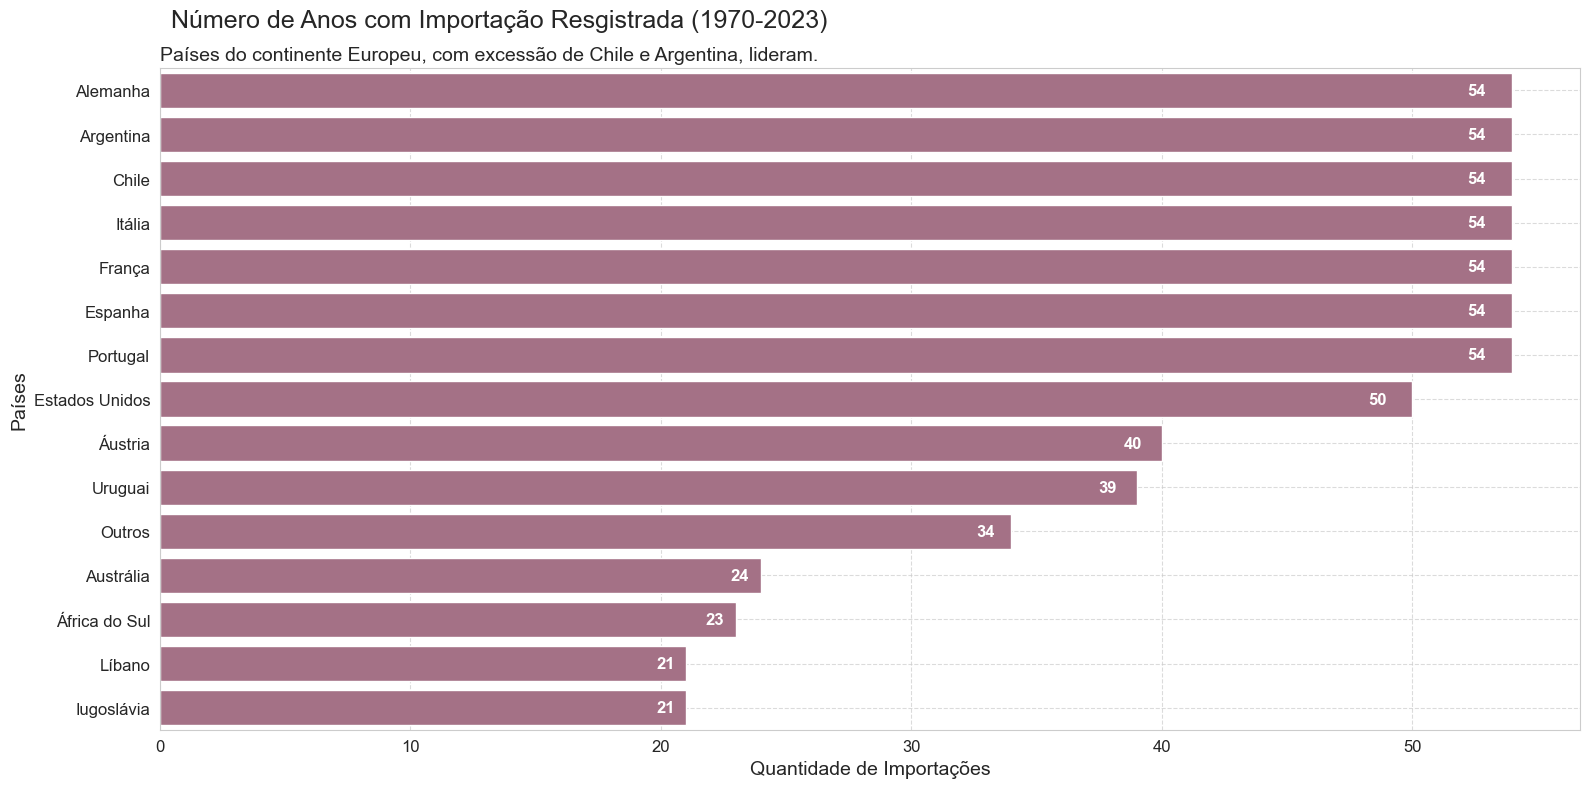

In [207]:
fig, ax= plt.subplots(figsize=(16,8))

sns.barplot(orient='horizontal',
            x=top_15_importadores['count'],
            y=top_15_importadores['País'],
            color=cores[7],
            ax=ax)

fig.suptitle('Número de Anos com Importação Resgistrada (1970-2023)', fontsize=18, ha='left', x=0.11)
ax.set_title('Países do continente Europeu, com excessão de Chile e Argentina, lideram.', fontsize=14, loc='left')

ax.set_xlabel('Quantidade de Importações', fontsize=14)
ax.set_ylabel('Países', fontsize=14)

ax.tick_params(axis='both', labelsize=12)
ax.grid(linestyle='--', alpha=0.7, axis='both')

for patch in ax.patches:
  # Pegando a largura da barra
  largura = patch.get_width()


  # Calculando a posição x e y para o texto
  x = patch.get_x() + largura*0.98
  y = patch.get_y() + patch.get_height()/2

  ax.text(
      x, y,
      f'{largura:.0f}', # Texto a ser exibido
      ha='right', # Alinhamento horizontal
      va='center', # Alinhamento vertical
      fontsize=12, # Tamanho da fonte
      color='white', # Cor do texto
      fontweight='bold'
    )

plt.tight_layout()
plt.show()

- Alemanha, Argentina, Chile, Itália, França, Espanha e Portugal lideram em quantidade de anos exportando para o Brasil, estando presente em todos que correspondem a análise.
- A presença de vários países europeus demonstra a força do continente no comércio internacional de vinhos.
- Argentina e Chile aparecem como exceções, mas com o mesmo peso que as grandes potências euroeias.

### Análise Multivariada

#### Matriz de Correlação (Pearson)

In [208]:
df_completo_merge.head()

País   Ano  Quantidade_Export_(Litros)  Valor_Export_(US$)  \
0  Afeganistão  1970                    0.000000            0.000000   
1  Afeganistão  1971                    0.000000            0.000000   
2  Afeganistão  1972                    0.000000            0.000000   
3  Afeganistão  1973                    0.000000            0.000000   
4  Afeganistão  1974                    0.000000            0.000000   

  Categoria_Transação_Export  Preço_por_Litro_Export  \
0          Inexistente (US0)                0.000000   
1          Inexistente (US0)                0.000000   
2          Inexistente (US0)                0.000000   
3          Inexistente (US0)                0.000000   
4          Inexistente (US0)                0.000000   

   Quantidade_Import_(Litros)  Valor_Import_(US$)  Preço_por_Litro_Import  \
0                    0.000000            0.000000                0.000000   
1                    0.000000            0.000000                0.000000   
2                    0.000000            0.000000                0.000000   
3                    0.000000            0.000000                0.000000   
4                    0.000000            0.000000                0.000000   

  Categoria_Transação_Import  
0          Inexistente (US0)  
1          Inexistente (US0)  
2          Inexistente (US0)  
3          Inexistente (US0)  
4          Inexistente (US0)

In [209]:
colunas = list(df_completo_merge.columns)
colunas.pop(4)
df_completo_merge[colunas[2:8]].corr()

Quantidade_Export_(Litros)  Valor_Export_(US$)  \
Quantidade_Export_(Litros)                    1.000000            0.812612   
Valor_Export_(US$)                            0.812612            1.000000   
Preço_por_Litro_Export                        0.017023            0.049930   
Quantidade_Import_(Litros)                   -0.003858           -0.000650   
Valor_Import_(US$)                           -0.003207            0.001228   
Preço_por_Litro_Import                        0.005927            0.025978   

                            Preço_por_Litro_Export  \
Quantidade_Export_(Litros)                0.017023   
Valor_Export_(US$)                        0.049930   
Preço_por_Litro_Export                    1.000000   
Quantidade_Import_(Litros)                0.090346   
Valor_Import_(US$)                        0.102671   
Preço_por_Litro_Import                    0.162763   

                            Quantidade_Import_(Litros)  Valor_Import_(US$)  \
Quantidade_Export_(Litros)                   -0.003858           -0.003207   
Valor_Export_(US$)                           -0.000650            0.001228   
Preço_por_Litro_Export                        0.090346            0.102671   
Quantidade_Import_(Litros)                    1.000000            0.988384   
Valor_Import_(US$)                            0.988384            1.000000   
Preço_por_Litro_Import                        0.060956            0.069116   

                            Preço_por_Litro_Import  
Quantidade_Export_(Litros)                0.005927  
Valor_Export_(US$)                        0.025978  
Preço_por_Litro_Export                    0.162763  
Quantidade_Import_(Litros)                0.060956  
Valor_Import_(US$)                        0.069116  
Preço_por_Litro_Import                    1.000000

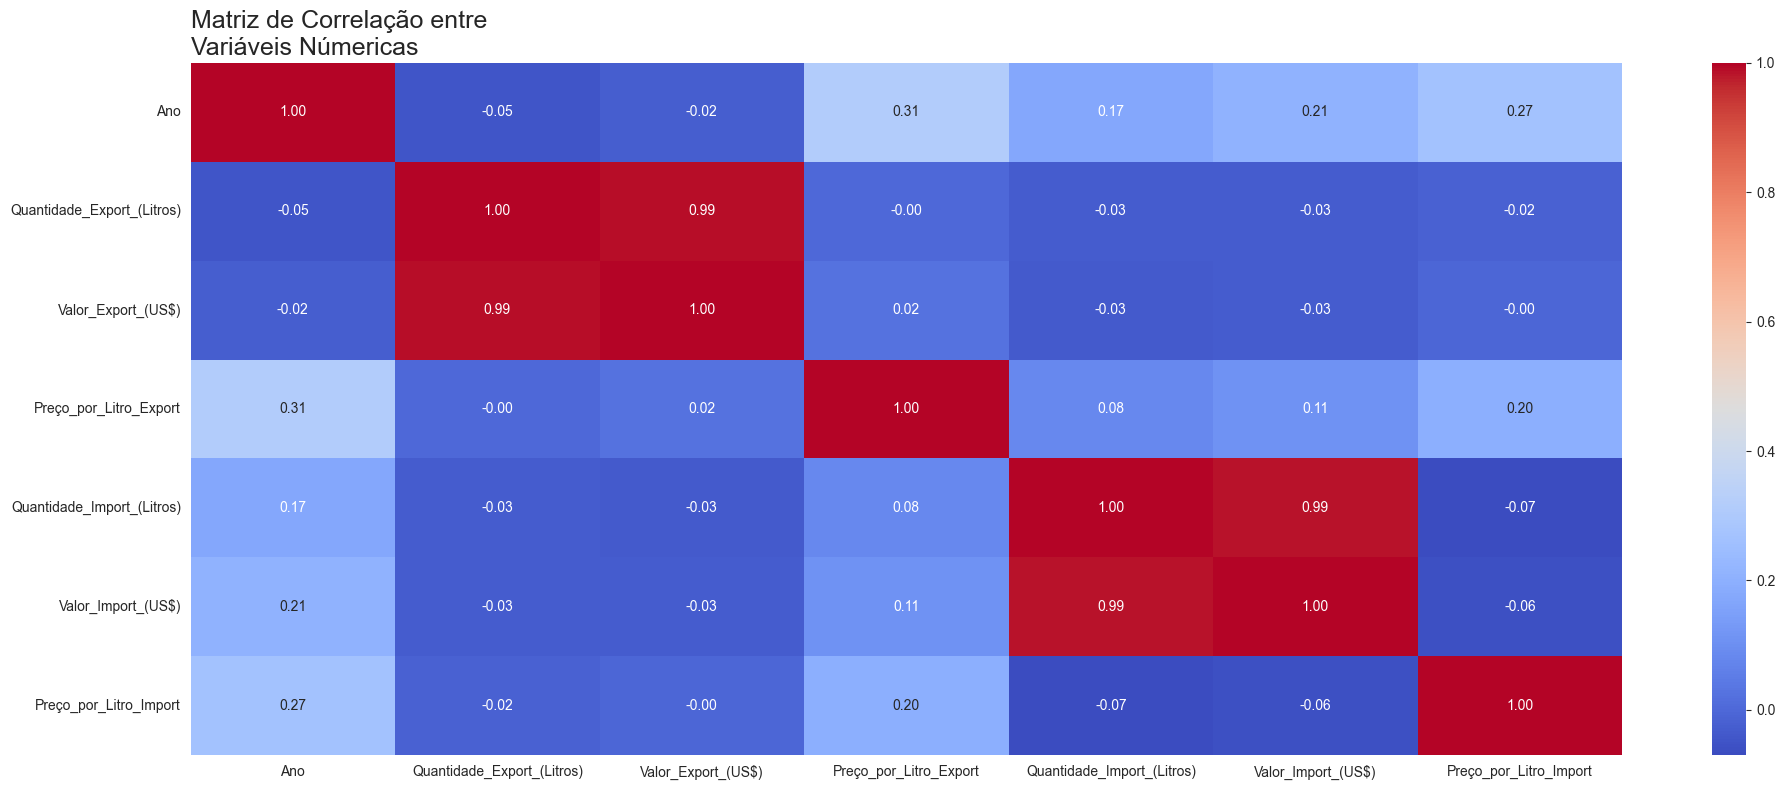

In [210]:
plt.figure(
    figsize=(20,8)
)

sns.heatmap(df_completo_merge_positivo[colunas[1:8]].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre\nVariáveis Númericas', loc='left', fontsize=18)
plt.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

<Figure size 1600x1200 with 0 Axes>

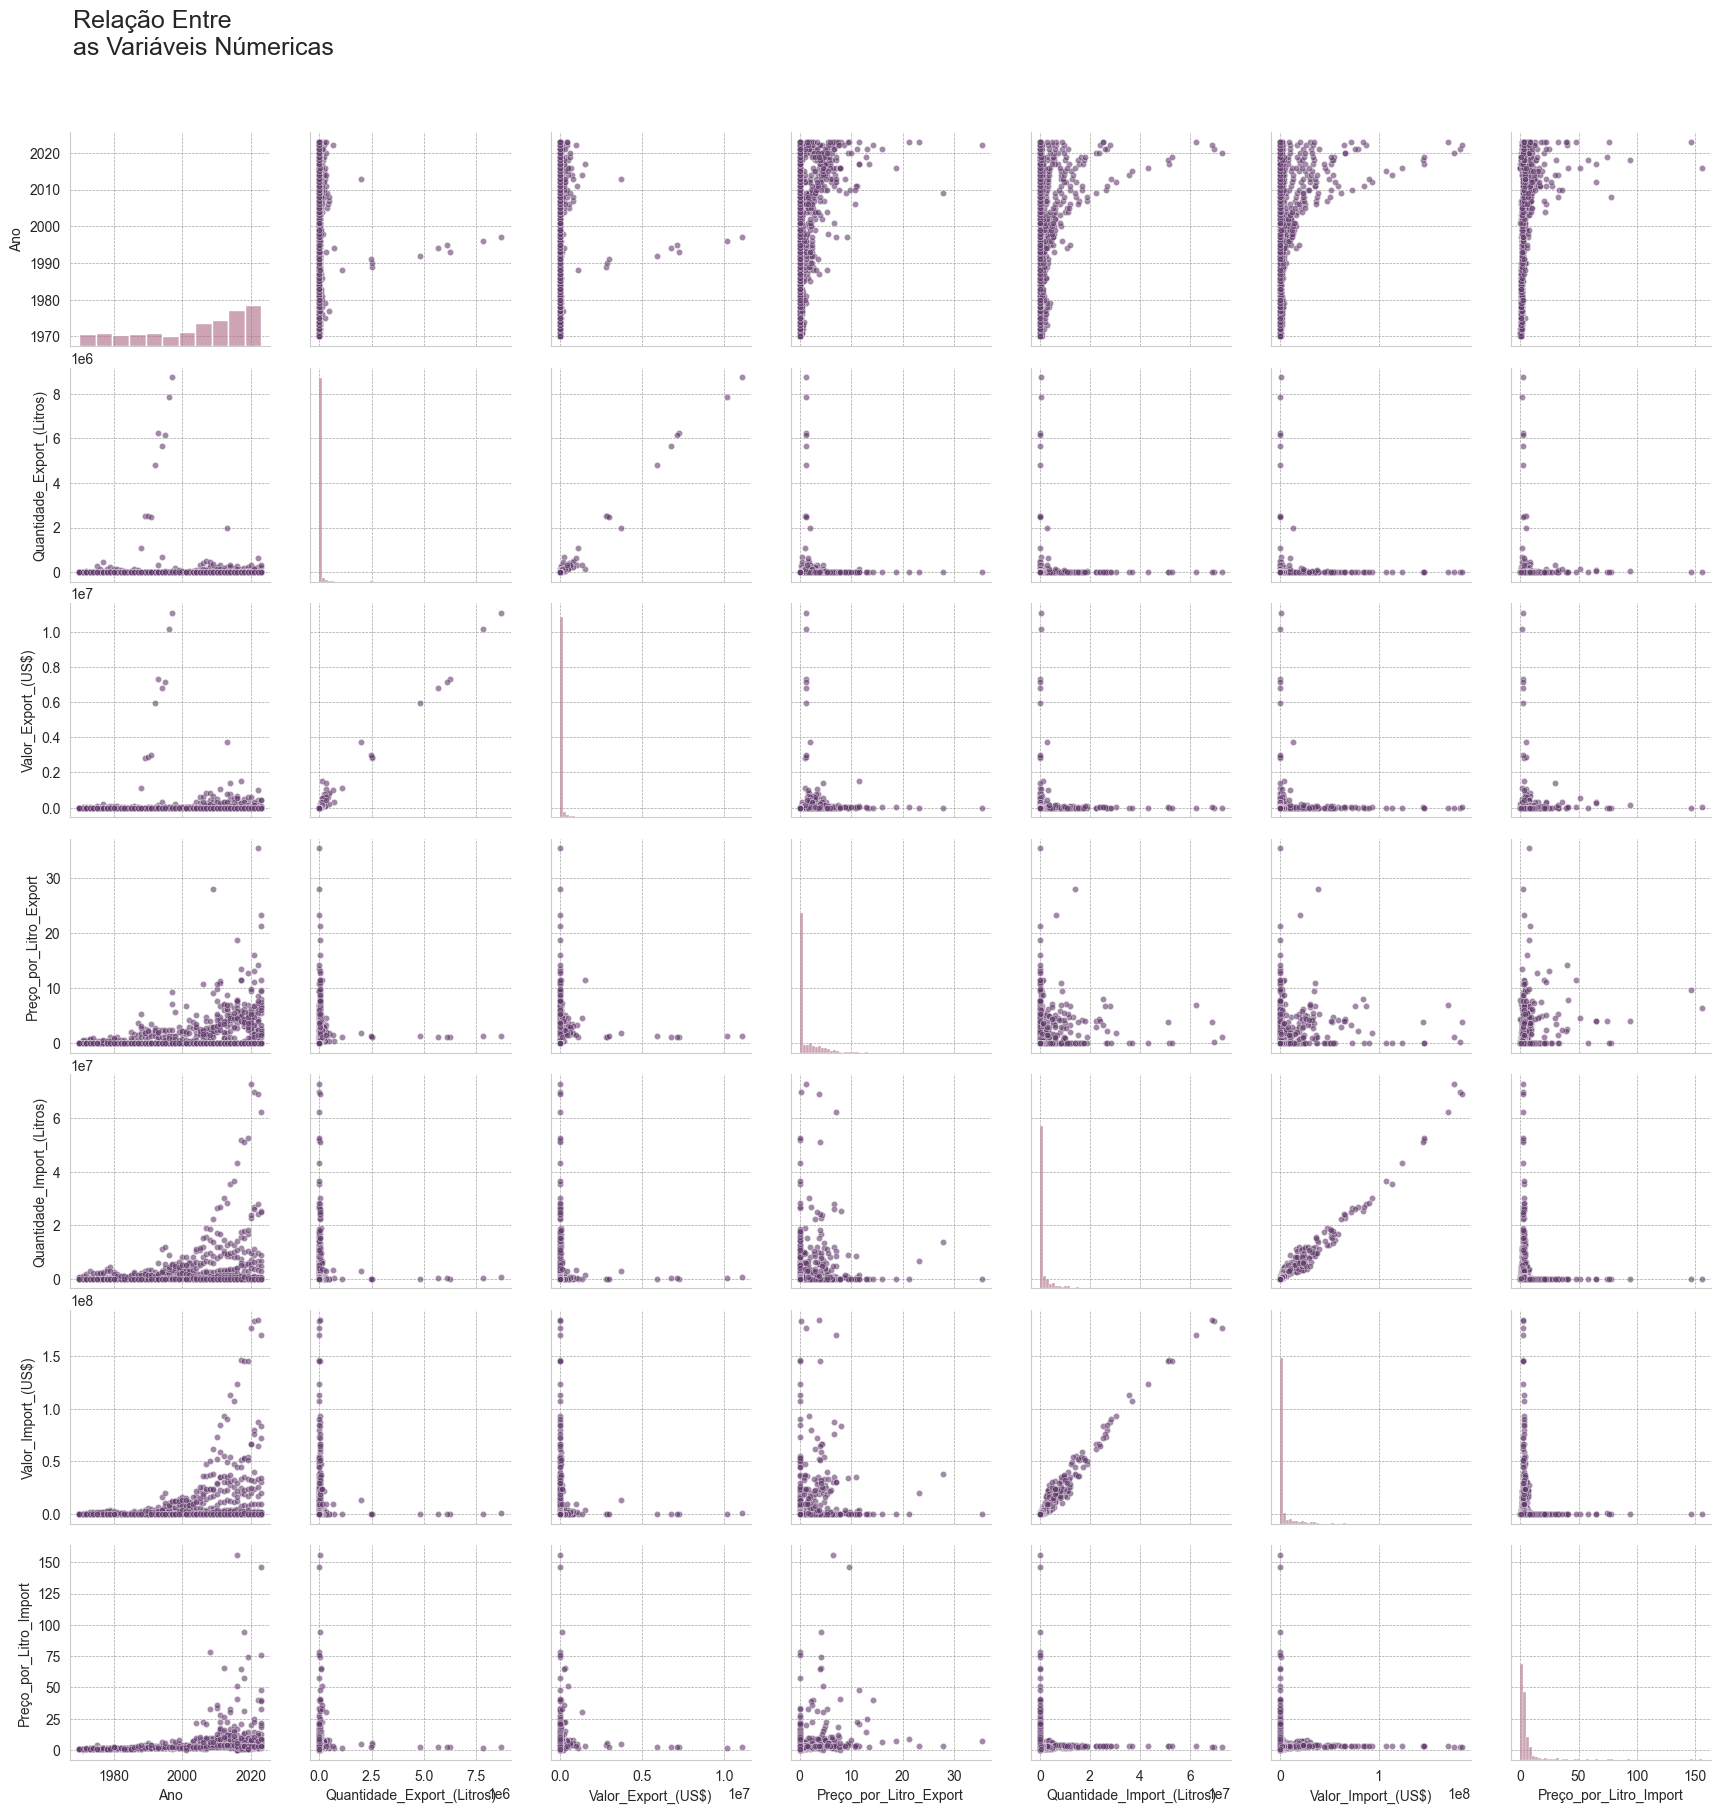

In [211]:
plt.figure(
    figsize=(16,12)
)

g = sns.pairplot(
    df_completo_merge_positivo,
    vars=colunas[1:8],
    kind='scatter',
    diag_kind='hist',
    plot_kws={'color': cores[3], 'alpha': 0.6, 's': 20},  # <--- Argumentos para os scatter plots
    diag_kws={'color': cores[7], 'alpha': 0.6}
)

g.fig.suptitle(
    "Relação Entre \nas Variáveis Númericas",
    y=1,  # Ajusta a posição vertical do título para não sobrepor os gráficos
    x=0.05,
    ha='left',
    fontsize=18
)

for ax in g.axes.flatten():
    ax.grid(True,
            which='both',
            linestyle='--',
            alpha=0.7,
            linewidth=0.5,
            color='gray'
           )

plt.subplots_adjust(top=0.93, bottom=0, wspace=0.2, hspace=0.1)
plt.show()

- A matriz de correlação de Pearson transforma dados brutos em uma medida esatística resumida. Ela quantifica a força e a direção de uma relação linear entre pares de variáveis.
- Esse coeficiente varia de -1 a +1, onde -1 significa uma correlação negativa perfeita e +1 uma correlação positiva perfeita.
- Desta forma eu saio do campo da intuição para um número concreto sobre como as variáveis se comportam juntas.

- A correlação mais forte é entre o `Valor` e `Quantidade`, 0.99 nas Exportações e Importações, o que já era esperado: quanto maior a quantidade de litros exportada, maior tende a ser o valor total da exportação.
- Há uma correlação moderada, 0.31, entre a variável `Ano` e a `Preço por Litro` nas exportações. Isso sugere que, ao longo do período analisado houve uma tendência gerak de aumento no preço por litro.
- Os outros pares tem correlações muito próximas de 0. Ou seja: não há uma relação linear forte entre eles. Mesmo assim, cabe uma analise de seus comportamentos.
- Essas Informações serão detalhadas, visualizadas e analisadas melhor a seguir.

#### Variáveis Categóricas x Númericas

##### Valor e Quantidade Total por Categoria de Transação

- Vamos agrupar os dados com base na nova coluna criada para analisar essas categorias:

In [212]:
df_completo_merge_positivo_exportacao = df_completo_merge[df_completo_merge['Valor_Export_(US$)'] > 0]

In [213]:
df_completo_merge_positivo_importacao = df_completo_merge[df_completo_merge['Valor_Import_(US$)'] > 0]

In [214]:
# Agrupando e agregando os dados
# O método .agg(), já utlizado acima, me permite agregar múltiplos agrupamentos de uma só vez
df_categoria_exportacao = df_completo_merge_positivo_exportacao.groupby('Categoria_Transação_Export').agg(
    Numero_transacoes = ('Valor_Export_(US$)', 'count'),
    Valor_transacoes = ('Valor_Export_(US$)', 'sum'),
    Valor_medio = ('Valor_Export_(US$)', 'mean')
).sort_values(by='Valor_transacoes', ascending=False).reset_index()

In [215]:
df_categoria_importacao = df_completo_merge_positivo_importacao.groupby('Categoria_Transação_Import').agg(
    Numero_transacoes = ('Valor_Import_(US$)', 'count'),
    Valor_transacoes = ('Valor_Import_(US$)', 'sum'),
    Valor_medio = ('Valor_Import_(US$)', 'mean')
).sort_values(by='Valor_transacoes', ascending=False).reset_index()

In [216]:
df_categoria_exportacao

Categoria_Transação_Export  Numero_transacoes  Valor_transacoes  \
0          Gigante (>US250K)                138  220369535.000000   
1    Grande (US50K - US250K)                186   20058144.000000   
2       Média (US1K - US50K)                761   10716372.000000   
3            Pequena (<US1K)                262      75004.000000   

     Valor_medio  
0 1596880.688406  
1  107839.483871  
2   14081.960578  
3     286.274809

In [217]:
df_categoria_importacao

Categoria_Transação_Import  Numero_transacoes  Valor_transacoes  \
0          Gigante (>US250K)                451 6004821828.000000   
1    Grande (US50K - US250K)                181   20895413.000000   
2       Média (US1K - US50K)                239    3898924.000000   
3            Pequena (<US1K)                 57      19012.000000   

      Valor_medio  
0 13314460.815965  
1   115444.270718  
2    16313.489540  
3      333.543860

In [218]:
# Adicionando o percentual
df_categoria_exportacao['Percentual_valor'] = (df_categoria_exportacao['Valor_transacoes']/df_categoria_exportacao['Valor_transacoes'].sum())*100
df_categoria_exportacao['Percentual_numero'] = (df_categoria_exportacao['Numero_transacoes']/df_categoria_exportacao['Numero_transacoes'].sum())*100
df_categoria_exportacao

Categoria_Transação_Export  Numero_transacoes  Valor_transacoes  \
0          Gigante (>US250K)                138  220369535.000000   
1    Grande (US50K - US250K)                186   20058144.000000   
2       Média (US1K - US50K)                761   10716372.000000   
3            Pequena (<US1K)                262      75004.000000   

     Valor_medio  Percentual_valor  Percentual_numero  
0 1596880.688406         87.720072          10.244989  
1  107839.483871          7.984324          13.808463  
2   14081.960578          4.265748          56.495917  
3     286.274809          0.029856          19.450631

In [219]:
# Adicionando o percentual
df_categoria_importacao['Percentual_valor'] = (df_categoria_importacao['Valor_transacoes']/df_categoria_importacao['Valor_transacoes'].sum())*100
df_categoria_importacao['Percentual_numero'] = (df_categoria_importacao['Numero_transacoes']/df_categoria_importacao['Numero_transacoes'].sum())*100
df_categoria_importacao

Categoria_Transação_Import  Numero_transacoes  Valor_transacoes  \
0          Gigante (>US250K)                451 6004821828.000000   
1    Grande (US50K - US250K)                181   20895413.000000   
2       Média (US1K - US50K)                239    3898924.000000   
3            Pequena (<US1K)                 57      19012.000000   

      Valor_medio  Percentual_valor  Percentual_numero  
0 13314460.815965         99.588477          48.599138  
1   115444.270718          0.346545          19.504310  
2    16313.489540          0.064663          25.754310  
3      333.543860          0.000315           6.142241

In [220]:
# Criando uma paleta fixa de cores (Manter um padrão de cor para as categorias)
# Criando uma lista de categorias
categorias_ordenadas = df_categoria_importacao['Categoria_Transação_Import'].to_list()

cores_mapa = sns.color_palette('ch:s=-.2,r=.6_r', n_colors=len(categorias_ordenadas))

# Criando um dicionário que mapeia cada categoria a uma cor
mapa_de_cores = dict(zip(categorias_ordenadas, cores_mapa))

- Analisando graficamente:

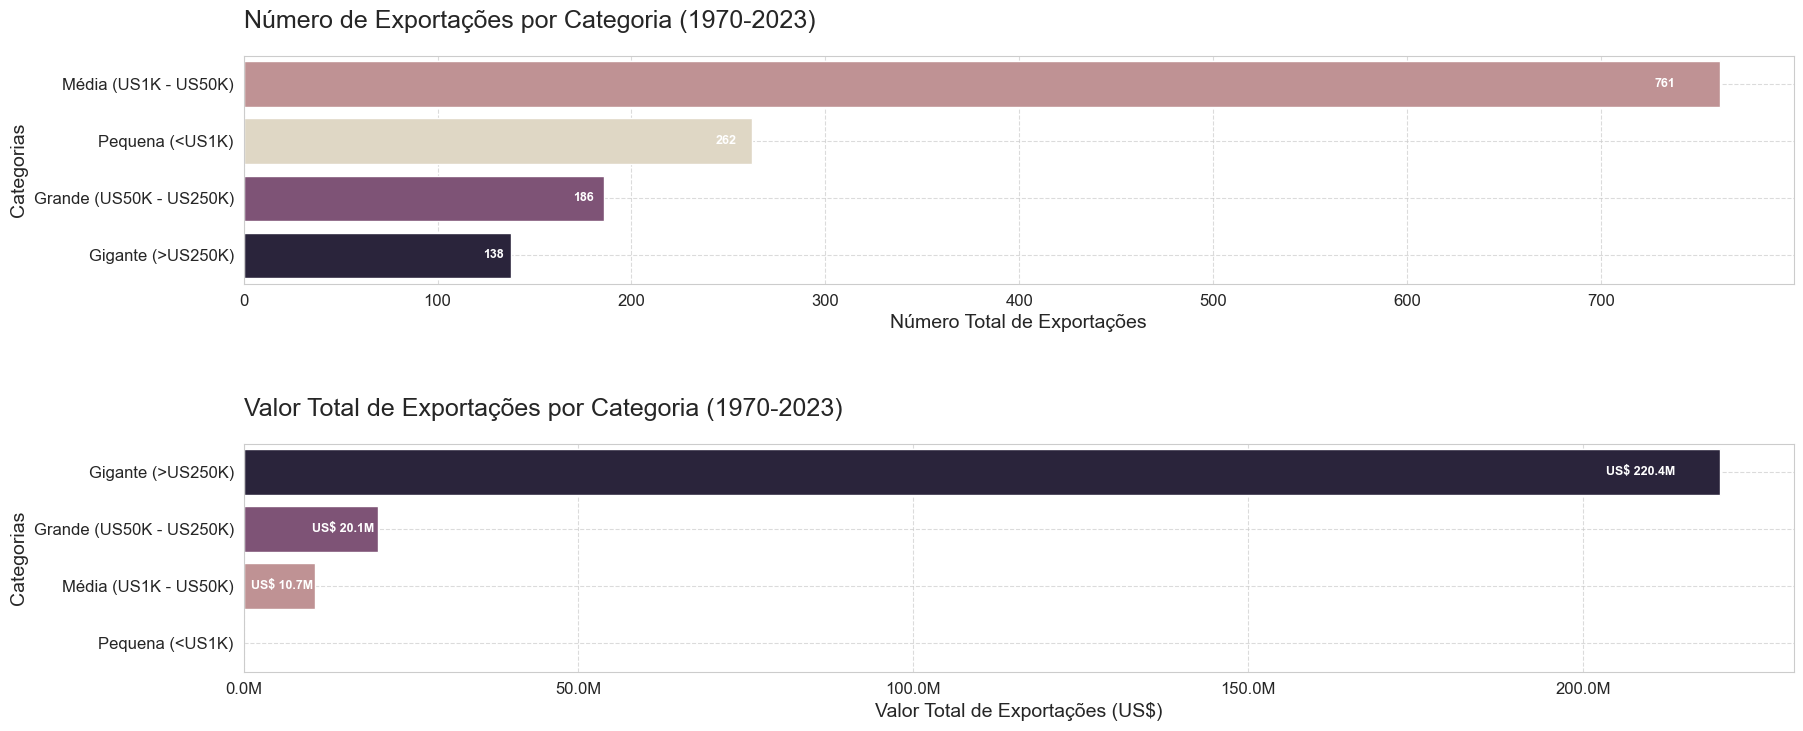

In [221]:
# Criando a figura que conterá os dois gráficos
fig, axes = plt.subplots(
    nrows = 2,
    ncols = 1,
    figsize=(20, 8)
)

# Primeiro gráfico: Gráfico de barra (Número de Exportações)
df_categoria_exportacao = df_categoria_exportacao.sort_values(by='Numero_transacoes', ascending=False)
sns.barplot(data=df_categoria_exportacao, orient='horizontal', x="Numero_transacoes", y="Categoria_Transação_Export", palette=mapa_de_cores, ax=axes[0])
axes[0].set_title('Número de Exportações por Categoria (1970-2023)', fontsize=18, pad=20, loc='left')
axes[0].set_xlabel('Número Total de Exportações', fontsize=14)
axes[0].set_ylabel('Categorias', fontsize=14)

# Segundo gráfico: Gráfico de barra (Valor Total das Exportações)
df_categoria_exportacao = df_categoria_exportacao.sort_values(by='Valor_transacoes', ascending=False)
sns.barplot(data=df_categoria_exportacao, orient='horizontal', x="Valor_transacoes", y="Categoria_Transação_Export", palette=mapa_de_cores, ax=axes[1])
axes[1].set_title('Valor Total de Exportações por Categoria (1970-2023)', fontsize=18, pad=20, loc='left')
axes[1].set_xlabel('Valor Total de Exportações (US$)', fontsize=14)
axes[1].set_ylabel('Categorias', fontsize=14)
axes[1].xaxis.set_major_formatter(formatter)

for ax in axes.flat:
  ax.tick_params(axis='both', labelsize=12)
  ax.grid(linestyle='--', alpha=0.7, axis='both')

for i, ax in enumerate(axes.flatten()):
  for patch in ax.patches:
    # Pegando a largura da barra
    largura = patch.get_width()

    # Calculando a posição x e y para o texto
    x = patch.get_x() + largura*0.97
    y = patch.get_y() + patch.get_height()/2

    if i == 0: # Primeiro gráfico
      form = f'{largura:.0f}'
    else: # Segundo gráfico
      if largura > 1e6:
        form = f'US$ {largura/1e6:.1f}M'
      else:
        form = ''

    ax.text(
        x, y,
        form, # Texto a ser exibido
        ha='right', # Alinhamento vertical
        va='center', # Alinhamento horizontal
        fontsize=9, # Tamanho da fonte
        color='white', # Cor do texto
        fontweight='bold'
    )

plt.subplots_adjust(hspace=0.7)
plt.show()

- O gráfico de cima mostra o tamanho real das exportações: os pedidos médios dominam em quantidade.
- No de baixo fica claro que quem paga a conta da operação são as exportações gigantes: poucas, mas responsáveis pela maior parte do valor.
- As pequenas aparecem pouco no faturamento, sem gerar receita relevante.

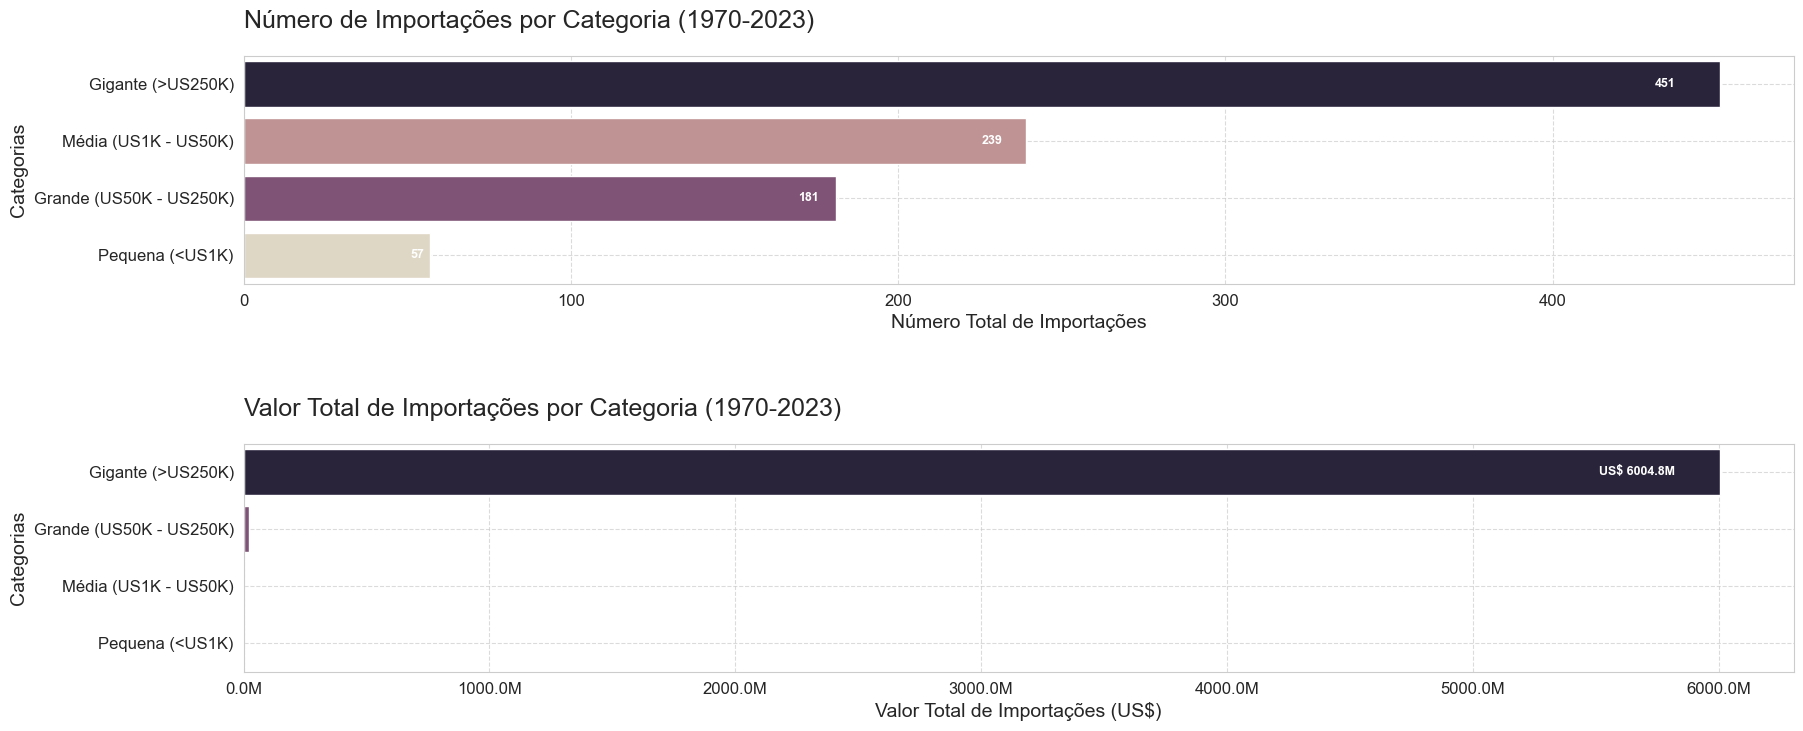

In [222]:

# Criando a figura que conterá os dois gráficos
fig, axes = plt.subplots(
    nrows = 2,
    ncols = 1,
    figsize=(20, 8)
)

# Primeiro gráfico: Gráfico de barra (Número de Importações)
df_categoria_importacao = df_categoria_importacao.sort_values(by='Numero_transacoes', ascending=False)
sns.barplot(data=df_categoria_importacao, orient='horizontal', x="Numero_transacoes", y="Categoria_Transação_Import", palette=mapa_de_cores, ax=axes[0])
axes[0].set_title('Número de Importações por Categoria (1970-2023)', fontsize=18, pad=20, loc='left')
axes[0].set_xlabel('Número Total de Importações', fontsize=14)
axes[0].set_ylabel('Categorias', fontsize=14)

# Segundo gráfico: Gráfico de barra (Valor Total das Importações)
df_categoria_importacao = df_categoria_importacao.sort_values(by='Valor_transacoes', ascending=False)
sns.barplot(data=df_categoria_importacao, orient='horizontal', x="Valor_transacoes", y="Categoria_Transação_Import", palette=mapa_de_cores, ax=axes[1])
axes[1].set_title('Valor Total de Importações por Categoria (1970-2023)', fontsize=18, pad=20, loc='left')
axes[1].set_xlabel('Valor Total de Importações (US$)', fontsize=14)
axes[1].set_ylabel('Categorias', fontsize=14)
axes[1].xaxis.set_major_formatter(formatter)

for ax in axes.flat:
  ax.tick_params(axis='both', labelsize=12)
  ax.grid(linestyle='--', alpha=0.7, axis='both')

for i, ax in enumerate(axes.flatten()):
  for patch in ax.patches:
    # Pegando a largura da barra
    largura = patch.get_width()


    # Calculando a posição x e y para o texto
    x = patch.get_x() + largura*0.97
    y = patch.get_y() + patch.get_height()/2

    if i == 0: # Primeiro gráfico
      form = f'{largura:.0f}'
    else: # Segundo gráfico
      if largura > 1e8:
        form = f'US$ {largura/1e6:.1f}M'
      else:
        form = ''

    ax.text(
        x, y,
        form, # Texto a ser exibido
        ha='right', # Alinhamento vertical
        va='center', # Alinhamento horizontal
        fontsize=9, # Tamanho da fonte
        color='white', # Cor do texto
        fontweight='bold'
    )

plt.subplots_adjust(hspace=0.7)
plt.show()

- Aqui o padrão muda: o que mais acontece são importações gigantes.
- Isso, atrelado ao alto valor pago por essas Importações, pode representar uma depência do mercado internacional.

##### Distribuição de Valor por Categoria de Transação

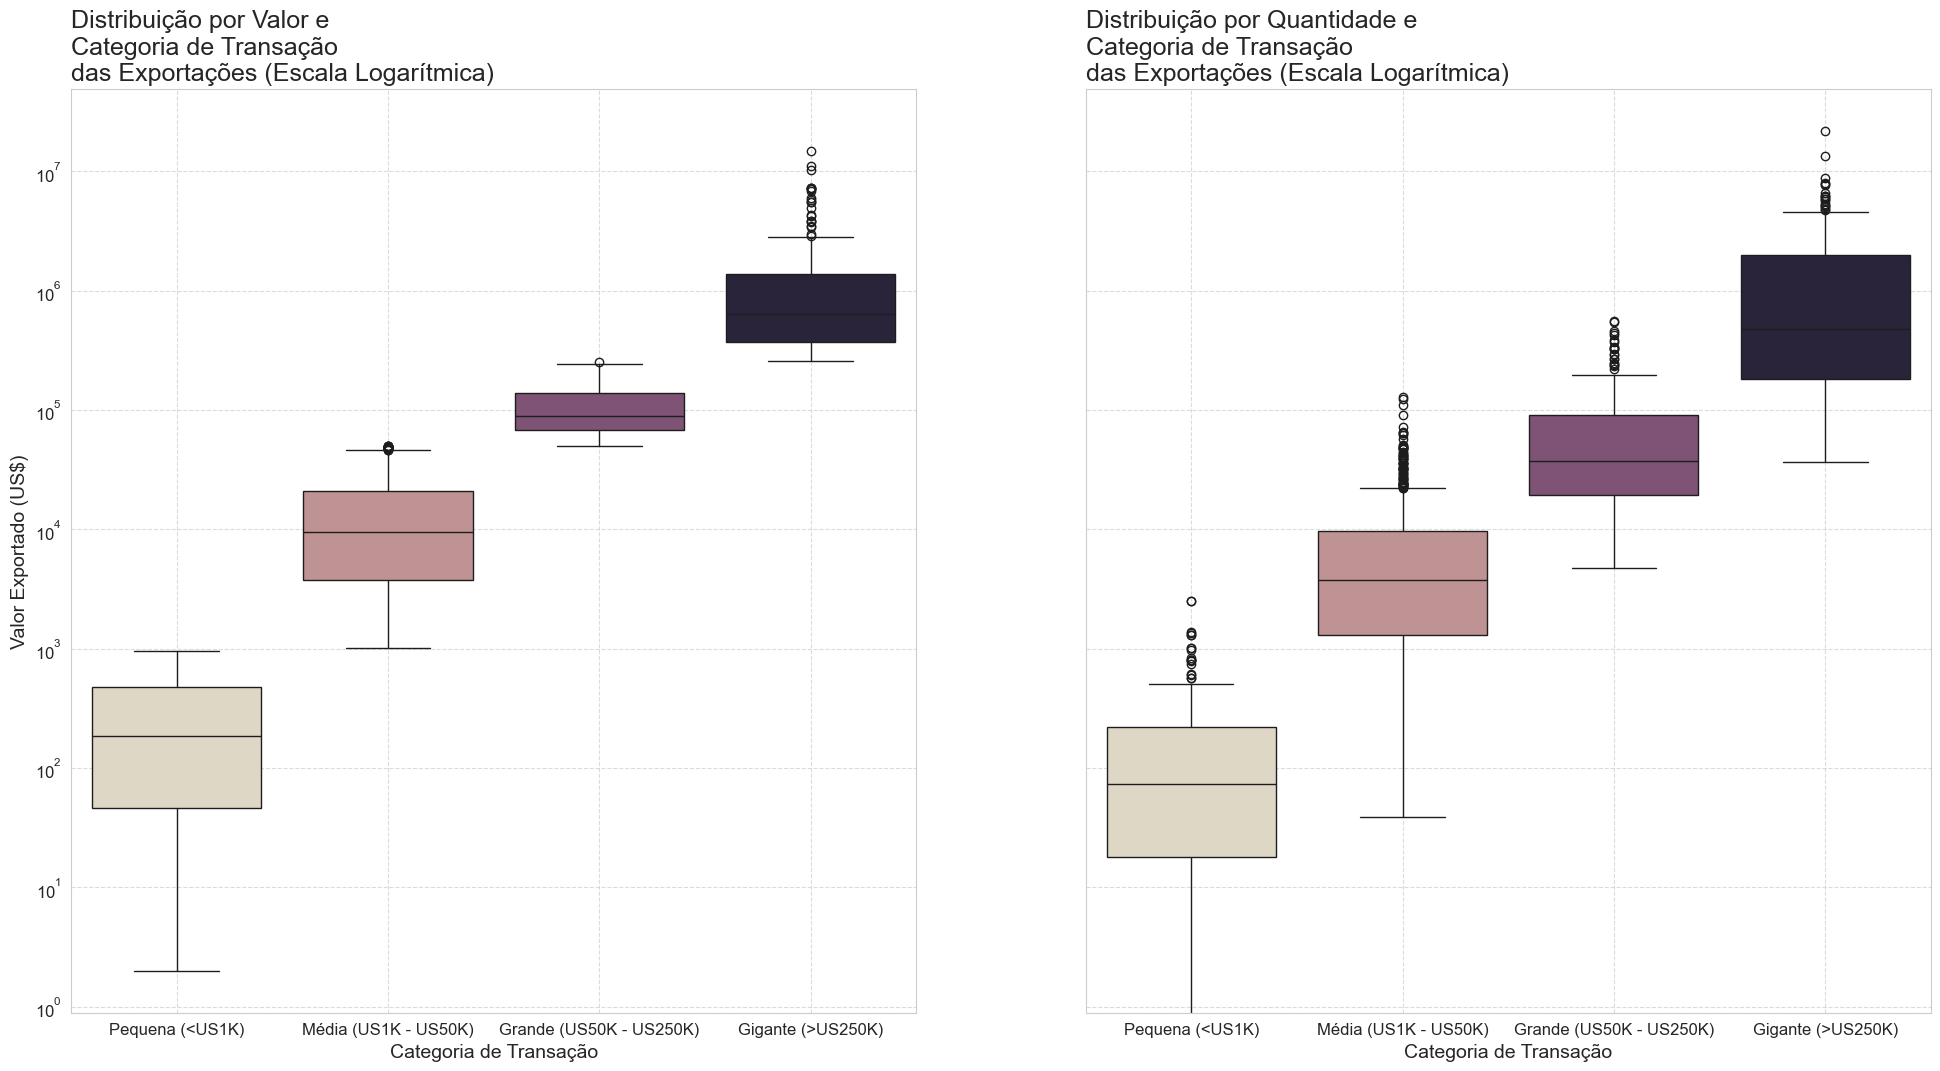

In [223]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(24,12),
    sharey=True
    )

ordem = ['Pequena (<US1K)', 'Média (US1K - US50K)', 'Grande (US50K - US250K)', 'Gigante (>US250K)']

sns.boxplot(x=df_completo_merge['Categoria_Transação_Export'],
            y=df_completo_merge['Valor_Export_(US$)'],
            order=ordem,
            palette=mapa_de_cores,
            ax=axes[0])

axes[0].set_title('Distribuição por Valor e\nCategoria de Transação\ndas Exportações (Escala Logarítmica)', fontsize=18, loc='left')
axes[0].set_xlabel('Categoria de Transação', fontsize=14)
axes[0].set_ylabel('Valor Exportado (US$)', fontsize=14)

sns.boxplot(x=df_completo_merge['Categoria_Transação_Export'],
            y=df_completo_merge['Quantidade_Export_(Litros)'],
            order=ordem,
            palette=mapa_de_cores,
            ax=axes[1])

axes[1].set_title('Distribuição por Quantidade e\nCategoria de Transação\ndas Exportações (Escala Logarítmica)', fontsize=18, loc='left')
axes[1].set_xlabel('Categoria de Transação', fontsize=14)
axes[1].set_ylabel('Quantidade Exportada (Litros)', fontsize=14)


for ax in axes.flatten():
  ax.tick_params(axis='both', labelsize=12)
  ax.grid(linestyle='--', alpha=0.7, axis='both')
  ax.set_yscale('log')

plt.subplots_adjust(wspace=0.2)
plt.show()

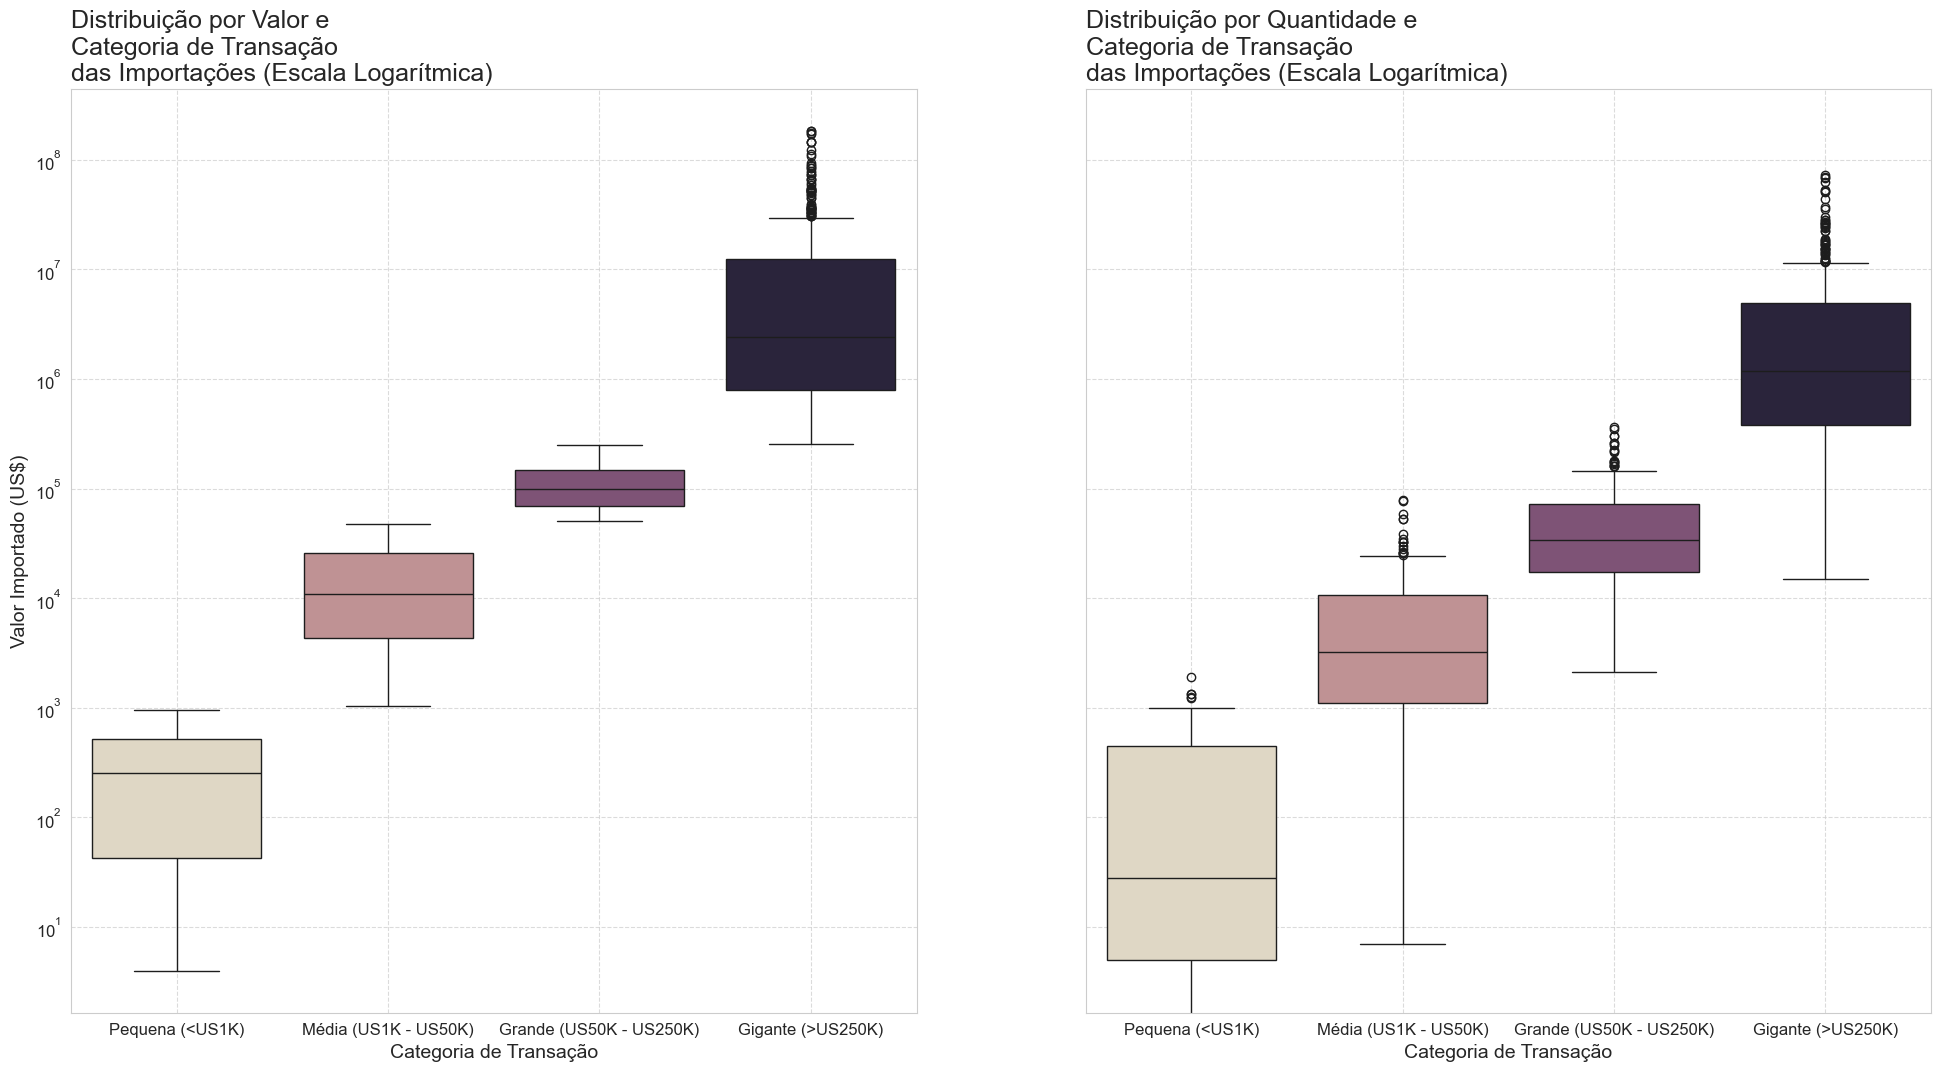

In [224]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(24,12),
    sharey=True
    )

ordem = ['Pequena (<US1K)', 'Média (US1K - US50K)', 'Grande (US50K - US250K)', 'Gigante (>US250K)']

sns.boxplot(x=df_completo_merge['Categoria_Transação_Import'],
            y=df_completo_merge['Valor_Import_(US$)'],
            order=ordem,
            palette=mapa_de_cores,
            ax=axes[0])

axes[0].set_title('Distribuição por Valor e\nCategoria de Transação\ndas Importações (Escala Logarítmica)', fontsize=18, loc='left')
axes[0].set_xlabel('Categoria de Transação', fontsize=14)
axes[0].set_ylabel('Valor Importado (US$)', fontsize=14)

sns.boxplot(x=df_completo_merge['Categoria_Transação_Import'],
            y=df_completo_merge['Quantidade_Import_(Litros)'],
            order=ordem,
            palette=mapa_de_cores,
            ax=axes[1])

axes[1].set_title('Distribuição por Quantidade e\nCategoria de Transação\ndas Importações (Escala Logarítmica)', fontsize=18, loc='left')
axes[1].set_xlabel('Categoria de Transação', fontsize=14)
axes[1].set_ylabel('Quantidade Importada (Litros)', fontsize=14)


for ax in axes.flatten():
  ax.tick_params(axis='both', labelsize=12)
  ax.grid(linestyle='--', alpha=0.7, axis='both')
  ax.set_yscale('log')

plt.subplots_adjust(wspace=0.2)
plt.show()

##### Relação de Valor x Quantidade, Segmentado por Categoria

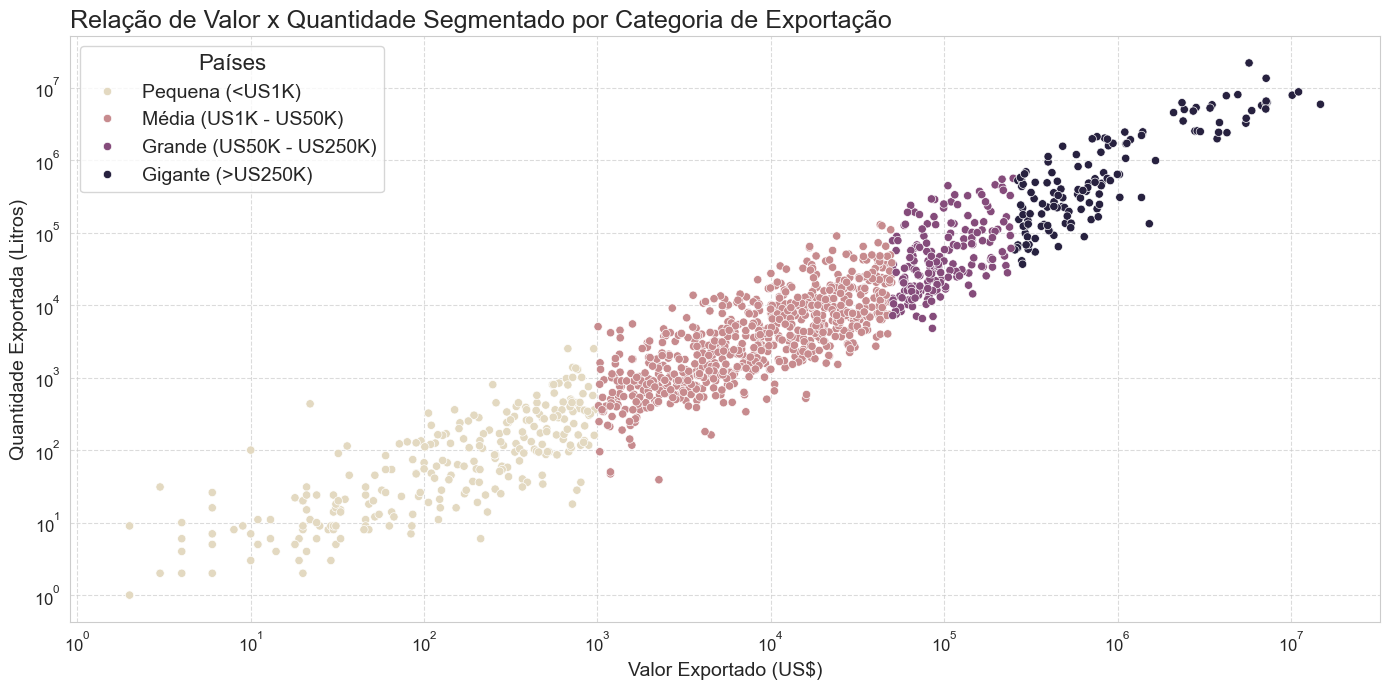

In [225]:
plt.figure(figsize=(14,7))

ordem = ['Pequena (<US1K)', 'Média (US1K - US50K)', 'Grande (US50K - US250K)', 'Gigante (>US250K)']

sns.scatterplot(x=df_completo_merge_positivo_exportacao['Valor_Export_(US$)'],
                y=df_completo_merge_positivo_exportacao['Quantidade_Export_(Litros)'],
                hue=df_completo_merge_positivo_exportacao['Categoria_Transação_Export'],
                palette=mapa_de_cores)

plt.title('Relação de Valor x Quantidade Segmentado por Categoria de Exportação', fontsize=18, loc='left')
plt.xlabel('Valor Exportado (US$)', fontsize=14)
plt.ylabel('Quantidade Exportada (Litros)', fontsize=14)
plt.tick_params(axis='both', labelsize=12)

plt.grid(linestyle='--', alpha=0.7, axis='both')
plt.legend(title='Países', title_fontsize=16, fontsize=14)

plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.show()

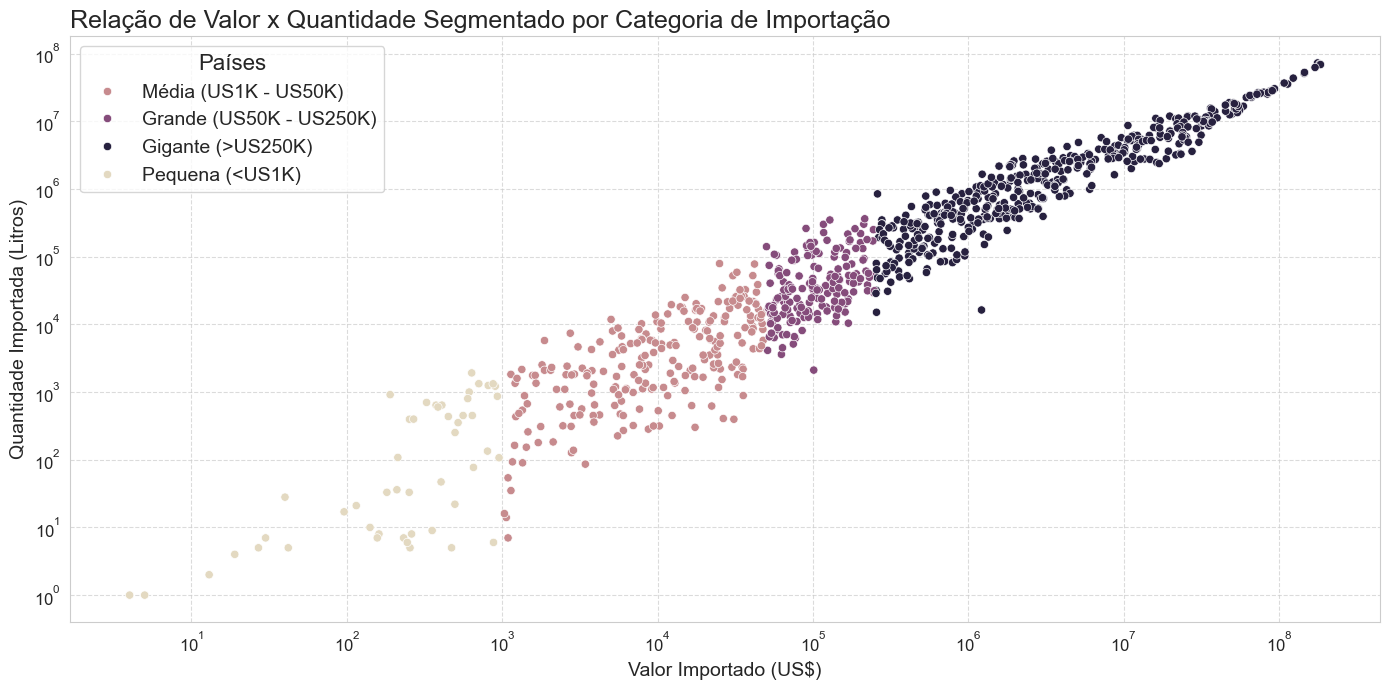

In [226]:
plt.figure(figsize=(14,7))

ordem = ['Pequena (<US1K)', 'Média (US1K - US50K)', 'Grande (US50K - US250K)', 'Gigante (>US250K)']

sns.scatterplot(

  x=df_completo_merge_positivo_importacao['Valor_Import_(US$)'],
                y=df_completo_merge_positivo_importacao['Quantidade_Import_(Litros)'],
                hue=df_completo_merge_positivo_importacao['Categoria_Transação_Import'],
                palette=mapa_de_cores)

plt.title('Relação de Valor x Quantidade Segmentado por Categoria de Importação', fontsize=18, loc='left')
plt.xlabel('Valor Importado (US$)', fontsize=14)
plt.ylabel('Quantidade Importada (Litros)', fontsize=14)
plt.tick_params(axis='both', labelsize=12)

plt.grid(linestyle='--', alpha=0.7, axis='both')
plt.legend(title='Países', title_fontsize=16, fontsize=14)

plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.show()

- Os boxplots e o gráfico de dispersão validam que a categorização das transações foi bem utilizada. A mediana e o intervalo geral, caixa, de cada categoria aumentam progressivamente de 'Pequena' para 'Gigante' em ambos os gráficos, sem sobreposições aparente.
- As transações, 'Valor', 'Pequenas' são muito mais consistentes nas Exportações: sem a presença de possíveis outliers. Por outro lado, as 'Gigantes' não são apenas maiores, mas também muito mais variadas entre si, cobrindo uma faixa de valores muito mais ampla do que as demais categorias.
- Nas Importações acontece exatamente o contrário: transações 'Pequenas' são muito mais variadas, diferentemente das 'Gigantes'.
- Nas Exportações, as demais categorias também apresentam outliers, mas eles são mais numerosos e distantes na categoria 'Gigante' indicando que, mesmo dentro do segmento de transações de maior valor ou volume, existem negócios muito acima da média que superam uma transação 'Gigante' típica. Esses representam os negócios mais significativos, como já foi falado, e que devem receber uma atenção especial por representar boa parte do faturamento da empresa.
- Nota-se também a semelhança estrutural entre os dois gráficos de boxplots: O padrão de medianas, dispersão crescente e até mesmo os outliers são bem semelhantes.

##### Perfil de Compra dos 15 Maiores Países: Compradores (Exportado do Brasil) e Vendedores (Importados Para o Brasil)


In [227]:
top_15 = list(top_15_paises['País'].values)
perfil_compra_exportacao = df_completo_merge_positivo_exportacao[df_completo_merge_positivo_exportacao['País'].isin(top_15)].groupby('País')['Categoria_Transação_Export'].value_counts().reset_index()

In [228]:
ordem = ['Pequena (<US1K)', 'Média (US1K - US50K)', 'Grande (US50K - US250K)', 'Gigante (>US250K)']

In [229]:
perfil_compra_exportacao = perfil_compra_exportacao[perfil_compra_exportacao['Categoria_Transação_Export'].isin(ordem)]
perfil_compra_exportacao.head()

País Categoria_Transação_Export  count
0  Alemanha       Média (US1K - US50K)     20
1  Alemanha    Grande (US50K - US250K)      8
2  Alemanha          Gigante (>US250K)      4
3  Alemanha            Pequena (<US1K)      4
4    Angola       Média (US1K - US50K)     21

In [230]:
perfil_compra_exportacao['total'] = perfil_compra_exportacao.groupby('País')['count'].transform('sum')
perfil_compra_exportacao.head()

País Categoria_Transação_Export  count  total
0  Alemanha       Média (US1K - US50K)     20     36
1  Alemanha    Grande (US50K - US250K)      8     36
2  Alemanha          Gigante (>US250K)      4     36
3  Alemanha            Pequena (<US1K)      4     36
4    Angola       Média (US1K - US50K)     21     37

In [231]:
perfil_compra_exportacao = perfil_compra_exportacao.sort_values(by='total', ascending=False)
perfil_compra_exportacao.head()

País Categoria_Transação_Export  count  total
22  Estados Unidos       Média (US1K - US50K)     13     54
31        Paraguai          Gigante (>US250K)     46     54
21  Estados Unidos          Gigante (>US250K)     29     54
33        Paraguai       Média (US1K - US50K)      1     54
32        Paraguai    Grande (US50K - US250K)      7     54

In [232]:
perfil_compra_exportacao['percentual'] = (perfil_compra_exportacao['count']/perfil_compra_exportacao['total'])*100
perfil_compra_exportacao.head()

País Categoria_Transação_Export  count  total  percentual
22  Estados Unidos       Média (US1K - US50K)     13     54   24.074074
31        Paraguai          Gigante (>US250K)     46     54   85.185185
21  Estados Unidos          Gigante (>US250K)     29     54   53.703704
33        Paraguai       Média (US1K - US50K)      1     54    1.851852
32        Paraguai    Grande (US50K - US250K)      7     54   12.962963

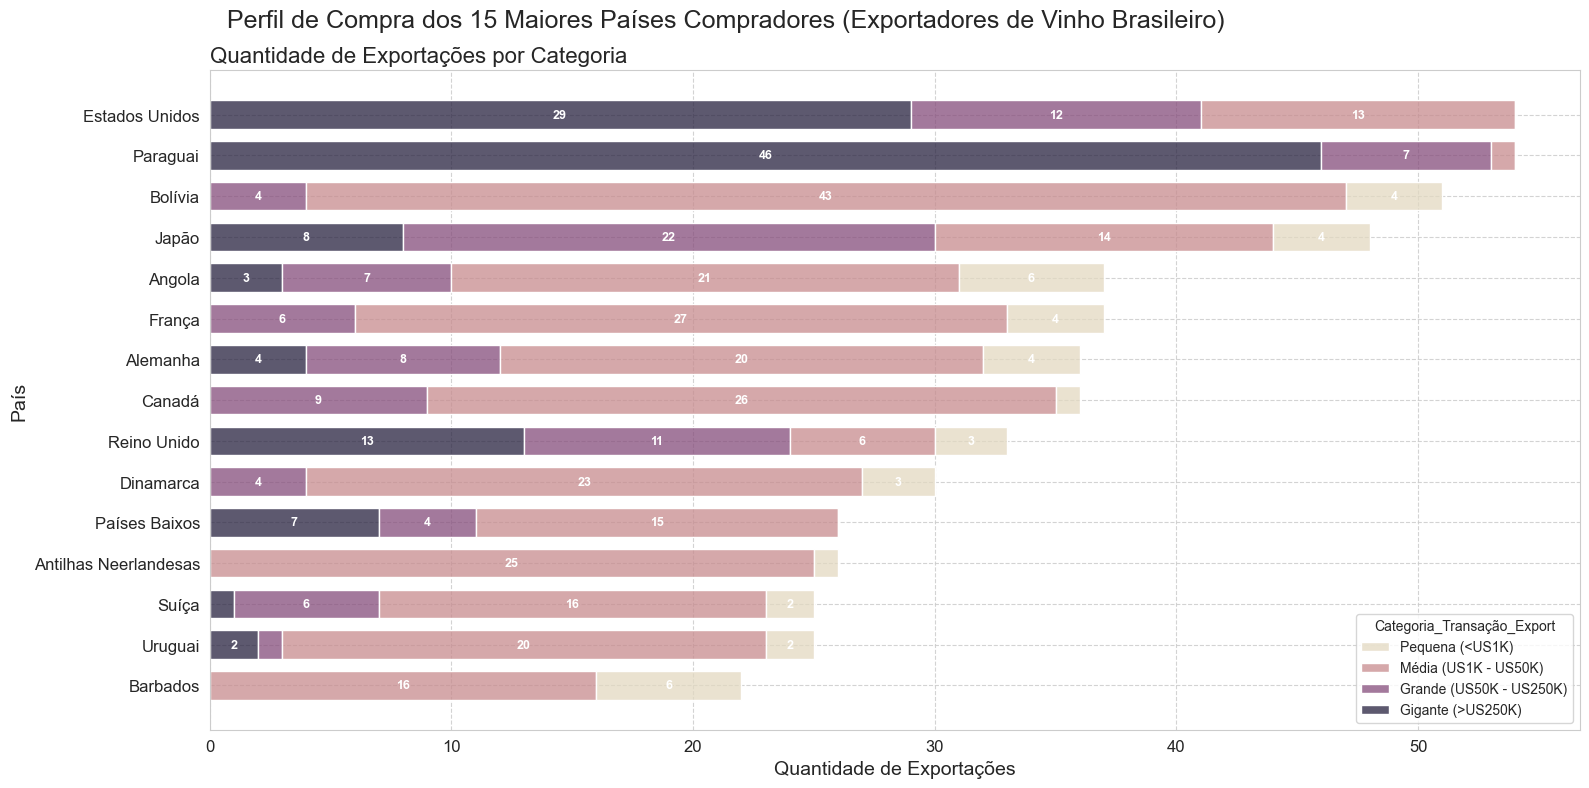

In [233]:
fig, ax= plt.subplots(figsize=(16,8))

sns.histplot(data=perfil_compra_exportacao,
            weights='count',
            multiple='stack',
            y='País',
            hue='Categoria_Transação_Export',
            hue_order=ordem,
            palette=mapa_de_cores,
            shrink=0.7,
            ax=ax)


ax.set_xlabel('Quantidade de Exportações', fontsize=14)
ax.set_ylabel('País', fontsize=14)
fig.suptitle('Perfil de Compra dos 15 Maiores Países Compradores (Exportadores de Vinho Brasileiro)', fontsize=18, ha='left', x=0.145)
ax.set_title('Quantidade de Exportações por Categoria', fontsize=16, loc='left')

ax.tick_params(axis='both', labelsize=12)
ax.grid(linestyle='--', alpha=0.85, axis='both')

for patch in ax.patches:
  # Pegando a largura da barra
  largura = patch.get_width()

  # Condição para não exibir o rótulo se a barra for muito pequena
  if largura > 1.5:
    # Calculando a posição x e y para o texto
    x = patch.get_x() + largura/2
    y = patch.get_y() + patch.get_height()/2

    ax.text(
        x, y,
        f'{largura:.0f}', # Texto a ser exibido
        ha='center', # Alinhamento vertical
        va='center', # Alinhamento horizontal
        fontsize=9, # Tamanho da fonte
        color='white', # Cor do texto
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

- Nos líderes em transações, Paraguai e Estados Unidos, é possível destacar a diferença no perfil de compra entre eles:
  - O Paraguai possui, em sua grande maioria, transações gigantes. Isso sugere uma parceria comercial focada em negócios de altíssimo valor e volume.
  - O Estados Unidos possui um perfil mais diversificado: mesmo possuindo muitas transações gigantes, há uma boa quantidade de transações médias e grandes, sugerindo uma relação comercial mais ampla e variada, abrangendo diferentes escalas de negócio.
- Potências como França, Alemanha e Canadá, que possuem uma quantidade de transações bem relevante, tem o perfil dominado por transações médias.   

In [234]:
top_15_importadores = df_completo_merge_positivo_importacao['País'].value_counts().nlargest(15).reset_index()

In [235]:
top_15_import = list(top_15_importadores['País'].values)
perfil_compra_importacao = df_completo_merge_positivo_importacao[df_completo_merge_positivo_importacao['País'].isin(top_15_import)].groupby('País')['Categoria_Transação_Import'].value_counts().reset_index()
perfil_compra_importacao = perfil_compra_importacao[perfil_compra_importacao['Categoria_Transação_Import'].isin(ordem)]
perfil_compra_importacao['total'] = perfil_compra_importacao.groupby('País')['count'].transform('sum')
perfil_compra_importacao = perfil_compra_importacao.sort_values(by='total', ascending=False)
perfil_compra_importacao['percentual'] = (perfil_compra_importacao['count']/perfil_compra_importacao['total'])*100
perfil_compra_importacao.head()

País Categoria_Transação_Import  count  total  percentual
0   Alemanha          Gigante (>US250K)     46     54   85.185185
1   Alemanha    Grande (US50K - US250K)      6     54   11.111111
2   Alemanha       Média (US1K - US50K)      2     54    3.703704
3  Argentina          Gigante (>US250K)     42     54   77.777778
4  Argentina    Grande (US50K - US250K)     10     54   18.518519

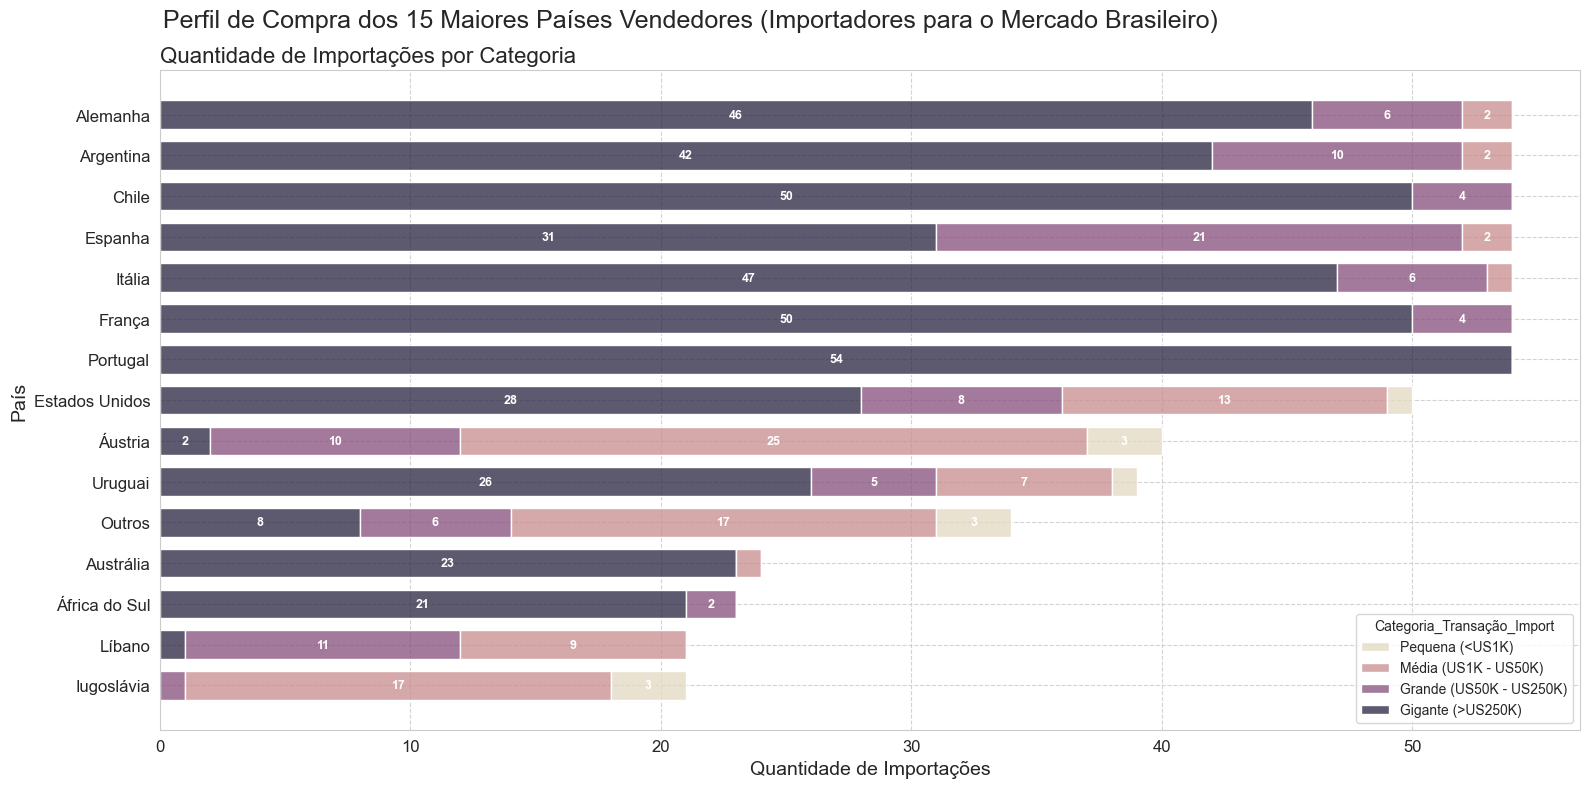

In [236]:
fig, ax= plt.subplots(figsize=(16,8))

sns.histplot(data=perfil_compra_importacao,
            weights='count',
            multiple='stack',
            y='País',
            hue='Categoria_Transação_Import',
            hue_order=ordem,
            palette=mapa_de_cores,
            shrink=0.7,
            ax=ax)


ax.set_xlabel('Quantidade de Importações', fontsize=14)
ax.set_ylabel('País', fontsize=14)
fig.suptitle('Perfil de Compra dos 15 Maiores Países Vendedores (Importadores para o Mercado Brasileiro)', fontsize=18, ha='left', x=0.105)
ax.set_title('Quantidade de Importações por Categoria', fontsize=16, loc='left')

ax.tick_params(axis='both', labelsize=12)
ax.grid(linestyle='--', alpha=0.85, axis='both')

for patch in ax.patches:
  # Pegando a largura da barra
  largura = patch.get_width()

  # Condição para não exibir o rótulo se a barra for muito pequena
  if largura > 1.5:
    # Calculando a posição x e y para o texto
    x = patch.get_x() + largura/2
    y = patch.get_y() + patch.get_height()/2

    ax.text(
        x, y,
        f'{largura:.0f}', # Texto a ser exibido
        ha='center', # Alinhamento vertical
        va='center', # Alinhamento horizontal
        fontsize=9, # Tamanho da fonte
        color='white', # Cor do texto
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

- Alemanha, Argentina, Chile, Itália, França, Portugal, seguido de Espanha, Estados Unidos, Uruguai, Austrália e África do Sul, possuem transações majoritariamente 'gigantes', o que deixa evidente uma dependência de pedidos de alto valor.
- Pouquíssimas transações 'pequenas', o restante é composto basicamente por transações 'médias' e 'grandes'.

##### Preço Médio do Litro por Categoria de Exportação e Importação

In [237]:
Preco_medio_litro_exportacao = df_completo_merge.groupby('Categoria_Transação_Export')['Preço_por_Litro_Export'].mean().reset_index()

In [238]:
Preco_medio_litro_exportacao

Categoria_Transação_Export  Preço_por_Litro_Export
0          Gigante (>US250K)                1.999443
1    Grande (US50K - US250K)                3.121396
2          Inexistente (US0)                0.000000
3       Média (US1K - US50K)                3.486201
4            Pequena (<US1K)                3.452669

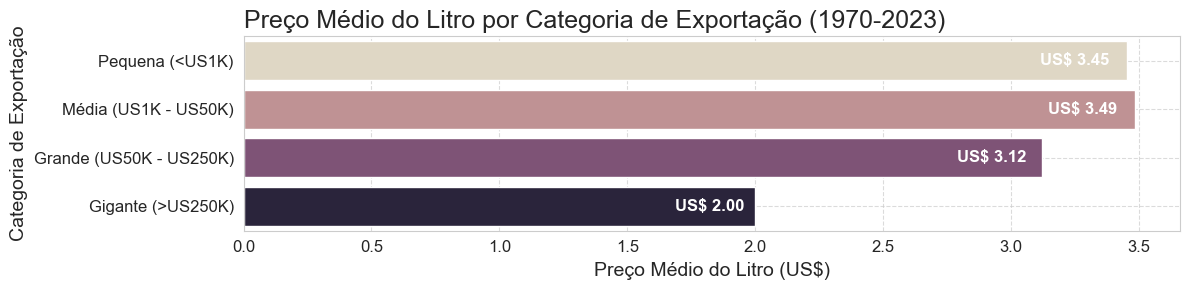

In [239]:
fig, ax = plt.subplots(figsize=(12,3))

ordem = ['Pequena (<US1K)', 'Média (US1K - US50K)', 'Grande (US50K - US250K)', 'Gigante (>US250K)']

sns.barplot(orient='horizontal',
            x=Preco_medio_litro_exportacao['Preço_por_Litro_Export'],
            y=Preco_medio_litro_exportacao['Categoria_Transação_Export'],
            order=ordem,
            palette=mapa_de_cores,
            ax=ax)

ax.set_title('Preço Médio do Litro por Categoria de Exportação (1970-2023)', fontsize=18, loc='left')
ax.set_xlabel('Preço Médio do Litro (US$)', fontsize=14)
ax.set_ylabel('Categoria de Exportação', fontsize=14)

ax.tick_params(axis='both', labelsize=12)
ax.grid(linestyle='--', alpha=0.7, axis='both')

for patch in ax.patches:
  # Pegando a largura da barra
  largura = patch.get_width()

  x = patch.get_x() + largura*0.98
  y = patch.get_y() + patch.get_height()/2

  ax.text(
      x, y,
      f'US$ {largura:.2f}', # Texto a ser exibido
      ha='right', # Alinhamento
      va='center', # Alinhamento
      fontsize=12, # Tamanho da fonte
      color='white', # Cor do texto
      fontweight='bold'
  )

plt.tight_layout()
plt.show()

- É possível notar uma queda significativa no preço médio por litro para as categorias grande e gigantes. A categoria gigante tem o menor preço unitário, bem abaixo dos demais, em torno de US$ 2.00.
- As transações de menor porte, pequenas e médias, possuem um preço médio por litro consideravelmente alto, sugerindo que pode se tratar de produtos de maior qualidade e valor de produto agregado, vinhos finos.
- A diferença de preço entre uma transação média e uma gigante é de aproximadamente 40%, o que pode ser uma estratégia de precificação que oferece descontos sigficativos por volumes, incentivando compras em larga escala.
- Embora o preço médio para transações gigantes seja bem menor que as demais categorias, são essas transações que geram a maior parte do faturamento da empresa.

In [240]:
Preco_medio_litro_importacao = df_completo_merge.groupby('Categoria_Transação_Import')['Preço_por_Litro_Import'].mean().reset_index()

In [241]:
Preco_medio_litro_importacao

Categoria_Transação_Import  Preço_por_Litro_Import
0          Gigante (>US250K)                3.182492
1    Grande (US50K - US250K)                4.338417
2          Inexistente (US0)                0.000000
3       Média (US1K - US50K)                7.822560
4            Pequena (<US1K)               11.178940

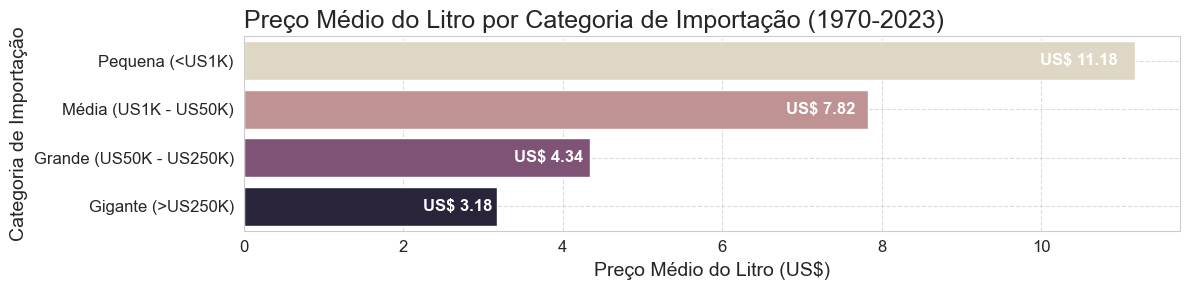

In [242]:
fig, ax = plt.subplots(figsize=(12,3))

ordem = ['Pequena (<US1K)', 'Média (US1K - US50K)', 'Grande (US50K - US250K)', 'Gigante (>US250K)']

sns.barplot(orient='horizontal',
            x=Preco_medio_litro_importacao['Preço_por_Litro_Import'],
            y=Preco_medio_litro_importacao['Categoria_Transação_Import'],
            order=ordem,
            palette=mapa_de_cores,
            ax=ax)

ax.set_title('Preço Médio do Litro por Categoria de Importação (1970-2023)', fontsize=18, loc='left')
ax.set_xlabel('Preço Médio do Litro (US$)', fontsize=14)
ax.set_ylabel('Categoria de Importação', fontsize=14)

ax.tick_params(axis='both', labelsize=12)
ax.grid(linestyle='--', alpha=0.7, axis='both')

for patch in ax.patches:
  # Pegando a largura da barra
  largura = patch.get_width()

  x = patch.get_x() + largura*0.98
  y = patch.get_y() + patch.get_height()/2

  ax.text(
      x, y,
      f'US$ {largura:.2f}', # Texto a ser exibido
      ha='right', # Alinhamento
      va='center', # Alinhamento
      fontsize=12, # Tamanho da fonte
      color='white', # Cor do texto
      fontweight='bold'
  )

plt.tight_layout()
plt.show()

- A queda do preço pago pelo litro é mais forte: pequenas pagam US 11/L e gigantes US 3,2/L.
- Em qualquer faixa, importar sai mais caro do que exportar.

15 Maiores Países por Preço Médio por Litro de Exportação e Importacão

In [243]:
top_15_Preco_medio_exportacao = df_completo_merge.groupby('País')['Preço_por_Litro_Export'].mean().nlargest(15).reset_index()

In [244]:
top_15_Preco_medio_exportacao.head()

País  Preço_por_Litro_Export
0             Suíça                2.906941
1         Dinamarca                2.515647
2            Canadá                2.416341
3        Luxemburgo                2.389579
4  República Tcheca                2.372635

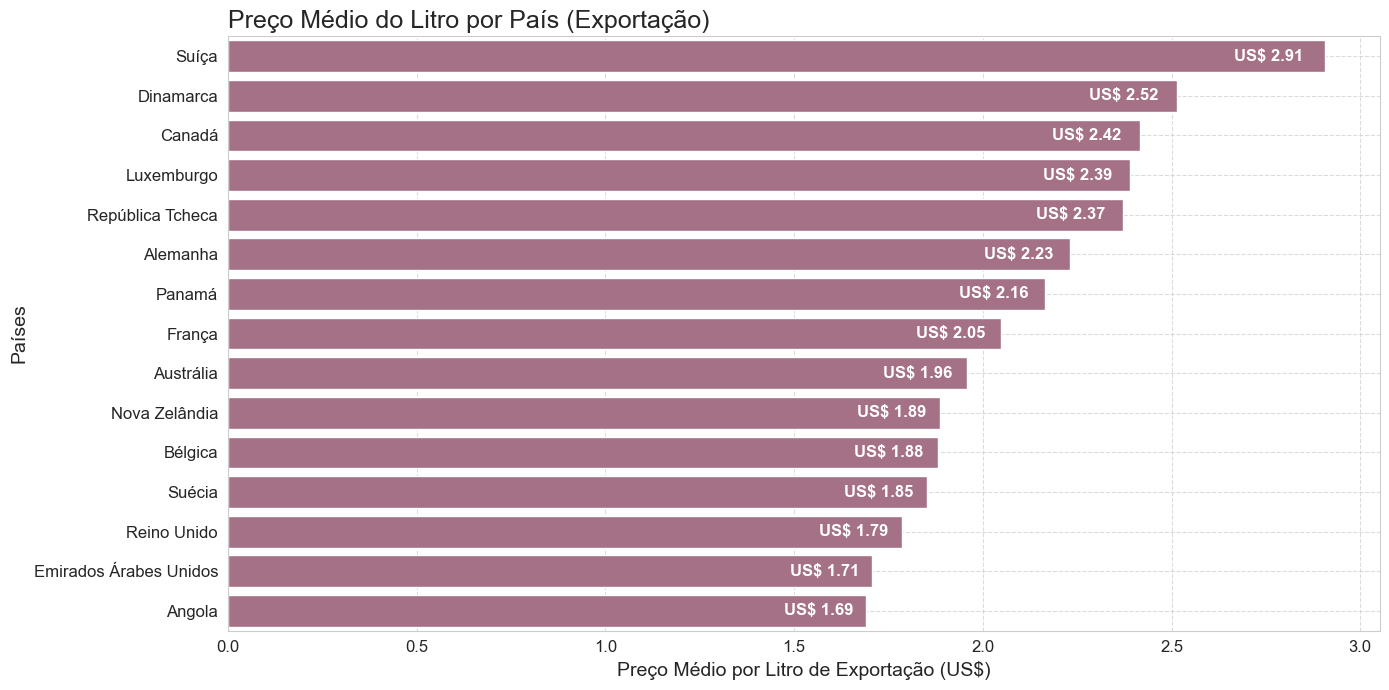

In [245]:
fig, ax = plt.subplots(figsize=(14,7))

sns.barplot(orient='horizontal',
            x=top_15_Preco_medio_exportacao['Preço_por_Litro_Export'],
            y=top_15_Preco_medio_exportacao['País'],
            color=cores[7], ax=ax)

ax.set_title('Preço Médio do Litro por País (Exportação)', fontsize=18, loc='left')
ax.set_xlabel('Preço Médio por Litro de Exportação (US$)', fontsize=14)
ax.set_ylabel('Países', fontsize=14)

ax.tick_params(axis='both', labelsize=12)
ax.grid(linestyle='--', alpha=0.7, axis='both')

for patch in ax.patches:
  # Pegando a largura da barra
  largura = patch.get_width()

  x = patch.get_x() + largura*0.98
  y = patch.get_y() + patch.get_height()/2

  ax.text(
      x, y,
      f'US$ {largura:.2f}', # Texto a ser exibido
      ha='right', # Alinhamento
      va='center', # Alinhamento
      fontsize=12, # Tamanho da fonte
      color='white', # Cor do texto
      fontweight='bold'
  )

plt.tight_layout()
plt.show()

- A lista é dominada por países europeus desenvolvidos: Suíça (US$ 2.91/L) e Dinamarca (US$$ 2.52/L) se destacam como os mercados que pagam o preço médio mais alto pelo produto. Luxemburgo, República Tcheca e Alemanha também figuram no topo.
- Isso sugere que estes são mercados de alto valor agregado: os clientes destes países podem estra comprando vinhos de maior qualidade, ou só representam economias com maior poder de compra onde é possível praticar preços mais altos.
- Se compararmos com a análise de quantidade de transações, como foi visto anteriormente, países como Estados Unidos e Paraguai não aparecem na lista. Isso revela uma clara segmentação de mercado da empresa, com dois perfis bem claros:
  - Compradores de Volume: Países que realizam muitas transações e pagam um preço médio por litro significativamente menor;
  - Compradores de Valor: Países que podem não comprar com a mesma frequência, mas pagam um preço médio muito mais alto.
- É possível notar também a presença de países fora da continente Europeu: Canadá, Panamá e Austrália aparecem em uma boa posição na lista, mostrando que o mercado de alto valor não é de exclusividade Européia.
- A empresa tem, ou pode ter, uma estratégia de precificação difrenciada para mercados distintos, maximizando a receita tanto em mercados sensíveis a preço, com alto volume, quanto a mercados dispostos a pagar por produtos mais caros.
- Os países no topo da lista podem ser alvos ideais para lançamento de vinhos mais refinados, direcionando campnahas de marketing focadas em qualidade com o intuito de aumentar as vendas e maximizar a margem de lucro da empresa.  

In [246]:
top_15_Preco_medio_importacao = df_completo_merge.groupby('País')['Preço_por_Litro_Import'].mean().nlargest(15).reset_index()

In [247]:
top_15_Preco_medio_importacao.head()

País  Preço_por_Litro_Import
0  Reino Unido                7.886306
1       Canada                4.760770
2      Áustria                4.355179
3      Bélgica                3.634485
4        Suíça                3.532809

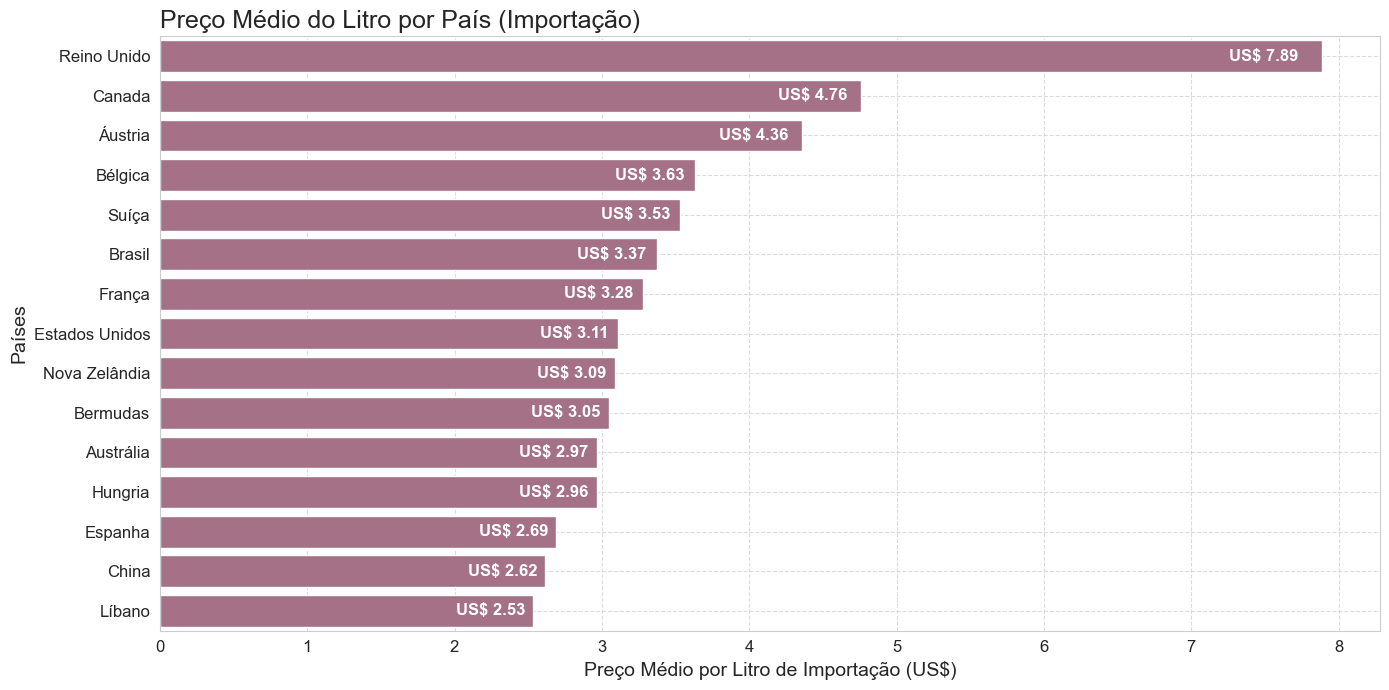

In [248]:
fig, ax = plt.subplots(figsize=(14,7))

sns.barplot(orient='horizontal',
            x=top_15_Preco_medio_importacao['Preço_por_Litro_Import'],
            y=top_15_Preco_medio_importacao['País'],
            color=cores[7], ax=ax)

ax.set_title('Preço Médio do Litro por País (Importação)', fontsize=18, loc='left')
ax.set_xlabel('Preço Médio por Litro de Importação (US$)', fontsize=14)
ax.set_ylabel('Países', fontsize=14)

ax.tick_params(axis='both', labelsize=12)
ax.grid(linestyle='--', alpha=0.7, axis='both')

for patch in ax.patches:
  # Pegando a largura da barra
  largura = patch.get_width()

  x = patch.get_x() + largura*0.98
  y = patch.get_y() + patch.get_height()/2

  ax.text(
      x, y,
      f'US$ {largura:.2f}', # Texto a ser exibido
      ha='right', # Alinhamento
      va='center', # Alinhamento
      fontsize=12, # Tamanho da fonte
      color='white', # Cor do texto
      fontweight='bold'
  )

plt.tight_layout()
plt.show()

- Reino Unido é um outlier (7,89/L); depois Canadá e Áustria (4,8 – 4,4/L). O bloco seguinte (Bélgica, Suíça, França, EUA) fica em (3 – 3,6/L).
- O nível de preço importado é, em geral, maior que o exportado — consistente com os painéis anteriores.
- O Brasil aparece na lista por uma questão de re-importação: produtos exportados pelo Brasil mas que, por alguma razão, foi retornado.

Maiores Países por Quantidade Total e Média de Exportação

In [249]:
top_15_quantidade_total_exportacao = df_completo_merge.groupby('País')['Quantidade_Export_(Litros)'].sum().nlargest(15).reset_index()

In [250]:
top_15_quantidade_total_exportacao.head()

País  Quantidade_Export_(Litros)
0        Paraguai            119324125.000000
1  Estados Unidos             55488797.000000
2          Rússia             39808014.000000
3           Japão              8221878.000000
4          Angola              5819857.000000

In [251]:
top_15_quantidade_media_exportacao = df_completo_merge_positivo_exportacao.groupby('País')['Quantidade_Export_(Litros)'].mean().nlargest(15).reset_index()

In [252]:
top_15_quantidade_media_exportacao.head()

País  Quantidade_Export_(Litros)
0          Rússia              3062154.923077
1        Paraguai              2209706.018519
2  Estados Unidos              1027570.314815
3         Espanha               201518.300000
4           Japão               171289.125000

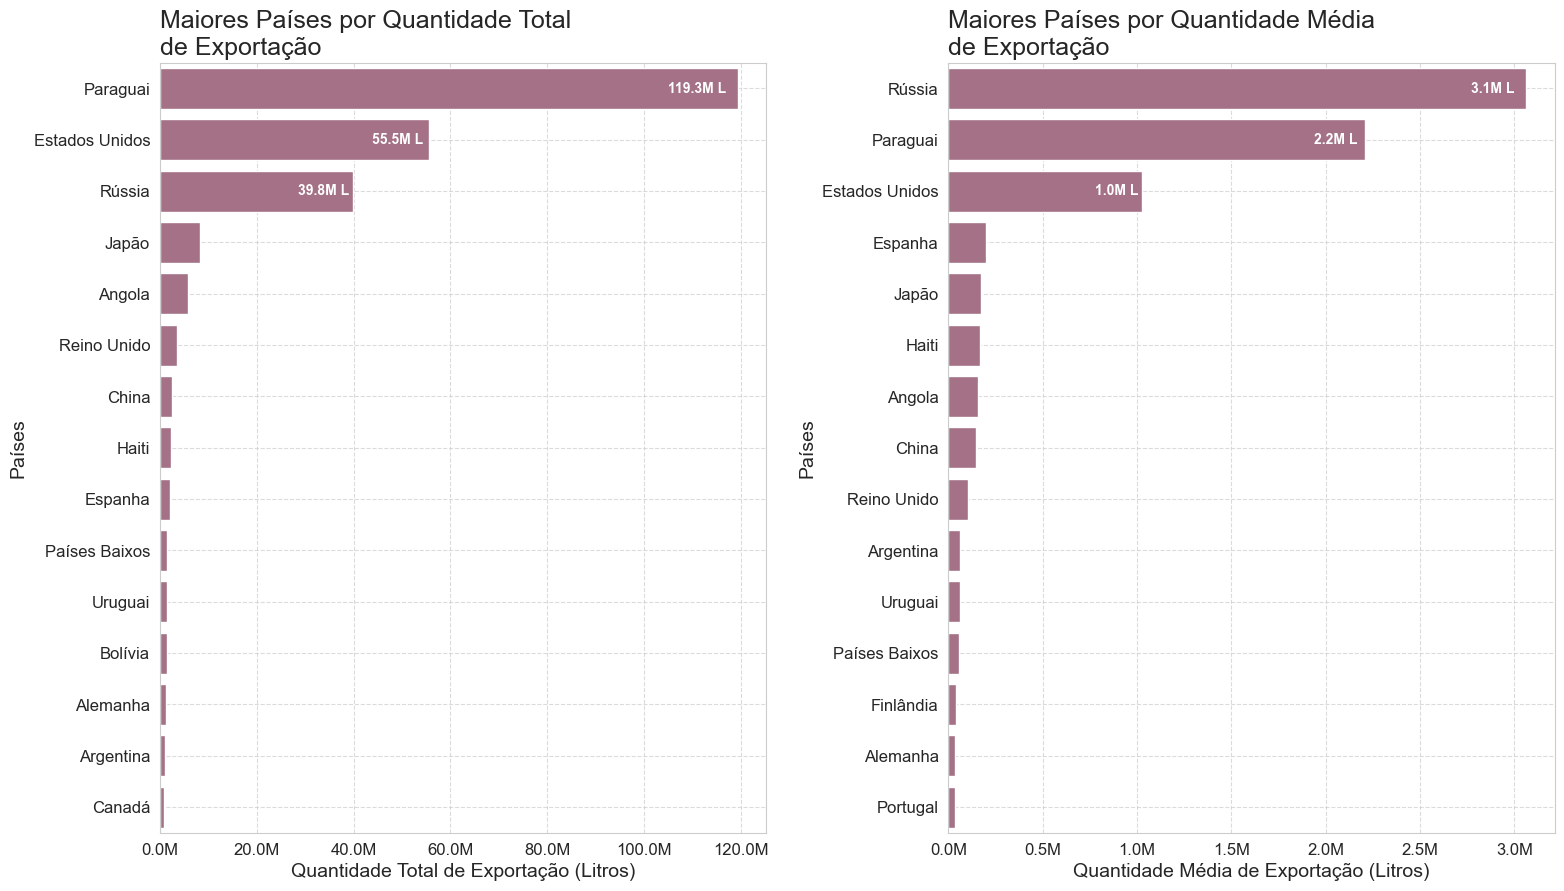

In [253]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(18,10))

# Primeiro Gráfico (Valor Total)
sns.barplot(orient='horizontal',
            x=top_15_quantidade_total_exportacao['Quantidade_Export_(Litros)'],
            y=top_15_quantidade_total_exportacao['País'],
            color=cores[7],
            ax=axes[0])

axes[0].set_title('Maiores Países por Quantidade Total\nde Exportação', fontsize=18, loc='left')
axes[0].set_xlabel('Quantidade Total de Exportação (Litros)', fontsize=14)
axes[0].set_ylabel('Países', fontsize=14)

# Segundo Gráfico (Valor Médio)
sns.barplot(orient='horizontal',
            x=top_15_quantidade_media_exportacao['Quantidade_Export_(Litros)'],
            y=top_15_quantidade_media_exportacao['País'],
            color=cores[7],
            ax=axes[1])

axes[1].set_title('Maiores Países por Quantidade Média\nde Exportação', fontsize=18, loc='left')
axes[1].set_xlabel('Quantidade Média de Exportação (Litros)', fontsize=14)
axes[1].set_ylabel('Países', fontsize=14)

for i, ax in enumerate(axes.flatten()):
  ax.tick_params(axis='both', labelsize=12)
  ax.grid(linestyle='--', alpha=0.7, axis='both')
  ax.ticklabel_format(style='plain', axis='x')
  ax.xaxis.set_major_formatter(formatter)

  for patch in ax.patches:
    # Pegando a largura da barra
    largura = patch.get_width()

    x = patch.get_x() + largura*0.98
    y = patch.get_y() + patch.get_height()/2

    if i == 0:
      comparacao = 1e7
    else:
      comparacao = 0.5e6

    if largura > comparacao:
      ax.text(
          x, y,
          f'{largura/1e6:.1f}M L', # Texto a ser exibido
          ha='right', # Alinhamento
          va='center', # Alinhamento
          fontsize=10, # Tamanho da fonte
          color='white', # Cor do texto
          fontweight='bold'
      )

plt.subplots_adjust(wspace=0.3)
plt.show()

In [254]:
top_15_quantidade_total_importacao = df_completo_merge.groupby('País')['Quantidade_Import_(Litros)'].sum().nlargest(15).reset_index()

In [255]:
top_15_quantidade_total_importacao.head()

País  Quantidade_Import_(Litros)
0      Chile            829945228.000000
1  Argentina            357260323.000000
2   Portugal            335440790.000000
3     Itália            249807407.000000
4     França            111247465.000000

In [256]:
top_15_quantidade_media_importacao = df_completo_merge_positivo_importacao.groupby('País')['Quantidade_Import_(Litros)'].mean().nlargest(15).reset_index()

In [257]:
top_15_quantidade_media_importacao.head()

País  Quantidade_Import_(Litros)
0      Chile             15369356.074074
1  Argentina              6615931.907407
2   Portugal              6211866.481481
3     Itália              4626063.092593
4     França              2060138.240741

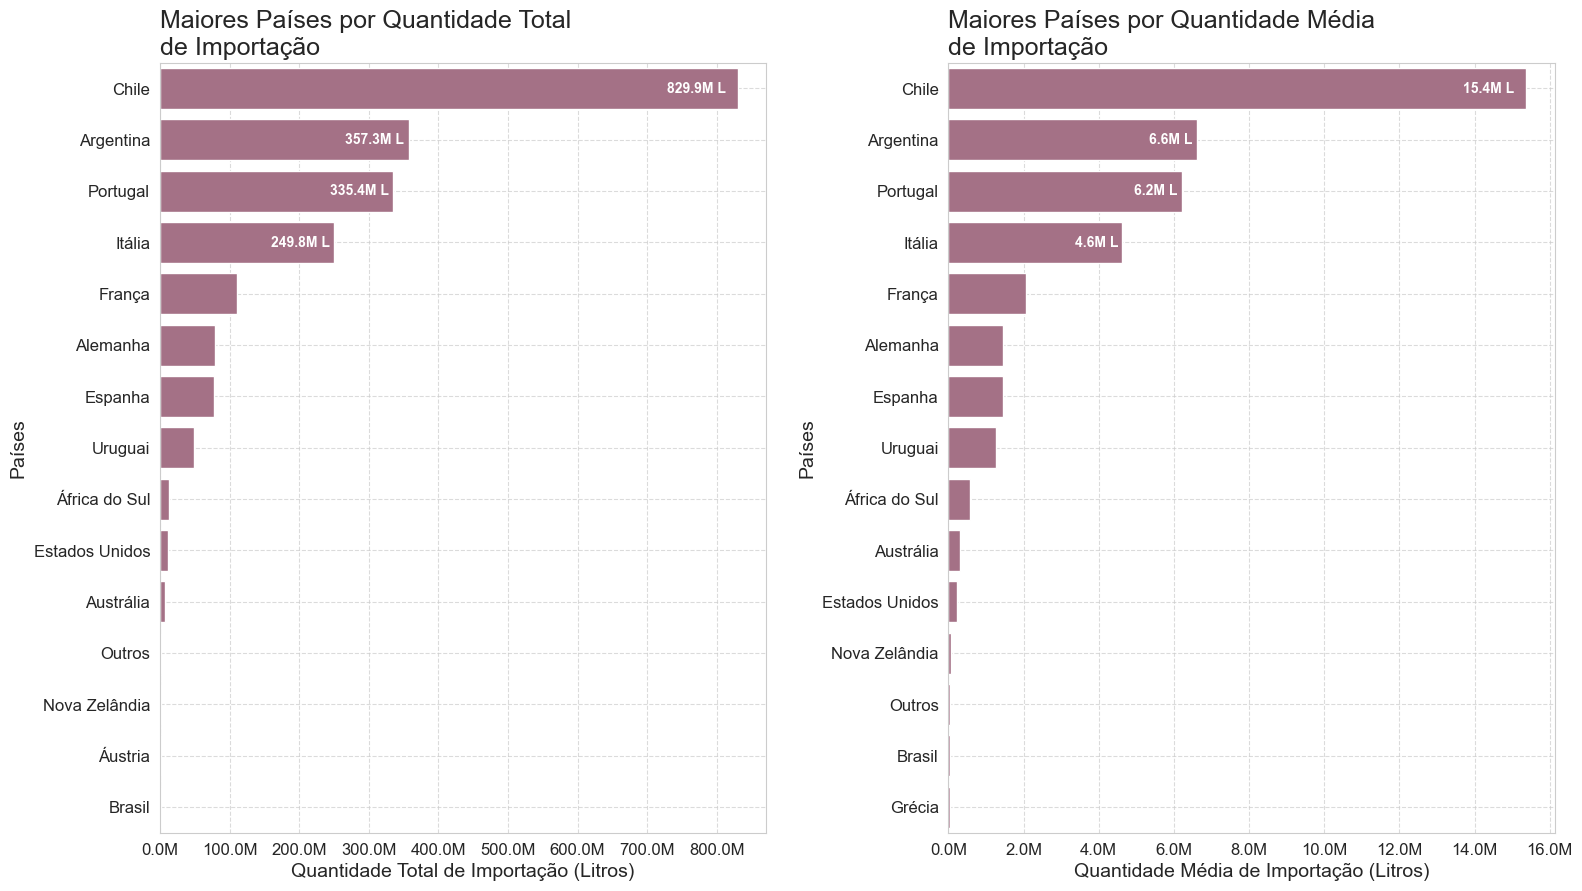

In [258]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(18,10))

# Primeiro Gráfico (Valor Total)
sns.barplot(orient='horizontal',
            x=top_15_quantidade_total_importacao['Quantidade_Import_(Litros)'],
            y=top_15_quantidade_total_importacao['País'],
            color=cores[7],
            ax=axes[0])

axes[0].set_title('Maiores Países por Quantidade Total\nde Importação', fontsize=18, loc='left')
axes[0].set_xlabel('Quantidade Total de Importação (Litros)', fontsize=14)
axes[0].set_ylabel('Países', fontsize=14)

# Segundo Gráfico (Valor Médio)
sns.barplot(orient='horizontal',
            x=top_15_quantidade_media_importacao['Quantidade_Import_(Litros)'],
            y=top_15_quantidade_media_importacao['País'],
            color=cores[7],
            ax=axes[1])

axes[1].set_title('Maiores Países por Quantidade Média\nde Importação', fontsize=18, loc='left')
axes[1].set_xlabel('Quantidade Média de Importação (Litros)', fontsize=14)
axes[1].set_ylabel('Países', fontsize=14)

for i, ax in enumerate(axes.flatten()):
  ax.tick_params(axis='both', labelsize=12)
  ax.grid(linestyle='--', alpha=0.7, axis='both')
  ax.ticklabel_format(style='plain', axis='x')
  ax.xaxis.set_major_formatter(formatter)

  for patch in ax.patches:
    # Pegando a largura da barra
    largura = patch.get_width()

    x = patch.get_x() + largura*0.98
    y = patch.get_y() + patch.get_height()/2

    if i == 0:
      comparacao = 1.5e8
    else:
      comparacao = 3e6

    if largura > comparacao:
      ax.text(
          x, y,
          f'{largura/1e6:.1f}M L', # Texto a ser exibido
          ha='right', # Alinhamento
          va='center', # Alinhamento
          fontsize=10, # Tamanho da fonte
          color='white', # Cor do texto
          fontweight='bold'
      )

plt.subplots_adjust(wspace=0.3)
plt.show()

Maiores Países por Valor Total e Médio de Exportação

In [259]:
top_15_paises_total_exportacao = df_completo_merge.groupby('País')['Valor_Export_(US$)'].sum().nlargest(15).reset_index()

In [260]:
top_15_paises_total_exportacao.head()

País  Valor_Export_(US$)
0        Paraguai     91123431.000000
1  Estados Unidos     71933779.000000
2          Rússia     25914397.000000
3     Reino Unido      8401548.000000
4           Japão      7101662.000000

In [261]:
top_15_paises_medio_exportacao = df_completo_merge_positivo_exportacao.groupby('País')['Valor_Export_(US$)'].mean().nlargest(15).reset_index()

In [262]:
top_15_paises_medio_exportacao.head()

País  Valor_Export_(US$)
0          Rússia      1993415.153846
1        Paraguai      1687470.944444
2  Estados Unidos      1332107.018519
3         Espanha       387189.400000
4           China       275618.277778

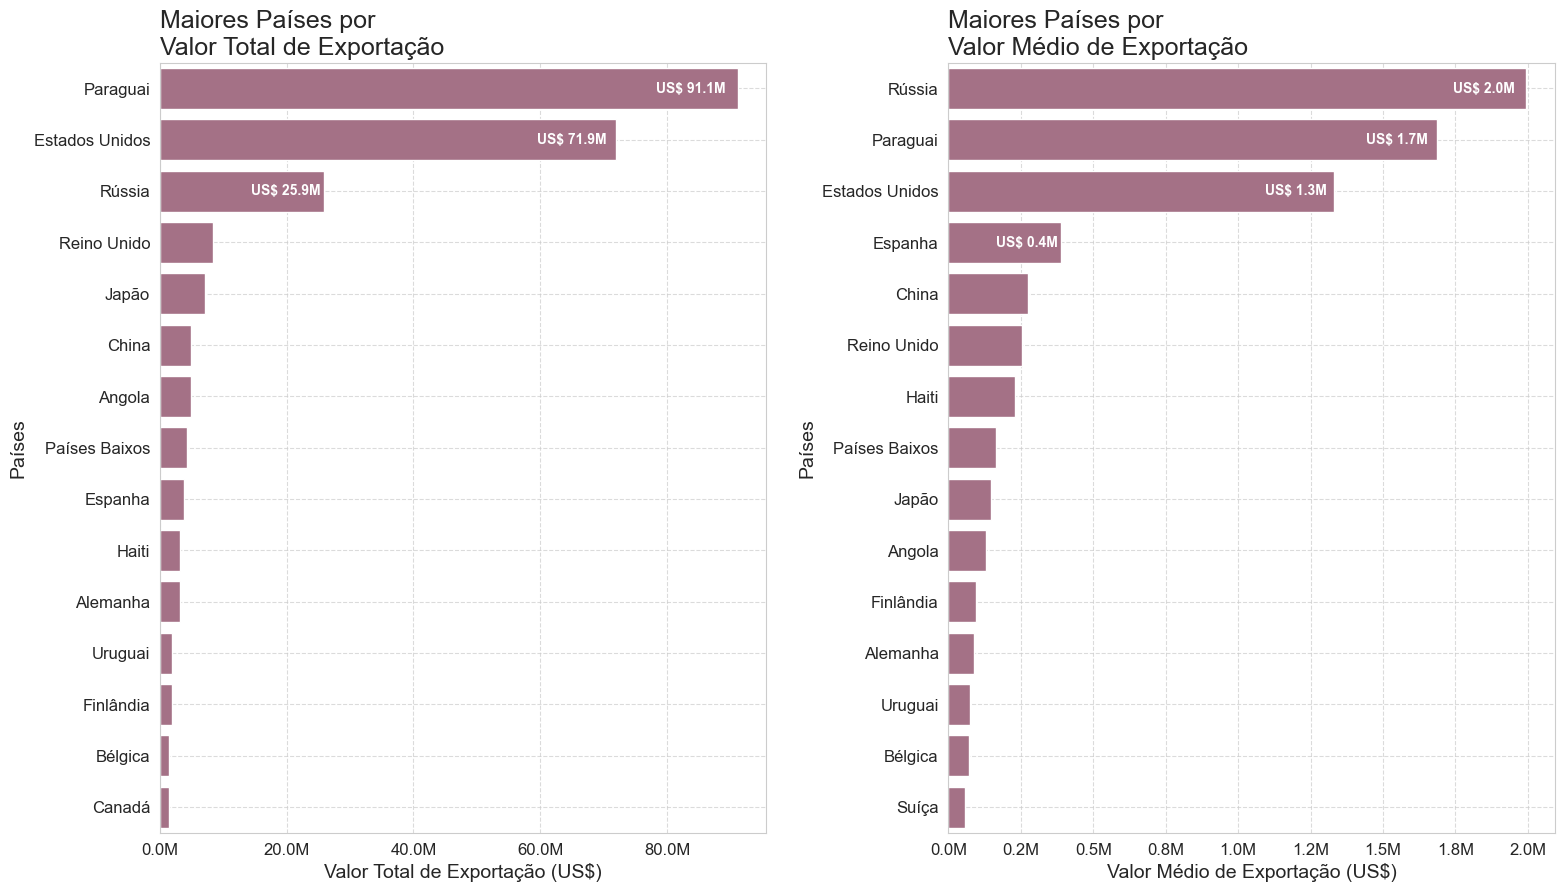

In [263]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(18,10),
    )

# Primeiro Gráfico (Valor Total)
sns.barplot(orient='horizontal',
            x=top_15_paises_total_exportacao['Valor_Export_(US$)'],
            y=top_15_paises_total_exportacao['País'],
            color=cores[7],
            ax=axes[0])

axes[0].set_title('Maiores Países por\nValor Total de Exportação', fontsize=18, loc='left')
axes[0].set_xlabel('Valor Total de Exportação (US$)', fontsize=14)
axes[0].set_ylabel('Países', fontsize=14)

# Segundo Gráfico (Valor Médio)
sns.barplot(orient='horizontal',
            x=top_15_paises_medio_exportacao['Valor_Export_(US$)'],
            y=top_15_paises_medio_exportacao['País'],
            color=cores[7],
            ax=axes[1])

axes[1].set_title('Maiores Países por\nValor Médio de Exportação', fontsize=18, loc='left')
axes[1].set_xlabel('Valor Médio de Exportação (US$)', fontsize=14)
axes[1].set_ylabel('Países', fontsize=14)

for ax in axes.flatten():
  ax.tick_params(axis='both', labelsize=12)
  ax.grid(linestyle='--', alpha=0.7, axis='both')
  ax.ticklabel_format(style='plain', axis='x')
  ax.xaxis.set_major_formatter(formatter)

  for patch in ax.patches:
    # Pegando a largura da barra
    largura = patch.get_width()

    x = patch.get_x() + largura*0.98
    y = patch.get_y() + patch.get_height()/2

    if i == 0:
      comparacao = ax.get_xlim()[1]*0.1 # Definindo o limite de exibição com 10% do limite máximo do eixo x
    else:
      comparacao = ax.get_xlim()[1]*0.14

    if largura > comparacao:
      ax.text(
          x, y,
          f'US$ {largura/1e6:.1f}M', # Texto a ser exibido
          ha='right', # Alinhamento
          va='center', # Alinhamento
          fontsize=10, # Tamanho da fonte
          color='white', # Cor do texto
          fontweight='bold'
      )

plt.subplots_adjust(wspace=0.3)
plt.show()

In [264]:
top_15_paises_total_importacao = df_completo_merge.groupby('País')['Valor_Import_(US$)'].sum().nlargest(15).reset_index()

In [265]:
top_15_paises_total_importacao.head()

País  Valor_Import_(US$)
0      Chile   2198951974.000000
1  Argentina   1070145624.000000
2   Portugal    933623940.000000
3     Itália    684612377.000000
4     França    494565129.000000

In [266]:
top_15_paises_medio_importacao = df_completo_merge_positivo_importacao.groupby('País')['Valor_Import_(US$)'].mean().nlargest(15).reset_index()

In [267]:
top_15_paises_medio_importacao.head()

País  Valor_Import_(US$)
0      Chile     40721332.851852
1  Argentina     19817511.555556
2   Portugal     17289332.222222
3     Itália     12678006.981481
4     França      9158613.500000

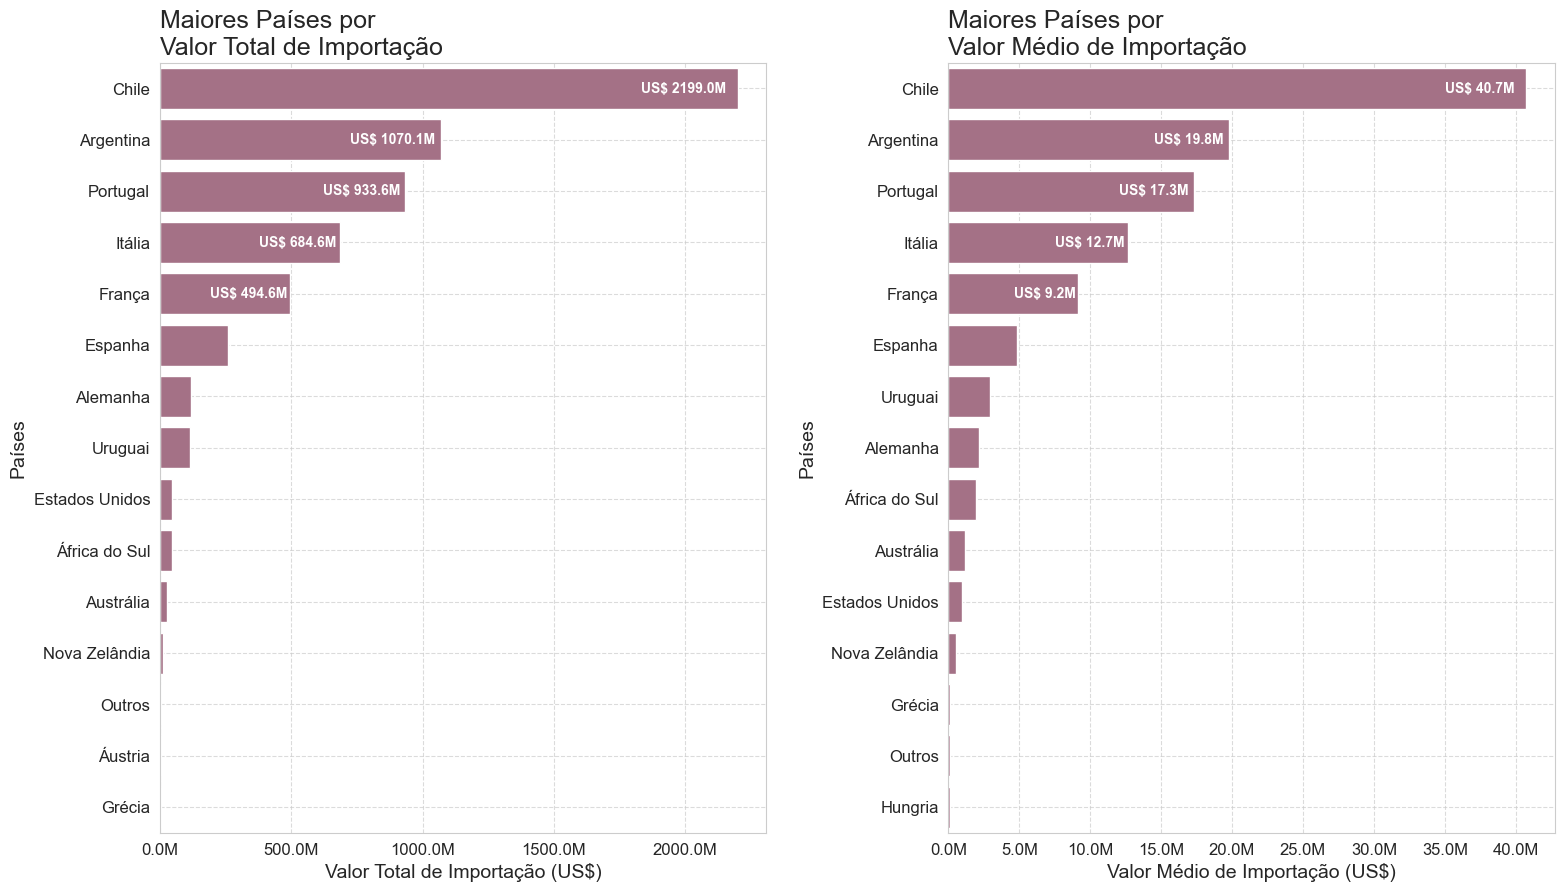

In [268]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(18,10),
    )

# Primeiro Gráfico (Valor Total)
sns.barplot(orient='horizontal',
            x=top_15_paises_total_importacao['Valor_Import_(US$)'],
            y=top_15_paises_total_importacao['País'],
            color=cores[7],
            ax=axes[0])

axes[0].set_title('Maiores Países por\nValor Total de Importação', fontsize=18, loc='left')
axes[0].set_xlabel('Valor Total de Importação (US$)', fontsize=14)
axes[0].set_ylabel('Países', fontsize=14)

# Segundo Gráfico (Valor Médio)
sns.barplot(orient='horizontal',
            x=top_15_paises_medio_importacao['Valor_Import_(US$)'],
            y=top_15_paises_medio_importacao['País'],
            color=cores[7],
            ax=axes[1])

axes[1].set_title('Maiores Países por\nValor Médio de Importação', fontsize=18, loc='left')
axes[1].set_xlabel('Valor Médio de Importação (US$)', fontsize=14)
axes[1].set_ylabel('Países', fontsize=14)

for ax in axes.flatten():
  ax.tick_params(axis='both', labelsize=12)
  ax.grid(linestyle='--', alpha=0.7, axis='both')
  ax.ticklabel_format(style='plain', axis='x')
  ax.xaxis.set_major_formatter(formatter)

  for patch in ax.patches:
    # Pegando a largura da barra
    largura = patch.get_width()

    x = patch.get_x() + largura*0.98
    y = patch.get_y() + patch.get_height()/2

    if i == 0:
      comparacao = ax.get_xlim()[1]*0.1 # Definindo o limite de exibição com 10% do limite máximo do eixo x
    else:
      comparacao = ax.get_xlim()[1]*0.13

    if largura > comparacao:
      ax.text(
          x, y,
          f'US$ {largura/1e6:.1f}M', # Texto a ser exibido
          ha='right', # Alinhamento
          va='center', # Alinhamento
          fontsize=10, # Tamanho da fonte
          color='white', # Cor do texto
          fontweight='bold'
      )

plt.subplots_adjust(wspace=0.3)
plt.show()

- O Paraguai domina em volume total exportado. Estados Unidos aparecem na sequência seguido de Rússia que aparece bem.
- Em quantidade média, a Rússia lidera com larga vantagem, seguido de Paraguai e Estados Unidos. Isso sugere alguns comportamentos:
  - Paraguai: boa frequência, como vimos em visualizações anteriores, com grandes quantidades, explicando o topo em volume e valor.
  - Rússia: poucas transações com grandes quantidades, explicando o topo em valores médios de quantidade e valor.
  - Estados Unidos: mais transações com quantidades mais abaixo que os outros dois.
- Há a presença de Suíça e Dinamarca, que não aparecem entre os maiores em valor totral, entre os maiores em valor médio.
- Chile é o principal importador: líder em todos os sentidos.
- Argentina, Portugal e Itália formam um segundo bloco, seguido de França, Alemanha e Espanha. Com excessão de Argentina, todos são europeus.


##### Evolução do Faturamento Para os 5 maiores Países

In [269]:
top_5_Total = list(df_completo_merge.groupby('País')['Valor_Export_(US$)'].sum().nlargest(5).index)
top_5_Total

['Paraguai', 'Estados Unidos', 'Rússia', 'Reino Unido', 'Japão']

In [270]:
df_top5_Total = df_completo_merge[df_completo_merge['País'].isin(top_5_Total)]
df_top5_Total.head()

País   Ano  Quantidade_Export_(Litros)  Valor_Export_(US$)  \
2646  Estados Unidos  1970                11200.000000         4200.000000   
2647  Estados Unidos  1971                22400.000000         8400.000000   
2648  Estados Unidos  1972                40333.000000        16177.000000   
2649  Estados Unidos  1973                36054.000000        17222.000000   
2650  Estados Unidos  1974                56769.000000        22715.000000   

     Categoria_Transação_Export  Preço_por_Litro_Export  \
2646       Média (US1K - US50K)                0.375000   
2647       Média (US1K - US50K)                0.375000   
2648       Média (US1K - US50K)                0.401086   
2649       Média (US1K - US50K)                0.477672   
2650       Média (US1K - US50K)                0.400130   

      Quantidade_Import_(Litros)  Valor_Import_(US$)  Preço_por_Litro_Import  \
2646                    0.000000            0.000000                0.000000   
2647                  915.000000          190.000000                0.207650   
2648                 2156.000000         1337.000000                0.620130   
2649                    0.000000            0.000000                0.000000   
2650                    0.000000            0.000000                0.000000   

     Categoria_Transação_Import  
2646          Inexistente (US0)  
2647            Pequena (<US1K)  
2648       Média (US1K - US50K)  
2649          Inexistente (US0)  
2650          Inexistente (US0)

In [271]:
df_evolucao_top5 = df_top5_Total.groupby(['País', 'Ano'])['Valor_Export_(US$)'].sum().reset_index()
df_evolucao_top5.head()

País   Ano  Valor_Export_(US$)
0  Estados Unidos  1970         4200.000000
1  Estados Unidos  1971         8400.000000
2  Estados Unidos  1972        16177.000000
3  Estados Unidos  1973        17222.000000
4  Estados Unidos  1974        22715.000000

In [272]:
df_evolucao_top5 = df_evolucao_top5.sort_values(by=['País', 'Ano'])
df_evolucao_top5['Valor_Acumulado'] = df_evolucao_top5.groupby('País')['Valor_Export_(US$)'].cumsum()
df_evolucao_top5.head()

País   Ano  Valor_Export_(US$)  Valor_Acumulado
0  Estados Unidos  1970         4200.000000      4200.000000
1  Estados Unidos  1971         8400.000000     12600.000000
2  Estados Unidos  1972        16177.000000     28777.000000
3  Estados Unidos  1973        17222.000000     45999.000000
4  Estados Unidos  1974        22715.000000     68714.000000

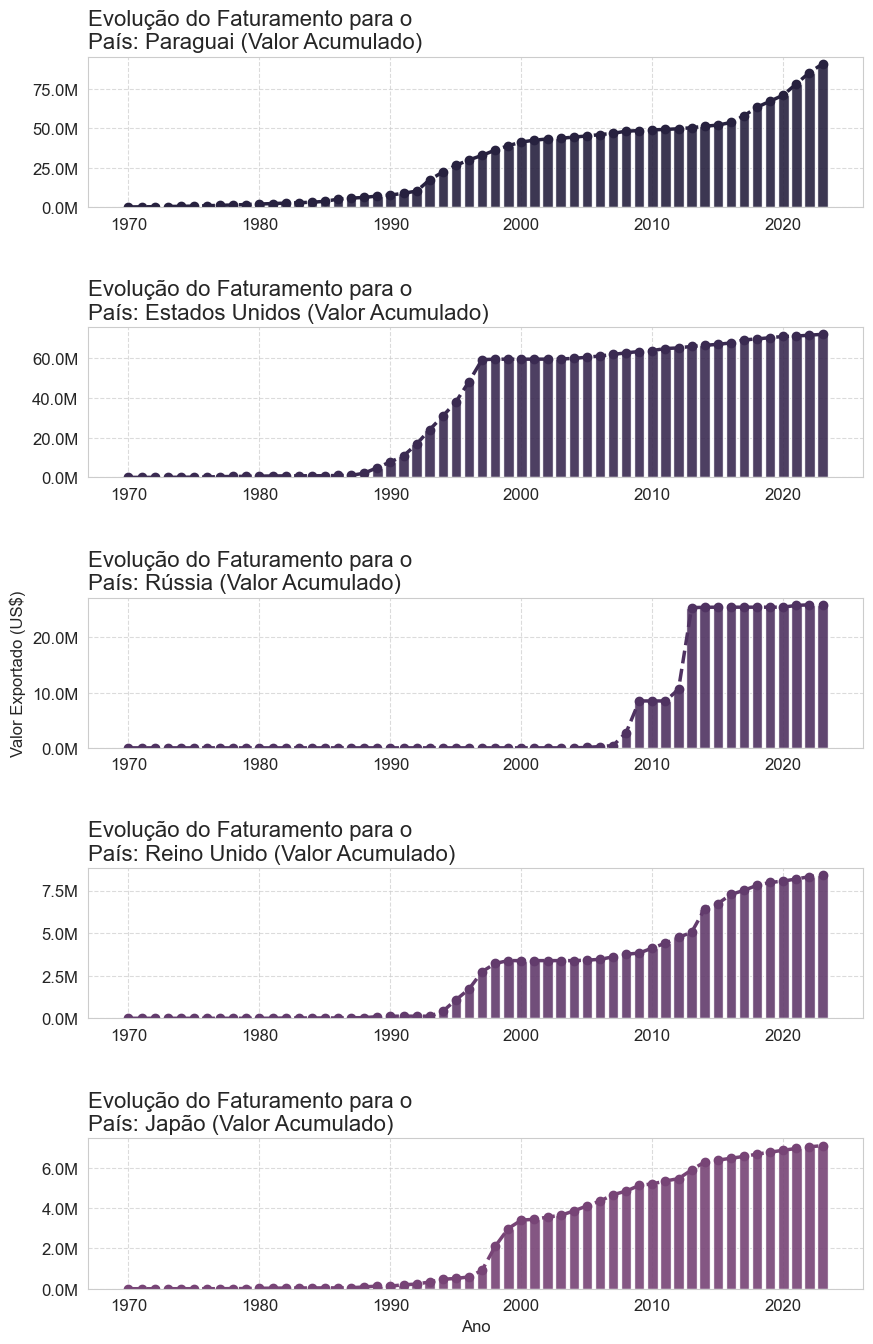

In [273]:
fig, axes = plt.subplots(
    nrows=5,
    ncols=1,
    figsize=(10,16)
    )

for i, pais, ax in zip(range(0,5), list(top_5_Total), axes.flatten()):

  df_pais = df_evolucao_top5[df_evolucao_top5['País'] == pais]
  df_pais['Ano'] = df_pais.sort_values(by='Ano')['Ano']

  ax.plot(
      df_pais['Ano'],
      df_pais['Valor_Acumulado'],
      color=cores[i],
      marker='o',
      linestyle='--',
      linewidth=2.5
  )

  ax.bar(
      df_pais['Ano'],
      df_pais['Valor_Acumulado'],
      color=cores[i],
      alpha=0.9
  )

  ax.set_title(f'Evolução do Faturamento para o\nPaís: {pais} (Valor Acumulado)', fontsize=16, loc='left')

  ax.tick_params(axis='both', labelsize=12)
  ax.yaxis.set_major_formatter(formatter)
  #ax.ticklabel_format(style='plain', axis='y')
  ax.grid(linestyle='--', alpha=0.7, axis='both')

axes[-1].set_xlabel('Ano', fontsize=12)
axes[2].set_ylabel('Valor Exportado (US$)', fontsize=12)

plt.subplots_adjust(hspace=0.8)
plt.show()

- Paraguai:
  - Crescimento consistente desde os anos 1990, com um forte crescimento nos últimos anos;
  - É o principal gerador de receita: alto volumes de exportação.

- Estados Unidos:
  - Forte cresciemnto nos anos 90 seguido de um longo período de estabilidade e leve crescimento rescente;
  - Se tornou um mercado previsível nos últimos anos.

- Rússia:
  - Praticamente zero por décadas e um forte salto para um outro nível de estabilidade nos anos 2000-2010;
  - Combinando como que foi visto anteriormente, apresenta poucas transações de alto volume.

- Reino Unido:
  - Crescimento constante a partir da década de 90, com pequenos períodos de estabilidade e uma boa aceleração a partir de 2010;

- Japão:
  - Subida contínua na década de 90 com um forte salto no final, entrando os anos 2000 em outro patamar.

##### Evolução do Faturamento por Categoria de Exportação

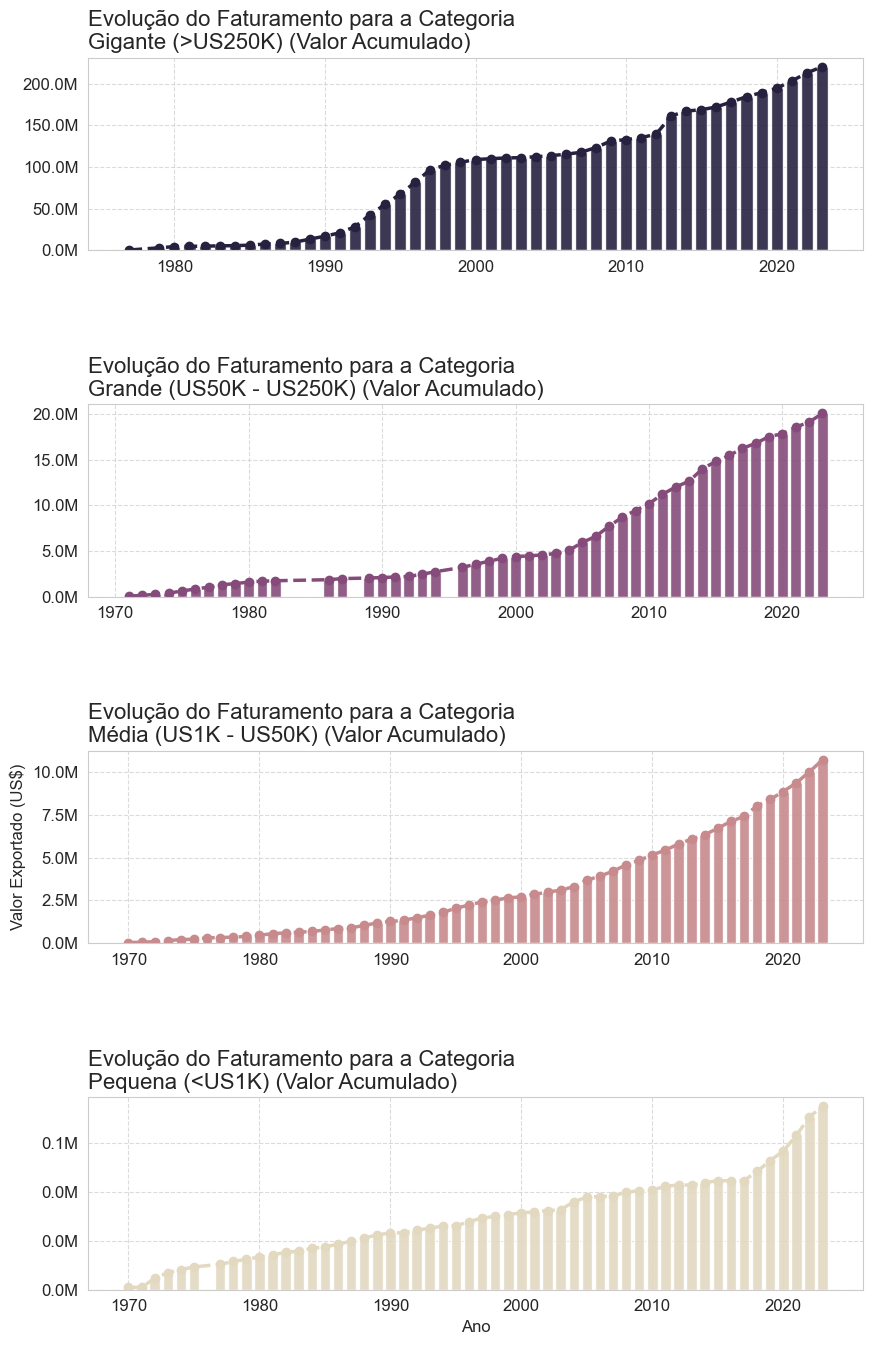

In [274]:
df_evolucao_categoria = df_completo_merge.groupby(['Categoria_Transação_Export', 'Ano'])['Valor_Export_(US$)'].sum().reset_index()
df_evolucao_categoria['Faturamento_Acumulado'] = df_evolucao_categoria.groupby('Categoria_Transação_Export')['Valor_Export_(US$)'].cumsum()
ordem = ['Pequena (<US1K)', 'Média (US1K - US50K)', 'Grande (US50K - US250K)', 'Gigante (>US250K)']
df_evolucao_categoria = df_evolucao_categoria[df_evolucao_categoria['Categoria_Transação_Export'].isin(ordem)]

fig, axes = plt.subplots(
    figsize=(10,16),
    nrows=4,
    ncols=1)

for ax, categoria in zip(axes.flatten(), list(df_evolucao_categoria['Categoria_Transação_Export'].unique())):

  ax.plot(
      df_evolucao_categoria[df_evolucao_categoria['Categoria_Transação_Export']==categoria]['Ano'],
      df_evolucao_categoria[df_evolucao_categoria['Categoria_Transação_Export']==categoria]['Faturamento_Acumulado'],
      color=mapa_de_cores[categoria],
      marker='o',
      linestyle='--',
      linewidth=2.5
  )

  ax.bar(df_evolucao_categoria[df_evolucao_categoria['Categoria_Transação_Export']==categoria]['Ano'],
         df_evolucao_categoria[df_evolucao_categoria['Categoria_Transação_Export']==categoria]['Faturamento_Acumulado'],
         color=mapa_de_cores[categoria],
         alpha=0.9
        )

  ax.set_title(f'Evolução do Faturamento para a Categoria\n{categoria} (Valor Acumulado)', fontsize=16, loc='left')
  ax.tick_params(axis='both', labelsize=12)
  ax.yaxis.set_major_formatter(formatter)
  ax.grid(linestyle='--', alpha=0.7, axis='both')

axes[-1].set_xlabel('Ano', fontsize=12)
axes[2].set_ylabel('Valor Exportado (US$)', fontsize=12)

plt.subplots_adjust(hspace=0.8)
plt.show()

- Gigante:
  - Há saltos no ínicio dos anos 90 e 2010 com aceleração recente, comopondo boa parte da receita da empresa.

- Grande:
  - Crescimento contínuo a partir dos anos 2000, acelerando após 2010.
  - É o segundo motor de receita.

- Média:
  - Subida gradual e estável ao longo de todo o tempo de estudo.

- Pequena:
  - Escala muito pequena em comparação com as demais categorias, ainda que com pequenos ganhos nos anos recentes;
  - Pode funcionar como uma porta de entrada para novos mercados.

##### Evolução das Importações por categoria de Importação

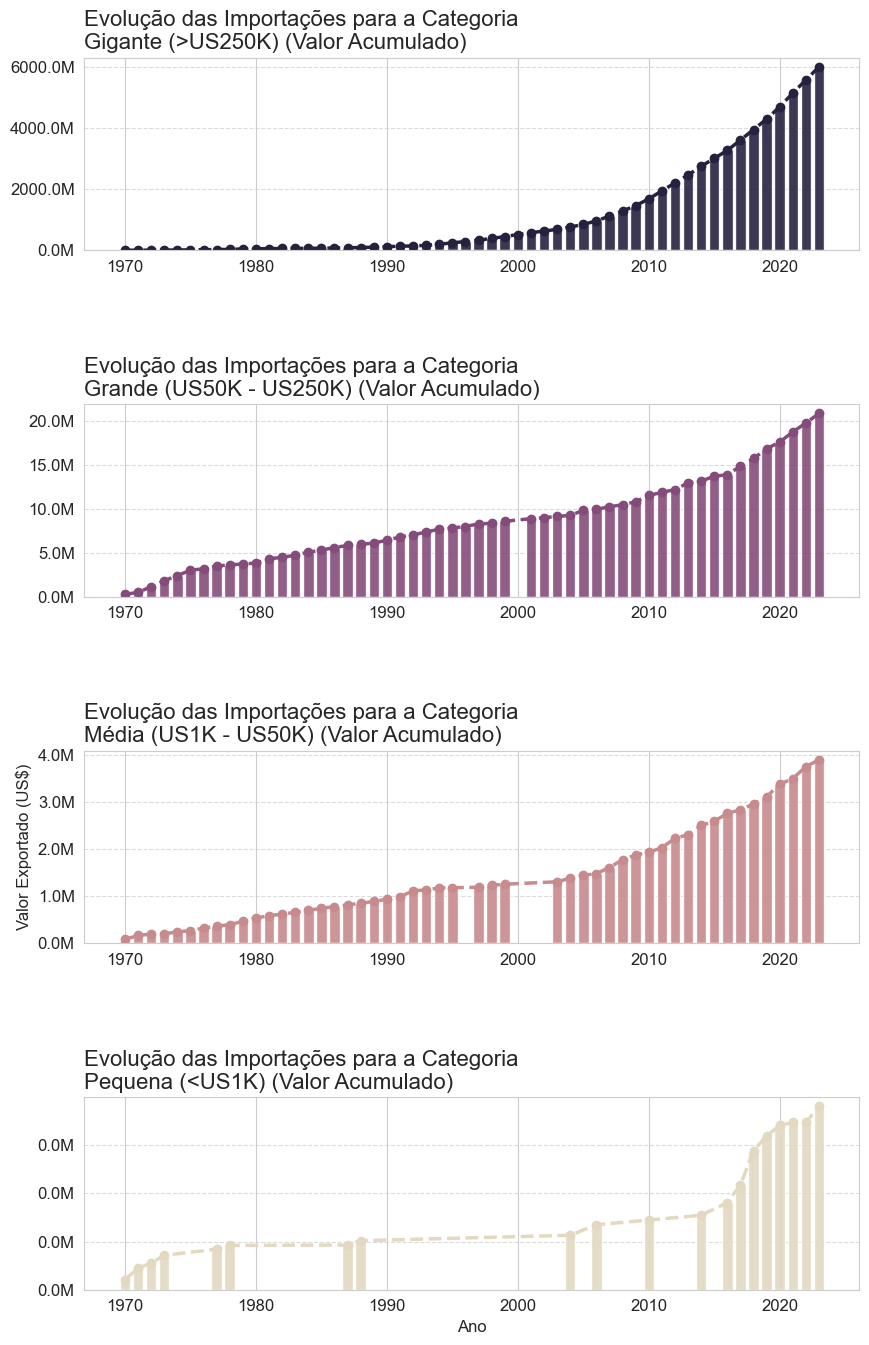

In [275]:
df_evolucao_categoria = df_completo_merge.groupby(['Categoria_Transação_Import', 'Ano'])['Valor_Import_(US$)'].sum().reset_index()
df_evolucao_categoria['Import_Acumulado'] = df_evolucao_categoria.groupby('Categoria_Transação_Import')['Valor_Import_(US$)'].cumsum()
ordem = ['Pequena (<US1K)', 'Média (US1K - US50K)', 'Grande (US50K - US250K)', 'Gigante (>US250K)']
df_evolucao_categoria = df_evolucao_categoria[df_evolucao_categoria['Categoria_Transação_Import'].isin(ordem)]

fig, axes = plt.subplots(
    figsize=(10,16),
    nrows=4,
    ncols=1)

for ax, categoria in zip(axes.flatten(), list(df_evolucao_categoria['Categoria_Transação_Import'].unique())):

  ax.plot(
      df_evolucao_categoria[df_evolucao_categoria['Categoria_Transação_Import']==categoria]['Ano'],
      df_evolucao_categoria[df_evolucao_categoria['Categoria_Transação_Import']==categoria]['Import_Acumulado'],
      color=mapa_de_cores[categoria],
      marker='o',
      linestyle='--',
      linewidth=2.5
  )

  ax.bar(df_evolucao_categoria[df_evolucao_categoria['Categoria_Transação_Import']==categoria]['Ano'],
         df_evolucao_categoria[df_evolucao_categoria['Categoria_Transação_Import']==categoria]['Import_Acumulado'],
         color=mapa_de_cores[categoria],
         alpha=0.9
        )

  ax.set_title(f'Evolução das Importações para a Categoria\n{categoria} (Valor Acumulado)', fontsize=16, loc='left')
  ax.tick_params(axis='both', labelsize=12)
  ax.yaxis.set_major_formatter(formatter)
  ax.grid(linestyle='--', alpha=0.7, axis='y')

axes[-1].set_xlabel('Ano', fontsize=12)
axes[2].set_ylabel('Valor Exportado (US$)', fontsize=12)

plt.subplots_adjust(hspace=0.8)
plt.show()

##### Evolução do Faturamento com Relação ao Tempo

In [276]:
evolucao_faturamento = df_completo_merge.groupby('Ano')['Valor_Export_(US$)'].sum().reset_index()

In [277]:
evolucao_faturamento.head()

Ano  Valor_Export_(US$)
0  1970        40500.000000
1  1971        83465.000000
2  1972       121097.000000
3  1973       174792.000000
4  1974       185871.000000

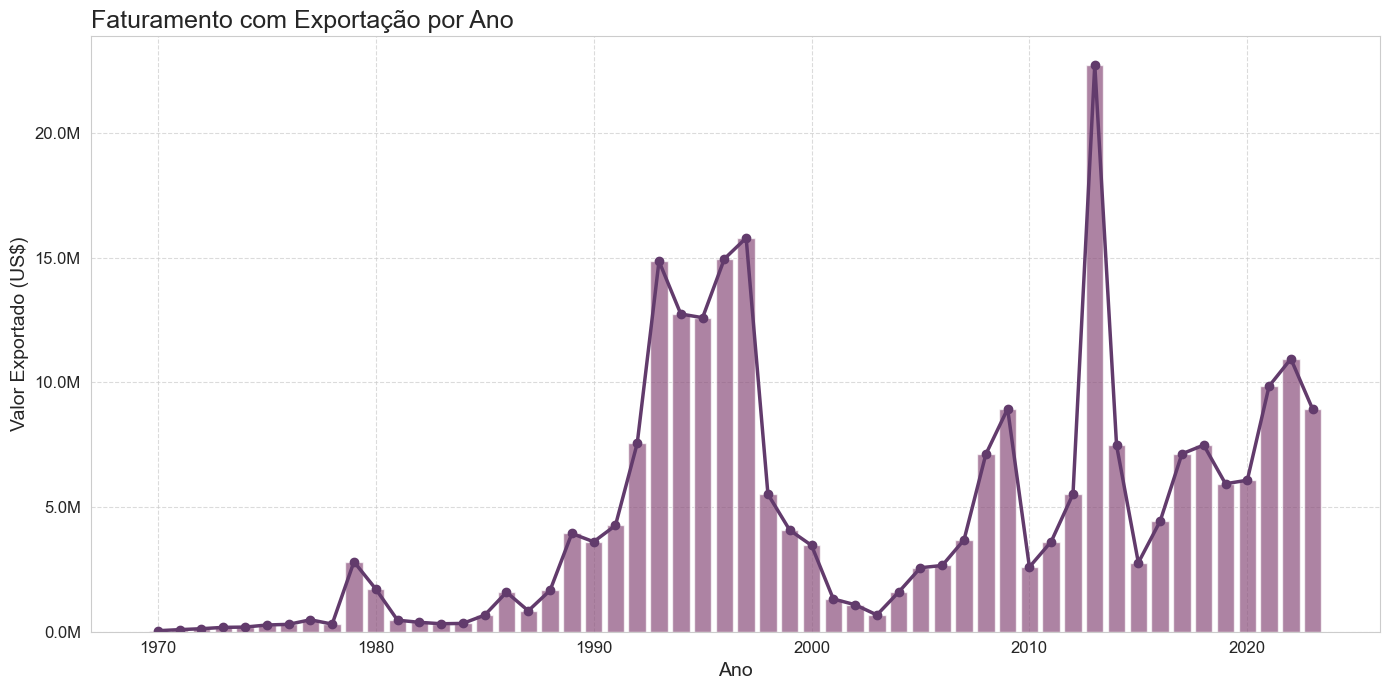

In [278]:
fig, ax = plt.subplots(figsize=(14,7))

ax.bar(evolucao_faturamento['Ano'],
       evolucao_faturamento['Valor_Export_(US$)'],
       color=cores[5],
       alpha=0.7
       )

ax.plot(evolucao_faturamento['Ano'],
        evolucao_faturamento['Valor_Export_(US$)'],
        color=cores[3],
        marker='o',
        linestyle='-',
        linewidth=2.5
        )


ax.set_title('Faturamento com Exportação por Ano', fontsize=18, loc='left')
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Valor Exportado (US$)', fontsize=14)

ax.tick_params(axis='both', labelsize=12)
ax.grid(linestyle='--', alpha=0.7, axis='both')
ax.yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

In [279]:
evolucao_faturamento['Faturamento_Acumulado'] = evolucao_faturamento['Valor_Export_(US$)'].cumsum()

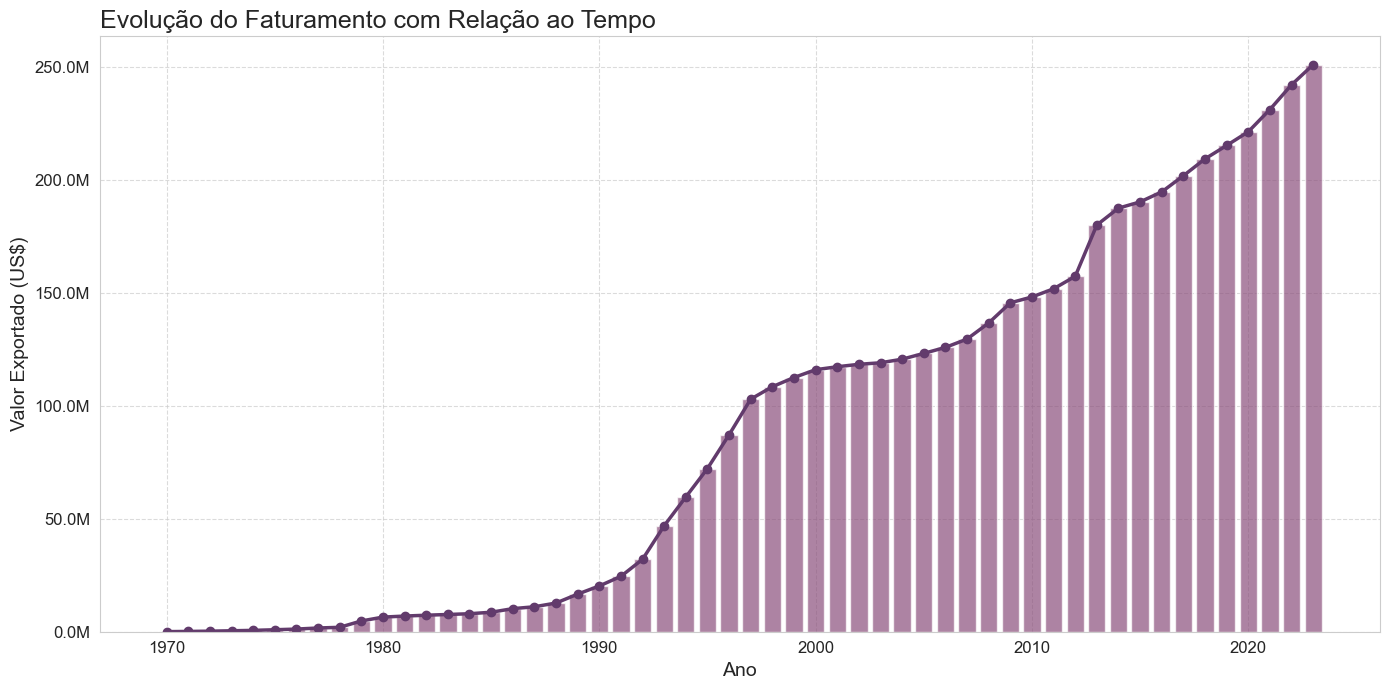

In [280]:
fig, ax = plt.subplots(figsize=(14,7))

ax.bar(evolucao_faturamento['Ano'],
       evolucao_faturamento['Faturamento_Acumulado'],
       color=cores[5],
       alpha=0.7)

ax.plot(evolucao_faturamento['Ano'],
        evolucao_faturamento['Faturamento_Acumulado'],
        color=cores[3],
        marker='o',
        linestyle='-',
        linewidth=2.5)

ax.set_title('Evolução do Faturamento com Relação ao Tempo', fontsize=18, loc='left')
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Valor Exportado (US$)', fontsize=14)

ax.tick_params(axis='both', labelsize=12)
ax.grid(linestyle='--', alpha=0.7, axis='both')
ax.yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

##### Evolução da Quantidade de Litros Exportada com Relação ao Tempo

In [281]:
Evolucao_Quantidade = df_completo_merge.groupby('Ano')['Quantidade_Export_(Litros)'].sum().reset_index()
Evolucao_Quantidade.head()

Ano  Quantidade_Export_(Litros)
0  1970               136009.000000
1  1971               281305.000000
2  1972               381020.000000
3  1973               471270.000000
4  1974               356985.000000

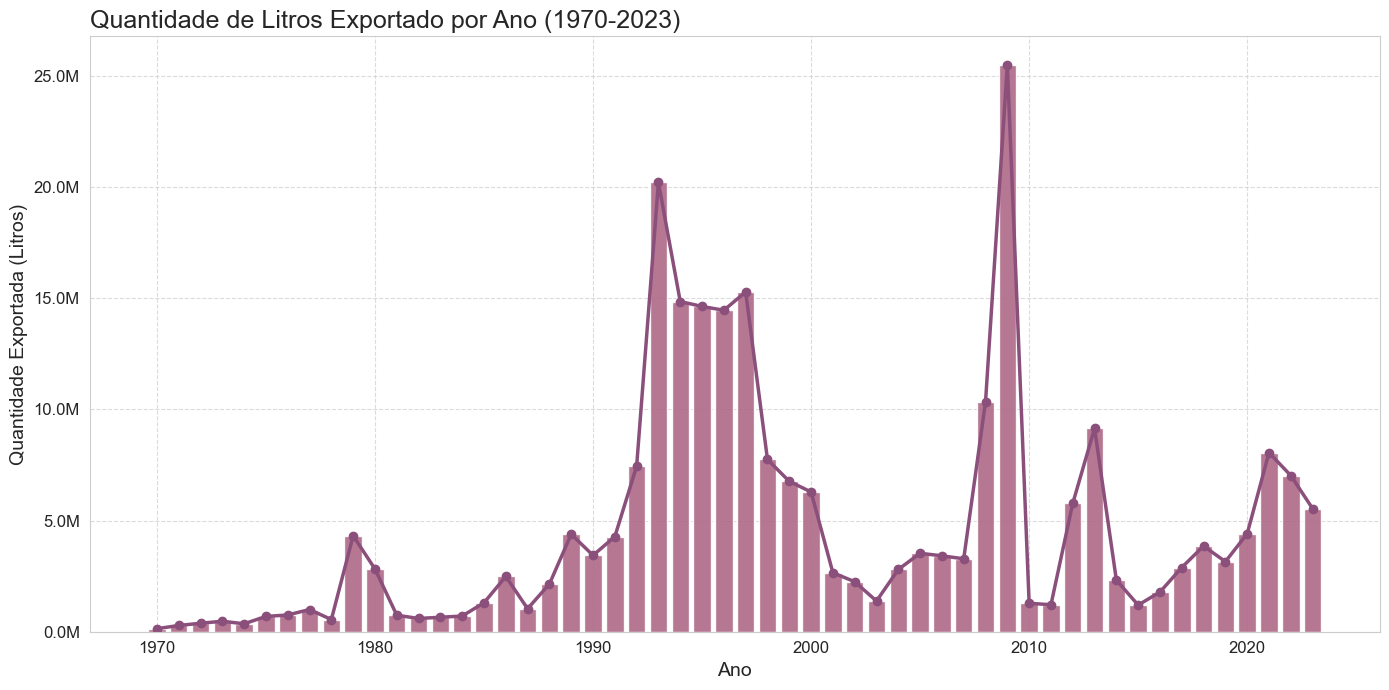

In [282]:
fig, ax = plt.subplots(figsize=(14,7))

ax.bar(Evolucao_Quantidade['Ano'],
       Evolucao_Quantidade['Quantidade_Export_(Litros)'],
       color=cores[7],
       alpha=0.9)

ax.plot(Evolucao_Quantidade['Ano'],
        Evolucao_Quantidade['Quantidade_Export_(Litros)'],
        color=cores[5],
        marker='o',
        linestyle='-',
        linewidth=2.5)

ax.set_title('Quantidade de Litros Exportado por Ano (1970-2023)', fontsize=18, loc='left')
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Quantidade Exportada (Litros)', fontsize=14)

ax.tick_params(axis='both', labelsize=12)
ax.grid(linestyle='--', alpha=0.7, axis='both')
ax.yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

In [283]:
Evolucao_Quantidade['Quantidade_Acumulada'] = Evolucao_Quantidade['Quantidade_Export_(Litros)'].cumsum()

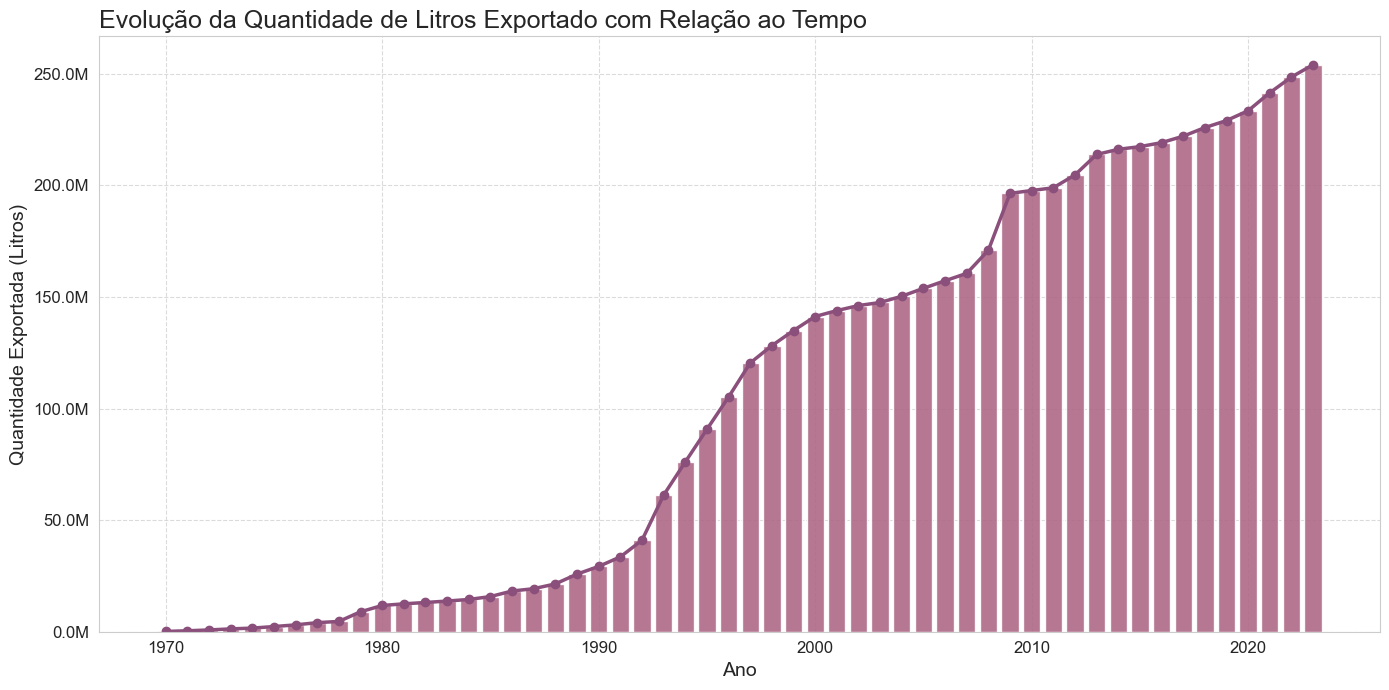

In [284]:
fig, ax = plt.subplots(figsize=(14,7))

ax.bar(Evolucao_Quantidade['Ano'],
       Evolucao_Quantidade['Quantidade_Acumulada'],
       color=cores[7],
       alpha=0.9)

ax.plot(Evolucao_Quantidade['Ano'],
        Evolucao_Quantidade['Quantidade_Acumulada'],
        color=cores[5],
        marker='o',
        linestyle='-',
        linewidth=2.5)

ax.set_title('Evolução da Quantidade de Litros Exportado com Relação ao Tempo', fontsize=18, loc='left')
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Quantidade Exportada (Litros)', fontsize=14)

ax.tick_params(axis='both', labelsize=12)
ax.grid(linestyle='--', alpha=0.7, axis='both')
ax.yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

- O faturamento cresce forte em 1992–2000, desacelera em 2001–2007, volta a subir em 2008–2011 e atinge um pico em 2012 (US$ 25M).
- A partir de 2013, há uma nova fase de cresciumento com máximos recentes e leve ajuste depois.

## Conclusões

- Dependência de poucos mercados: exportações concentradas em **Paraguai** e **Estados Unidos**;
- **Pareto**: poucas transações de alto volume definem a receita anual;
- Preço por litro cai muito com o tamanho do pedido (descontos aplicáveis)
- Há um nicho **premium**: as maiores médias de preço por litro estão em mercados **Europeus**. Estes servem para aumentar margem por meio do valor pago e não pelo volume;
- A volatilidade anual é explicada por ganhar ou perder transações **gigantes**.



## Prescrições Objetivas

- Defender e expandir os principais mercados: **Paraguai** e **Estados Unidos**:
  - Renegociar contratos anuais com alguma cláusula de piso no preço por litro para transações gigantes;
  - Manter um calendárido de compras a fim de reduzir cancelamentos e fidelizar.

- Elevar o preço por litro nos mercados recorrentes e dominados por transações **médias** e **grandes**:
  - Revisão do desconto aplicado para transações deste tipo;
  - Meta prática: Auemnto de 15-25% de transações grandes dentro dos países dominados por transações médias: aumentar o volume.

- Uso de transações **pequenas** como experimentação:
  - Lançamento de novos produtos via **pequenas**, utilizando-as como experimentação e com metas claras: converter para **média** em 6-12 meses.

## KPIs

- Porcentagem do faturamento vindo de **gigantes** e **grandes**:
  - Meta de reduzir dependência destas transações em um só cliente.

- Porcentagem de **grandes** em mercados dominados por **médias**:
  - Projetar aumento no volume destes mercados.

- Preço por Litro por país com relação a média:
  - Identifiar margens para aumento.

## Fechamento

O recado final é bem claro: pouquissímas transações **gigantes** explicam o faturamento final da empresa. O caminho é defneder o que dá tração a isto e elevar o valor pago pelo litro em mercados onde há maior recorrência de transações **médias** e **gigantes**. Desta forma, é possível crescer e suavizar a volatilidade vista ao longo detses anos.